3.5


In [3]:
print('Start Code')
'''
~~~
Separate major merger and minor merger runs
~~~
'''

print('Beginning')
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import itertools
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from scipy.signal import argrelextrema
import sklearn.metrics as metrics

Start Code
Beginning


In [1]:
'''
~~~
Separate major merger and minor merger runs
~~~
'''

print('Beginning')
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import itertools
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from scipy.signal import argrelextrema
import sklearn.metrics as metrics
  

def plot_confusion_matrix(cm, target_names, title, cmap=plt.cm.Blues):
    print('target names', target_names)
    sns.set_style("dark")
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    target_names=['Nonmerger','Merger']
    plt.xticks(tick_marks, target_names)#, rotation=45)
    plt.yticks(tick_marks, target_names)
    #plt.tight_layout()
    plt.ylabel('True label', size=20)
    plt.xlabel('Predicted label', size=20)
    
    fmt = '.2f' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    


def lda_classify(v, levels, cutoffpoints):
    for level, cutoff in zip(reversed(levels), reversed(cutoffpoints)):
        if v > cutoff: return level
    return levels[0]




def plot_mean_and_CI(mean, lb, ub, color_mean=None, color_shading=None):
        # plot the shaded range of the confidence intervals
        plt.fill_between(range(mean.shape[0]), ub, lb,
                         color=color_shading, alpha=.5)
        # plot the mean on top
        plt.plot(mean, color_mean)

def group_consecutives(vals, step=1):
    """Return list of consecutive lists of numbers from vals (number list)."""
    run = []
    result = [run]
    expect = None
    for v in vals:
        if (v == expect) or (expect is None):
            run.append(v)
        else:
            run = [v]
            result.append(run)
        expect = v + step
    return result
feature_dict = {i:label for i,label in zip(
                range(14),
                  ('Counter',
                  'Image',
                  'class label',
                  'Myr',
                  'Viewpoint',
                '# Bulges',
                   'Sep',
                   'Flux Ratio',
                  'Gini',
                  'M20',
                  'Concentration (C)',
                  'Asymmetry (A)',
                  'Clumpiness (S)',
                  'Sersic N',
                  'Shape Asymmetry (A_S)'))}

def locate_min(a):
        smallest = min(a)
        return smallest, [index for index, element in enumerate(a) 
                      if smallest == element]
    

list_runs=['fg3_m12_rebin', 'fg1_m13_rebin','fg3_m13_rebin', 'fg3_m15_rebin', 'fg3_m1_10_rebin','major_all_rebin','minor_all_rebin']
#list_runs=['fg3_m12_highz']
#list_runs=['fg3_m1_10_rebin']#,'fg3_m15']
#list_runs=['minor_all']

colors=[sns.xkcd_rgb["red"],sns.xkcd_rgb["amber"],sns.xkcd_rgb["orange pink"],sns.xkcd_rgb["baby purple"],sns.xkcd_rgb["purple"],sns.xkcd_rgb["reddish orange"],sns.xkcd_rgb["rich purple"]]
names=['q0.5_fg0.3','q0.333_fg0.1','q0.333_fg0.3','q0.2_fg0.3_BT0.2','q0.1_fg0.3_BT0.2','Major Mergers','Minor Mergers']

priors_list=[[0.9,0.1],[0.9,0.1],[0.9,0.1],[0.7,0.3],[0.7,0.3],[0.9,0.1],[0.7,0.3]]

'''list_runs=['all']
colors=[sns.xkcd_rgb["aqua blue"]]
names=['All Combined']
priors_list=[[0.75,0.25]]'''

list_runs=['fg3_m12_mag_range', 'fg1_m13_mag_range','fg3_m13_mag_range', 'major_all_mag_range']

colors=[sns.xkcd_rgb["red"],sns.xkcd_rgb["amber"],sns.xkcd_rgb["orange pink"],sns.xkcd_rgb["reddish orange"]]
names=['q0.5_fg0.3','q0.333_fg0.1','q0.333_fg0.3','Major Mergers']

priors_list=[[0.9,0.1],[0.9,0.1],[0.9,0.1],[0.9,0.1]]

list_runs=['fg1_m13_mag_20']

colors=[sns.xkcd_rgb["amber"]]
names=['q0.333_fg0.1']

plt.clf()
missclass_list=[]

gini_time=[]
A_S_time=[]
A_time=[]
LDA_time=[]
myr_total=[]

'''num_comps_list.append(num_comps)
    missclass_list.append(missclass)
    min_comps_list.append(min_comps)
    min_A_list.append(min_A)'''
num_comps_list=[]
missclass_list_1=[]
min_comps_list=[]
min_A_list=[]

gini_means_all=[]
m20_means_all=[]
color_means_all=[]
A_means_all=[]
A_S_means_all=[]
C_means_all=[]
n_means_all=[]
S_means_all=[]

gini_means_all_non=[]
m20_means_all_non=[]
color_means_all_non=[]
A_means_all_non=[]
A_S_means_all_non=[]
C_means_all_non=[]
n_means_all_non=[]
S_means_all_non=[]


for i in range(len(list_runs)):
    #i=i+5
    add_on=list_runs[i]
    print('starting loop', i, add_on)
    
    
        
    run=list_runs[i]

    df = pd.io.parsers.read_table(
        filepath_or_buffer='LDA_'+str(run)+'.txt',#'_view_all.txt',#filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
        header=[0],
        sep='\t'
        )
    df.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']

    df.dropna(how="all", inplace=True) # to drop the empty line at file-end


    for j in range(len(df)):
        if df[['Myr']].values[j][0]<0.39 and df[['Sep']].values[j][0]==0.0 and df[['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]
            df.set_value(j,'class label',0)
        if add_on[:7]=='fg3_m12' and (df[['Myr']].values[j][0]-2.15) > 0.5:#0.39+0.1:#was 0.39
            df.set_value(j,'class label',0)
        if add_on[:7]=='fg1_m13' and (df[['Myr']].values[j][0]-2.74) > 0.5:#2.74-2.25+2.74:#was 0.39
            df.set_value(j,'class label',0)
        if add_on[:7]=='fg3_m13' and (df[['Myr']].values[j][0]-2.59) > 0.5:#2.64+0.5
            df.set_value(j,'class label',0)
        if add_on[:7]=='fg3_m15' and (df[['Myr']].values[j][0]-3.72) > 0.5:
            df.set_value(j,'class label',0)
        if add_on[:9]=='fg3_m1_10' and (df[['Myr']].values[j][0]-9.17) > 0.5:
            df.set_value(j,'class label',0)
        if add_on[:9]=='major_all':
            #then sort by image name
            if df[['Image']].values[j][0][:10]=='q0.5_fg0.3' and (df[['Myr']].values[j][0]-2.15) > 0.5:
                df.set_value(j,'class label',0)
            if df[['Image']].values[j][0][:12]=='q0.333_fg0.3' and (df[['Myr']].values[j][0]-2.59) > 0.5:
                df.set_value(j,'class label',0)
            if df[['Image']].values[j][0][:10]=='q0.333_fg0.1' and (df[['Myr']].values[j][0]-2.74) > 0.5:
                df.set_value(j,'class label',0)
        if add_on[:9]=='minor_all':
            #then sort by image name
            if df[['Image']].values[j][0][:16]=='q0.2_fg0.3_BT0.2' and (df[['Myr']].values[j][0]-3.72) > 0.5:
                df.set_value(j,'class label',0)
            if df[['Image']].values[j][0][:16]=='q0.1_fg0.3_BT0.2' and (df[['Myr']].values[j][0]-9.17) > 0.5:
                df.set_value(j,'class label',0)
            
    if add_on[:7]=='minor_all':
        new_df=df
        '''Create a data table with everything on it'''
        file_write=open('LDA_prep_predictors_all_combined_minor.txt','w')
        file_write.write('Counter'+'\t'+'Image'+'\t'+'Merger (0 = no, 1 = yes)'+'\t'+
                'Myr'+'\t'+'Viewpoint'+'\t'+'# Bulges'+'\t'+'Sep'+'\t'+'Flux Ratio'+'\t'+'Gini'+'\t'+'M20'+'\t'+'C'+'\t'+'A'+'\t'+'S'+
                        '\t'+'Sersic n'+'\t'+'A_s'+'\n')
        counter=0
        for j in range(len(new_df)):
            file_write.write(str(counter)+'\t'+str(new_df[['Image']].values[j][0])+'\t'+
                            str(new_df[['class label']].values[j][0])+'\t'+
                             str(new_df[['Myr']].values[j][0])+'\t'+
                             str(new_df[['Viewpoint']].values[j][0])+'\t'+
                             str(new_df[['# Bulges']].values[j][0])+'\t'+
                             str(new_df[['Sep']].values[j][0])+'\t'+
                             str(new_df[['Flux Ratio']].values[j][0])+'\t'+
                             str(new_df[['Gini']].values[j][0])+'\t'+
                             str(new_df[['M20']].values[j][0])+'\t'+
                             str(new_df[['Concentration (C)']].values[j][0])+'\t'+
                             str(new_df[['Asymmetry (A)']].values[j][0])+'\t'+
                             str(new_df[['Clumpiness (S)']].values[j][0])+'\t'+
                             str(new_df[['Sersic N']].values[j][0])+'\t'+
                             str(new_df[['Shape Asymmetry']].values[j][0])+'\n')
            counter+=1
        
        
        file_write.close()
        
    if add_on[:7]=='major_all':
        new_df=df
        '''Create a data table with everything on it'''
        file_write=open('LDA_prep_predictors_all_combined_major.txt','w')
        file_write.write('Counter'+'\t'+'Image'+'\t'+'Merger (0 = no, 1 = yes)'+'\t'+
                'Myr'+'\t'+'Viewpoint'+'\t'+'# Bulges'+'\t'+'Sep'+'\t'+'Flux Ratio'+'\t'+'Gini'+'\t'+'M20'+'\t'+'C'+'\t'+'A'+'\t'+'S'+
                        '\t'+'Sersic n'+'\t'+'A_s'+'\n')
        counter=0
        for j in range(len(new_df)):
            file_write.write(str(counter)+'\t'+str(new_df[['Image']].values[j][0])+'\t'+
                            str(new_df[['class label']].values[j][0])+'\t'+
                             str(new_df[['Myr']].values[j][0])+'\t'+
                             str(new_df[['Viewpoint']].values[j][0])+'\t'+
                             str(new_df[['# Bulges']].values[j][0])+'\t'+
                             str(new_df[['Sep']].values[j][0])+'\t'+
                             str(new_df[['Flux Ratio']].values[j][0])+'\t'+
                             str(new_df[['Gini']].values[j][0])+'\t'+
                             str(new_df[['M20']].values[j][0])+'\t'+
                             str(new_df[['Concentration (C)']].values[j][0])+'\t'+
                             str(new_df[['Asymmetry (A)']].values[j][0])+'\t'+
                             str(new_df[['Clumpiness (S)']].values[j][0])+'\t'+
                             str(new_df[['Sersic N']].values[j][0])+'\t'+
                             str(new_df[['Shape Asymmetry']].values[j][0])+'\n')
            counter+=1
        
        
        file_write.close()        

    myr=[]
    myr_non=[]
    for j in range(len(df)):
        if df[['class label']].values[j][0]==0.0:
            myr_non.append(df[['Myr']].values[j][0])
        else:
            myr.append(df[['Myr']].values[j][0])

    myr_non=sorted(list(set(myr_non)))
    myr=sorted(list(set(myr)))



    print('myr', myr)
    print('myr_non', myr_non)
        
    
    
    
    df.dropna(inplace=True) # to drop the empty line at file-end
    

    from sklearn.preprocessing import LabelEncoder
    def gini_m20(row):
        return row['Gini']*row['M20']
    def gini_C(row):
        return row['Gini']*row['Concentration (C)']
    def gini_A(row):
        return row['Gini']*row['Asymmetry (A)']
    def gini_S(row):
        return row['Gini']*row['Clumpiness (S)']
    def gini_n(row):
        return row['Gini']*row['Sersic N']
    def gini_A_S(row):
        return row['Gini']*row['Shape Asymmetry']
    
    def M20_C(row):
        return row['M20']*row['Concentration (C)']
    def M20_A(row):
        return row['M20']*row['Asymmetry (A)']
    def M20_S(row):
        return row['M20']*row['Clumpiness (S)']
    def M20_n(row):
        return row['M20']*row['Sersic N']
    def M20_A_S(row):
        return row['M20']*row['Shape Asymmetry']
    
    def C_A(row):
        return row['Concentration (C)']*row['Asymmetry (A)']
    def C_S(row):
        return row['Concentration (C)']*row['Clumpiness (S)']
    def C_n(row):
        return row['Concentration (C)']*row['Sersic N']
    def C_A_S(row):
        return row['Concentration (C)']*row['Shape Asymmetry']
    
    
    def A_S(row):
        return row['Asymmetry (A)']*row['Clumpiness (S)']
    def A_n(row):
        return row['Asymmetry (A)']*row['Sersic N']
    def A_A_S(row):
        return row['Asymmetry (A)']*row['Shape Asymmetry']
    
    def S_n(row):
        return row['Clumpiness (S)']*row['Sersic N']
    def S_A_S(row):
        return row['Clumpiness (S)']*row['Shape Asymmetry']
    
    def n_A_S(row):
        return row['Sersic N']*row['Shape Asymmetry']
    
    df['Gini*M20'] = df.apply(gini_m20,axis=1)
    df['Gini*C'] = df.apply(gini_C,axis=1)
    df['Gini*A'] = df.apply(gini_A,axis=1)
    df['Gini*S'] = df.apply(gini_S,axis=1)
    df['Gini*n'] = df.apply(gini_n,axis=1)
    df['Gini*A_S'] = df.apply(gini_A_S,axis=1)
    
    df['M20*C'] = df.apply(M20_C,axis=1)
    df['M20*A'] = df.apply(M20_A,axis=1)
    df['M20*S'] = df.apply(M20_S,axis=1)
    df['M20*n'] = df.apply(M20_n,axis=1)
    df['M20*A_S'] = df.apply(M20_A_S,axis=1)
    
    df['C*A'] = df.apply(C_A,axis=1)
    df['C*S'] = df.apply(C_S,axis=1)
    df['C*n'] = df.apply(C_n,axis=1)
    df['C*A_S'] = df.apply(C_A_S,axis=1)
    
    df['A*S'] = df.apply(A_S,axis=1)
    df['A*n'] = df.apply(A_n,axis=1)
    df['A*A_S'] = df.apply(A_A_S,axis=1)
    
    df['S*n'] = df.apply(S_n,axis=1)
    df['S*A_S'] = df.apply(S_A_S,axis=1)
    
    df['n*A_S'] = df.apply(n_A_S,axis=1)
    #print(df)
    
    '''First, do a bunch of diagnostic plotting :)'''
    X= df[['Gini','M20','Concentration (C)', 'Asymmetry (A)', 'Clumpiness (S)','Sersic N', 'Shape Asymmetry']].values
    
    
    gini = {key:[] for key in myr}
    m20 = {key:[] for key in myr}
    
    gini_std = {key:[] for key in myr}
    m20_std = {key:[] for key in myr}

    C = {key:[] for key in myr}
    A = {key:[] for key in myr}
    S = {key:[] for key in myr}

    A_S = {key:[] for key in myr}
    n = {key:[] for key in myr}

    gini_non = {key:[] for key in myr_non}
    m20_non = {key:[] for key in myr_non}
    
    gini_non_std = {key:[] for key in myr_non}
    m20_non_std = {key:[] for key in myr_non}

    C_non = {key:[] for key in myr_non}
    A_non = {key:[] for key in myr_non}
    S_non = {key:[] for key in myr_non}

    n_non = {key:[] for key in myr_non}
    A_S_non = {key:[] for key in myr_non}
    
    color_name_non = {key:[] for key in myr_non}
    color_name = {key:[] for key in myr}
    
    marker_name_non = {key:[] for key in myr_non}
    marker_name = {key:[] for key in myr}


    
    for l in range(len(df)):
        if df[['class label']].values[l]==0:
            
            gini_non[df[['Myr']].values[l][0]].append(X[l,0])
            m20_non[df[['Myr']].values[l][0]].append(X[l,1])
            #gini_non_std[df[['Myr']].values[l][0]].append((X[l,0]-std_scale.mean_[0])/np.sqrt(std_scale.var_[0]))
            #m20_non_std[df[['Myr']].values[l][0]].append((X[l,1]-std_scale.mean_[1])/np.sqrt(std_scale.var_[1]))
            C_non[df[['Myr']].values[l][0]].append(X[l,2])
            A_non[df[['Myr']].values[l][0]].append(X[l,3])
            S_non[df[['Myr']].values[l][0]].append(X[l,4])
            A_S_non[df[['Myr']].values[l][0]].append(X[l,6])
            n_non[df[['Myr']].values[l][0]].append(X[l,5])
            if df[['Image']].values[l][0][:10]=='q0.5_fg0.3' or df[['Image']].values[l][0][:28]=='isolated_galaxies/m0.5_fg0.3':
                color_name_non[df[['Myr']].values[l][0]].append(sns.xkcd_rgb["red"])
                marker_name_non[df[['Myr']].values[l][0]].append("P")
                #colors=[sns.xkcd_rgb["red"],sns.xkcd_rgb["amber"],sns.xkcd_rgb["orange pink"],sns.xkcd_rgb["baby purple"],sns.xkcd_rgb["purple"],sns.xkcd_rgb["reddish orange"],sns.xkcd_rgb["rich purple"]]

                    
            else:
                if df[['Image']].values[l][0][:12]=='q0.333_fg0.1' or df[['Image']].values[l][0][:26]=='isolated_galaxies/m1_fg0.1' or df[['Image']].values[l][0][:30]=='isolated_galaxies/m0.333_fg0.1':
                    color_name_non[df[['Myr']].values[l][0]].append(sns.xkcd_rgb["amber"])
                    marker_name_non[df[['Myr']].values[l][0]].append("s")
                else:
                    if df[['Image']].values[l][0][:16]=='q0.2_fg0.3_BT0.2':
                        color_name_non[df[['Myr']].values[l][0]].append(sns.xkcd_rgb["baby purple"])
                        marker_name_non[df[['Myr']].values[l][0]].append("o")
                    else:
                        if df[['Image']].values[l][0][:16]=='q0.1_fg0.3_BT0.2' or df[['Image']].values[l][0][:32]=='isolated_galaxies/m1_fg0.3_BT0.2':
                            color_name_non[df[['Myr']].values[l][0]].append(sns.xkcd_rgb["purple"])
                            marker_name_non[df[['Myr']].values[l][0]].append("p")
                        else:
                            if df[['Image']].values[l][0][:12]=='q0.333_fg0.3' or df[['Image']].values[l][0][:26]=='isolated_galaxies/m1_fg0.3':
                                color_name_non[df[['Myr']].values[l][0]].append(sns.xkcd_rgb["orange pink"])
                                marker_name_non[df[['Myr']].values[l][0]].append("D")
                            else:

                                color_name_non[df[['Myr']].values[l][0]].append('blue')
            #color_non[df[['Myr']].values[l][0]].append(df[['']])
            #print('concentration here', df[['Concentration (C)']].values[i][0])
        else:
            gini[df[['Myr']].values[l][0]].append(X[l,0])
            m20[df[['Myr']].values[l][0]].append(X[l,1])
            #gini_std[df[['Myr']].values[l][0]].append((X[l,0]-std_scale.mean_[0])/np.sqrt(std_scale.var_[0]))
            #m20_std[df[['Myr']].values[l][0]].append((X[l,1]-std_scale.mean_[1])/np.sqrt(std_scale.var_[1]))
            C[df[['Myr']].values[l][0]].append(X[l,2])
            A[df[['Myr']].values[l][0]].append(X[l,3])
            S[df[['Myr']].values[l][0]].append(X[l,4])
            A_S[df[['Myr']].values[l][0]].append(X[l,6])
            n[df[['Myr']].values[l][0]].append(X[l,5])
            if df[['Image']].values[l][0][:10]=='q0.5_fg0.3' or df[['Image']].values[l][0][:28]=='isolated_galaxies/m0.5_fg0.3':
                color_name[df[['Myr']].values[l][0]].append(sns.xkcd_rgb["red"])
                
                marker_name[df[['Myr']].values[l][0]].append("P")
                
                    
            else:
                if df[['Image']].values[l][0][:12]=='q0.333_fg0.1' or df[['Image']].values[l][0][:26]=='isolated_galaxies/m1_fg0.1' or df[['Image']].values[l][0][:30]=='isolated_galaxies/m0.333_fg0.1':
                    color_name[df[['Myr']].values[l][0]].append(sns.xkcd_rgb["amber"])
                    marker_name[df[['Myr']].values[l][0]].append("s")
                    
                else:
                    if df[['Image']].values[l][0][:16]=='q0.2_fg0.3_BT0.2':
                        color_name[df[['Myr']].values[l][0]].append(sns.xkcd_rgb["baby purple"])
                        marker_name[df[['Myr']].values[l][0]].append("o")
                        
                    else:
                        if df[['Image']].values[l][0][:16]=='q0.1_fg0.3_BT0.2' or df[['Image']].values[l][0][:32]=='isolated_galaxies/m1_fg0.3_BT0.2':
                            color_name[df[['Myr']].values[l][0]].append(sns.xkcd_rgb["purple"])
                            marker_name[df[['Myr']].values[l][0]].append("p")
                            
                        else:
                            if df[['Image']].values[l][0][:12]=='q0.333_fg0.3' or df[['Image']].values[l][0][:26]=='isolated_galaxies/m1_fg0.3':
                                color_name[df[['Myr']].values[l][0]].append(sns.xkcd_rgb["orange pink"])
                                marker_name[df[['Myr']].values[l][0]].append("D")
                                
                            else:

                                color_name[df[['Myr']].values[l][0]].append('red')
    G_list_all_non=[]
    M20_list_all_non=[]
    G_list_all_non_std=[]
    M20_list_all_non_std=[]
    A_list_all_non=[]
    C_list_all_non=[]
    S_list_all_non=[]
    A_S_list_all_non=[]
    n_list_all_non=[]
    color_list_all_non=[]
    color_list_all_non_std=[]
    marker_list_all_non=[]
    marker_list_all_non_std=[]
    

    G_list_all=[]
    M20_list_all=[]
    G_list_all_std=[]
    M20_list_all_std=[]
    A_list_all=[]
    C_list_all=[]
    S_list_all=[]
    A_S_list_all=[]
    n_list_all=[]
    color_list_all=[]
    color_list_all_std=[]
    marker_list_all=[]
    marker_list_all_std=[]
    
    
    gini_means_non=[]
    m20_means_non=[]
    color_means_non=[]
    A_means_non=[]
    A_S_means_non=[]
    C_means_non=[]
    n_means_non=[]
    S_means_non=[]
    
    counter_A_non=0
    counter_A_S_non=0
    counter_gini_non=0
    counter_overall_non=0
    
    for k in range(len(gini_non)):
        for z in range(len(gini_non[myr_non[k]])):
            counter_overall_non+=1
            M20_list_all_non.append((m20_non[myr_non[k]][z]))
            G_list_all_non.append((gini_non[myr_non[k]][z]))
            C_list_all_non.append((C_non[myr_non[k]][z]))
            A_list_all_non.append((A_non[myr_non[k]][z]))
            S_list_all_non.append((S_non[myr_non[k]][z]))
            n_list_all_non.append((n_non[myr_non[k]][z]))
            A_S_list_all_non.append((A_S_non[myr_non[k]][z]))
            if run[:9]=='major_all' or run[:9]=='minor_all':
                color_list_all_non.append(color_name_non[myr_non[k]][z])
                marker_list_all_non.append(marker_name_non[myr_non[k]][z])
                
                
            else:
                color_list_all_non.append(myr_non[k]/1)
                marker_list_all_non.append(myr_non[k]/1)
            
            if A_non[myr_non[k]][z] > 0.35:
                counter_A_non+=1
            if A_S_non[myr_non[k]][z] > 0.2:
                counter_A_S_non+=1
            if gini_non[myr_non[k]][z] > (-0.14*m20_non[myr_non[k]][z] + 0.33):#-0.14*x + 0.33
                counter_gini_non+=1
            
        A_means_non.append(np.mean(A_non[myr_non[k]][:]))
        A_S_means_non.append(np.mean(A_S_non[myr_non[k]][:]))
        color_means_non.append((myr_non[k]/1))
        gini_means_non.append(np.mean(gini_non[myr_non[k]][:]))
        m20_means_non.append(np.mean(m20_non[myr_non[k]][:]))
        C_means_non.append(np.mean(C_non[myr_non[k]][:]))
        n_means_non.append(np.mean(n_non[myr_non[k]][:]))
        S_means_non.append(np.mean(S_non[myr_non[k]][:]))
    gini_means=[]
    m20_means=[]
    color_means=[]
    A_means=[]
    A_S_means=[]
    n_means=[]
    C_means=[]
    S_means=[]
    counter_A=0
    counter_A_S=0
    counter_gini=0
    counter_overall=0
    
    for k in range(len(gini)):
        for z in range(len(gini[myr[k]])):
            counter_overall+=1
            M20_list_all.append((m20[myr[k]][z]))
            G_list_all.append((gini[myr[k]][z]))
            
            C_list_all.append((C[myr[k]][z]))
            A_list_all.append((A[myr[k]][z]))
            S_list_all.append((S[myr[k]][z]))
            n_list_all.append((n[myr[k]][z]))
            A_S_list_all.append((A_S[myr[k]][z]))
            
            if run[:9]=='major_all' or run[:9]=='minor_all':
                color_list_all.append(color_name[myr[k]][z])
                marker_list_all.append(marker_name[myr[k]][z])
                
            else:
                color_list_all.append((myr[k]))
                marker_list_all.append((myr[k]))#/((t_p-t_e)/2+t_e))
            if A[myr[k]][z] > 0.35:
                counter_A+=1
            if A_S[myr[k]][z] > 0.2:
                counter_A_S+=1
            if gini[myr[k]][z] > (-0.14*m20[myr[k]][z] + 0.33):#-0.14*x + 0.33
                counter_gini+=1
        A_means.append(np.mean(A[myr[k]][:]))
        A_S_means.append(np.mean(A_S[myr[k]][:]))
        color_means.append((myr[k]/1))
        gini_means.append(np.mean(gini[myr[k]][:]))
        m20_means.append(np.mean(m20[myr[k]][:]))
        C_means.append(np.mean(C[myr[k]][:]))
        n_means.append(np.mean(n[myr[k]][:]))
        S_means.append(np.mean(S[myr[k]][:]))
        
    gini_means_all.append(gini_means)
    m20_means_all.append(m20_means)
    color_means_all.append(color_means)
    A_means_all.append(A_means)
    A_S_means_all.append(A_S_means)
    C_means_all.append(C_means)
    n_means_all.append(n_means)
    S_means_all.append(S_means)
    
    gini_means_all_non.append(gini_means_non)
    m20_means_all_non.append(m20_means_non)
    color_means_all_non.append(color_means_non)
    A_means_all_non.append(A_means_non)
    A_S_means_all_non.append(A_S_means_non)
    C_means_all_non.append(C_means_non)
    n_means_all_non.append(n_means_non)
    S_means_all_non.append(S_means_non)
    
    print('~~~~~means~~~~')
    print('means Gini non', np.mean(gini_means_non), np.std(gini_means_non))
    print('means Gini', np.mean(gini_means), np.std(gini_means))
    print('~~~~~means~~~~')
    print('means m20 non', np.mean(m20_means_non), np.std(m20_means_non))
    print('means m20', np.mean(m20_means), np.std(m20_means))
    print('~~~~~means~~~~')
    print('means C non', np.mean(C_means_non), np.std(C_means_non))
    print('means C', np.mean(C_means), np.std(C_means))
    print('~~~~~means~~~~')
    print('means A non', np.mean(A_means_non), np.std(A_means_non))
    print('means A', np.mean(A_means), np.std(A_means))
    print('~~~~~means~~~~')
    print('means S non', np.mean(S_means_non), np.std(S_means_non))
    print('means S', np.mean(S_means), np.std(S_means))
    print('~~~~~means~~~~')
    print('means n non', np.mean(n_means_non), np.std(n_means_non))
    print('means n', np.mean(n_means), np.std(n_means))
    print('~~~~~means~~~~')
    print('means A_S non', np.mean(A_S_means_non), np.std(A_S_means_non))
    print('means A_S', np.mean(A_S_means), np.std(A_S_means))
    
    print('~~~~~~~~~')
    print(run)
    try:
        print('A accuracy',(counter_A+(counter_overall_non-counter_A_non))/(counter_overall+counter_overall_non), 'P',counter_A/(counter_A+counter_A_non))
        print('A_S accuracy',(counter_A_S+(counter_overall_non-counter_A_S_non))/(counter_overall+counter_overall_non), 'P',counter_A_S/(counter_A_S+counter_A_S_non))
        print('Gini accuracy',(counter_gini+(counter_overall_non-counter_gini_non))/(counter_overall+counter_overall_non), 'P',counter_gini/(counter_gini+counter_gini_non))
    except ZeroDivisionError:
        print('A accuracy',(counter_A+(counter_overall_non-counter_A_non))/(counter_overall+counter_overall_non), 'P',counter_A,(counter_A+counter_A_non))
        print('A_S accuracy',(counter_A_S+(counter_overall_non-counter_A_S_non))/(counter_overall+counter_overall_non), 'P',counter_A_S,(counter_A_S+counter_A_S_non))
        print('Gini accuracy',(counter_gini+(counter_overall_non-counter_gini_non))/(counter_overall+counter_overall_non), 'P',counter_gini,(counter_gini+counter_gini_non))
    
        
    dashed_line_x=np.linspace(-0.5,-3,100)
    dashed_line_y=[-0.14*x + 0.33 for x in dashed_line_x]

    
    
    
    '''Make the beautiful list of colors'''
    # These are the "Tableau 20" colors as RGB.    
    tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
                 (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
                 (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
                 (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
                 (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    

    # Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
    for k in range(len(tableau20)):    
        r, g, b = tableau20[k]    
        tableau20[k] = (r / 255., g / 255., b / 255.)    


    
    import seaborn
    sns.set_style("darkgrid")
    
    plt.clf()
    fig=plt.figure()
    ax1=fig.add_subplot(111)
    ax1.plot(dashed_line_x, dashed_line_y, ls='--', color='black')



        #ax1.scatter(m20[myr[k]],gini[myr[k]],color=tableau20[k], label=myr[k])
    #print(np.shape(m20),np.shape(myr))
    #ax1.scatter(m20,gini,c=myr)
    #plt.colorbar(im1)
    
    
    im1=ax1.scatter(m20_means, gini_means, c=color_means, cmap='Reds', s=35)
    plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')

    
    for j,k,l in zip(m20_means,gini_means,color_means):
        ax1.annotate('%s' %l, xy=(j,k), xytext=(j,k))
        
        
        
    
    ax1.set_xlim([max(m20_means),min(m20_means)])
    ax1.set_ylim([min(gini_means),max(gini_means)])#ax1.set_ylim([0.3,0.8])
    ax1.set_xlabel(r'M$_{20}$')
    ax1.set_ylabel(r'Gini')
    ax1.set_aspect(abs(max(m20_means)-min(m20_means))/abs(min(gini_means)-max(gini_means)))



    ax1.set_title('Mergers', loc='right')
    plt.savefig('../MaNGA_Papers/Paper_I/time_evo_gini_m20_'+str(run)+'.pdf')
    
    plt.clf()
    plt.plot(myr,A_means)
    for j,k in zip(myr,A_means):
        plt.annotate('%s' %j, xy=(j,k), xytext=(j,k))

    plt.axhline(y=0.35)
    plt.savefig('../MaNGA_Papers/Paper_I/time_evo_A_'+str(run)+'.pdf')
    
    plt.clf()
    plt.plot(myr,A_S_means)
    for j,k in zip(myr,A_S_means):
        plt.annotate('%s' %j, xy=(j,k), xytext=(j,k))

    plt.axhline(y=0.2)
    plt.savefig('../MaNGA_Papers/Paper_I/time_evo_A_S_'+str(run)+'.pdf')
    
    myr_detect_A=[]
    myr_detect_A_val=[]
    myr_detect_A_S=[]
    myr_detect_A_S_val=[]
    myr_detect_gini=[]
    myr_detect_gini_val=[]
    for p in range(len(myr)):
        if A_means[p] > 0.35:
            myr_detect_A.append(p)
            myr_detect_A_val.append(myr[p])
        if A_S_means[p] > 0.2:
            myr_detect_A_S.append(p)
            myr_detect_A_S_val.append(myr[p])
        if gini_means[p] > -0.14*m20_means[p]+0.33:
            myr_detect_gini.append(p)
            myr_detect_gini_val.append(myr[p])
        
    '''dashed_line_y=[-0.14*x + 0.33 for x in dashed_line_x]
'''
              
    
    grouped=group_consecutives(myr_detect_A)
    interval=[]
    print('grouped', len(grouped))
    print('myr_detect_A', myr_detect_A)
    if len(myr_detect_A)==0:
        A_time.append(0)
    else:
        for o in range(len(grouped)):
            interval.append(myr_detect_A_val[myr_detect_A.index(grouped[o][-1])]-myr_detect_A_val[myr_detect_A.index(grouped[o][0])])
        A_time.append(np.sum(interval))
    
    grouped=group_consecutives(myr_detect_A_S)
    interval=[]
    if len(myr_detect_A_S)==0:
        A_S_time.append(0)
    else:
        for o in range(len(grouped)):
            interval.append(myr_detect_A_S_val[myr_detect_A_S.index(grouped[o][-1])]-myr_detect_A_S_val[myr_detect_A_S.index(grouped[o][0])])
        A_S_time.append(np.sum(interval))
    
    grouped=group_consecutives(myr_detect_gini)
    interval=[]
    if len(myr_detect_gini)==0:
        gini_time.append(0)
    else:
        for o in range(len(grouped)):
            interval.append(myr_detect_gini_val[myr_detect_gini.index(grouped[o][-1])]-myr_detect_gini_val[myr_detect_gini.index(grouped[o][0])])
        gini_time.append(np.sum(interval))
    
    if run[:9]=='major_all' or run[:9]=='minor_all':
        plt.clf()
        fig=plt.figure()
        ax1=fig.add_subplot(121)
        ax1.plot(dashed_line_x, dashed_line_y, ls='--', color='black')



            #ax1.scatter(m20[myr[k]],gini[myr[k]],color=tableau20[k], label=myr[k])
        #print(np.shape(m20),np.shape(myr))
        #ax1.scatter(m20,gini,c=myr)
        #plt.colorbar(im1)
        M20_list_all_1=[]
        G_list_all_1=[]
        M20_list_all_2=[]
        G_list_all_2=[]
        M20_list_all_3=[]
        G_list_all_3=[]

        for p in range(len(M20_list_all)):
            #im2=ax2.scatter(M20_list_all_non, G_list_all_non, c=color_list_all_non,edgecolors='black', s=35)
            if color_list_all[p]==sns.xkcd_rgb["red"]:
                M20_list_all_1.append(M20_list_all[p])
                G_list_all_1.append(G_list_all[p])
            if color_list_all[p]==sns.xkcd_rgb["amber"]:
                M20_list_all_2.append(M20_list_all[p])
                G_list_all_2.append(G_list_all[p])
            if color_list_all[p]==sns.xkcd_rgb["orange pink"]:
                M20_list_all_3.append(M20_list_all[p])
                G_list_all_3.append(G_list_all[p])
      

        '''if run[:9]=='major_all':
            
            sns.kdeplot(np.array(M20_list_all_1), np.array(G_list_all_1), cmap='Reds', shade=True,shade_lowest=False, alpha=0.3)
            sns.kdeplot(np.array(M20_list_all_2), np.array(G_list_all_2), cmap='YlOrBr', shade=True,shade_lowest=False, alpha=0.3)
            sns.kdeplot(np.array(M20_list_all_3), np.array(G_list_all_3), cmap='Oranges', shade=True,shade_lowest=False, alpha=0.3)
           
        ax1.set_xlim([0,-3])
        ax1.set_ylim([0.2,0.8])#ax1.set_ylim([0.3,0.8])
        ax1.set_xlabel(r'M$_{20}$')
        ax1.set_ylabel(r'Gini')
        ax1.set_aspect(abs(3)/abs(0.6))



        ax1.set_title('Major Mergers', loc='right')
        
        ax2=fig.add_subplot(122)
        ax2.plot(dashed_line_x, dashed_line_y, ls='--', color='black')


        sns.kdeplot(np.array(M20_list_all_non), np.array(G_list_all_non),  cmap='Blues', shade=True,shade_lowest=False)
        
        ax2.set_xlim([0,-3])
        ax2.set_ylim([0.2,0.8])#ax1.set_ylim([0.3,0.8])
        ax2.set_xlabel(r'M$_{20}$')
        ax2.set_ylabel(r'Gini')
        ax2.set_aspect(abs(3)/abs(0.6))


        ax2.set_title('Nonmergers', loc='right')
        #ax1.set_aspect('equal')
        plt.tight_layout()
        plt.savefig('../MaNGA_Papers/Paper_I/gini_m20_cont_statmorph_nonoise_'+str(run)+'.pdf')



        plt.clf()
        fig=plt.figure()
        ax1=fig.add_subplot(121)





        sns.kdeplot(np.array(A_list_all), np.array(C_list_all), cmap='Reds', shade=True,shade_lowest=False)
        

        ax1.set_xlim([0,1])
        ax1.set_ylim([0,6])#ax1.set_ylim([0.3,0.8])
        ax1.set_xlabel(r'A')
        ax1.set_ylabel(r'C')
        ax1.set_aspect(1/6)

        #ax1.legend(loc='lower center',
        #          ncol=2)
        ax1.set_title('Major Mergers', loc='right')

        #ax1.annotate(str(NAME), xy=(0.03,1.05),xycoords='axes fraction',size=15)
        plt.axvline(x=0.35, ls='--', color='black')


        ax2=fig.add_subplot(122)



        sns.kdeplot(np.array(A_list_all_non), np.array(C_list_all_non), cmap='Blues', shade=True,shade_lowest=False)
        
        ax2.set_xlim([0,1])
        ax2.set_ylim([0,6])#ax1.set_ylim([0.3,0.8])
        ax2.set_xlabel(r'A')
        ax2.set_ylabel(r'C')
        ax2.set_aspect(1/6)
        plt.axvline(x=0.35, ls='--', color='black')


        #ax2.legend(loc='lower center',
        #          ncol=2)
        ax2.set_title('Nonmergers', loc='right')
        #ax1.set_aspect('equal')
        plt.tight_layout()
        plt.savefig('../MaNGA_Papers/Paper_I/C_A_cont_statmorph_nonoise_'+str(run)+'.pdf')

        plt.clf()
        fig=plt.figure()
        ax1=fig.add_subplot(121)





        sns.kdeplot(np.array(S_list_all), np.array(C_list_all),  cmap='Reds', shade=True,shade_lowest=False)
        

        ax1.set_xlim([0,1])
        ax1.set_ylim([0,6])#ax1.set_ylim([0.3,0.8])
        ax1.set_xlabel(r'S')
        ax1.set_ylabel(r'C')
        ax1.set_aspect(1/6)

        #ax1.legend(loc='lower center',
        #          ncol=2)
        ax1.set_title('Major Mergers', loc='right')

        #ax1.annotate(str(NAME), xy=(0.03,1.05),xycoords='axes fraction',size=15)
        plt.axvline(x=0.35, ls='--', color='black')


        ax2=fig.add_subplot(122)



        sns.kdeplot(np.array(S_list_all_non), np.array(C_list_all_non), cmap='Blues', shade=True,shade_lowest=False)

        ax2.set_xlim([0,1])
        ax2.set_ylim([0,6])#ax1.set_ylim([0.3,0.8])
        ax2.set_xlabel(r'S')
        ax2.set_ylabel(r'C')
        ax2.set_aspect(1/6)
        plt.axvline(x=0.35, ls='--', color='black')


        #ax2.legend(loc='lower center',
        #          ncol=2)
        ax2.set_title('Nonmergers', loc='right')
        #ax1.set_aspect('equal')
        plt.tight_layout()
        plt.savefig('../MaNGA_Papers/Paper_I/C_S_cont_statmorph_nonoise_'+str(run)+'.pdf')


        
        plt.clf()
        fig=plt.figure()
        ax1=fig.add_subplot(121)




        from matplotlib import ticker
        sns.kdeplot(np.array(A_S_list_all), np.array(n_list_all), cmap='Reds', shade=True,shade_lowest=False)
        

        ax1.set_xlim([0,1])
        ax1.set_ylim([0,4])#ax1.set_ylim([0.3,0.8])
        ax1.set_xlabel(r'$A_S$')
        ax1.set_ylabel(r'$n$')
        ax1.set_aspect(1/4)

        #ax1.legend(loc='lower center',
        #          ncol=2)
        ax1.set_title('Major Mergers', loc='right')

        #ax1.annotate(str(NAME), xy=(0.03,1.05),xycoords='axes fraction',size=15)
        plt.axvline(x=0.2, ls='--', color='black')


        ax2=fig.add_subplot(122)


        sns.kdeplot(np.array(A_S_list_all_non), np.array(n_list_all_non), cmap='Blues', shade=True,shade_lowest=False)
        #cb = plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')

        

        ax2.set_xlim([0,1])
        ax2.set_ylim([0,4])#ax1.set_ylim([0.3,0.8])
        ax2.set_xlabel(r'$A_S$')
        ax2.set_ylabel(r'$n$')
        ax2.set_aspect(1/4)
        plt.axvline(x=0.2, ls='--', color='black')


        #ax2.legend(loc='lower center',
        #          ncol=2)
        ax2.set_title('Nonmergers', loc='right')
        #ax1.set_aspect('equal')
        plt.tight_layout()
        plt.savefig('../MaNGA_Papers/Paper_I/n_A_S_cont_statmorph_nonoise_'+str(run)+'.pdf')'''
        
        
        '''now to make colored plots of the combined simulation'''
        
        
        plt.clf()
        fig=plt.figure()
        ax1=fig.add_subplot(121)
        ax1.plot(dashed_line_x, dashed_line_y, ls='--', color='black')



            #ax1.scatter(m20[myr[k]],gini[myr[k]],color=tableau20[k], label=myr[k])
        #print(np.shape(m20),np.shape(myr))
        #ax1.scatter(m20,gini,c=myr)
        #plt.colorbar(im1)

        for t in range(len(M20_list_all)):
            im1=ax1.scatter(M20_list_all[t], G_list_all[t], c=color_list_all[t],marker=marker_list_all[t],edgecolors='black', s=35)
        ax1.scatter(np.mean(M20_list_all), np.mean(G_list_all), c='white',edgecolors='black', s=200, zorder=100, marker=(5, 1))
        #plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')

        ax1.set_xlim([0,-3])
        ax1.set_ylim([0.2,0.8])#ax1.set_ylim([0.3,0.8])
        ax1.set_xlabel(r'M$_{20}$')
        ax1.set_ylabel(r'Gini')
        ax1.set_aspect(abs(3)/abs(0.6))

        
        if run[:9]=='major_all':
            ax1.set_title('Major Mergers', loc='right')
        else:
            ax1.set_title('Minor Mergers', loc='right')
        #ax1.annotate('', xy=(0.03,1.05),xycoords='axes fraction',size=15)



        ax2=fig.add_subplot(122)
        ax2.plot(dashed_line_x, dashed_line_y, ls='--', color='black')


            #ax1.scatter(m20[myr[k]],gini[myr[k]],color=tableau20[k], label=myr[k])
        #print(np.shape(m20),np.shape(myr))
        #ax1.scatter(m20,gini,c=myr)
        #plt.colorbar(im1)
        for t in range(len(M20_list_all_non)):
            im2=ax2.scatter(M20_list_all_non[t], G_list_all_non[t], c=color_list_all_non[t], marker=marker_list_all_non[t],edgecolors='black', s=35)
        ax2.scatter(np.mean(M20_list_all_non), np.mean(G_list_all_non), color='white',edgecolors='black', s=200, zorder=100, marker=(5, 1))
        #ax2.scatter(np.mean(m20_non), np.mean(gini_non), s=40, color='red')
        #ax2.errorbar(np.mean(m20_non), np.mean(gini_non),xerr=np.std(m20_non), yerr=np.std(gini_non), ecolor='red')

        #plt.colorbar(im2, label='Time [Gyr]',orientation='horizontal')

        ax2.set_xlim([0,-3])
        ax2.set_ylim([0.2,0.8])#ax1.set_ylim([0.3,0.8])
        ax2.set_xlabel(r'M$_{20}$')
        ax2.set_ylabel(r'Gini')
        ax2.set_aspect(abs(3)/abs(0.6))


        ax2.set_title('Nonmergers', loc='right')
        #ax1.set_aspect('equal')
        
        
        legend_elements=[Line2D([0], [0],color='w', markerfacecolor=sns.xkcd_rgb["red"],  marker='P', label='q0.5_fg0.3'),
                Line2D([0], [0],color='w',markerfacecolor=sns.xkcd_rgb["pink"],  marker='D', label='q0.333_fg0.3'),
                Line2D([0], [0],color='w',markerfacecolor=sns.xkcd_rgb["amber"],  marker='s', label='q0.333_fg0.1')]  
        #colors=[sns.xkcd_rgb["red"],sns.xkcd_rgb["pink"],sns.xkcd_rgb["amber"],sns.xkcd_rgb["green"],sns.xkcd_rgb["purple"],sns.xkcd_rgb["black"]]
        legendary = plt.legend(handles=legend_elements, frameon=True, loc='upper left', framealpha=1)
        frame = legendary.get_frame()
        frame.set_facecolor('white')
        
        plt.tight_layout()
        plt.savefig('../MaNGA_Papers/Paper_I/gini_m20_'+str(run)+'.pdf')
        
        



        plt.clf()
        fig=plt.figure()
        ax1=fig.add_subplot(121)




        for t in range(len(A_list_all)):
            im1=ax1.scatter(A_list_all[t], C_list_all[t], c=color_list_all[t], marker=marker_list_all[t],edgecolors='black', s=35)
        ax1.scatter(np.mean(A_list_all), np.mean(C_list_all), c='white',edgecolors='black', s=200, zorder=100, marker=(5, 1))
        
        #plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')
        #print(np.shape(m20),np.shape(myr))
        #ax1.scatter(m20,gini,c=myr)
        #plt.colorbar(im1)

        ax1.set_xlim([0,1])
        ax1.set_ylim([0,6])#ax1.set_ylim([0.3,0.8])
        ax1.set_xlabel(r'A')
        ax1.set_ylabel(r'C')
        ax1.set_aspect(1/6)

        #ax1.legend(loc='lower center',
        #          ncol=2)
        if run[:9]=='major_all':
            ax1.set_title('Major Mergers', loc='right')
        else:
            ax1.set_title('Minor Mergers', loc='right')

        #ax1.annotate(str(NAME), xy=(0.03,1.05),xycoords='axes fraction',size=15)
        plt.axvline(x=0.35, ls='--', color='black')


        ax2=fig.add_subplot(122)


        for t in range(len(A_list_all_non)):
            im1=ax2.scatter(A_list_all_non[t], C_list_all_non[t], c=color_list_all_non[t],marker=marker_list_all_non[t],edgecolors='black', s=35)
        ax2.scatter(np.mean(A_list_all_non), np.mean(C_list_all_non), c='white',edgecolors='black', s=100, zorder=200, marker=(5, 1))
        
        #plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')

        ax2.set_xlim([0,1])
        ax2.set_ylim([0,6])#ax1.set_ylim([0.3,0.8])
        ax2.set_xlabel(r'A')
        ax2.set_ylabel(r'C')
        ax2.set_aspect(1/6)
        plt.axvline(x=0.35, ls='--', color='black')


        #ax2.legend(loc='lower center',
        #          ncol=2)
        ax2.set_title('Nonmergers', loc='right')
        legend_elements=[Line2D([0], [0],color='w', markerfacecolor=sns.xkcd_rgb["red"],  marker='P', label='q0.5_fg0.3'),
                Line2D([0], [0],color='w',markerfacecolor=sns.xkcd_rgb["pink"],  marker='D', label='q0.333_fg0.3'),
                Line2D([0], [0],color='w',markerfacecolor=sns.xkcd_rgb["amber"],  marker='s', label='q0.333_fg0.1')]  
        #colors=[sns.xkcd_rgb["red"],sns.xkcd_rgb["pink"],sns.xkcd_rgb["amber"],sns.xkcd_rgb["green"],sns.xkcd_rgb["purple"],sns.xkcd_rgb["black"]]
        legendary = plt.legend(handles=legend_elements, frameon=True, loc='upper right', framealpha=1)
        frame = legendary.get_frame()
        frame.set_facecolor('white')
        #ax1.set_aspect('equal')
        plt.tight_layout()
        plt.savefig('../MaNGA_Papers/Paper_I/C_A_'+str(run)+'.pdf')

        plt.clf()
        fig=plt.figure()
        ax1=fig.add_subplot(121)




        for t in range(len(S_list_all)):
            im1=ax1.scatter(S_list_all[t], C_list_all[t], c=color_list_all[t], marker=marker_list_all[t],edgecolors='black', s=35)
        ax1.scatter(np.mean(S_list_all), np.mean(C_list_all), c='white',edgecolors='black', s=200, zorder=100, marker=(5, 1))
        
        #plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')
        #print(np.shape(m20),np.shape(myr))
        #ax1.scatter(m20,gini,c=myr)
        #plt.colorbar(im1)

        ax1.set_xlim([0,1])
        ax1.set_ylim([0,6])#ax1.set_ylim([0.3,0.8])
        ax1.set_xlabel(r'S')
        ax1.set_ylabel(r'C')
        ax1.set_aspect(1/6)

        if run[:9]=='major_all':
            ax1.set_title('Major Mergers', loc='right')
        else:
            ax1.set_title('Minor Mergers', loc='right')

        #ax1.annotate(str(NAME), xy=(0.03,1.05),xycoords='axes fraction',size=15)
        plt.axvline(x=0.35, ls='--', color='black')


        ax2=fig.add_subplot(122)


        for t in range(len(S_list_all_non)):
            im1=ax2.scatter(S_list_all_non[t], C_list_all_non[t], c=color_list_all_non[t], marker=marker_list_all_non[t],edgecolors='black', s=35)
        ax2.scatter(np.mean(S_list_all_non), np.mean(C_list_all_non), c='white',edgecolors='black', s=100, zorder=200, marker=(5, 1))
        


        #plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')

        ax2.set_xlim([0,1])
        ax2.set_ylim([0,6])#ax1.set_ylim([0.3,0.8])
        ax2.set_xlabel(r'S')
        ax2.set_ylabel(r'C')
        ax2.set_aspect(1/6)
        plt.axvline(x=0.35, ls='--', color='black')


        #ax2.legend(loc='lower center',
        #          ncol=2)
        ax2.set_title('Nonmergers', loc='right')
        legend_elements=[Line2D([0], [0],color='w', markerfacecolor=sns.xkcd_rgb["red"],  marker='P', label='q0.5_fg0.3'),
                Line2D([0], [0],color='w',markerfacecolor=sns.xkcd_rgb["pink"],  marker='D', label='q0.333_fg0.3'),
                Line2D([0], [0],color='w',markerfacecolor=sns.xkcd_rgb["amber"],  marker='s', label='q0.333_fg0.1')]  
        #colors=[sns.xkcd_rgb["red"],sns.xkcd_rgb["pink"],sns.xkcd_rgb["amber"],sns.xkcd_rgb["green"],sns.xkcd_rgb["purple"],sns.xkcd_rgb["black"]]
        legendary = plt.legend(handles=legend_elements, frameon=True, loc='upper right', framealpha=1)
        frame = legendary.get_frame()
        frame.set_facecolor('white')
        #ax1.set_aspect('equal')
        plt.tight_layout()
        plt.savefig('../MaNGA_Papers/Paper_I/C_S_'+str(run)+'.pdf')


        '''

        Now for n-A_S plot

        '''
        plt.clf()
        fig=plt.figure()
        ax1=fig.add_subplot(121)




        from matplotlib import ticker
        for t in range(len(A_S_list_all)):
            im1=ax1.scatter(A_S_list_all[t], n_list_all[t], c=color_list_all[t],marker=marker_list_all[t], edgecolors='black',cmap='Reds', s=35)
        ax1.scatter(np.mean(A_S_list_all), np.mean(n_list_all), c='white',edgecolors='black', s=200, zorder=100, marker=(5, 1))
        
        '''from matplotlib import ticker

        # (generate plot here)
        cb = plt.colorbar()
        tick_locator = ticker.MaxNLocator(nbins=5)
        cb.locator = tick_locator
        cb.update_ticks()
        plt.show()'''


        #plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')
        '''tick_locator = ticker.MaxNLocator(nbins=6)
        cb.locator = tick_locator
        cb.ax.yaxis.set_major_locator(ticker.AutoLocator())
        cb.update_ticks()'''

        ax1.set_xlim([0,1])
        ax1.set_ylim([0,4])#ax1.set_ylim([0.3,0.8])
        ax1.set_xlabel(r'$A_S$')
        ax1.set_ylabel(r'$n$')
        ax1.set_aspect(1/4)

        #ax1.legend(loc='lower center',
        #          ncol=2)
        if run[:9]=='major_all':
            ax1.set_title('Major Mergers', loc='right')
        else:
            ax1.set_title('Minor Mergers', loc='right')

        #ax1.annotate(str(NAME), xy=(0.03,1.05),xycoords='axes fraction',size=15)
        plt.axvline(x=0.2, ls='--', color='black')


        ax2=fig.add_subplot(122)

        for t in range(len(A_S_list_all_non)):
            im1=ax2.scatter(A_S_list_all_non[t], n_list_all_non[t], c=color_list_all_non[t], marker=marker_list_all_non[t], edgecolors='black',cmap='Blues', s=35)
        ax2.scatter(np.mean(A_S_list_all_non), np.mean(n_list_all_non), c='white',edgecolors='black', s=200, zorder=100, marker=(5, 1))
        
        #cb = plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')

        #plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')
        '''tick_locator = ticker.MaxNLocator(nbins=6)
        cb2.locator = tick_locator
        cb2.ax.yaxis.set_major_locator(ticker.AutoLocator())
        cb2.update_ticks()'''

        ax2.set_xlim([0,1])
        ax2.set_ylim([0,4])#ax1.set_ylim([0.3,0.8])
        ax2.set_xlabel(r'$A_S$')
        ax2.set_ylabel(r'$n$')
        ax2.set_aspect(1/4)
        plt.axvline(x=0.2, ls='--', color='black')


        #ax2.legend(loc='lower center',
        #          ncol=2)
        ax2.set_title('Nonmergers', loc='right')
        legend_elements=[Line2D([0], [0],color='w', markerfacecolor=sns.xkcd_rgb["red"],  marker='P', label='q0.5_fg0.3'),
                Line2D([0], [0],color='w',markerfacecolor=sns.xkcd_rgb["pink"],  marker='D', label='q0.333_fg0.3'),
                Line2D([0], [0],color='w',markerfacecolor=sns.xkcd_rgb["amber"],  marker='s', label='q0.333_fg0.1')]  
        #colors=[sns.xkcd_rgb["red"],sns.xkcd_rgb["pink"],sns.xkcd_rgb["amber"],sns.xkcd_rgb["green"],sns.xkcd_rgb["purple"],sns.xkcd_rgb["black"]]
        legendary = plt.legend(handles=legend_elements, frameon=True, loc='upper right', framealpha=1)
        frame = legendary.get_frame()
        frame.set_facecolor('white')
        #ax1.set_aspect('equal')
        plt.tight_layout()
        plt.savefig('../MaNGA_Papers/Paper_I/n_A_S_'+str(run)+'.pdf')
        STOP
    
        
    else:
        plt.clf()
        fig=plt.figure()
        ax1=fig.add_subplot(121)
        ax1.plot(dashed_line_x, dashed_line_y, ls='--', color='black')



            #ax1.scatter(m20[myr[k]],gini[myr[k]],color=tableau20[k], label=myr[k])
        #print(np.shape(m20),np.shape(myr))
        #ax1.scatter(m20,gini,c=myr)
        #plt.colorbar(im1)


        im1=ax1.scatter(M20_list_all, G_list_all, c=color_list_all,edgecolors='black', cmap='Reds', s=35)
        ax1.scatter(np.mean(M20_list_all), np.mean(G_list_all), c='white',edgecolors='black', s=100, zorder=100, marker=(5, 1))
        
        plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')

        ax1.set_xlim([0,-3])
        ax1.set_ylim([0.2,0.8])#ax1.set_ylim([0.3,0.8])
        ax1.set_xlabel(r'M$_{20}$')
        ax1.set_ylabel(r'Gini')
        ax1.set_aspect(abs(3)/abs(0.6))



        ax1.set_title('Mergers', loc='right')
        #ax1.annotate('', xy=(0.03,1.05),xycoords='axes fraction',size=15)



        ax2=fig.add_subplot(122)
        ax2.plot(dashed_line_x, dashed_line_y, ls='--', color='black')


            #ax1.scatter(m20[myr[k]],gini[myr[k]],color=tableau20[k], label=myr[k])
        #print(np.shape(m20),np.shape(myr))
        #ax1.scatter(m20,gini,c=myr)
        #plt.colorbar(im1)
        print('mean gini merger',np.mean(G_list_all))
        print('mean gini nonmerger',np.mean(G_list_all_non))
        im2=ax2.scatter(M20_list_all_non, G_list_all_non, c=color_list_all_non,edgecolors='black', cmap='Blues', s=35)
        ax2.scatter(np.mean(M20_list_all_non), np.mean(G_list_all_non), c='white',edgecolors='black', s=100, zorder=100, marker=(5, 1))
        
        #ax2.scatter(np.mean(m20_non), np.mean(gini_non), s=40, color='red')
        #ax2.errorbar(np.mean(m20_non), np.mean(gini_non),xerr=np.std(m20_non), yerr=np.std(gini_non), ecolor='red')

        plt.colorbar(im2, label='Time [Gyr]',orientation='horizontal')

        ax2.set_xlim([0,-3])
        ax2.set_ylim([0.2,0.8])#ax1.set_ylim([0.3,0.8])
        ax2.set_xlabel(r'M$_{20}$')
        ax2.set_ylabel(r'Gini')
        ax2.set_aspect(abs(3)/abs(0.6))


        ax2.set_title('Nonmergers', loc='right')
        #ax1.set_aspect('equal')
        plt.tight_layout()
        plt.savefig('../MaNGA_Papers/Paper_I/gini_m20_cont_statmorph_nonoise_'+str(run)+'.pdf')



        plt.clf()
        fig=plt.figure()
        ax1=fig.add_subplot(121)





        im1=ax1.scatter(A_list_all, C_list_all, c=color_list_all,edgecolors='black', cmap='Reds', s=35)
        ax1.scatter(np.mean(A_list_all), np.mean(C_list_all), c='white',edgecolors='black', s=100, zorder=100, marker=(5, 1))
        
        plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')
        #print(np.shape(m20),np.shape(myr))
        #ax1.scatter(m20,gini,c=myr)
        #plt.colorbar(im1)

        ax1.set_xlim([0,1])
        ax1.set_ylim([0,6])#ax1.set_ylim([0.3,0.8])
        ax1.set_xlabel(r'A')
        ax1.set_ylabel(r'C')
        ax1.set_aspect(1/6)

        #ax1.legend(loc='lower center',
        #          ncol=2)
        ax1.set_title('Mergers', loc='right')

        #ax1.annotate(str(NAME), xy=(0.03,1.05),xycoords='axes fraction',size=15)
        plt.axvline(x=0.35, ls='--', color='black')


        ax2=fig.add_subplot(122)



        im1=ax2.scatter(A_list_all_non, C_list_all_non, c=color_list_all_non,edgecolors='black', cmap='Blues', s=35)
        ax2.scatter(np.mean(A_list_all_non), np.mean(C_list_all_non), c='white', s=100, zorder=100, marker=(5, 1))
        
        plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')

        ax2.set_xlim([0,1])
        ax2.set_ylim([0,6])#ax1.set_ylim([0.3,0.8])
        ax2.set_xlabel(r'A')
        ax2.set_ylabel(r'C')
        ax2.set_aspect(1/6)
        plt.axvline(x=0.35, ls='--', color='black')


        #ax2.legend(loc='lower center',
        #          ncol=2)
        ax2.set_title('Nonmergers', loc='right')
        #ax1.set_aspect('equal')
        plt.tight_layout()
        plt.savefig('../MaNGA_Papers/Paper_I/C_A_cont_statmorph_nonoise_'+str(run)+'.pdf')

        plt.clf()
        fig=plt.figure()
        ax1=fig.add_subplot(121)





        im1=ax1.scatter(S_list_all, C_list_all, c=color_list_all,edgecolors='black', cmap='Reds', s=35)
        plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')
        ax1.scatter(np.mean(S_list_all), np.mean(C_list_all), c='white',edgecolor='black', s=100, zorder=100, marker=(5, 1))
        
        #print(np.shape(m20),np.shape(myr))
        #ax1.scatter(m20,gini,c=myr)
        #plt.colorbar(im1)

        ax1.set_xlim([0,1])
        ax1.set_ylim([0,6])#ax1.set_ylim([0.3,0.8])
        ax1.set_xlabel(r'S')
        ax1.set_ylabel(r'C')
        ax1.set_aspect(1/6)

        #ax1.legend(loc='lower center',
        #          ncol=2)
        ax1.set_title('Mergers', loc='right')

        #ax1.annotate(str(NAME), xy=(0.03,1.05),xycoords='axes fraction',size=15)
        plt.axvline(x=0.35, ls='--', color='black')


        ax2=fig.add_subplot(122)



        im1=ax2.scatter(S_list_all_non, C_list_all_non, c=color_list_all_non,edgecolors='black', cmap='Blues', s=35)
        ax2.scatter(np.mean(S_list_all_non), np.mean(C_list_all_non), c='white',edgecolor='black', s=100, zorder=100, marker=(5, 1))
        


        plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')

        ax2.set_xlim([0,1])
        ax2.set_ylim([0,6])#ax1.set_ylim([0.3,0.8])
        ax2.set_xlabel(r'S')
        ax2.set_ylabel(r'C')
        ax2.set_aspect(1/6)
        plt.axvline(x=0.35, ls='--', color='black')


        #ax2.legend(loc='lower center',
        #          ncol=2)
        ax2.set_title('Nonmergers', loc='right')
        #ax1.set_aspect('equal')
        plt.tight_layout()
        plt.savefig('../MaNGA_Papers/Paper_I/C_S_cont_statmorph_nonoise_'+str(run)+'.pdf')


        '''

        Now for n-A_S plot

        '''
        plt.clf()
        fig=plt.figure()
        ax1=fig.add_subplot(121)




        from matplotlib import ticker
        im1=ax1.scatter(A_S_list_all, n_list_all, c=color_list_all, edgecolors='black',cmap='Reds', s=35)
        ax1.scatter(np.mean(A_S_list_all), np.mean(n_list_all), c='white',edgecolor='black', s=100, zorder=100, marker=(5, 1))
        
        '''from matplotlib import ticker

        # (generate plot here)
        cb = plt.colorbar()
        tick_locator = ticker.MaxNLocator(nbins=5)
        cb.locator = tick_locator
        cb.update_ticks()
        plt.show()'''


        plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')
        '''tick_locator = ticker.MaxNLocator(nbins=6)
        cb.locator = tick_locator
        cb.ax.yaxis.set_major_locator(ticker.AutoLocator())
        cb.update_ticks()'''

        ax1.set_xlim([0,1])
        ax1.set_ylim([0,4])#ax1.set_ylim([0.3,0.8])
        ax1.set_xlabel(r'$A_S$')
        ax1.set_ylabel(r'$n$')
        ax1.set_aspect(1/4)

        #ax1.legend(loc='lower center',
        #          ncol=2)
        ax1.set_title('Mergers', loc='right')

        #ax1.annotate(str(NAME), xy=(0.03,1.05),xycoords='axes fraction',size=15)
        plt.axvline(x=0.2, ls='--', color='black')


        ax2=fig.add_subplot(122)


        im1=ax2.scatter(A_S_list_all_non, n_list_all_non, c=color_list_all_non, edgecolors='black',cmap='Blues', s=35)
        ax2.scatter(np.mean(A_S_list_all_non), np.mean(n_list_all_non), c='white',edgecolor='black', s=100, zorder=100, marker=(5, 1))
        
        #cb = plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')

        plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')
        '''tick_locator = ticker.MaxNLocator(nbins=6)
        cb2.locator = tick_locator
        cb2.ax.yaxis.set_major_locator(ticker.AutoLocator())
        cb2.update_ticks()'''

        ax2.set_xlim([0,1])
        ax2.set_ylim([0,4])#ax1.set_ylim([0.3,0.8])
        ax2.set_xlabel(r'$A_S$')
        ax2.set_ylabel(r'$n$')
        ax2.set_aspect(1/4)
        plt.axvline(x=0.2, ls='--', color='black')


        #ax2.legend(loc='lower center',
        #          ncol=2)
        ax2.set_title('Nonmergers', loc='right')
        #ax1.set_aspect('equal')
        plt.tight_layout()
        plt.savefig('../MaNGA_Papers/Paper_I/n_A_S_cont_statmorph_nonoise_'+str(run)+'.pdf')

    continue
    
    #continue
    
    '''End of diagnostic plotting'''
    
    
    ct_1=['Gini','Gini','Gini','Gini','Gini','Gini',
      'M20','M20','M20','M20','M20',
      'Concentration (C)','Concentration (C)','Concentration (C)','Concentration (C)',
      'Asymmetry (A)','Asymmetry (A)','Asymmetry (A)',
      'Clumpiness (S)','Clumpiness (S)',
      'Sersic N']
    ct_2=['M20','Concentration (C)','Asymmetry (A)', 'Clumpiness (S)','Sersic N','Shape Asymmetry',
      'Concentration (C)','Asymmetry (A)','Clumpiness (S)','Sersic N','Shape Asymmetry',
      'Asymmetry (A)','Clumpiness (S)','Sersic N','Shape Asymmetry',
      'Clumpiness (S)','Sersic N','Shape Asymmetry',
      'Sersic N','Shape Asymmetry',
      'Shape Asymmetry']
    term=['Gini*M20','Gini*C','Gini*A','Gini*S','Gini*n','Gini*A_S',
            'M20*C','M20*A','M20*S', 'M20*n', 'M20*A_S',
            'C*A','C*S','C*n','C*A_S',
           'A*S','A*n','A*A_S',
            'S*n','S*A_S',
           'n*A_S']

    
    
    
    inputs=['Gini','M20','Concentration (C)','Asymmetry (A)','Clumpiness (S)','Sersic N','Shape Asymmetry',
            'Gini*M20','Gini*C','Gini*A','Gini*S','Gini*n','Gini*A_S',
            'M20*C','M20*A','M20*S', 'M20*n', 'M20*A_S', 
            'C*A','C*S','C*n','C*A_S',
           'A*S','A*n','A*A_S',
            'S*n','S*A_S',
           'n*A_S']
    
    OG_length=len(inputs)
    
    prev_input=[]
    prev_input_here=[]
    missclass=[]
    missclass_e=[]
    num_comps=[]
    list_coef=[]
    list_coef_std=[]
    list_inter=[]
    list_inter_std=[]
    list_master=[]
    list_master_confusion=[]
    list_classes=[]
    kf_choose=[]
    
    
    kf = StratifiedKFold(n_splits=10, random_state=True, shuffle=True)
    
    for o in range(len(inputs)):#len(inputs)-20):
    
        coef_mean=[]
        coef_std=[]
        inter_mean=[]
        inter_std=[]
        coef_mean_std=[]
        accuracy=[]
        accuracy_e=[]
        inputs_this_step=[]
        confusion_master_this_step=[]
        master_this_step=[]
        classes_this_step=[]
        score_ANN=[]
        kf_list=[]
        


        #Now inputs is changing and you need to go through and choose a variable
        for k in range(len(inputs)):#Search through every one
            
            prev_input.append(inputs[k])
            inputs_here=[]
            inputs_here.append(inputs[k])
            
            #print('starting input', prev_input,inputs[k])
            #if inputs[k] is a cross term and the prev_input doesn't contain it, add it:
            for m in range(len(term)):
                if inputs[k]==term[m]:
                    #then you are going to search every term of prev_input and see if it is there
                    #for n in range(len(prev_input)):
                    if ct_1[m] not in prev_input:
                        prev_input.append(ct_1[m])
                        
                        inputs_here.append(ct_1[m])
                    if ct_2[m] not in prev_input:
                        prev_input.append(ct_2[m])
                        inputs_here.append(ct_2[m])
                        
                    
            #print('inputs heading into LDA',prev_input)
            
            X = df[prev_input].values
            
            
            




            y = df['class label'].values

            from sklearn import preprocessing



            std_scale = preprocessing.StandardScaler().fit(X)
            X = std_scale.transform(X)


            enc = LabelEncoder()
            label_encoder = enc.fit(y)
            y = label_encoder.transform(y) + 1


            label_dict = {1: 'NonMerger', 2: 'Merger'}
            from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

            # LDA
            sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False


            X_lda_sklearn = sklearn_lda.fit_transform(X, y)

            dec = sklearn_lda.score(X,y)
            prob = sklearn_lda.predict_proba(X)

            coef = sklearn_lda.coef_





            
    
            kf.get_n_splits(X, y)
            kf_list.append(kf.split(X,y))



            coef_list=[]
            inter_list=[]
            classes_list=[]
            confusion_master=[]
            y_test_master=[]
            pred_master=[]
            single_prediction=[]
            score=[]
            count=0
            for train_index, test_index in kf.split(X, y):

                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]
                
                
                
                



                sklearn_lda = LDA( priors=priors_list[i],store_covariance=True)#store_covariance=False
            


                X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
                coef = sklearn_lda.coef_
                inter = sklearn_lda.intercept_

                inter_list.append(inter)
                coef_list.append(coef)
                inter_list.append(inter)
                pred =sklearn_lda.predict(X_test)
                classes_list.append(sklearn_lda.classes_)
                confusion_master.append(confusion_matrix(pred,y_test))

                single_prediction.append(confusion_matrix(pred,y_test)[1][0]+confusion_matrix(pred,y_test)[0][1])



            score_ANN.append(np.mean(score))
            accuracy.append(np.mean(single_prediction))#/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
            
            accuracy_e.append(np.std(single_prediction))
            inputs_this_step.append(np.array(prev_input))
            
            confusion_master_this_step.append(np.array((np.mean(confusion_master,axis=0)/np.sum(np.mean(confusion_master,axis=0))).transpose()))
            master_this_step.append(np.array(np.mean(confusion_master, axis=0).transpose()))
            #print('appending with this', np.array(prev_input))
            
            classes_this_step.append(np.array(classes_list))
    
            
            coef_mean.append(np.mean(coef_list, axis=0))
            coef_std.append(np.std(coef_list, axis=0))
            
            inter_mean.append(np.mean(inter_list, axis=0))
            inter_std.append(np.std(inter_list, axis=0))
            
            #prev_input.remove(new_stuff)
            for m in range(len(inputs_here)):
                try:
                    prev_input.remove(inputs_here[m])
                except ValueError:
                    continue
            
        if accuracy_e[accuracy.index(min(accuracy))]<0.00001:
            break
        #print('all of inputs', inputs_this_step)
        #print('selecting the best model for this step', (inputs_this_step[accuracy.index(min(accuracy))]))
        
        thing=(inputs_this_step[accuracy.index(min(accuracy))])
        first_A=min(accuracy)
        
        prev_input_here.append(thing)
        
        for m in range(len(thing)):
            
            prev_input.append(thing[m])
            
            try:
                
                inputs.remove(thing[m])
            except ValueError:
                #print('~~~RUning into troubles')
                #print('inputs', inputs)
                #print('the thing to remove', thing[m])
                continue
        #print('the input now', inputs)
        #STOP
        prev_input=list(set(prev_input))
        missclass.append(min(accuracy))
        #print('coef previous to selecting min', coef_mean)
        missclass_e.append(accuracy_e[accuracy.index(min(accuracy))])
        
        kf_choose.append(kf_list[accuracy.index(min(accuracy))])
        
        list_coef.append(coef_mean[accuracy.index(min(accuracy))])
        #print('coef list', coef_mean[accuracy.index(min(accuracy))])
        list_coef_std.append(coef_std[accuracy.index(min(accuracy))])
        
        list_inter.append(inter_mean[accuracy.index(min(accuracy))])
        list_inter_std.append(inter_std[accuracy.index(min(accuracy))])
        
        list_master.append(master_this_step[accuracy.index(min(accuracy))])
        list_master_confusion.append(confusion_master_this_step[accuracy.index(min(accuracy))])
        
        list_classes.append(classes_this_step[accuracy.index(min(accuracy))])
        
        #list_score.append(score_ANN[accuracy.index(min(accuracy))])
        
        num_comps.append(len(prev_input))#
        #print('min index', accuracy.index(min(accuracy)))
        #if OG_length < len(:
        #    break
        
        if len(thing)==28:
            break
        
    #print('these are your inputs',prev_input, prev_input_here)
    
    
    #list_coef=[]
    #list_coef_std=[]
    
    min_A=min(missclass)
    min_comps=num_comps[missclass.index(min(missclass))]
    for p in range(len(missclass)):
        missclass_list.append(missclass[p])
    
    min_index=locate_min(missclass)[1][0]
    
    
    min_A=missclass[locate_min(missclass)[1][0]]
    min_A_e=missclass_e[locate_min(missclass)[1][0]]
    '''Now you need to use one standard error '''
    
    
    for m in range(len(missclass)):
        if missclass[m] < (min_A+min_A_e):
            print('m',missclass[m],min_A+min_A_e)
            new_min_index=m
            break
        else:
            new_min_index=min_index
            
    min_A=missclass[new_min_index]
    min_A_e=missclass_e[new_min_index]
    min_comps=num_comps[new_min_index]
    inputs_all=prev_input_here[new_min_index]#:new_min_index+1]
    
    splits=kf_choose[new_min_index]
    
    X = df[inputs_all].values
    y = df['class label'].values

    from sklearn import preprocessing



    std_scale = preprocessing.StandardScaler().fit(X)
    X = std_scale.transform(X)


    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y) + 1


    label_dict = {1: 'NonMerger', 2: 'Merger'}
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

    score=[]
    score_QDA=[]

    '''for train_index, test_index in splits:

        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        #Run keras deep learning model
        # Import `Sequential` from `keras.models`
        from keras.models import Sequential

        # Import `Dense` from `keras.layers`
        from keras.layers import Dense



        from keras.layers import Convolution2D, MaxPooling2D
        # Initialize the constructor
        model = Sequential()
        # Add an input layer 
        model.add(Dense(12, activation='relu', input_shape=(len(inputs_all),)))
        # Add one hidden layer 
        model.add(Dense(8, activation='relu'))

        # Add an output layer 
        model.add(Dense(2, activation='sigmoid'))

            # 8. Compile model
        model.compile(loss='categorical_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])

        from keras import utils as np_utils
        #print(list(y_train-1), np.shape(list(y_train-1)))
        y_train_ANN = np_utils.to_categorical(list(y_train-1), 2)
        y_test_ANN = np_utils.to_categorical(list(y_test-1), 2)
        #print(y_train)



        model.fit(X_train, y_train_ANN,epochs=20, batch_size=1, verbose=1)
        score_ANN_first = model.evaluate(X_test, y_test_ANN, verbose=1)
        score.append(score_ANN_first[1])
        #print('score_ANN', score_ANN_first)

        #y_pred_ANN = model.predict(X_test)
        
        from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
    
        # QDA
        sklearn_qda = QDA(priors=priors_list[i])
        X_qda_sklearn = sklearn_qda.fit(X, y)
        dec_qda = sklearn_qda.score(X,y)
        score_QDA.append(dec_qda)
        #print('score QDA', dec_qda)
    
    

    print('Score QDA', np.mean(score_QDA), score_QDA)
    print('Score ANN', np.mean(score), score)'''
    
    
    
    
    #print(prev_input)
    print('terms before adding in necessary', inputs_all)
    print(run,'&')
    print('coefficients', list_coef[new_min_index])
    print('coefficient std', list_coef_std[new_min_index])
    
    
    '''write a nice thing to output in the proper format'''
    gini_c='--'
    m20_c='--'
    C_c='--'
    A_c='--'
    S_c='--'
    n_c='--'
    A_SS_c='--'
    
    gini_m20_c='--'
    gini_C_c='--'
    gini_A_c='--'
    gini_S_c='--'
    gini_n_c='--'
    gini_A_S_c='--'
    
    m20_C_c='--'
    m20_A_c='--'
    m20_S_c='--'
    m20_n_c='--'
    m20_A_S_c='--'
    
    C_A_c='--'
    C_S_c='--'
    C_n_c='--'
    C_A_S_c='--'
    
    A_S_c='--'
    A_n_c='--'
    A_A_S_c='--'
    
    S_n_c='--'
    S_A_S_c='--'
    
    n_A_S_c='--'
    for p in range(len(prev_input_here[new_min_index])):
        
        if str(prev_input_here[new_min_index][p])=='Gini':
            gini_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='M20':
            m20_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
       
        if str(prev_input_here[new_min_index][p])=='Concentration (C)':
            C_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='Asymmetry (A)':
            A_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='Clumpiness (S)':
            S_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='Sersic N':
            n_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='Shape Asymmetry':
            A_SS_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='Gini*M20':
            gini_m20_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='Gini*C':
            gini_C_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='Gini*A':
            gini_A_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='Gini*S':
            gini_S_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='Gini*n':
            gini_n_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='Gini*A_S':
            gini_A_S_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='M20*C':
            m20_C_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='M20*A':
            m20_A_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='M20*S':
            m20_S_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='M20*n':
            m20_n_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='M20*A_S':
            m20_A_S_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='C*A':
            C_A_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='C*S':
            C_S_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='C*n':
            C_n_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='C*A_S':
            C_A_S_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='A*S':
            A_S_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='A*n':
            A_n_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='A*A_S':
            A_A_S_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='S*n':
            S_n_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='S*A_S':
            S_A_S_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
       
        if str(prev_input_here[new_min_index][p])=='n*A_S':
            n_A_S_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
    print('~~~~~')
    print(str(run)+' & '+gini_c+' & '+m20_c+' & '+C_c+' & '+A_c+' & '+S_c+' & '+n_c+' & '+A_SS_c+' & '+'\\'+'textbf{'+str(round(list_inter[new_min_index][0],2))+' $\pm$ '+str(round(list_inter_std[new_min_index][0],2))+'}'+'\\'+'\\')
        
    print(str(run)+' & '+gini_m20_c+' & '+gini_C_c+' & '+gini_A_c+' & '+gini_S_c+' & '+gini_n_c+' & '+gini_A_S_c+' & '+m20_C_c+' & '+m20_A_c+' & '+m20_S_c+'\\'+'\\')
    print(str(run)+' & '+m20_n_c+' & '+m20_A_S_c+' & '+C_A_c+' & '+C_S_c+' & '+C_n_c+' & '+C_A_S_c+' & '+A_S_c+' & '+A_n_c+' & '+A_A_S_c+'\\'+'\\')
    print(str(run)+' & '+S_n_c+' & '+S_A_S_c+' & '+n_A_S_c+'\\'+'\\')
    print('~~~~~')
    
     
    
    
    
    print('intercept', list_inter[new_min_index])
    print('intercept std', list_inter_std[new_min_index])
    
    
    plt.clf()
    fig=plt.figure()#figsize=(6,6)
    plot_confusion_matrix(list_master_confusion[new_min_index], sklearn_lda.classes_, title='Normalized Confusion Matrix')
    plt.savefig('../MaNGA_Papers/Paper_I/Confusion_matrix_'+str(run)+'.pdf')
    #This is from this website: http://www.science.smith.edu/~jcrouser/SDS293/labs/lab5-py.html
    plt.clf()
    sns.set_style("darkgrid")
    
    master=list_master[new_min_index]
    
    print('~~~Accuracy~~~')
    print((master[1][1]+master[0][0])/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
    print('~~~Precision~~~')
    print(master[1][1]/(master[0][1]+master[1][1]))#TP/(TP+FP)
    print('~~~Recall~~~')
    print(master[1][1]/(master[1][0]+master[1][1]))#TP/(TP+FN)
    print('~~~F1~~~')
    print((2*master[1][1])/(master[0][1]+master[1][0]+2*master[1][1]))#2TP/(2TP+FP+FN)
    
    
    
    
    
    '''We also need to add random other plotting things in here that
    are optionally commented out'''
    '''First, make the histogram by rerunning the LDA on the entire sample'''
    '''Redo X_lda to make plots'''
    
    
    X = df[inputs_all].values
    y = df['class label'].values
    std_scale = preprocessing.StandardScaler().fit(X)
    X = std_scale.transform(X)


    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y) + 1


    label_dict = {1: 'NonMerger', 2: 'Merger'}
    sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False


    
    X_lda_sklearn = sklearn_lda.fit_transform(X, y)
    
    X_lda_1=[]
    X_lda_2=[]
    for j in range(len(X_lda_sklearn)):
        if y[j] ==1:
            X_lda_1.append(X_lda_sklearn[j][0])
        else:
            X_lda_2.append(X_lda_sklearn[j][0])
    input_hist=X_lda_sklearn
    
    
    plt.clf()
    fig = plt.figure(figsize=(20,4))
    ax = fig.add_subplot(111)
    ax.hist(X_lda_1, label='Nonmerger',  color='blue', alpha=0.5,normed=1)
    ax.hist(X_lda_2, label='Merger',  color=colors[i],alpha = 0.5,normed=1)#sns.xkcd_rgb["salmon"]

    

    ax.set_xlabel('LD1', size=25)
    #ax.set_title('Histogram #%s' %str(cnt+1), size=20)

    # hide axis ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on", labelsize=20)

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    ax.set_ylabel('Relative Count', size=25)
    
    
    plt.legend(loc="upper right", fontsize=20)
    
    
    
    
    xs=[]
    LDA1=[]
    
    my_lists = {key:[] for key in myr}
    my_lists_non = {key:[] for key in myr_non}
    my_lists_none = []
    my_lists_merg = []
    separations = {key:[] for key in myr}

    
    
    for j in range(len(df)):
        if df[['class label']].values[j]==0:
            my_lists_none.append(X_lda_sklearn[j][0])
            my_lists_non[df[['Myr']].values[j][0]].append(X_lda_sklearn[j][0])
            continue
        else:
            my_lists_merg.append(X_lda_sklearn[j][0])
        
            my_lists[df[['Myr']].values[j][0]].append(X_lda_sklearn[j][0])
        
            separations[df[['Myr']].values[j][0]].append(df[['Sep']].values[j][0])
            L=X_lda_sklearn[j][0]
            #df[['Gini']].values[i][0]*coef[0][0]+df[['M20']].values[i][0]*coef[0][1]+df[['Concentration (C)']].values[i][0]*coef[0][2]+df[['Asymmetry (A)']].values[i][0]*coef[0][3]+df[['Clumpiness (S)']].values[i][0]*coef[0][4]+df[['Sersic N']].values[i][0]*coef[0][5]+df[['Shape Asymmetry']].values[i][0]*coef[0][6]
            LDA1.append(L)
            xs.append(df[['Myr']].values[j][0])

    #print(mean(my_lists[180]))
    mean_non=(np.mean(my_lists_merg)+np.mean(my_lists_none))/2
    
    
    print('DECISION BOUNDARY', mean_non, run)
    if run[:7]=='fg3_m13':
        plt.annotate('q0.333_fg0.3', xy=(0.01,0.92), xycoords='axes fraction', size=20)
    
    if run[:7]=='fg1_m13':
        plt.annotate('q0.333_fg0.1', xy=(0.01,0.92), xycoords='axes fraction', size=20)
    if run[:7]=='fg3_m12':
        plt.annotate('q0.5_fg0.3', xy=(0.01,0.92), xycoords='axes fraction', size=20)
    if run[:7]=='fg3_m15':
        plt.annotate('q0.2_fg0.3_BT0.2', xy=(0.01,0.92), xycoords='axes fraction', size=20)
    if run[:9]=='major_all':
        plt.annotate('Major Mergers', xy=(0.01,0.92), xycoords='axes fraction', size=20)
    if run[:9]=='minor_all':
        plt.annotate('Minor Mergers', xy=(0.01,0.92), xycoords='axes fraction', size=20)
    
    if run[:9]=='fg3_m1_10':
        plt.annotate('q0.1_fg0.3_BT0.2', xy=(0.01,0.92), xycoords='axes fraction', size=20)
    
    
    
    
    means=[]
    std=[]
    separation_value=[]
    myr_here=[]
    #print('separations before averaged', separations)
    for j in range(len(myr)):
        
        if np.std(my_lists[myr[j]])==0:# or np.std(my_lists[myr[j]])< 0.01*np.mean(my_lists[myr[j]]):
            continue
        means.append(np.mean(my_lists[myr[j]]))
        std.append(np.std(my_lists[myr[j]]))
        separation_value.append(np.mean(separations[myr[j]]))
        
        myr_here.append(myr[j])
    print('myr', myr_here)
    print('separation', separation_value)
    
    myr_total.append(myr_here[-1]-myr_here[0])
    
    myr_detect_LDA_val=[]
    myr_detect_LDA=[]
    for o in range(len(means)):
        if means[o] > mean_non:#this means above the decision boundary
            myr_detect_LDA.append(o)
            myr_detect_LDA_val.append(myr[o])
    grouped=group_consecutives(myr_detect_LDA)
    
    interval=[]
    for o in range(len(grouped)):
        interval.append(myr_detect_LDA_val[myr_detect_LDA.index(grouped[o][-1])]-myr_detect_LDA_val[myr_detect_LDA.index(grouped[o][0])])
    LDA_time.append(np.sum(interval))
    
    
    means=np.array(means)
    std=np.array(std)
    myr_here=np.array(myr_here)
    
    means_non=[]
    std_non=[]
    myr_here_non=[]
    for j in range(len(myr_non)):
        
        if np.std(my_lists_non[myr_non[j]])==0 or np.std(my_lists_non[myr_non[j]])< 0.01*np.mean(my_lists_non[myr_non[j]]):
            continue
        means_non.append(np.mean(my_lists_non[myr_non[j]]))
        std_non.append(np.std(my_lists_non[myr_non[j]]))
        myr_here_non.append(myr_non[j])
        
    
    means_non=np.array(means_non)
    std_non=np.array(std_non)
    myr_here_non=np.array(myr_here_non)
    
    
    plt.axvline(x=mean_non, color='black')
    plt.tight_layout()
    plt.ylim([0,1])
    plt.xlim([-3,9])
    plt.savefig('../MaNGA_Papers/Paper_I/Hist_'+str(run)+'.pdf')
    plt.clf()
    
    xs=[]
    LDA1=[]
    
    my_lists = {key:[] for key in myr}
    my_lists_A = {key:[] for key in myr}
    my_lists_A_S = {key:[] for key in myr}
    my_lists_C = {key:[] for key in myr}
    my_lists_Gini = {key:[] for key in myr}
    my_lists_M20 = {key:[] for key in myr}
    my_lists_n = {key:[] for key in myr}
    my_lists_S = {key:[] for key in myr}
    
    my_lists_A_non = {key:[] for key in myr_non}
    my_lists_A_S_non = {key:[] for key in myr_non}
    my_lists_C_non = {key:[] for key in myr_non}
    my_lists_Gini_non = {key:[] for key in myr_non}
    my_lists_M20_non = {key:[] for key in myr_non}
    my_lists_n_non = {key:[] for key in myr_non}
    my_lists_S_non = {key:[] for key in myr_non}
    
    
    
    my_lists_non = {key:[] for key in myr_non}
    my_lists_none = []
    my_lists_merg = []
    separations = {key:[] for key in myr}

    
    
    for j in range(len(df)):
        if df[['class label']].values[j]==0:
            my_lists_none.append(X_lda_sklearn[j][0])
            my_lists_non[df[['Myr']].values[j][0]].append(X_lda_sklearn[j][0])
            
            my_lists_A_non[df[['Myr']].values[j][0]].append(df[['Asymmetry (A)']].values[j])
            my_lists_A_S_non[df[['Myr']].values[j][0]].append(df[['Shape Asymmetry']].values[j])
            my_lists_C_non[df[['Myr']].values[j][0]].append(df[['Concentration (C)']].values[j])
            my_lists_Gini_non[df[['Myr']].values[j][0]].append(df[['Gini']].values[j])
            my_lists_M20_non[df[['Myr']].values[j][0]].append(df[['M20']].values[j])
            my_lists_n_non[df[['Myr']].values[j][0]].append(df[['Sersic N']].values[j])
            my_lists_S_non[df[['Myr']].values[j][0]].append(df[['Clumpiness (S)']].values[j])
            continue
        else:
            my_lists_merg.append(X_lda_sklearn[j][0])
        
            my_lists[df[['Myr']].values[j][0]].append(X_lda_sklearn[j][0])
            my_lists_A[df[['Myr']].values[j][0]].append(df[['Asymmetry (A)']].values[j])
            my_lists_A_S[df[['Myr']].values[j][0]].append(df[['Shape Asymmetry']].values[j])
            my_lists_C[df[['Myr']].values[j][0]].append(df[['Concentration (C)']].values[j])
            my_lists_Gini[df[['Myr']].values[j][0]].append(df[['Gini']].values[j])
            my_lists_M20[df[['Myr']].values[j][0]].append(df[['M20']].values[j])
            my_lists_n[df[['Myr']].values[j][0]].append(df[['Sersic N']].values[j])
            
            my_lists_S[df[['Myr']].values[j][0]].append(df[['Clumpiness (S)']].values[j])
            
            separations[df[['Myr']].values[j][0]].append(df[['Sep']].values[j][0])
            L=X_lda_sklearn[j][0]
            #df[['Gini']].values[i][0]*coef[0][0]+df[['M20']].values[i][0]*coef[0][1]+df[['Concentration (C)']].values[i][0]*coef[0][2]+df[['Asymmetry (A)']].values[i][0]*coef[0][3]+df[['Clumpiness (S)']].values[i][0]*coef[0][4]+df[['Sersic N']].values[i][0]*coef[0][5]+df[['Shape Asymmetry']].values[i][0]*coef[0][6]
            LDA1.append(L)
            xs.append(df[['Myr']].values[j][0])

    #print(mean(my_lists[180]))
    mean_non=(np.mean(my_lists_merg)+np.mean(my_lists_none))/2
    
    
    print('DECISION BOUNDARY', mean_non, run)
    if run[:7]=='fg3_m13':
        plt.annotate('q0.333_fg0.3', xy=(0.01,0.92), xycoords='axes fraction', size=20)
    
    if run[:7]=='fg1_m13':
        plt.annotate('q0.333_fg0.1', xy=(0.01,0.92), xycoords='axes fraction', size=20)
    if run[:7]=='fg3_m12':
        plt.annotate('q0.5_fg0.3', xy=(0.01,0.92), xycoords='axes fraction', size=20)
    if run[:7]=='fg3_m15':
        plt.annotate('q0.2_fg0.3_BT0.2', xy=(0.01,0.92), xycoords='axes fraction', size=20)
    if run[:3]=='all':
        plt.annotate('All', xy=(0.01,0.92), xycoords='axes fraction', size=20)
    if run[:9]=='fg3_m1_10':
        plt.annotate('q0.1_fg0.3_BT0.2', xy=(0.01,0.92), xycoords='axes fraction', size=20)
    
    
    
    
    means=[]
    std=[]
    separation_value=[]
    myr_here=[]
    A_means=[]
    A_std=[]
    A_S_means=[]
    A_S_std=[]
    C_means=[]
    C_std=[]
    Gini_means=[]
    Gini_std=[]
    M20_means=[]
    M20_std=[]
    n_means=[]
    n_std=[]
    S_means=[]
    S_std=[]
    for j in range(len(myr)):
        
        if np.std(my_lists[myr[j]])==0:# or np.std(my_lists[myr[j]])< 0.01*np.mean(my_lists[myr[j]]):
            continue
        means.append(np.mean(my_lists[myr[j]]))
        std.append(np.std(my_lists[myr[j]]))
        separation_value.append(np.mean(separations[myr[j]]))
        A_means.append(np.mean(my_lists_A[myr[j]]))
        A_std.append(np.std(my_lists_A[myr[j]]))
        A_S_means.append(np.mean(my_lists_A_S[myr[j]]))
        A_S_std.append(np.std(my_lists_A_S[myr[j]]))
        C_means.append(np.mean(my_lists_C[myr[j]]))
        C_std.append(np.std(my_lists_C[myr[j]]))
        Gini_means.append(np.mean(my_lists_Gini[myr[j]]))
        Gini_std.append(np.std(my_lists_Gini[myr[j]]))
        M20_means.append(np.mean(my_lists_M20[myr[j]]))
        M20_std.append(np.std(my_lists_M20[myr[j]]))
        n_means.append(np.mean(my_lists_n[myr[j]]))
        n_std.append(np.std(my_lists_n[myr[j]]))
        S_means.append(np.mean(my_lists_S[myr[j]]))
        S_std.append(np.std(my_lists_S[myr[j]]))
   
        
        myr_here.append(myr[j])
    print('myr', myr_here)
    print('separation', separation_value)
    
    myr_total.append(myr_here[-1]-myr_here[0])
    
    myr_detect_LDA_val=[]
    myr_detect_LDA=[]
    for o in range(len(means)):
        if means[o] - std[o] > mean_non:#this means above the decision boundary
            myr_detect_LDA.append(o)
            myr_detect_LDA_val.append(myr[o])
    grouped=group_consecutives(myr_detect_LDA)
    
    interval=[]
    for o in range(len(grouped)):
        interval.append(myr_detect_LDA_val[myr_detect_LDA.index(grouped[o][-1])]-myr_detect_LDA_val[myr_detect_LDA.index(grouped[o][0])])
    #LDA_time.append(np.sum(interval))
    
    
    means=np.array(means)
    std=np.array(std)
    myr_here=np.array(myr_here)
    
    means_non=[]
    std_non=[]
    myr_here_non=[]
    
    A_means_non=[]
    A_std_non=[]
    A_S_means_non=[]
    A_S_std_non=[]
    C_means_non=[]
    C_std_non=[]
    Gini_means_non=[]
    Gini_std_non=[]
    M20_means_non=[]
    M20_std_non=[]
    n_means_non=[]
    n_std_non=[]
    S_means_non=[]
    S_std_non=[]
    
    for j in range(len(myr_non)):
        
        if np.std(my_lists_non[myr_non[j]])==0 or np.std(my_lists_non[myr_non[j]])< 0.01*np.mean(my_lists_non[myr_non[j]]):
            continue
        means_non.append(np.mean(my_lists_non[myr_non[j]]))
        std_non.append(np.std(my_lists_non[myr_non[j]]))
        myr_here_non.append(myr_non[j])
        
        A_means_non.append(np.mean(my_lists_A_non[myr_non[j]]))
        A_std_non.append(np.std(my_lists_A_non[myr_non[j]]))
        A_S_means_non.append(np.mean(my_lists_A_S_non[myr_non[j]]))
        A_S_std_non.append(np.std(my_lists_A_S_non[myr_non[j]]))
        C_means_non.append(np.mean(my_lists_C_non[myr_non[j]]))
        C_std_non.append(np.std(my_lists_C_non[myr_non[j]]))
        Gini_means_non.append(np.mean(my_lists_Gini_non[myr_non[j]]))
        Gini_std_non.append(np.std(my_lists_Gini_non[myr_non[j]]))
        M20_means_non.append(np.mean(my_lists_M20_non[myr_non[j]]))
        M20_std_non.append(np.std(my_lists_M20_non[myr_non[j]]))
        n_means_non.append(np.mean(my_lists_n_non[myr_non[j]]))
        n_std_non.append(np.std(my_lists_n_non[myr_non[j]]))
        S_means_non.append(np.mean(my_lists_S_non[myr_non[j]]))
        S_std_non.append(np.std(my_lists_S_non[myr_non[j]]))

    
    means_non=np.array(means_non)
    std_non=np.array(std_non)
    myr_here_non=np.array(myr_here_non)
    A_means_non=np.array(A_means_non)
    Gini_means_non=np.array(Gini_means_non)
    M20_means_non=np.array(M20_means_non)
    C_means_non=np.array(C_means_non)
    A_S_means_non=np.array(A_S_means_non)
    n_means_non=np.array(n_means_non)
    S_means_non=np.array(S_means_non)
    
    plt.clf()
    fig = plt.figure(figsize=(20,10))
    ax0=fig.add_subplot(224)
    
    new_means=np.array([x for x in means])
    new_means_non=np.array([x for x in means_non])


    

    myr_here_non_left=[]
    myr_here_non_right=[]
    new_means_non_left=[]
    new_means_non_right=[]
    std_non_left=[]
    std_non_right=[]
    
    A_means_non_left=[]
    A_std_non_left=[]
    Gini_means_non_left=[]
    Gini_std_non_left=[]
    M20_means_non_left=[]
    M20_std_non_left=[]
    C_means_non_left=[]
    C_std_non_left=[]
    A_S_means_non_left=[]
    A_S_std_non_left=[]
    n_means_non_left=[]
    n_std_non_left=[]
    S_means_non_left=[]
    S_std_non_left=[]

    A_means_non_right=[]
    A_std_non_right=[]
    Gini_means_non_right=[]
    Gini_std_non_right=[]
    M20_means_non_right=[]
    M20_std_non_right=[]
    C_means_non_right=[]
    C_std_non_right=[]
    A_S_means_non_right=[]
    A_S_std_non_right=[]
    n_means_non_right=[]
    n_std_non_right=[]
    S_means_non_right=[]
    S_std_non_right=[]

    
    for p in range(len(myr_here_non)):
        if myr_here_non[p] > 2:
            myr_here_non_right.append(myr_here_non[p])
            new_means_non_right.append(new_means_non[p])
            std_non_right.append(std_non[p])
            
            A_means_non_right.append(A_means_non[p])
            A_std_non_right.append(A_std_non[p])
            Gini_means_non_right.append(Gini_means_non[p])
            Gini_std_non_right.append(Gini_std_non[p])
            M20_means_non_right.append(M20_means_non[p])
            M20_std_non_right.append(M20_std_non[p])
            A_S_means_non_right.append(A_S_means_non[p])
            A_S_std_non_right.append(A_S_std_non[p])
            n_means_non_right.append(n_means_non[p])
            n_std_non_right.append(n_std_non[p])
            C_means_non_right.append(C_means_non[p])
            C_std_non_right.append(C_std_non[p])
            S_std_non_right.append(S_std_non[p])
            S_means_non_right.append(S_means_non[p])

            
        else:
            myr_here_non_left.append(myr_here_non[p])
            new_means_non_left.append(new_means_non[p])
            std_non_left.append(std_non[p])
            
            A_means_non_left.append(A_means_non[p])
            A_std_non_left.append(A_std_non[p])
            Gini_means_non_left.append(Gini_means_non[p])
            Gini_std_non_left.append(Gini_std_non[p])
            M20_means_non_left.append(M20_means_non[p])
            M20_std_non_left.append(M20_std_non[p])
            A_S_means_non_left.append(A_S_means_non[p])
            A_S_std_non_left.append(A_S_std_non[p])
            n_means_non_left.append(n_means_non[p])
            n_std_non_left.append(n_std_non[p])
            C_means_non_left.append(C_means_non[p])
            C_std_non_left.append(C_std_non[p])
            S_std_non_left.append(S_std_non[p])
            S_means_non_left.append(S_means_non[p])
            
            
           
            
            
    myr_here_non_right=np.array(myr_here_non_right)
    myr_here_non_left=np.array(myr_here_non_left)
    new_means_non_right=np.array(new_means_non_right)
    new_means_non_left=np.array(new_means_non_left)
    std_non_right=np.array(std_non_right)
    std_non_left=np.array(std_non_left)
    A_means_non_left=np.array(A_means_non_left)
    A_std_non_left=np.array(A_std_non_left)
    Gini_means_non_left=np.array(Gini_means_non_left)
    Gini_std_non_left=np.array(Gini_std_non_left)
    M20_means_non_left=np.array(M20_means_non_left)
    M20_std_non_left=np.array(M20_std_non_left)
    A_S_means_non_left=np.array(A_S_means_non_left)
    A_S_std_non_left=np.array(A_S_std_non_left)
    C_means_non_left=np.array(C_means_non_left)
    C_std_non_left=np.array(C_std_non_left)
    n_means_non_left=np.array(n_means_non_left)
    n_std_non_left=np.array(n_std_non_left)
    S_means_non_left=np.array(S_means_non_left)
    S_std_non_left=np.array(S_std_non_left)
  
    A_means_non_right=np.array(A_means_non_right)
    A_std_non_right=np.array(A_std_non_right)
    Gini_means_non_right=np.array(Gini_means_non_right)
    Gini_std_non_right=np.array(Gini_std_non_right)
    M20_means_non_right=np.array(M20_means_non_right)
    M20_std_non_right=np.array(M20_std_non_right)
    A_S_means_non_right=np.array(A_S_means_non_right)
    A_S_std_non_right=np.array(A_S_std_non_right)
    C_means_non_right=np.array(C_means_non_right)
    C_std_non_right=np.array(C_std_non_right)
    n_means_non_right=np.array(n_means_non_right)
    n_std_non_right=np.array(n_std_non_right)
    S_means_non_right=np.array(S_means_non_right)
    S_std_non_right=np.array(S_std_non_right)

    
    
    

    plt.clf()
    fig = plt.figure(figsize=(40,20))
    ax0=fig.add_subplot(428)
    
    
    
    
    ax0.plot(myr_here_non_right, new_means_non_right, color='blue')
    ax0.plot(myr_here_non_left, new_means_non_left, color='blue')
    ax0.fill_between(myr_here_non_left, (new_means_non_left-std_non_left), (new_means_non_left+std_non_left),alpha=.5, color='blue')
    ax0.fill_between(myr_here_non_right, (new_means_non_right-std_non_right), (new_means_non_right+std_non_right),alpha=.5, color='blue')
    
    
    ax0.axhline(y=mean_non, color='black')
    ax0.scatter(myr_here_non, new_means_non, color='blue',s=20)
    
    ax0.plot(myr_here, new_means, color=colors[i])
        
    ax0.scatter(myr_here, new_means, color=colors[i], s=20)

    ax0.fill_between(myr_here, (new_means-std), (new_means+std),alpha=.5, color=colors[i])
    ax0.set_ylabel('LD1', size=35)
    
    
    
    
    if run[:7]=='fg1_m13':
        
        ax4=fig.add_subplot(421)
        ax4.plot(myr_here, Gini_means, color=tableau20[0])#sns.xkcd_rgb["bluegreen"])
        ax4.scatter(myr_here, Gini_means, color=tableau20[0], s=20)
        ax4.set_ylabel('Gini', size=25)
        Gini_means=np.array(Gini_means)

        ax4.fill_between(myr_here, (Gini_means-Gini_std), (Gini_means+Gini_std),alpha=.5, color=tableau20[0])

        ax4.plot(myr_here_non_left, Gini_means_non_left, color='blue')
        ax4.scatter(myr_here_non_left, Gini_means_non_left, color='blue', s=20)
        ax4.fill_between(myr_here_non_left, (Gini_means_non_left-Gini_std_non_left), (Gini_means_non_left+Gini_std_non_left),alpha=.5, color='blue')

        ax4.plot(myr_here_non_right, Gini_means_non_right, color='blue')
        ax4.scatter(myr_here_non_right, Gini_means_non_right, color='blue', s=20)
        ax4.fill_between(myr_here_non_right, (Gini_means_non_right-Gini_std_non_right), (Gini_means_non_right+Gini_std_non_right),alpha=.5, color='blue')

        
        ax5=fig.add_subplot(422)
        ax5.plot(myr_here, M20_means, color=tableau20[1])#sns.xkcd_rgb["bluegreen"])
        ax5.scatter(myr_here, M20_means, color=tableau20[1], s=20)
        ax5.set_ylabel('M20', size=25)
        M20_means=np.array(M20_means)

        ax5.fill_between(myr_here, (M20_means-M20_std), (M20_means+M20_std),alpha=.5, color=tableau20[1])
        ax5.plot(myr_here_non_left, M20_means_non_left, color='blue')
        ax5.scatter(myr_here_non_left, M20_means_non_left, color='blue', s=20)
        ax5.fill_between(myr_here_non_left, (M20_means_non_left-M20_std_non_left), (M20_means_non_left+M20_std_non_left),alpha=.5, color='blue')

        ax5.plot(myr_here_non_right, M20_means_non_right, color='blue')
        ax5.scatter(myr_here_non_right, M20_means_non_right, color='blue', s=20)
        ax5.fill_between(myr_here_non_right, (M20_means_non_right-M20_std_non_right), (M20_means_non_right+M20_std_non_right),alpha=.5, color='blue')


        
        ax6=fig.add_subplot(423)
        ax6.plot(myr_here, C_means, color=tableau20[2])#sns.xkcd_rgb["bluegreen"])
        ax6.scatter(myr_here, C_means, color=tableau20[2], s=20)
        ax6.set_ylabel('Concentration', size=25)
        C_means=np.array(C_means)

        ax6.fill_between(myr_here, (C_means-C_std), (C_means+C_std),alpha=.5, color=tableau20[2])

        ax6.plot(myr_here_non_left, C_means_non_left, color='blue')
        ax6.scatter(myr_here_non_left, C_means_non_left, color='blue', s=20)
        ax6.fill_between(myr_here_non_left, (C_means_non_left-C_std_non_left), (C_means_non_left+C_std_non_left),alpha=.5, color='blue')

        ax6.plot(myr_here_non_right, C_means_non_right, color='blue')
        ax6.scatter(myr_here_non_right, C_means_non_right, color='blue', s=20)
        ax6.fill_between(myr_here_non_right, (C_means_non_right-C_std_non_right), (C_means_non_right+C_std_non_right),alpha=.5, color='blue')


        
        ax2=fig.add_subplot(424)
        ax2.plot(myr_here, A_means, color=tableau20[3])#sns.xkcd_rgb["bluegreen"])
        ax2.scatter(myr_here, A_means, color=tableau20[3], s=20)
        ax2.set_ylabel('Asymmetry', size=25)
        A_means=np.array(A_means)

        ax2.axhline(y=0.35, color='black')
        ax2.fill_between(myr_here, (A_means-A_std), (A_means+A_std),alpha=.5, color=tableau20[3])

        ax2.plot(myr_here_non_left, A_means_non_left, color='blue')
        ax2.scatter(myr_here_non_left, A_means_non_left, color='blue', s=20)
        ax2.fill_between(myr_here_non_left, (A_means_non_left-A_std_non_left), (A_means_non_left+A_std_non_left),alpha=.5, color='blue')

        ax2.plot(myr_here_non_right, A_means_non_right, color='blue')
        ax2.scatter(myr_here_non_right, A_means_non_right, color='blue', s=20)
        ax2.fill_between(myr_here_non_right, (A_means_non_right-A_std_non_right), (A_means_non_right+A_std_non_right),alpha=.5, color='blue')


        ax7=fig.add_subplot(425)
        ax7.plot(myr_here, S_means, color=tableau20[4])#sns.xkcd_rgb["bluegreen"])
        ax7.scatter(myr_here, S_means, color=tableau20[4], s=20)
        ax7.set_ylabel('Clumpiness', size=25)
        S_means=np.array(S_means)

        ax7.fill_between(myr_here, (S_means-S_std), (S_means+S_std),alpha=.5, color=tableau20[4])

        ax7.plot(myr_here_non_left, S_means_non_left, color='blue')
        ax7.scatter(myr_here_non_left, S_means_non_left, color='blue', s=20)
        ax7.fill_between(myr_here_non_left, (S_means_non_left-S_std_non_left), (S_means_non_left+S_std_non_left),alpha=.5, color='blue')


        ax7.plot(myr_here_non_right, S_means_non_right, color='blue')
        ax7.scatter(myr_here_non_right, S_means_non_right, color='blue', s=20)
        ax7.fill_between(myr_here_non_right, (S_means_non_right-S_std_non_right), (S_means_non_right+S_std_non_right),alpha=.5, color='blue')





        

        ax8=fig.add_subplot(426)
        ax8.plot(myr_here, n_means, color=tableau20[5])#sns.xkcd_rgb["bluegreen"])
        ax8.scatter(myr_here, n_means, color=tableau20[5], s=20)
        ax8.set_ylabel('Sersic N', size=25)
        n_means=np.array(n_means)

        ax8.fill_between(myr_here, (n_means-n_std), (n_means+n_std),alpha=.5, color=tableau20[5])

        ax8.plot(myr_here_non_left, n_means_non_left, color='blue')
        ax8.scatter(myr_here_non_left, n_means_non_left, color='blue', s=20)
        ax8.fill_between(myr_here_non_left, (n_means_non_left-n_std_non_left), (n_means_non_left+n_std_non_left),alpha=.5, color='blue')

        
        ax8.plot(myr_here_non_right, n_means_non_right, color='blue')
        ax8.scatter(myr_here_non_right, n_means_non_right, color='blue', s=20)
        ax8.fill_between(myr_here_non_right, (n_means_non_right-n_std_non_right), (n_means_non_right+n_std_non_right),alpha=.5, color='blue')
     
        
        
        
        ax3=fig.add_subplot(427)
        ax3.plot(myr_here, A_S_means, color=tableau20[6])
        ax3.scatter(myr_here, A_S_means, color=tableau20[6], s=20)
        ax3.set_ylabel('Shape Asymmetry', size=25)
        A_S_means=np.array(A_S_means)
        ax3.fill_between(myr_here, (A_S_means-A_S_std), (A_S_means+A_S_std),alpha=.5, color=tableau20[6])
        ax3.axhline(y=0.2, color='black')
        
        ax3.plot(myr_here_non_left, A_S_means_non_left, color='blue')
        ax3.scatter(myr_here_non_left, A_S_means_non_left, color='blue', s=20)
        ax3.fill_between(myr_here_non_left, (A_S_means_non_left-A_S_std_non_left), (A_S_means_non_left+A_S_std_non_left),alpha=.5, color='blue')

        ax3.plot(myr_here_non_right, A_S_means_non_right, color='blue')
        ax3.scatter(myr_here_non_right, A_S_means_non_right, color='blue', s=20)
        ax3.fill_between(myr_here_non_right, (A_S_means_non_right-A_S_std_non_right), (A_S_means_non_right+A_S_std_non_right),alpha=.5, color='blue')
       

        
 

       


    
        
        #plt.annotate('q0.333_fg0.1', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        #plt.annotate('Early', xy=(1.7,max(new_means+std)-0.2),  size=20)
        #plt.annotate('Late', xy=(2.4,max(new_means+std)-0.2), size=20)
        #plt.annotate('Post Coalescence', xy=(2.8,max(new_means+std)-0.2), size=20)
        ax0.axvline(x=2.25, color='black', ls='--')
        ax0.axvline(x=2.74, color='black', ls='--')
        ax0.axvline(x=2.74+(0.5), color='black', ls='--')

        ax1.axvline(x=2.25, color='black', ls='--')
        ax1.axvline(x=2.74, color='black', ls='--')
        ax1.axvline(x=2.74+(0.5), color='black', ls='--')

        ax2.axvline(x=2.25, color='black', ls='--')
        ax2.axvline(x=2.74, color='black', ls='--')
        ax2.axvline(x=2.74+(0.5), color='black', ls='--')

        ax3.axvline(x=2.25, color='black', ls='--')
        ax3.axvline(x=2.74, color='black', ls='--')
        ax3.axvline(x=2.74+(0.5), color='black', ls='--')
        
        ax4.axvline(x=2.25, color='black', ls='--')
        ax4.axvline(x=2.74, color='black', ls='--')
        ax4.axvline(x=2.74+(0.5), color='black', ls='--')
        ax5.axvline(x=2.25, color='black', ls='--')
        ax5.axvline(x=2.74, color='black', ls='--')
        ax5.axvline(x=2.74+(0.5), color='black', ls='--')
        ax6.axvline(x=2.25, color='black', ls='--')
        ax6.axvline(x=2.74, color='black', ls='--')
        ax6.axvline(x=2.74+(0.5), color='black', ls='--')
        ax7.axvline(x=2.25, color='black', ls='--')
        ax7.axvline(x=2.74, color='black', ls='--')
        ax7.axvline(x=2.74+(0.5), color='black', ls='--')
        ax8.axvline(x=2.25, color='black', ls='--')
        ax8.axvline(x=2.74, color='black', ls='--')
        ax8.axvline(x=2.74+(0.5), color='black', ls='--')
        
        
    if run[:7]=='fg3_m13':
        ax4=fig.add_subplot(421)
        ax4.plot(myr_here, Gini_means, color=tableau20[0])#sns.xkcd_rgb["bluegreen"])
        ax4.scatter(myr_here, Gini_means, color=tableau20[0], s=20)
        ax4.set_ylabel('Gini', size=25)
        Gini_means=np.array(Gini_means)

        ax4.fill_between(myr_here, (Gini_means-Gini_std), (Gini_means+Gini_std),alpha=.5, color=tableau20[0])

        ax4.plot(myr_here_non_left, Gini_means_non_left, color='blue')
        ax4.scatter(myr_here_non_left, Gini_means_non_left, color='blue', s=20)
        ax4.fill_between(myr_here_non_left, (Gini_means_non_left-Gini_std_non_left), (Gini_means_non_left+Gini_std_non_left),alpha=.5, color='blue')

        ax4.plot(myr_here_non_right, Gini_means_non_right, color='blue')
        ax4.scatter(myr_here_non_right, Gini_means_non_right, color='blue', s=20)
        ax4.fill_between(myr_here_non_right, (Gini_means_non_right-Gini_std_non_right), (Gini_means_non_right+Gini_std_non_right),alpha=.5, color='blue')

        
        ax5=fig.add_subplot(422)
        ax5.plot(myr_here, M20_means, color=tableau20[1])#sns.xkcd_rgb["bluegreen"])
        ax5.scatter(myr_here, M20_means, color=tableau20[1], s=20)
        ax5.set_ylabel('M20', size=25)
        M20_means=np.array(M20_means)

        ax5.fill_between(myr_here, (M20_means-M20_std), (M20_means+M20_std),alpha=.5, color=tableau20[1])
        ax5.plot(myr_here_non_left, M20_means_non_left, color='blue')
        ax5.scatter(myr_here_non_left, M20_means_non_left, color='blue', s=20)
        ax5.fill_between(myr_here_non_left, (M20_means_non_left-M20_std_non_left), (M20_means_non_left+M20_std_non_left),alpha=.5, color='blue')

        ax5.plot(myr_here_non_right, M20_means_non_right, color='blue')
        ax5.scatter(myr_here_non_right, M20_means_non_right, color='blue', s=20)
        ax5.fill_between(myr_here_non_right, (M20_means_non_right-M20_std_non_right), (M20_means_non_right+M20_std_non_right),alpha=.5, color='blue')


        
        ax6=fig.add_subplot(423)
        ax6.plot(myr_here, C_means, color=tableau20[2])#sns.xkcd_rgb["bluegreen"])
        ax6.scatter(myr_here, C_means, color=tableau20[2], s=20)
        ax6.set_ylabel('Concentration', size=25)
        C_means=np.array(C_means)

        ax6.fill_between(myr_here, (C_means-C_std), (C_means+C_std),alpha=.5, color=tableau20[2])

        ax6.plot(myr_here_non_left, C_means_non_left, color='blue')
        ax6.scatter(myr_here_non_left, C_means_non_left, color='blue', s=20)
        ax6.fill_between(myr_here_non_left, (C_means_non_left-C_std_non_left), (C_means_non_left+C_std_non_left),alpha=.5, color='blue')

        ax6.plot(myr_here_non_right, C_means_non_right, color='blue')
        ax6.scatter(myr_here_non_right, C_means_non_right, color='blue', s=20)
        ax6.fill_between(myr_here_non_right, (C_means_non_right-C_std_non_right), (C_means_non_right+C_std_non_right),alpha=.5, color='blue')


        
        ax2=fig.add_subplot(424)
        ax2.plot(myr_here, A_means, color=tableau20[3])#sns.xkcd_rgb["bluegreen"])
        ax2.scatter(myr_here, A_means, color=tableau20[3], s=20)
        ax2.set_ylabel('Asymmetry', size=25)
        A_means=np.array(A_means)

        ax2.axhline(y=0.35, color='black')
        ax2.fill_between(myr_here, (A_means-A_std), (A_means+A_std),alpha=.5, color=tableau20[3])

        ax2.plot(myr_here_non_left, A_means_non_left, color='blue')
        ax2.scatter(myr_here_non_left, A_means_non_left, color='blue', s=20)
        ax2.fill_between(myr_here_non_left, (A_means_non_left-A_std_non_left), (A_means_non_left+A_std_non_left),alpha=.5, color='blue')

        ax2.plot(myr_here_non_right, A_means_non_right, color='blue')
        ax2.scatter(myr_here_non_right, A_means_non_right, color='blue', s=20)
        ax2.fill_between(myr_here_non_right, (A_means_non_right-A_std_non_right), (A_means_non_right+A_std_non_right),alpha=.5, color='blue')


        ax7=fig.add_subplot(425)
        ax7.plot(myr_here, S_means, color=tableau20[4])#sns.xkcd_rgb["bluegreen"])
        ax7.scatter(myr_here, S_means, color=tableau20[4], s=20)
        ax7.set_ylabel('Clumpiness', size=25)
        S_means=np.array(S_means)

        ax7.fill_between(myr_here, (S_means-S_std), (S_means+S_std),alpha=.5, color=tableau20[4])

        ax7.plot(myr_here_non_left, S_means_non_left, color='blue')
        ax7.scatter(myr_here_non_left, S_means_non_left, color='blue', s=20)
        ax7.fill_between(myr_here_non_left, (S_means_non_left-S_std_non_left), (S_means_non_left+S_std_non_left),alpha=.5, color='blue')


        ax7.plot(myr_here_non_right, S_means_non_right, color='blue')
        ax7.scatter(myr_here_non_right, S_means_non_right, color='blue', s=20)
        ax7.fill_between(myr_here_non_right, (S_means_non_right-S_std_non_right), (S_means_non_right+S_std_non_right),alpha=.5, color='blue')





        

        ax8=fig.add_subplot(426)
        ax8.plot(myr_here, n_means, color=tableau20[5])#sns.xkcd_rgb["bluegreen"])
        ax8.scatter(myr_here, n_means, color=tableau20[5], s=20)
        ax8.set_ylabel('Sersic N', size=25)
        n_means=np.array(n_means)

        ax8.fill_between(myr_here, (n_means-n_std), (n_means+n_std),alpha=.5, color=tableau20[5])

        ax8.plot(myr_here_non_left, n_means_non_left, color='blue')
        ax8.scatter(myr_here_non_left, n_means_non_left, color='blue', s=20)
        ax8.fill_between(myr_here_non_left, (n_means_non_left-n_std_non_left), (n_means_non_left+n_std_non_left),alpha=.5, color='blue')

        
        ax8.plot(myr_here_non_right, n_means_non_right, color='blue')
        ax8.scatter(myr_here_non_right, n_means_non_right, color='blue', s=20)
        ax8.fill_between(myr_here_non_right, (n_means_non_right-n_std_non_right), (n_means_non_right+n_std_non_right),alpha=.5, color='blue')
     
        
        
        
        ax3=fig.add_subplot(427)
        ax3.plot(myr_here, A_S_means, color=tableau20[6])
        ax3.scatter(myr_here, A_S_means, color=tableau20[6], s=20)
        ax3.set_ylabel('Shape Asymmetry', size=25)
        A_S_means=np.array(A_S_means)
        ax3.fill_between(myr_here, (A_S_means-A_S_std), (A_S_means+A_S_std),alpha=.5, color=tableau20[6])
        ax3.axhline(y=0.2, color='black')
        
        ax3.plot(myr_here_non_left, A_S_means_non_left, color='blue')
        ax3.scatter(myr_here_non_left, A_S_means_non_left, color='blue', s=20)
        ax3.fill_between(myr_here_non_left, (A_S_means_non_left-A_S_std_non_left), (A_S_means_non_left+A_S_std_non_left),alpha=.5, color='blue')

        ax3.plot(myr_here_non_right, A_S_means_non_right, color='blue')
        ax3.scatter(myr_here_non_right, A_S_means_non_right, color='blue', s=20)
        ax3.fill_between(myr_here_non_right, (A_S_means_non_right-A_S_std_non_right), (A_S_means_non_right+A_S_std_non_right),alpha=.5, color='blue')
       

       


    
        
        ax1.axvline(x=2.4, color='black', ls='--')
        ax1.axvline(x=2.59, color='black', ls='--')
        ax1.axvline(x=2.59+0.5, color='black', ls='--')
        ax2.axvline(x=2.4, color='black', ls='--')
        ax2.axvline(x=2.59, color='black', ls='--')
        ax2.axvline(x=2.59+0.5, color='black', ls='--')
        ax3.axvline(x=2.4, color='black', ls='--')
        ax3.axvline(x=2.59, color='black', ls='--')
        ax3.axvline(x=2.59+0.5, color='black', ls='--')
        ax4.axvline(x=2.4, color='black', ls='--')
        ax4.axvline(x=2.59, color='black', ls='--')
        ax4.axvline(x=2.59+0.5, color='black', ls='--')
        ax5.axvline(x=2.4, color='black', ls='--')
        ax5.axvline(x=2.59, color='black', ls='--')
        ax5.axvline(x=2.59+0.5, color='black', ls='--')
        ax6.axvline(x=2.4, color='black', ls='--')
        ax6.axvline(x=2.59, color='black', ls='--')
        ax6.axvline(x=2.59+0.5, color='black', ls='--')
        ax7.axvline(x=2.4, color='black', ls='--')
        ax7.axvline(x=2.59, color='black', ls='--')
        ax7.axvline(x=2.59+0.5, color='black', ls='--')
        ax8.axvline(x=2.4, color='black', ls='--')
        ax8.axvline(x=2.59, color='black', ls='--')
        ax8.axvline(x=2.59+0.5, color='black', ls='--')



        #plt.annotate('q0.5_fg0.3', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        #plt.annotate('Early', xy=(1.68,max(new_means+std)-0.2),  size=20)
        #plt.annotate('Late', xy=(2.47,max(new_means+std)-0.2),size=20)
        #plt.annotate('Post Coalescence', xy=(2.7,max(new_means+std)+0.4),  size=20)
    
    if run[:7]=='fg3_m12':
        A_means=np.array(A_means)
        A_S_means=np.array(A_S_means)
        C_means=np.array(C_means)
        
        ax4=fig.add_subplot(421)
        '''p1 = a.plot(x, y, color='b', linewidth=3)
p2 = a.fill(np.NaN, np.NaN, 'b', alpha=0.5)
a.legend([(p2[0], p1[0]), ], ['Stuff'])'''
        ax4.plot(myr_here, Gini_means, color=tableau20[0])#sns.xkcd_rgb["bluegreen"])
        ax4.scatter(myr_here, Gini_means, color=tableau20[0], s=20)
        ax4.set_ylabel('Gini', size=35)
        Gini_means=np.array(Gini_means)

        ax4.fill_between(myr_here, (Gini_means-Gini_std), (Gini_means+Gini_std),alpha=.5, color=tableau20[0])

        ax4.plot(myr_here_non_left, Gini_means_non_left, color='blue')
        ax4.scatter(myr_here_non_left, Gini_means_non_left, color='blue', s=20)
        ax4.fill_between(myr_here_non_left, (Gini_means_non_left-Gini_std_non_left), (Gini_means_non_left+Gini_std_non_left),alpha=.5, color='blue')

        ax4.plot(myr_here_non_right, Gini_means_non_right, color='blue')
        ax4.scatter(myr_here_non_right, Gini_means_non_right, color='blue', s=20)
        ax4.fill_between(myr_here_non_right, (Gini_means_non_right-Gini_std_non_right), (Gini_means_non_right+Gini_std_non_right),alpha=.5, color='blue')
        #plt.legend(fontsize=35)
        
        ax5=fig.add_subplot(422)
        p1a,=ax5.plot(myr_here, M20_means, color=tableau20[1])#sns.xkcd_rgb["bluegreen"])
        ax5.scatter(myr_here, M20_means, color=tableau20[1], s=20)
        ax5.set_ylabel(r'$M_{20}$', size=35)
        M20_means=np.array(M20_means)

        p1b=ax5.fill_between(myr_here, (M20_means-M20_std), (M20_means+M20_std),alpha=.5, color=tableau20[1])
        
        p2a,=ax5.plot(myr_here_non_left, M20_means_non_left, color='blue')
        ax5.scatter(myr_here_non_left, M20_means_non_left, color='blue', s=20)
        p2b=ax5.fill_between(myr_here_non_left, (M20_means_non_left-M20_std_non_left), (M20_means_non_left+M20_std_non_left),alpha=.5, color='blue')

        ax5.plot(myr_here_non_right, M20_means_non_right, color='blue')
        ax5.scatter(myr_here_non_right, M20_means_non_right, color='blue', s=20)
        ax5.fill_between(myr_here_non_right, (M20_means_non_right-M20_std_non_right), (M20_means_non_right+M20_std_non_right),alpha=.5, color='blue')

        ax5.legend([(p1a, p1b),(p2a,p2b) ], ['Merging','Nonmerging'], fontsize=35)
        
        ax6=fig.add_subplot(423)
        ax6.plot(myr_here, C_means, color=tableau20[2])#sns.xkcd_rgb["bluegreen"])
        ax6.scatter(myr_here, C_means, color=tableau20[2], s=20)
        ax6.set_ylabel('Concentration', size=35)
        C_means=np.array(C_means)

        ax6.fill_between(myr_here, (C_means-C_std), (C_means+C_std),alpha=.5, color=tableau20[2])

        ax6.plot(myr_here_non_left, C_means_non_left, color='blue')
        ax6.scatter(myr_here_non_left, C_means_non_left, color='blue', s=20)
        ax6.fill_between(myr_here_non_left, (C_means_non_left-C_std_non_left), (C_means_non_left+C_std_non_left),alpha=.5, color='blue')

        ax6.plot(myr_here_non_right, C_means_non_right, color='blue')
        ax6.scatter(myr_here_non_right, C_means_non_right, color='blue', s=20)
        ax6.fill_between(myr_here_non_right, (C_means_non_right-C_std_non_right), (C_means_non_right+C_std_non_right),alpha=.5, color='blue')


        
        ax2=fig.add_subplot(424)
        ax2.plot(myr_here, A_means, color=tableau20[3])#sns.xkcd_rgb["bluegreen"])
        ax2.scatter(myr_here, A_means, color=tableau20[3], s=20)
        ax2.set_ylabel('Asymmetry', size=35)
        A_means=np.array(A_means)

        ax2.axhline(y=0.35, color='black')
        ax2.fill_between(myr_here, (A_means-A_std), (A_means+A_std),alpha=.5, color=tableau20[3])

        ax2.plot(myr_here_non_left, A_means_non_left, color='blue')
        ax2.scatter(myr_here_non_left, A_means_non_left, color='blue', s=20)
        ax2.fill_between(myr_here_non_left, (A_means_non_left-A_std_non_left), (A_means_non_left+A_std_non_left),alpha=.5, color='blue')

        ax2.plot(myr_here_non_right, A_means_non_right, color='blue')
        ax2.scatter(myr_here_non_right, A_means_non_right, color='blue', s=20)
        ax2.fill_between(myr_here_non_right, (A_means_non_right-A_std_non_right), (A_means_non_right+A_std_non_right),alpha=.5, color='blue')


        ax7=fig.add_subplot(425)
        ax7.plot(myr_here, S_means, color=tableau20[4])#sns.xkcd_rgb["bluegreen"])
        ax7.scatter(myr_here, S_means, color=tableau20[4], s=20)
        ax7.set_ylabel('Clumpiness', size=35)
        S_means=np.array(S_means)

        ax7.fill_between(myr_here, (S_means-S_std), (S_means+S_std),alpha=.5, color=tableau20[4])

        ax7.plot(myr_here_non_left, S_means_non_left, color='blue')
        ax7.scatter(myr_here_non_left, S_means_non_left, color='blue', s=20)
        ax7.fill_between(myr_here_non_left, (S_means_non_left-S_std_non_left), (S_means_non_left+S_std_non_left),alpha=.5, color='blue')


        ax7.plot(myr_here_non_right, S_means_non_right, color='blue')
        ax7.scatter(myr_here_non_right, S_means_non_right, color='blue', s=20)
        ax7.fill_between(myr_here_non_right, (S_means_non_right-S_std_non_right), (S_means_non_right+S_std_non_right),alpha=.5, color='blue')





        

        ax8=fig.add_subplot(426)
        ax8.plot(myr_here, n_means, color=tableau20[5])#sns.xkcd_rgb["bluegreen"])
        ax8.scatter(myr_here, n_means, color=tableau20[5], s=20)
        ax8.set_ylabel('Sersic N', size=35)
        n_means=np.array(n_means)

        ax8.fill_between(myr_here, (n_means-n_std), (n_means+n_std),alpha=.5, color=tableau20[5])

        ax8.plot(myr_here_non_left, n_means_non_left, color='blue')
        ax8.scatter(myr_here_non_left, n_means_non_left, color='blue', s=20)
        ax8.fill_between(myr_here_non_left, (n_means_non_left-n_std_non_left), (n_means_non_left+n_std_non_left),alpha=.5, color='blue')

        
        ax8.plot(myr_here_non_right, n_means_non_right, color='blue')
        ax8.scatter(myr_here_non_right, n_means_non_right, color='blue', s=20)
        ax8.fill_between(myr_here_non_right, (n_means_non_right-n_std_non_right), (n_means_non_right+n_std_non_right),alpha=.5, color='blue')
     
        
        
        
        ax3=fig.add_subplot(427)
        ax3.plot(myr_here, A_S_means, color=tableau20[6])
        ax3.scatter(myr_here, A_S_means, color=tableau20[6], s=20)
        ax3.set_ylabel('Shape Asymmetry', size=35)
        A_S_means=np.array(A_S_means)
        ax3.fill_between(myr_here, (A_S_means-A_S_std), (A_S_means+A_S_std),alpha=.5, color=tableau20[6])
        ax3.axhline(y=0.2, color='black')
        
        ax3.plot(myr_here_non_left, A_S_means_non_left, color='blue')
        ax3.scatter(myr_here_non_left, A_S_means_non_left, color='blue', s=20)
        ax3.fill_between(myr_here_non_left, (A_S_means_non_left-A_S_std_non_left), (A_S_means_non_left+A_S_std_non_left),alpha=.5, color='blue')

        ax3.plot(myr_here_non_right, A_S_means_non_right, color='blue')
        ax3.scatter(myr_here_non_right, A_S_means_non_right, color='blue', s=20)
        ax3.fill_between(myr_here_non_right, (A_S_means_non_right-A_S_std_non_right), (A_S_means_non_right+A_S_std_non_right),alpha=.5, color='blue')
       

        ax0.axvline(x=2.15, color='black', ls='--')
        ax0.axvline(x=1.76, color='black', ls='--')
        ax0.axvline(x=2.15+0.5, color='black', ls='--')

        ax1.axvline(x=2.15, color='black', ls='--')
        ax1.axvline(x=1.76, color='black', ls='--')
        ax1.axvline(x=2.15+0.5, color='black', ls='--')

        ax2.axvline(x=2.15, color='black', ls='--')
        ax2.axvline(x=1.76, color='black', ls='--')
        ax2.axvline(x=2.15+0.5, color='black', ls='--')
        
        ax3.axvline(x=2.15, color='black', ls='--')
        ax3.axvline(x=1.76, color='black', ls='--')
        ax3.axvline(x=2.15+0.5, color='black', ls='--')
        
        ax4.axvline(x=2.15, color='black', ls='--')
        ax4.axvline(x=1.76, color='black', ls='--')
        ax4.axvline(x=2.15+0.5, color='black', ls='--')
        
        ax5.axvline(x=2.15, color='black', ls='--')
        ax5.axvline(x=1.76, color='black', ls='--')
        ax5.axvline(x=2.15+0.5, color='black', ls='--')
        
        ax6.axvline(x=2.15, color='black', ls='--')
        ax6.axvline(x=1.76, color='black', ls='--')
        ax6.axvline(x=2.15+0.5, color='black', ls='--')
        
        ax7.axvline(x=2.15, color='black', ls='--')
        ax7.axvline(x=1.76, color='black', ls='--')
        ax7.axvline(x=2.15+0.5, color='black', ls='--')
        
        ax8.axvline(x=2.15, color='black', ls='--')
        ax8.axvline(x=1.76, color='black', ls='--')
        ax8.axvline(x=2.15+0.5, color='black', ls='--')
        
 

       


        #ax0.annotate('q0.5_fg0.3', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        #ax0.annotate('Early', xy=(1.76-0.2,max(new_means+std)-0.2),  size=20)
        #ax0.annotate('Late', xy=(1.76+0.1,max(new_means+std)-0.2),size=20)
        #ax0.annotate('Post Coalescence', xy=(2.22,max(new_means+std)-0.2),  size=20)
    if run[:7]=='fg3_m15':
        ax4=fig.add_subplot(421)
        ax4.plot(myr_here, Gini_means, color=tableau20[0])#sns.xkcd_rgb["bluegreen"])
        ax4.scatter(myr_here, Gini_means, color=tableau20[0], s=20)
        ax4.set_ylabel('Gini', size=35)
        Gini_means=np.array(Gini_means)

        ax4.fill_between(myr_here, (Gini_means-Gini_std), (Gini_means+Gini_std),alpha=.5, color=tableau20[0])

        ax4.plot(myr_here_non_left, Gini_means_non_left, color='blue', label='Isolated Galaxies')
        ax4.scatter(myr_here_non_left, Gini_means_non_left, color='blue', s=20)
        ax4.fill_between(myr_here_non_left, (Gini_means_non_left-Gini_std_non_left), (Gini_means_non_left+Gini_std_non_left),alpha=.5, color='blue')

        ax4.plot(myr_here_non_right, Gini_means_non_right, color='blue')
        ax4.scatter(myr_here_non_right, Gini_means_non_right, color='blue', s=20)
        ax4.fill_between(myr_here_non_right, (Gini_means_non_right-Gini_std_non_right), (Gini_means_non_right+Gini_std_non_right),alpha=.5, color='blue')
        plt.legend(fontsize=35)
        
        ax5=fig.add_subplot(422)
        ax5.plot(myr_here, M20_means, color=tableau20[1])#sns.xkcd_rgb["bluegreen"])
        ax5.scatter(myr_here, M20_means, color=tableau20[1], s=20)
        ax5.set_ylabel(r'$M_{20}$', size=35)
        M20_means=np.array(M20_means)

        ax5.fill_between(myr_here, (M20_means-M20_std), (M20_means+M20_std),alpha=.5, color=tableau20[1])
        ax5.plot(myr_here_non_left, M20_means_non_left, color='blue')
        ax5.scatter(myr_here_non_left, M20_means_non_left, color='blue', s=20)
        ax5.fill_between(myr_here_non_left, (M20_means_non_left-M20_std_non_left), (M20_means_non_left+M20_std_non_left),alpha=.5, color='blue')

        ax5.plot(myr_here_non_right, M20_means_non_right, color='blue')
        ax5.scatter(myr_here_non_right, M20_means_non_right, color='blue', s=20)
        ax5.fill_between(myr_here_non_right, (M20_means_non_right-M20_std_non_right), (M20_means_non_right+M20_std_non_right),alpha=.5, color='blue')


        
        ax6=fig.add_subplot(423)
        ax6.plot(myr_here, C_means, color=tableau20[2])#sns.xkcd_rgb["bluegreen"])
        ax6.scatter(myr_here, C_means, color=tableau20[2], s=20)
        ax6.set_ylabel('Concentration', size=35)
        C_means=np.array(C_means)

        ax6.fill_between(myr_here, (C_means-C_std), (C_means+C_std),alpha=.5, color=tableau20[2])

        ax6.plot(myr_here_non_left, C_means_non_left, color='blue')
        ax6.scatter(myr_here_non_left, C_means_non_left, color='blue', s=20)
        ax6.fill_between(myr_here_non_left, (C_means_non_left-C_std_non_left), (C_means_non_left+C_std_non_left),alpha=.5, color='blue')

        ax6.plot(myr_here_non_right, C_means_non_right, color='blue')
        ax6.scatter(myr_here_non_right, C_means_non_right, color='blue', s=20)
        ax6.fill_between(myr_here_non_right, (C_means_non_right-C_std_non_right), (C_means_non_right+C_std_non_right),alpha=.5, color='blue')


        
        ax2=fig.add_subplot(424)
        ax2.plot(myr_here, A_means, color=tableau20[3])#sns.xkcd_rgb["bluegreen"])
        ax2.scatter(myr_here, A_means, color=tableau20[3], s=20)
        ax2.set_ylabel('Asymmetry', size=35)
        A_means=np.array(A_means)

        ax2.axhline(y=0.35, color='black')
        ax2.fill_between(myr_here, (A_means-A_std), (A_means+A_std),alpha=.5, color=tableau20[3])

        ax2.plot(myr_here_non_left, A_means_non_left, color='blue')
        ax2.scatter(myr_here_non_left, A_means_non_left, color='blue', s=20)
        ax2.fill_between(myr_here_non_left, (A_means_non_left-A_std_non_left), (A_means_non_left+A_std_non_left),alpha=.5, color='blue')

        ax2.plot(myr_here_non_right, A_means_non_right, color='blue')
        ax2.scatter(myr_here_non_right, A_means_non_right, color='blue', s=20)
        ax2.fill_between(myr_here_non_right, (A_means_non_right-A_std_non_right), (A_means_non_right+A_std_non_right),alpha=.5, color='blue')


        ax7=fig.add_subplot(425)
        ax7.plot(myr_here, S_means, color=tableau20[4])#sns.xkcd_rgb["bluegreen"])
        ax7.scatter(myr_here, S_means, color=tableau20[4], s=20)
        ax7.set_ylabel('Clumpiness', size=35)
        S_means=np.array(S_means)

        ax7.fill_between(myr_here, (S_means-S_std), (S_means+S_std),alpha=.5, color=tableau20[4])

        ax7.plot(myr_here_non_left, S_means_non_left, color='blue')
        ax7.scatter(myr_here_non_left, S_means_non_left, color='blue', s=20)
        ax7.fill_between(myr_here_non_left, (S_means_non_left-S_std_non_left), (S_means_non_left+S_std_non_left),alpha=.5, color='blue')


        ax7.plot(myr_here_non_right, S_means_non_right, color='blue')
        ax7.scatter(myr_here_non_right, S_means_non_right, color='blue', s=20)
        ax7.fill_between(myr_here_non_right, (S_means_non_right-S_std_non_right), (S_means_non_right+S_std_non_right),alpha=.5, color='blue')





        

        ax8=fig.add_subplot(426)
        ax8.plot(myr_here, n_means, color=tableau20[5])#sns.xkcd_rgb["bluegreen"])
        ax8.scatter(myr_here, n_means, color=tableau20[5], s=20)
        ax8.set_ylabel('Sersic N', size=35)
        n_means=np.array(n_means)

        ax8.fill_between(myr_here, (n_means-n_std), (n_means+n_std),alpha=.5, color=tableau20[5])

        ax8.plot(myr_here_non_left, n_means_non_left, color='blue')
        ax8.scatter(myr_here_non_left, n_means_non_left, color='blue', s=20)
        ax8.fill_between(myr_here_non_left, (n_means_non_left-n_std_non_left), (n_means_non_left+n_std_non_left),alpha=.5, color='blue')

        
        ax8.plot(myr_here_non_right, n_means_non_right, color='blue')
        ax8.scatter(myr_here_non_right, n_means_non_right, color='blue', s=20)
        ax8.fill_between(myr_here_non_right, (n_means_non_right-n_std_non_right), (n_means_non_right+n_std_non_right),alpha=.5, color='blue')
     
        
        
        
        ax3=fig.add_subplot(427)
        ax3.plot(myr_here, A_S_means, color=tableau20[6])
        ax3.scatter(myr_here, A_S_means, color=tableau20[6], s=20)
        ax3.set_ylabel('Shape Asymmetry', size=35)
        A_S_means=np.array(A_S_means)
        ax3.fill_between(myr_here, (A_S_means-A_S_std), (A_S_means+A_S_std),alpha=.5, color=tableau20[6])
        ax3.axhline(y=0.2, color='black')
        
        ax3.plot(myr_here_non_left, A_S_means_non_left, color='blue')
        ax3.scatter(myr_here_non_left, A_S_means_non_left, color='blue', s=20)
        ax3.fill_between(myr_here_non_left, (A_S_means_non_left-A_S_std_non_left), (A_S_means_non_left+A_S_std_non_left),alpha=.5, color='blue')

        ax3.plot(myr_here_non_right, A_S_means_non_right, color='blue')
        ax3.scatter(myr_here_non_right, A_S_means_non_right, color='blue', s=20)
        ax3.fill_between(myr_here_non_right, (A_S_means_non_right-A_S_std_non_right), (A_S_means_non_right+A_S_std_non_right),alpha=.5, color='blue')
       

        ax0.axvline(x=3.72, color='black', ls='--')
        ax0.axvline(x=3.13, color='black', ls='--')
        ax0.axvline(x=3.72+0.5, color='black', ls='--')

        ax1.axvline(x=3.72, color='black', ls='--')
        ax1.axvline(x=3.13, color='black', ls='--')
        ax1.axvline(x=3.72+0.5, color='black', ls='--')

        ax2.axvline(x=3.72, color='black', ls='--')
        ax2.axvline(x=3.13, color='black', ls='--')
        ax2.axvline(x=3.72+0.5, color='black', ls='--')

        ax3.axvline(x=3.72, color='black', ls='--')
        ax3.axvline(x=3.13, color='black', ls='--')
        ax3.axvline(x=3.72+0.5, color='black', ls='--')

        ax4.axvline(x=3.72, color='black', ls='--')
        ax4.axvline(x=3.13, color='black', ls='--')
        ax4.axvline(x=3.72+0.5, color='black', ls='--')

        ax5.axvline(x=3.72, color='black', ls='--')
        ax5.axvline(x=3.13, color='black', ls='--')
        ax5.axvline(x=3.72+0.5, color='black', ls='--')

        ax6.axvline(x=3.72, color='black', ls='--')
        ax6.axvline(x=3.13, color='black', ls='--')
        ax6.axvline(x=3.72+0.5, color='black', ls='--')

        ax7.axvline(x=3.72, color='black', ls='--')
        ax7.axvline(x=3.13, color='black', ls='--')
        ax7.axvline(x=3.72+0.5, color='black', ls='--')

        ax8.axvline(x=3.72, color='black', ls='--')
        ax8.axvline(x=3.13, color='black', ls='--')
        ax8.axvline(x=3.72+0.5, color='black', ls='--')

        

 

       

    
        

    
    if run[:3]=='all':
    
        plt.annotate('All', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(1.5,0.97), size=20)
        
        plt.annotate('Late', xy=(1.9,0.97), size=20)
        plt.annotate('Post Coalescence', xy=(2.75,0.97), size=20)
    if run[:9]=='fg3_m1_10':
        ax4=fig.add_subplot(421)
        ax4.plot(myr_here, Gini_means, color=tableau20[0])#sns.xkcd_rgb["bluegreen"])
        ax4.scatter(myr_here, Gini_means, color=tableau20[0], s=20)
        ax4.set_ylabel('Gini', size=25)
        Gini_means=np.array(Gini_means)

        ax4.fill_between(myr_here, (Gini_means-Gini_std), (Gini_means+Gini_std),alpha=.5, color=tableau20[0])

        ax4.plot(myr_here_non_left, Gini_means_non_left, color='blue')
        ax4.scatter(myr_here_non_left, Gini_means_non_left, color='blue', s=20)
        ax4.fill_between(myr_here_non_left, (Gini_means_non_left-Gini_std_non_left), (Gini_means_non_left+Gini_std_non_left),alpha=.5, color='blue')

        ax4.plot(myr_here_non_right, Gini_means_non_right, color='blue')
        ax4.scatter(myr_here_non_right, Gini_means_non_right, color='blue', s=20)
        ax4.fill_between(myr_here_non_right, (Gini_means_non_right-Gini_std_non_right), (Gini_means_non_right+Gini_std_non_right),alpha=.5, color='blue')

        
        ax5=fig.add_subplot(422)
        ax5.plot(myr_here, M20_means, color=tableau20[1])#sns.xkcd_rgb["bluegreen"])
        ax5.scatter(myr_here, M20_means, color=tableau20[1], s=20)
        ax5.set_ylabel('M20', size=25)
        M20_means=np.array(M20_means)

        ax5.fill_between(myr_here, (M20_means-M20_std), (M20_means+M20_std),alpha=.5, color=tableau20[1])
        ax5.plot(myr_here_non_left, M20_means_non_left, color='blue')
        ax5.scatter(myr_here_non_left, M20_means_non_left, color='blue', s=20)
        ax5.fill_between(myr_here_non_left, (M20_means_non_left-M20_std_non_left), (M20_means_non_left+M20_std_non_left),alpha=.5, color='blue')

        ax5.plot(myr_here_non_right, M20_means_non_right, color='blue')
        ax5.scatter(myr_here_non_right, M20_means_non_right, color='blue', s=20)
        ax5.fill_between(myr_here_non_right, (M20_means_non_right-M20_std_non_right), (M20_means_non_right+M20_std_non_right),alpha=.5, color='blue')


        
        ax6=fig.add_subplot(423)
        ax6.plot(myr_here, C_means, color=tableau20[2])#sns.xkcd_rgb["bluegreen"])
        ax6.scatter(myr_here, C_means, color=tableau20[2], s=20)
        ax6.set_ylabel('Concentration', size=25)
        C_means=np.array(C_means)

        ax6.fill_between(myr_here, (C_means-C_std), (C_means+C_std),alpha=.5, color=tableau20[2])

        ax6.plot(myr_here_non_left, C_means_non_left, color='blue')
        ax6.scatter(myr_here_non_left, C_means_non_left, color='blue', s=20)
        ax6.fill_between(myr_here_non_left, (C_means_non_left-C_std_non_left), (C_means_non_left+C_std_non_left),alpha=.5, color='blue')

        ax6.plot(myr_here_non_right, C_means_non_right, color='blue')
        ax6.scatter(myr_here_non_right, C_means_non_right, color='blue', s=20)
        ax6.fill_between(myr_here_non_right, (C_means_non_right-C_std_non_right), (C_means_non_right+C_std_non_right),alpha=.5, color='blue')


        
        ax2=fig.add_subplot(424)
        ax2.plot(myr_here, A_means, color=tableau20[3])#sns.xkcd_rgb["bluegreen"])
        ax2.scatter(myr_here, A_means, color=tableau20[3], s=20)
        ax2.set_ylabel('Asymmetry', size=25)
        A_means=np.array(A_means)

        ax2.axhline(y=0.35, color='black')
        ax2.fill_between(myr_here, (A_means-A_std), (A_means+A_std),alpha=.5, color=tableau20[3])

        ax2.plot(myr_here_non_left, A_means_non_left, color='blue')
        ax2.scatter(myr_here_non_left, A_means_non_left, color='blue', s=20)
        ax2.fill_between(myr_here_non_left, (A_means_non_left-A_std_non_left), (A_means_non_left+A_std_non_left),alpha=.5, color='blue')

        ax2.plot(myr_here_non_right, A_means_non_right, color='blue')
        ax2.scatter(myr_here_non_right, A_means_non_right, color='blue', s=20)
        ax2.fill_between(myr_here_non_right, (A_means_non_right-A_std_non_right), (A_means_non_right+A_std_non_right),alpha=.5, color='blue')


        ax7=fig.add_subplot(425)
        ax7.plot(myr_here, S_means, color=tableau20[4])#sns.xkcd_rgb["bluegreen"])
        ax7.scatter(myr_here, S_means, color=tableau20[4], s=20)
        ax7.set_ylabel('Clumpiness', size=25)
        S_means=np.array(S_means)

        ax7.fill_between(myr_here, (S_means-S_std), (S_means+S_std),alpha=.5, color=tableau20[4])

        ax7.plot(myr_here_non_left, S_means_non_left, color='blue')
        ax7.scatter(myr_here_non_left, S_means_non_left, color='blue', s=20)
        ax7.fill_between(myr_here_non_left, (S_means_non_left-S_std_non_left), (S_means_non_left+S_std_non_left),alpha=.5, color='blue')


        ax7.plot(myr_here_non_right, S_means_non_right, color='blue')
        ax7.scatter(myr_here_non_right, S_means_non_right, color='blue', s=20)
        ax7.fill_between(myr_here_non_right, (S_means_non_right-S_std_non_right), (S_means_non_right+S_std_non_right),alpha=.5, color='blue')





        

        ax8=fig.add_subplot(426)
        ax8.plot(myr_here, n_means, color=tableau20[5])#sns.xkcd_rgb["bluegreen"])
        ax8.scatter(myr_here, n_means, color=tableau20[5], s=20)
        ax8.set_ylabel('Sersic N', size=25)
        n_means=np.array(n_means)

        ax8.fill_between(myr_here, (n_means-n_std), (n_means+n_std),alpha=.5, color=tableau20[5])

        ax8.plot(myr_here_non_left, n_means_non_left, color='blue')
        ax8.scatter(myr_here_non_left, n_means_non_left, color='blue', s=20)
        ax8.fill_between(myr_here_non_left, (n_means_non_left-n_std_non_left), (n_means_non_left+n_std_non_left),alpha=.5, color='blue')

        
        ax8.plot(myr_here_non_right, n_means_non_right, color='blue')
        ax8.scatter(myr_here_non_right, n_means_non_right, color='blue', s=20)
        ax8.fill_between(myr_here_non_right, (n_means_non_right-n_std_non_right), (n_means_non_right+n_std_non_right),alpha=.5, color='blue')
     
        
        
        
        ax3=fig.add_subplot(427)
        ax3.plot(myr_here, A_S_means, color=tableau20[6])
        ax3.scatter(myr_here, A_S_means, color=tableau20[6], s=20)
        ax3.set_ylabel('Shape Asymmetry', size=25)
        A_S_means=np.array(A_S_means)
        ax3.fill_between(myr_here, (A_S_means-A_S_std), (A_S_means+A_S_std),alpha=.5, color=tableau20[6])
        ax3.axhline(y=0.2, color='black')
        
        ax3.plot(myr_here_non_left, A_S_means_non_left, color='blue')
        ax3.scatter(myr_here_non_left, A_S_means_non_left, color='blue', s=20)
        ax3.fill_between(myr_here_non_left, (A_S_means_non_left-A_S_std_non_left), (A_S_means_non_left+A_S_std_non_left),alpha=.5, color='blue')

        ax3.plot(myr_here_non_right, A_S_means_non_right, color='blue')
        ax3.scatter(myr_here_non_right, A_S_means_non_right, color='blue', s=20)
        ax3.fill_between(myr_here_non_right, (A_S_means_non_right-A_S_std_non_right), (A_S_means_non_right+A_S_std_non_right),alpha=.5, color='blue')
       

        ax0.axvline(x=9.17+0.5, color='black', ls='--')
        ax0.axvline(x=9.17, color='black', ls='--')
        ax0.axvline(x=7.8, color='black', ls='--')
        
        ax1.axvline(x=9.17+0.5, color='black', ls='--')
        ax1.axvline(x=9.17, color='black', ls='--')
        ax1.axvline(x=7.8, color='black', ls='--')
        
        ax2.axvline(x=9.17+0.5, color='black', ls='--')
        ax2.axvline(x=9.17, color='black', ls='--')
        ax2.axvline(x=7.8, color='black', ls='--')
        
        ax3.axvline(x=9.17+0.5, color='black', ls='--')
        ax3.axvline(x=9.17, color='black', ls='--')
        ax3.axvline(x=7.8, color='black', ls='--')
        ax4.axvline(x=9.17+0.5, color='black', ls='--')
        ax4.axvline(x=9.17, color='black', ls='--')
        ax4.axvline(x=7.8, color='black', ls='--')
        
        ax5.axvline(x=9.17+0.5, color='black', ls='--')
        ax5.axvline(x=9.17, color='black', ls='--')
        ax5.axvline(x=7.8, color='black', ls='--')
        
        ax6.axvline(x=9.17+0.5, color='black', ls='--')
        ax6.axvline(x=9.17, color='black', ls='--')
        ax6.axvline(x=7.8, color='black', ls='--')
        
        ax7.axvline(x=9.17+0.5, color='black', ls='--')
        ax7.axvline(x=9.17, color='black', ls='--')
        ax7.axvline(x=7.8, color='black', ls='--')
        
        ax8.axvline(x=9.17+0.5, color='black', ls='--')
        ax8.axvline(x=9.17, color='black', ls='--')
        ax8.axvline(x=7.8, color='black', ls='--')
        

        
 

       

       
        
    #plt.ylim([-1,1])
    
    frame1 = plt.gca()
    ax0.tick_params(axis='both', which='major', labelsize=30)
    ax1.tick_params(axis='both', which='major', labelsize=30)
    ax2.tick_params(axis='both', which='major', labelsize=30)
    ax3.tick_params(axis='both', which='major', labelsize=30)
    ax4.tick_params(axis='both', which='major', labelsize=30)
    ax5.tick_params(axis='both', which='major', labelsize=30)
    ax6.tick_params(axis='both', which='major', labelsize=30)
    ax7.tick_params(axis='both', which='major', labelsize=30)
    ax8.tick_params(axis='both', which='major', labelsize=30)
    
    
    ax0.set_xlim([min(myr_here_non_left), max(myr_here_non_right)]) 
    ax1.set_xlim([min(myr_here_non_left), max(myr_here_non_right)]) 
    ax2.set_xlim([min(myr_here_non_left), max(myr_here_non_right)]) 
    ax3.set_xlim([min(myr_here_non_left), max(myr_here_non_right)]) 
    ax4.set_xlim([min(myr_here_non_left), max(myr_here_non_right)]) 
    ax5.set_xlim([min(myr_here_non_left), max(myr_here_non_right)]) 
    ax6.set_xlim([min(myr_here_non_left), max(myr_here_non_right)]) 
    ax7.set_xlim([min(myr_here_non_left), max(myr_here_non_right)]) 
    ax8.set_xlim([min(myr_here_non_left), max(myr_here_non_right)]) 

 
    
    
    #frame1.axes.yaxis.set_ticklabels([])
    
    ax0.set_xlabel(r'Merger Timeline [Gyr]', size=35)
    ax3.set_xlabel(r'Merger Timeline [Gyr]', size=35)
    
    #plt.title(str(run))
    #plt.ylabel(r'Detection Sensitivity (LD1)', size=25)
    plt.tight_layout()
    plt.savefig('../MaNGA_Papers/Paper_I/Mountain_plot_ani_all_'+str(run)+'.pdf')
    

    
    plt.clf()
    fig = plt.figure(figsize=(20,5))
    
    new_means=np.array([x for x in means])
    new_means_non=np.array([x for x in means_non])


    plt.plot(myr_here, new_means, color=colors[i])
    plt.scatter(myr_here, new_means, color=colors[i], s=20)

    plt.fill_between(myr_here, (new_means-std), (new_means+std),alpha=.5, color=colors[i])

    myr_here_non_left=[]
    myr_here_non_right=[]
    new_means_non_left=[]
    new_means_non_right=[]
    std_non_left=[]
    std_non_right=[]
    for p in range(len(myr_here_non)):
        if myr_here_non[p] > 2:
            myr_here_non_right.append(myr_here_non[p])
            new_means_non_right.append(new_means_non[p])
            std_non_right.append(std_non[p])
        else:
            myr_here_non_left.append(myr_here_non[p])
            new_means_non_left.append(new_means_non[p])
            std_non_left.append(std_non[p])
            
    myr_here_non_right=np.array(myr_here_non_right)
    myr_here_non_left=np.array(myr_here_non_left)
    new_means_non_right=np.array(new_means_non_right)
    new_means_non_left=np.array(new_means_non_left)
    std_non_right=np.array(std_non_right)
    std_non_left=np.array(std_non_left)
    plt.plot(myr_here_non_right, new_means_non_right, color='blue')
    plt.plot(myr_here_non_left, new_means_non_left, color='blue')
    plt.fill_between(myr_here_non_left, (new_means_non_left-std_non_left), (new_means_non_left+std_non_left),alpha=.5, color='blue')
    plt.fill_between(myr_here_non_right, (new_means_non_right-std_non_right), (new_means_non_right+std_non_right),alpha=.5, color='blue')
    
    
    
    plt.scatter(myr_here_non, new_means_non, color='blue',s=20)
    
    plt.xlim([min([min(myr_non),min(myr)]),max([max(myr_non),max(myr)])]) 
    
    
    if run[:7]=='fg1_m13':
        
        
        #plt.axvline(x=220/100, color='black', ls='--')
        plt.axvline(x=2.25, color='black', ls='--')
        plt.axvline(x=2.74, color='black', ls='--')
        plt.axvline(x=2.74+(0.5), color='black', ls='--')

        
        plt.annotate('q0.333_fg0.1', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(1.7,max(new_means+std)-0.2),  size=20)
        plt.annotate('Late', xy=(2.4,max(new_means+std)-0.2), size=20)
        plt.annotate('Post Coalescence', xy=(2.8,max(new_means+std)-0.2), size=20)
        
        
        
    if run[:7]=='fg3_m13':
    
        
        plt.axvline(x=2.4, color='black', ls='--')
        plt.axvline(x=2.59, color='black', ls='--')
        plt.axvline(x=2.59+0.5, color='black', ls='--')



        plt.annotate('q0.333_fg0.3', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(1.68,max(new_means+std)-0.2),  size=20)
        plt.annotate('Late', xy=(2.45,max(new_means+std)-0.2),size=20)
        plt.annotate('Post Coalescence', xy=(2.6,max(new_means+std)-0.2),  size=20)
    
    if run[:7]=='fg3_m12':
        
        
        plt.axvline(x=2.15, color='black', ls='--')
        plt.axvline(x=1.76, color='black', ls='--')
        plt.axvline(x=2.15+0.5, color='black', ls='--')



        plt.annotate('q0.5_fg0.3', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(1.76-0.3,max(new_means+std)-0.2),  size=20)
        plt.annotate('Late', xy=(1.76+0.1,max(new_means+std)-0.2),size=20)
        plt.annotate('Post Coalescence', xy=(2.22,max(new_means+std)-0.2),  size=20)
    if run[:7]=='fg3_m15':
    
        plt.axvline(x=3.72, color='black', ls='--')
        plt.axvline(x=3.13, color='black', ls='--')
        plt.axvline(x=3.72+0.5, color='black', ls='--')

        plt.annotate('q0.2_fg0.3_BT0.2', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(1.55,max(new_means+std)-0.2),  size=20)
        plt.annotate('Late', xy=(3.3,max(new_means+std)-0.2), size=20)
        plt.annotate('Post Coalescence', xy=(3.82,max(new_means+std)-0.2),  size=20)
    if run[:3]=='all':
    
        plt.annotate('All', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(1.5,0.97), size=20)
        
        plt.annotate('Late', xy=(1.9,0.97), size=20)
        plt.annotate('Post Coalescence', xy=(2.75,0.97), size=20)
    if run[:9]=='fg3_m1_10':
        plt.axvline(x=9.17+0.5, color='black', ls='--')
        plt.axvline(x=9.17, color='black', ls='--')
        plt.axvline(x=7.8, color='black', ls='--')
        plt.annotate('q0.1_fg0.3_BT0.2', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(3,max(new_means+std)-0.2), size=20)
        
        plt.annotate('Late', xy=(8,max(new_means+std)-0.2), size=20)
        plt.annotate('Post Coalescence', xy=(9.25,max(new_means+std)-0.2), size=20)
    #plt.ylim([-1,1])
    
    frame1 = plt.gca()
    plt.tick_params(axis='both', which='major', labelsize=15)
    
    #frame1.axes.yaxis.set_ticklabels([])
    plt.axhline(y=mean_non, color='black')
    plt.xlabel(r'Merger Timeline [Gyr]', size=25)
    plt.ylabel(r'Detection Sensitivity (LD1)', size=25)
    plt.tight_layout()
    plt.savefig('../MaNGA_Papers/Paper_I/Mountain_plot_'+str(run)+'.pdf')

    '''Now, make hte k-fold cross validation plot'''
    num_comps_list.append(num_comps)
    missclass_list_1.append(missclass)
    min_comps_list.append(min_comps)
    min_A_list.append(min_A)
    
    
    try:
        if argrelextrema(np.array(missclass), np.less)[0]:
            
            min_A=missclass[argrelextrema(np.array(missclass), np.less)[0][0]]
            min_comps=num_comps[argrelextrema(np.array(missclass), np.less)[0][0]]
    
        else:
            
            min_A=missclass[locate_min(missclass)[1][0]]
            min_comps=num_comps[locate_min(missclass)[1][0]]
    except ValueError:
        
        min_A=missclass[argrelextrema(np.array(missclass), np.less)[0][0]]
        min_comps=num_comps[argrelextrema(np.array(missclass), np.less)[0][0]]

    
    
plt.clf()
for j in range(len(min_comps_list)-2):
    plt.plot(num_comps_list[j], missclass_list_1[j], color=colors[j], label=names[j])
    plt.scatter(min_comps_list[j], min_A_list[j], marker='x', color='black', zorder=100)
plt.xlabel('Number of Predictors', size=25)
plt.ylabel('Cross-Validation Error', size=25)
#plt.ylim([0,8])
plt.legend(fontsize=20)
#yint = range(min(missclass_list), math.ceil(max(missclass_list))+1)

#plt.yticks(yint)
#plt.ylim([min(missclass_list), math.ceil(max(missclass_list))])

#xint = range(min(num_comps), math.ceil(max(num_comps))+1)
#plt.xticks(xint)
plt.xlim([0,15])
plt.tick_params(axis='both', which='major', labelsize=20)
plt.savefig('../MaNGA_Papers/Paper_I/CV_variable_selection.pdf')
    
    

'''plt.clf()
fig=plt.figure()
ax1=fig.add_subplot(121)
ax1.plot(dashed_line_x, dashed_line_y, ls='--', color='black')



    #ax1.scatter(m20[myr[k]],gini[myr[k]],color=tableau20[k], label=myr[k])
#print(np.shape(m20),np.shape(myr))
#ax1.scatter(m20,gini,c=myr)
#plt.colorbar(im1)


im1=ax1.scatter(m20_means_all[0], gini_means_all[0], color='red',  s=25)

im2=ax1.scatter(m20_means_all[1], gini_means_all[1], color=sns.xkcd_rgb["pink"], s=25)

im3=ax1.scatter(m20_means_all[2], gini_means_all[2], color=sns.xkcd_rgb["amber"], s=25)

im4=ax1.scatter(m20_means_all[3], gini_means_all[3], color='green', s=25)

im5=ax1.scatter(m20_means_all[4], gini_means_all[4], color='purple', s=25)
ax1.set_xlim([0,-3])
ax1.set_ylim([0.2,0.8])#ax1.set_ylim([0.3,0.8])
ax1.set_xlabel(r'M$_{20}$')
ax1.set_ylabel(r'Gini')
ax1.set_aspect(abs(3)/abs(0.6))





ax1.set_title('Mergers', loc='right')
#ax1.annotate('', xy=(0.03,1.05),xycoords='axes fraction',size=15)






ax3=fig.add_subplot(122)
ax3.plot(dashed_line_x, dashed_line_y, ls='--', color='black')

im5=ax3.scatter(m20_means_all_non[0], gini_means_all_non[0], color='red', s=25, label='q0.5_fg0.3')
#plt.colorbar(im5, label='q0.5_fg0.3 IsolatedTime [Gyr]',orientation='horizontal')

im6=ax3.scatter(m20_means_all_non[1], gini_means_all_non[1], color=sns.xkcd_rgb["pink"],  s=25, label='q0.333_fg0.3')

im7=ax3.scatter(m20_means_all_non[2], gini_means_all_non[2], color=sns.xkcd_rgb["amber"],  s=25, label='q0.333_fg0.1')
#plt.colorbar(im6, label='q0.333_fg0.1 Isolated Time [Gyr]',orientation='horizontal')

im8=ax3.scatter(m20_means_all_non[3], gini_means_all_non[3], color='green',  s=25, label='q0.2_fg0.3_BT0.2')
#plt.colorbar(im7, label='q0.2_fg0.3_BT0.2 Isolated Time [Gyr]',orientation='horizontal')

im9=ax3.scatter(m20_means_all_non[4], gini_means_all_non[4], color='purple', s=25, label='q0.1_fg0.3_BT0.2')
#plt.colorbar(im8, label='q0.1_fg0.3_BT0.2 Isolated Time [Gyr]',orientation='horizontal')


ax3.set_xlim([0,-3])
ax3.set_ylim([0.2,0.8])#ax1.set_ylim([0.3,0.8])
ax3.set_xlabel(r'M$_{20}$')
ax3.set_ylabel(r'Gini')
ax3.set_aspect(abs(3)/abs(0.6))


ax3.set_title('Nonmergers', loc='right')
#ax1.set_aspect('equal')
plt.legend()
plt.tight_layout()
plt.savefig('../MaNGA_Papers/Paper_I/gini_m20_overall.pdf')


plt.clf()
fig=plt.figure()
ax1=fig.add_subplot(121)





im1=ax1.scatter(A_means_all[0], C_means_all[0], color='red', s=25)
im1=ax1.scatter(A_means_all[1], C_means_all[1], color=sns.xkcd_rgb["pink"], s=25)

im1=ax1.scatter(A_means_all[2], C_means_all[2], color=sns.xkcd_rgb["amber"], s=25)
im1=ax1.scatter(A_means_all[3], C_means_all[3], color='green', s=25)
im1=ax1.scatter(A_means_all[4], C_means_all[4], color='purple', s=25)


ax1.set_xlim([0,1])
ax1.set_ylim([0,6])#ax1.set_ylim([0.3,0.8])
ax1.set_xlabel(r'A')
ax1.set_ylabel(r'C')
ax1.set_aspect(1/6)

#ax1.legend(loc='lower center',
#          ncol=2)
ax1.set_title('Mergers', loc='right')

#ax1.annotate(str(NAME), xy=(0.03,1.05),xycoords='axes fraction',size=15)
plt.axvline(x=0.35, ls='--', color='black')


ax2=fig.add_subplot(122)



im1=ax2.scatter(A_means_all_non[0], C_means_all_non[0], color='red', s=25, label='q0.5_fg0.3')
im1=ax2.scatter(A_means_all_non[1], C_means_all_non[1], color=sns.xkcd_rgb["pink"], s=25, label='q0.333_f0.3')

im1=ax2.scatter(A_means_all_non[2], C_means_all_non[2], color=sns.xkcd_rgb["amber"], s=25, label='q0.333_f0.1')
im1=ax2.scatter(A_means_all_non[3], C_means_all_non[3], color='green', s=25, label='q0.2_fg0.3_BT0.2')
im1=ax2.scatter(A_means_all_non[4], C_means_all_non[4], color='purple', s=25, label='q0.1_fg0.3_BT0.2')

ax2.set_xlim([0,1])
ax2.set_ylim([0,6])#ax1.set_ylim([0.3,0.8])
ax2.set_xlabel(r'A')
ax2.set_ylabel(r'C')
ax2.set_aspect(1/6)
plt.axvline(x=0.35, ls='--', color='black')
#plt.legend()

#ax2.legend(loc='lower center',
#          ncol=2)
ax2.set_title('Nonmergers', loc='right')
#ax1.set_aspect('equal')
plt.tight_layout()
plt.savefig('../MaNGA_Papers/Paper_I/C_A_overall.pdf')


plt.clf()
fig=plt.figure()
ax1=fig.add_subplot(121)





im1=ax1.scatter(S_means_all[0], C_means_all[0], color='red', s=25)
im1=ax1.scatter(S_means_all[1], C_means_all[1], color=sns.xkcd_rgb["pink"], s=25)
im1=ax1.scatter(S_means_all[2], C_means_all[2], color=sns.xkcd_rgb["amber"], s=25)
im1=ax1.scatter(S_means_all[3], C_means_all[3], color='green', s=25)
im1=ax1.scatter(S_means_all[4], C_means_all[4], color='purple', s=25)


ax1.set_xlim([0,1])
ax1.set_ylim([0,6])#ax1.set_ylim([0.3,0.8])
ax1.set_xlabel(r'S')
ax1.set_ylabel(r'C')
ax1.set_aspect(1/6)

#ax1.legend(loc='lower center',
#          ncol=2)
ax1.set_title('Mergers', loc='right')

#ax1.annotate(str(NAME), xy=(0.03,1.05),xycoords='axes fraction',size=15)
#plt.axvline(x=0.35, ls='--', color='black')


ax2=fig.add_subplot(122)



im1=ax2.scatter(S_means_all_non[0], C_means_all_non[0], color='red', s=25, label='q0.5_fg0.3')
im1=ax2.scatter(S_means_all_non[1], C_means_all_non[1], color=sns.xkcd_rgb["pink"], s=25, label='q0.333_f0.3')

im1=ax2.scatter(S_means_all_non[2], C_means_all_non[2], color=sns.xkcd_rgb["amber"], s=25, label='q0.333_f0.1')
im1=ax2.scatter(S_means_all_non[3], C_means_all_non[3], color='green', s=25, label='q0.2_fg0.3_BT0.2')
im1=ax2.scatter(S_means_all_non[4], C_means_all_non[4], color='purple', s=25, label='q0.1_fg0.3_BT0.2')

ax2.set_xlim([0,1])
ax2.set_ylim([0,6])#ax1.set_ylim([0.3,0.8])
ax2.set_xlabel(r'S')
ax2.set_ylabel(r'C')
ax2.set_aspect(1/6)
#plt.axvline(x=0.35, ls='--', color='black')
#plt.legend()

#ax2.legend(loc='lower center',
#          ncol=2)
ax2.set_title('Nonmergers', loc='right')
#ax1.set_aspect('equal')
plt.tight_layout()
plt.savefig('../MaNGA_Papers/Paper_I/C_S_overall.pdf')





#Now for n-A_S plot


plt.clf()
fig=plt.figure()
ax1=fig.add_subplot(121)





im1=ax1.scatter(A_S_means_all[0], n_means_all[0], color='red', s=25)
im1=ax1.scatter(A_S_means_all[1], n_means_all[1], color=sns.xkcd_rgb["pink"], s=25)

im1=ax1.scatter(A_S_means_all[2], n_means_all[2], color=sns.xkcd_rgb["amber"], s=25)
im1=ax1.scatter(A_S_means_all[3], n_means_all[3], color='green', s=25)
im1=ax1.scatter(A_S_means_all[4], n_means_all[4], color='purple', s=25)


ax1.set_xlim([0,1])
ax1.set_ylim([0,4])#ax1.set_ylim([0.3,0.8])
ax1.set_xlabel(r'$A_S$')
ax1.set_ylabel(r'$n$')
ax1.set_aspect(1/4)

#ax1.legend(loc='lower center',
#          ncol=2)
ax1.set_title('Mergers', loc='right')

#ax1.annotate(str(NAME), xy=(0.03,1.05),xycoords='axes fraction',size=15)
plt.axvline(x=0.2, ls='--', color='black')


ax2=fig.add_subplot(122)


im1=ax2.scatter(A_S_means_all_non[0], n_means_all_non[0], color='red', s=25, label='q0.5_fg0.3')
im1=ax2.scatter(A_S_means_all_non[1], n_means_all_non[1], color=sns.xkcd_rgb["pink"], s=25, label='q0.333_fg0.3')

im1=ax2.scatter(A_S_means_all_non[2], n_means_all_non[2], color=sns.xkcd_rgb["amber"], s=25, label='q0.333_fg0.1')
im1=ax2.scatter(A_S_means_all_non[3], n_means_all_non[3], color='green', s=25, label='q0.2_fg0.3_BT0.2')
im1=ax2.scatter(A_S_means_all_non[4], n_means_all_non[4], color='purple', s=25, label='q0.1_fg0.3_BT0.2')

ax2.set_xlim([0,1])
ax2.set_ylim([0,4])#ax1.set_ylim([0.3,0.8])
ax2.set_xlabel(r'$A_S$')
ax2.set_ylabel(r'$n$')
ax2.set_aspect(1/4)
plt.axvline(x=0.2, ls='--', color='black')


#ax2.legend(loc='lower center',
#          ncol=2)
ax2.set_title('Nonmergers', loc='right')
#ax1.set_aspect('equal')
plt.tight_layout()
plt.savefig('../MaNGA_Papers/Paper_I/n_A_S_overall.pdf') '''
    
    
    
print('Gini time', gini_time)
print('A_S time', A_S_time)
print('A time', A_time)
print('LDA time', LDA_time)
print('myr total', myr_total)

print('fractional gini time', np.array(gini_time)/np.array(myr_total))
print('fractional A time', np.array(A_time)/np.array(myr_total))
print('fractional A_S time', np.array(A_S_time)/np.array(myr_total))
print('fractional LDA time', np.array(LDA_time)/np.array(myr_total))

print('weighted fractional gini time', np.mean(np.array(gini_time)/np.array(myr_total)))
print('weighted fractional A time', np.mean(np.array(A_time)/np.array(myr_total)))
print('weighted fractional A_S time', np.mean(np.array(A_S_time)/np.array(myr_total)))
print('weighted fractional LDA time', np.mean(np.array(LDA_time)/np.array(myr_total)))






print('finished')



Beginning
starting loop 0 fg1_m13_mag_20


/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:182: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:186: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


myr [0.39, 0.49, 0.59, 0.68, 0.88, 1.17, 1.27, 1.37, 1.42, 1.47, 1.52, 1.66, 1.71, 1.76, 1.81, 1.86, 1.91, 1.96, 2.0, 2.05, 2.1, 2.15, 2.2, 2.25, 2.3, 2.35, 2.4, 2.44, 2.54, 2.64, 2.74, 2.83, 2.92, 3.02, 3.12, 3.22]
myr_non [0.05, 0.1, 0.2, 0.29, 0.39, 0.49, 0.59, 0.98, 1.96, 3.31, 3.41, 8.38]
~~~~~means~~~~
means Gini non 0.5221319511283177 0.025221800560788172
means Gini 0.5446366854275604 0.0368594638561087
~~~~~means~~~~
means m20 non -1.8953922159440906 0.2622623289207139
means m20 -1.9851503039842042 0.4357013122834586
~~~~~means~~~~
means C non 3.212984190153333 0.6036049346033836
means C 4.073678542844847 0.4181838804281826
~~~~~means~~~~
means A non 0.01041450017910424 0.08914276905047847
means A -0.07433905436191328 0.15555125109961213
~~~~~means~~~~
means S non -0.029788591612416926 0.0972494016706688
means S -0.2173015292235525 0.23360776883696852
~~~~~means~~~~
means n non 1.2882210317460316 0.5940678300040518
means n 1.7713023214285715 0.4249667276901314
~~~~~means~~~~
me

No handles with labels found to put in legend.
/Users/beckynevin/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Gini time [0.4400000000000004]
A_S time [2.83]
A time [0.0]
LDA time []
myr total []
fractional gini time []
fractional A time []
fractional A_S time []
fractional LDA time []
weighted fractional gini time nan
weighted fractional A time nan
weighted fractional A_S time nan
weighted fractional LDA time nan


NameError: name 'am' is not defined

In [ ]:
plt.clf()
#plt.hist(A_S_list_all, label='Shape Asymmetry Merging Galaxies')
#plt.hist(A_S_list_all_non, label='Shape Asymmetry Nonmerging Galaxies')
plt.hist(A_list_all, label='Asymmetry Merging Galaxies')
plt.hist(A_list_all_non, label='Asymmetry Nonmerging Galaxies')
plt.legend()
plt.xlabel('Asymmetry')
plt.show()

[-0.015175142713629491, 0.06293067648664395, 0.04443010812950702, 0.023567992300411275, -0.014459836277231162, -0.04151691539368865, 0.07877310456256212, -0.06789521223476762, -0.014612334892287996, -0.006967329058109928, 0.018565620911023973, -0.03823378289204511, -0.01177839817967185, -0.011634697086005749, 0.01061812906949667, -0.04871776415662141, -0.022519766437002615, -0.04457859579973682, -0.02004468327172, -0.030997346373573063, -0.006425274199589734, -0.14309476817357664, -0.044494034814275656, -0.0481859497953046, 0.004614268739080149, -0.02578203943208664, -0.030252117913118076, -0.019966041875200208, 0.032992281505913414, -0.11709257517439213, 0.018037641973232443, -0.0450169633536496, -0.05935579509335678, -0.07158448814580992, -0.030992407262550512, -0.029267707141385636, -0.03577660962031564, -0.007711395545748612, 0.017052189295107597, -0.033953957959401884, -0.020617944336754797, 0.07966894104881525, 0.00258274162123917, -0.038493435425931116, 0.0018127099163094934, 0.

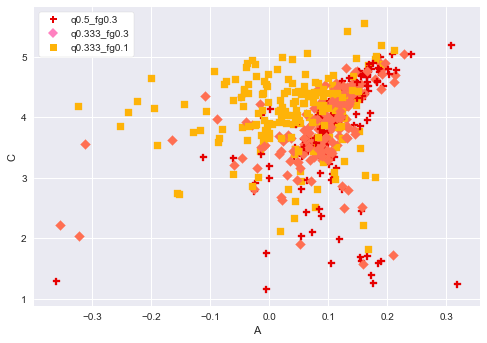

['#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#ff6f52', '#ff6f52', '#ff6f52', '#ff6f52', '#ff6f52', '#ff6f52', '#ff6f52', '#feb308', '#feb308', '#feb308', '#feb308', '#feb308', '#feb308', '#feb308', '#feb308', '#feb308', '#feb308', '#feb308', '#feb308', '#feb308', '#feb308', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#feb308', '#feb308', '#feb308', '#feb308', '#feb308', '#feb308', '#feb308', '#ff6f52', '#ff6f52', '#ff6f52', '#ff6f52', '#ff6f52', '#ff6f52', '#feb308', '#feb308', '#feb308', '#feb308', '#feb308', '#feb308', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#ff6f52', '#ff6f52', '#ff6f52', '#ff6f52', '#ff6f52', '#ff6f52', '#ff6f52', '#feb308', '#feb308', '#feb308', '#feb308', '#feb308', '#feb308', '#feb308', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#ff6f52', '#ff6f52', '#ff6f52', '#ff6f52', '#ff6f52', '#ff6f52', '#ff6f52', '#e50000', '#e50000', '#e50000'

In [22]:


from matplotlib.patches import Patch
from matplotlib.lines import Line2D

sns.set_style('darkgrid')#,{'legend.frameon':True})
plt.clf()
for i in range(len(M20_list_all)):
    plt.scatter(S_list_all[i], C_list_all[i], c=color_list_all[i], marker=marker_list_all[i])

legend_elements=[Line2D([0], [0],color='w', markerfacecolor=sns.xkcd_rgb["red"],  marker='P', label='q0.5_fg0.3'),
                Line2D([0], [0],color='w',markerfacecolor=sns.xkcd_rgb["pink"],  marker='D', label='q0.333_fg0.3'),
                Line2D([0], [0],color='w',markerfacecolor=sns.xkcd_rgb["amber"],  marker='s', label='q0.333_fg0.1')]  
#colors=[sns.xkcd_rgb["red"],sns.xkcd_rgb["pink"],sns.xkcd_rgb["amber"],sns.xkcd_rgb["green"],sns.xkcd_rgb["purple"],sns.xkcd_rgb["black"]]
legendary = plt.legend(handles=legend_elements, frameon=True, loc='upper left', framealpha=1)
frame = legendary.get_frame()
frame.set_facecolor('white')
plt.xlabel('A')
plt.ylabel('C')

plt.show()

print(color_list_all)
print(marker_list_all)


In [ ]:
print(2.15/2.2,2.63/2.83,2.63/2.63,2.94/3.52, 8.19/9.17)
print('restarted')
Gini_time = [0.69, 0.6800000000000002, 0.4099999999999997, 0.18999999999999995, 0, 0.9299999999999999, 0.18999999999999995]
A_S_time = [2.0, 1.8599999999999999, 2.3, 0.98, 1.3699999999999997, 2.06, 2.0599999999999996]
A_time = [0.4400000000000001, 0.15000000000000036, 0.8899999999999999, 0.0, 0, 0.6099999999999997, 0.0]
LDA_time = [2.15, 2.63, 2.54, 2.9400000000000004, 8.19, 2.7399999999999998, 7.699999999999999]
myr_total = [2.1999999999999997, 2.83, 2.6399999999999997, 3.5200000000000005, 9.17, 7.990000000000001,9.17]


In [16]:
'''
~~~
Makes the cool looking overall plots and calculates the observability timescales
~~~
'''


import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import itertools

   # from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#example-model-selection-plot-confusion-matrix-py
def plot_confusion_matrix(cm, target_names, title, cmap=plt.cm.Blues):
    sns.set_style("dark")
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    target_names=['Nonmerger','Merger']
    plt.xticks(tick_marks, target_names)#, rotation=45)
    plt.yticks(tick_marks, target_names)
    #plt.tight_layout()
    plt.ylabel('True label', size=20)
    plt.xlabel('Predicted label', size=20)
    
    fmt = '.2f' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
import sklearn.metrics as metrics


def lda_classify(v, levels, cutoffpoints):
    for level, cutoff in zip(reversed(levels), reversed(cutoffpoints)):
        if v > cutoff: return level
    return levels[0]

'''def box_m(X0,X1):

        global Xp

        m = 2
        k = len((X0))
        n_1 = len(X0[0])
        n_2 = len(X1[0])
        n = len(X0[0])+len(X1[0])
        
        print(( ((n_1-1)*(X0)) + ((n_2-1)*(X1)) ))

        Xp = ( ((n_1-1)*(X0)) + ((n_2-1)*(X1)) ) / (n-m)

        M = ((n-m)*np.log(np.linalg.det(Xp))) \
         - (n_1-1)*(np.log(np.linalg.det((X0)))) - (n_2-1)*(np.log(np.linalg.det((X1))))

        c = ( ( 2*(k**2) + (3*k) - 1 ) / ( (6*(k+1)*(m-1)) ) ) \
            * ( (1/(n_1-1)) + (1/(n_2-1)) - (1/(n-m)) )

        df = (k*(k+1)*(m-1))/2

        c2 = ( ((k-1)*(k+2)) / (6*(m-1)) ) \
            * ( (1/((n_1-1)**2)) + (1/((n_2-1)**2)) - (1/((n-m)**2)) )

        df2 = (df+2) / (np.abs(c2-c**2))

        if (c2>c**2):

            a_plus = df / (1-c-(df/df2))

            F = M / a_plus

        else:

            a_minus = df2 / (1-c+(2/df2))

            F = (df2*M) / (df*(a_minus-M))

        print('M = {}'.format(M))
        print('c = {}'.format(c))
        print('c2 = {}'.format(c2))
        print('-------------------')
        print('df = {}'.format(df))
        print('df2 = {}'.format(df2))
        print('-------------------')
        print('F = {}'.format(F)) '''

def box_m(X0,X1):

        global Xp

        m = 2
        k = len(np.cov(X0))
        n_1 = len(X0[0])
        n_2 = len(X1[0])
        n = len(X0[0])+len(X1[0])

        Xp = ( ((n_1-1)*np.cov(X0)) + ((n_2-1)*np.cov(X1)) ) / (n-m)

        M = ((n-m)*np.log(np.linalg.det(Xp))) \
         - (n_1-1)*(np.log(np.linalg.det(np.cov(X0)))) - (n_2-1)*(np.log(np.linalg.det(np.cov(X1))))

        c = ( ( 2*(k**2) + (3*k) - 1 ) / ( (6*(k+1)*(m-1)) ) ) \
            * ( (1/(n_1-1)) + (1/(n_2-1)) - (1/(n-m)) )

        df = (k*(k+1)*(m-1))/2

        c2 = ( ((k-1)*(k+2)) / (6*(m-1)) ) \
            * ( (1/((n_1-1)**2)) + (1/((n_2-1)**2)) - (1/((n-m)**2)) )

        df2 = (df+2) / (np.abs(c2-c**2))

        if (c2>c**2):

            a_plus = df / (1-c-(df/df2))

            F = M / a_plus

        else:

            a_minus = df2 / (1-c+(2/df2))

            F = (df2*M) / (df*(a_minus-M))

        print('M = {}'.format(M))
        print('c = {}'.format(c))
        print('c2 = {}'.format(c2))
        print('-------------------')
        print('df = {}'.format(df))
        print('df2 = {}'.format(df2))
        print('-------------------')
        print('F = {}'.format(F)) 

def plot_mean_and_CI(mean, lb, ub, color_mean=None, color_shading=None):
        # plot the shaded range of the confidence intervals
        plt.fill_between(range(mean.shape[0]), ub, lb,
                         color=color_shading, alpha=.5)
        # plot the mean on top
        plt.plot(mean, color_mean)


feature_dict = {i:label for i,label in zip(
                range(14),
                  ('Counter',
                  'Image',
                  'class label',
                  'Myr',
                  'Viewpoint',
                '# Bulges',
                   'Sep',
                   'Flux Ratio',
                  'Gini',
                  'M20',
                  'Concentration (C)',
                  'Asymmetry (A)',
                  'Clumpiness (S)',
                  'Sersic N',
                  'Shape Asymmetry (A_S)'))}

#Counter	Image	Merger (0 = no, 1 = yes)	Myr	Viewpoint	Gini	M20	C	A	S	Sersic n
'''view=0
df = pd.io.parsers.read_table(
    filepath_or_buffer='PCA_img_0.txt',
    header=[0],
    sep='\t', skiprows=14*view,nrows=14
    )#,skiprows=10,nrows=10'''




#list_runs=['fg3_m_12','fg1_m_13']
list_runs=['fg3_m12_no_200', 'fg1_m13_no_200', 'fg3_m15_no_200', 'fg3_m1_10_no_200', 'all']

list_runs=['fg3_m12','fg3_m13','fg1_m13','fg3_m15','fg3_m1_10']

list_runs=['fg3_m1_10']

add_noise='no'
loop='no'

gini_means_all=[]
m20_means_all=[]
color_means_all=[]
A_means_all=[]
A_S_means_all=[]
C_means_all=[]
n_means_all=[]
S_means_all=[]

gini_means_all_non=[]
m20_means_all_non=[]
color_means_all_non=[]
A_means_all_non=[]
A_S_means_all_non=[]
C_means_all_non=[]
n_means_all_non=[]
S_means_all_non=[]

colors=[sns.xkcd_rgb["red"],sns.xkcd_rgb["pink"],sns.xkcd_rgb["amber"],sns.xkcd_rgb["green"],sns.xkcd_rgb["purple"],sns.xkcd_rgb["black"]]
#colors=[sns.xkcd_rgb["red"],sns.xkcd_rgb["amber"],sns.xkcd_rgb["green"],sns.xkcd_rgb["purple"]]
names=['q0.5_fg0.3','q0.333_fg0.3','q0.333_fg0.1','q0.2_fg0.3_BT0.2','q0.1_fg0.3_BT0.2','All Combined']

dashed_line_x=np.linspace(-0.5,-3,100)
dashed_line_y=[-0.14*x + 0.33 for x in dashed_line_x]



for i in range(len(list_runs)):
   
    add_on=list_runs[i]
    
    run=list_runs[i]

    df = pd.io.parsers.read_table(
        filepath_or_buffer='LDA_'+str(run)+'.txt',#'_view_all.txt',#filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
        header=[0],
        sep='\t'
        )#,skiprows=10,nrows=10
        ##filepath_or_buffer='LDA_img_ratio_statmorph_'+str(run)+'.txt',#'_view_all.txt',

    df.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']

    df.dropna(how="all", inplace=True) # to drop the empty line at file-end




    for j in range(len(df)):
        if df[['Myr']].values[j][0]<0.40:# and df[['Sep']].values[j][0]==0.0 and df[['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]
            df.set_value(j,'class label',0)
        if add_on=='fg3_m12' and (df[['Myr']].values[j][0]-2.15) > 0.5:#0.39+0.1:#was 0.39
            df.set_value(j,'class label',0)
            
        if add_on=='fg1_m13' and (df[['Myr']].values[j][0]-2.74) > 0.5:#2.74-2.25+2.74:#was 0.39
            #print('deleting this',df[['Myr']].values[j][0])
            df.set_value(j,'class label',0)
            
        if add_on=='fg3_m13' and (df[['Myr']].values[j][0]-2.64) > 0.5:#2.64-2.44+2.64:
            df.set_value(j,'class label',0)
        if add_on=='fg3_m15' and (df[['Myr']].values[j][0]-3.72) > 0.5:
            df.set_value(j,'class label',0)
        if add_on=='fg3_m1_10' and (df[['Myr']].values[j][0]-9.17) > 0.5:
            df.set_value(j,'class label',0)
    
    
    
    
    df.dropna(inplace=True) # to drop the empty line at file-end
    
    myr=[]
    myr_non=[]
    for j in range(len(df)):
        if df[['class label']].values[j][0]==0:
            myr_non.append(df[['Myr']].values[j][0])
            print(df[['Myr']].values[j][0], df[['Viewpoint']].values[j][0],df[['Shape Asymmetry']].values[j][0])
        
        else:
            myr.append(df[['Myr']].values[j][0])

    myr_non=sorted(list(set(myr_non)))
    myr=sorted(list(set(myr)))
    STOP
    

    from sklearn.preprocessing import LabelEncoder
    def gini_m20(row):
        return row['Gini']*row['M20']
    def gini_C(row):
        return row['Gini']*row['Concentration (C)']
    def gini_A(row):
        return row['Gini']*row['Asymmetry (A)']
    def gini_S(row):
        return row['Gini']*row['Clumpiness (S)']
    def gini_n(row):
        return row['Gini']*row['Sersic N']
    def gini_A_S(row):
        return row['Gini']*row['Shape Asymmetry']
    
    def M20_C(row):
        return row['M20']*row['Concentration (C)']
    def M20_A(row):
        return row['M20']*row['Asymmetry (A)']
    def M20_S(row):
        return row['M20']*row['Clumpiness (S)']
    def M20_n(row):
        return row['M20']*row['Sersic N']
    def M20_A_S(row):
        return row['M20']*row['Shape Asymmetry']
    
    def C_A(row):
        return row['Concentration (C)']*row['Asymmetry (A)']
    def C_S(row):
        return row['Concentration (C)']*row['Clumpiness (S)']
    def C_n(row):
        return row['Concentration (C)']*row['Sersic N']
    def C_A_S(row):
        return row['Concentration (C)']*row['Shape Asymmetry']
    
    
    def A_S(row):
        return row['Asymmetry (A)']*row['Clumpiness (S)']
    def A_n(row):
        return row['Asymmetry (A)']*row['Sersic N']
    def A_A_S(row):
        return row['Asymmetry (A)']*row['Shape Asymmetry']
    
    def S_n(row):
        return row['Clumpiness (S)']*row['Sersic N']
    def S_A_S(row):
        return row['Clumpiness (S)']*row['Shape Asymmetry']
    
    def n_A_S(row):
        return row['Sersic N']*row['Shape Asymmetry']
    
    df['Gini*M20'] = df.apply(gini_m20,axis=1)
    df['Gini*C'] = df.apply(gini_C,axis=1)
    df['Gini*A'] = df.apply(gini_A,axis=1)
    df['Gini*S'] = df.apply(gini_S,axis=1)
    df['Gini*n'] = df.apply(gini_n,axis=1)
    df['Gini*A_S'] = df.apply(gini_A_S,axis=1)
    
    df['M20*C'] = df.apply(M20_C,axis=1)
    df['M20*A'] = df.apply(M20_A,axis=1)
    df['M20*S'] = df.apply(M20_S,axis=1)
    df['M20*n'] = df.apply(M20_n,axis=1)
    df['M20*A_S'] = df.apply(M20_A_S,axis=1)
    
    df['C*A'] = df.apply(C_A,axis=1)
    df['C*S'] = df.apply(C_S,axis=1)
    df['C*n'] = df.apply(C_n,axis=1)
    df['C*A_S'] = df.apply(C_A_S,axis=1)
    
    df['A*S'] = df.apply(A_S,axis=1)
    df['A*n'] = df.apply(A_n,axis=1)
    df['A*A_S'] = df.apply(A_A_S,axis=1)
    
    df['S*n'] = df.apply(S_n,axis=1)
    df['S*A_S'] = df.apply(S_A_S,axis=1)
    
    df['n*A_S'] = df.apply(n_A_S,axis=1)
    #print(df)
    
    
    
    
    
    if add_noise=='yes':
        '''
        gini mean and std 0.5550252680173879 0.044777018337496165
        m20 mean and std -1.9712343829804506 0.37871210199946886
        C mean and std 3.5465035077152782 0.4881519277500404
        A mean and std 0.09206940323506102 0.053844924631844704
        S mean and std 0.10754825107906933 0.04718783593571886
        A_S mean and std 0.131905632525 0.12206728280147515
        n mean and std 1.7474 1.65464914861127
        '''
        noise_vec=np.array([0.045,0.379,0.488,0.054,0.047,1.655,0.122])
        add=np.zeros((len(df), len(noise_vec)))
        for j in range(len(df)):
            
            for k in range(len(noise_vec)):
                if df[['class label']].values[j]==0:
                    s = np.random.normal(0, noise_vec[k], 1)
                    add[j,k]=s
                else:
                    s = np.random.normal(0, 0, 1)
                    add[j,k]=s
        X= df[['Gini','M20','Concentration (C)', 'Asymmetry (A)','Clumpiness (S)', 'Sersic N', 'Shape Asymmetry']].values+add
    
    else:
        X= df[['Gini','M20','Concentration (C)', 'Asymmetry (A)', 'Clumpiness (S)','Sersic N', 'Shape Asymmetry']].values
    
    
    '''Now I will make the actual plots of predictor space'''
    


    gini = {key:[] for key in myr}
    m20 = {key:[] for key in myr}
    
    gini_std = {key:[] for key in myr}
    m20_std = {key:[] for key in myr}

    C = {key:[] for key in myr}
    A = {key:[] for key in myr}
    S = {key:[] for key in myr}

    A_S = {key:[] for key in myr}
    n = {key:[] for key in myr}

    gini_non = {key:[] for key in myr_non}
    m20_non = {key:[] for key in myr_non}
    
    gini_non_std = {key:[] for key in myr_non}
    m20_non_std = {key:[] for key in myr_non}

    C_non = {key:[] for key in myr_non}
    A_non = {key:[] for key in myr_non}
    S_non = {key:[] for key in myr_non}

    n_non = {key:[] for key in myr_non}
    A_S_non = {key:[] for key in myr_non}


    
    for l in range(len(df)):
        if df[['class label']].values[l]==0:
            
            gini_non[df[['Myr']].values[l][0]].append(X[l,0])
            m20_non[df[['Myr']].values[l][0]].append(X[l,1])
            #gini_non_std[df[['Myr']].values[l][0]].append((X[l,0]-std_scale.mean_[0])/np.sqrt(std_scale.var_[0]))
            #m20_non_std[df[['Myr']].values[l][0]].append((X[l,1]-std_scale.mean_[1])/np.sqrt(std_scale.var_[1]))
            C_non[df[['Myr']].values[l][0]].append(X[l,2])
            A_non[df[['Myr']].values[l][0]].append(X[l,3])
            S_non[df[['Myr']].values[l][0]].append(X[l,4])
            A_S_non[df[['Myr']].values[l][0]].append(X[l,6])
            n_non[df[['Myr']].values[l][0]].append(X[l,5])
            #print('concentration here', df[['Concentration (C)']].values[i][0])
        else:
            gini[df[['Myr']].values[l][0]].append(X[l,0])
            m20[df[['Myr']].values[l][0]].append(X[l,1])
            #gini_std[df[['Myr']].values[l][0]].append((X[l,0]-std_scale.mean_[0])/np.sqrt(std_scale.var_[0]))
            #m20_std[df[['Myr']].values[l][0]].append((X[l,1]-std_scale.mean_[1])/np.sqrt(std_scale.var_[1]))
            C[df[['Myr']].values[l][0]].append(X[l,2])
            A[df[['Myr']].values[l][0]].append(X[l,3])
            S[df[['Myr']].values[l][0]].append(X[l,4])
            A_S[df[['Myr']].values[l][0]].append(X[l,6])
            n[df[['Myr']].values[l][0]].append(X[l,5])
    G_list_all_non=[]
    M20_list_all_non=[]
    G_list_all_non_std=[]
    M20_list_all_non_std=[]
    A_list_all_non=[]
    C_list_all_non=[]
    S_list_all_non=[]
    A_S_list_all_non=[]
    n_list_all_non=[]
    color_list_all_non=[]
    color_list_all_non_std=[]
    

    G_list_all=[]
    M20_list_all=[]
    G_list_all_std=[]
    M20_list_all_std=[]
    A_list_all=[]
    C_list_all=[]
    S_list_all=[]
    A_S_list_all=[]
    n_list_all=[]
    color_list_all=[]
    color_list_all_std=[]
    
    gini_means_non=[]
    m20_means_non=[]
    color_means_non=[]
    A_means_non=[]
    A_S_means_non=[]
    C_means_non=[]
    n_means_non=[]
    S_means_non=[]
    
    counter_A_non=0
    counter_A_S_non=0
    counter_gini_non=0
    counter_overall_non=0
    
    '''for k in range(len(gini_non_std)):
        for z in range(len(gini_non_std[myr_non[k]])):
            M20_list_all_non_std.append((m20_non_std[myr_non[k]][z]))
            G_list_all_non_std.append((gini_non_std[myr_non[k]][z]))
            color_list_all_non_std.append(myr_non[k]/100)'''
    for k in range(len(gini_non)):
        for z in range(len(gini_non[myr_non[k]])):
            counter_overall_non+=1
            M20_list_all_non.append((m20_non[myr_non[k]][z]))
            G_list_all_non.append((gini_non[myr_non[k]][z]))
            C_list_all_non.append((C_non[myr_non[k]][z]))
            A_list_all_non.append((A_non[myr_non[k]][z]))
            S_list_all_non.append((S_non[myr_non[k]][z]))
            n_list_all_non.append((n_non[myr_non[k]][z]))
            A_S_list_all_non.append((A_S_non[myr_non[k]][z]))
            color_list_all_non.append(myr_non[k]/1)
            
            if A_non[myr_non[k]][z] > 0.35:
                counter_A_non+=1
            if A_S_non[myr_non[k]][z] > 0.2:
                counter_A_S_non+=1
            if gini_non[myr_non[k]][z] > (-0.14*m20_non[myr_non[k]][z] + 0.33):#-0.14*x + 0.33
                counter_gini_non+=1
            
        A_means_non.append(np.mean(A_non[myr_non[k]][:]))
        A_S_means_non.append(np.mean(A_S_non[myr_non[k]][:]))
        color_means_non.append((myr_non[k]/1))
        gini_means_non.append(np.mean(gini_non[myr_non[k]][:]))
        m20_means_non.append(np.mean(m20_non[myr_non[k]][:]))
        C_means_non.append(np.mean(C_non[myr_non[k]][:]))
        n_means_non.append(np.mean(n_non[myr_non[k]][:]))
        S_means_non.append(np.mean(S_non[myr_non[k]][:]))
    gini_means=[]
    m20_means=[]
    color_means=[]
    A_means=[]
    A_S_means=[]
    n_means=[]
    C_means=[]
    S_means=[]
    counter_A=0
    counter_A_S=0
    counter_gini=0
    counter_overall=0
    
    for k in range(len(gini)):
        for z in range(len(gini[myr[k]])):
            counter_overall+=1
            M20_list_all.append((m20[myr[k]][z]))
            G_list_all.append((gini[myr[k]][z]))
            
            C_list_all.append((C[myr[k]][z]))
            A_list_all.append((A[myr[k]][z]))
            S_list_all.append((S[myr[k]][z]))
            n_list_all.append((n[myr[k]][z]))
            A_S_list_all.append((A_S[myr[k]][z]))
            
            color_list_all.append((myr[k]))#/((t_p-t_e)/2+t_e))
            if A[myr[k]][z] > 0.35:
                counter_A+=1
            if A_S[myr[k]][z] > 0.2:
                counter_A_S+=1
            if gini[myr[k]][z] > (-0.14*m20[myr[k]][z] + 0.33):#-0.14*x + 0.33
                counter_gini+=1
        A_means.append(np.mean(A[myr[k]][:]))
        A_S_means.append(np.mean(A_S[myr[k]][:]))
        color_means.append((myr[k]/1))
        gini_means.append(np.mean(gini[myr[k]][:]))
        m20_means.append(np.mean(m20[myr[k]][:]))
        C_means.append(np.mean(C[myr[k]][:]))
        n_means.append(np.mean(n[myr[k]][:]))
        S_means.append(np.mean(S[myr[k]][:]))
    '''for k in range(len(gini_std)):
        for z in range(len(gini_std[myr[k]])):
            M20_list_all_std.append((m20_std[myr[k]][z]))
            G_list_all_std.append((gini_std[myr[k]][z]))
            color_list_all_std.append((myr[k]/100))'''
    gini_means_all.append(gini_means)
    m20_means_all.append(m20_means)
    color_means_all.append(color_means)
    A_means_all.append(A_means)
    A_S_means_all.append(A_S_means)
    C_means_all.append(C_means)
    n_means_all.append(n_means)
    S_means_all.append(S_means)
    
    gini_means_all_non.append(gini_means_non)
    m20_means_all_non.append(m20_means_non)
    color_means_all_non.append(color_means_non)
    A_means_all_non.append(A_means_non)
    A_S_means_all_non.append(A_S_means_non)
    C_means_all_non.append(C_means_non)
    n_means_all_non.append(n_means_non)
    S_means_all_non.append(S_means_non)
    
    
    try:
        print('A accuracy',(counter_A+(counter_overall_non-counter_A_non))/(counter_overall+counter_overall_non), 'P',counter_A/(counter_A+counter_A_non))
        print('A_S accuracy',(counter_A_S+(counter_overall_non-counter_A_S_non))/(counter_overall+counter_overall_non), 'P',counter_A_S/(counter_A_S+counter_A_S_non))
        print('Gini accuracy',(counter_gini+(counter_overall_non-counter_gini_non))/(counter_overall+counter_overall_non), 'P',counter_gini/(counter_gini+counter_gini_non))
    except ZeroDivisionError:
        print('A accuracy',(counter_A+(counter_overall_non-counter_A_non))/(counter_overall+counter_overall_non), 'P',counter_A,(counter_A+counter_A_non))
        print('A_S accuracy',(counter_A_S+(counter_overall_non-counter_A_S_non))/(counter_overall+counter_overall_non), 'P',counter_A_S,(counter_A_S+counter_A_S_non))
        print('Gini accuracy',(counter_gini+(counter_overall_non-counter_gini_non))/(counter_overall+counter_overall_non), 'P',counter_gini,(counter_gini+counter_gini_non))
    
        
        
    
    
    
    '''Make the beautiful list of colors'''
    # These are the "Tableau 20" colors as RGB.    
    tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
                 (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
                 (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
                 (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
                 (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    

    # Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
    for k in range(len(tableau20)):    
        r, g, b = tableau20[k]    
        tableau20[k] = (r / 255., g / 255., b / 255.)    


    
    import seaborn
    sns.set_style("darkgrid")
    
    plt.clf()
    fig=plt.figure()
    ax1=fig.add_subplot(111)
    ax1.plot(dashed_line_x, dashed_line_y, ls='--', color='black')



        #ax1.scatter(m20[myr[k]],gini[myr[k]],color=tableau20[k], label=myr[k])
    #print(np.shape(m20),np.shape(myr))
    #ax1.scatter(m20,gini,c=myr)
    #plt.colorbar(im1)
    
    
    im1=ax1.scatter(m20_means, gini_means, c=color_means, cmap='Reds', s=35)
    plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')

    
    for j,k,l in zip(m20_means,gini_means,color_means):
        ax1.annotate('%s' %l, xy=(j,k), xytext=(j,k))
        
        
        
    
    ax1.set_xlim([max(m20_means),min(m20_means)])
    ax1.set_ylim([min(gini_means),max(gini_means)])#ax1.set_ylim([0.3,0.8])
    ax1.set_xlabel(r'M$_{20}$')
    ax1.set_ylabel(r'Gini')
    ax1.set_aspect(abs(max(m20_means)-min(m20_means))/abs(min(gini_means)-max(gini_means)))



    ax1.set_title('Mergers', loc='right')
    plt.savefig('../MaNGA_Papers/Paper_I/time_evo_gini_m20_'+str(run)+'.pdf')
    
    plt.clf()
    plt.plot(myr,A_means)
    for j,k in zip(myr,A_means):
        plt.annotate('%s' %j, xy=(j,k), xytext=(j,k))

    plt.axhline(y=0.35)
    plt.savefig('../MaNGA_Papers/Paper_I/time_evo_A_'+str(run)+'.pdf')
    
    plt.clf()
    plt.plot(myr,A_S_means)
    for j,k in zip(myr,A_S_means):
        plt.annotate('%s' %j, xy=(j,k), xytext=(j,k))

    plt.axhline(y=0.2)
    plt.savefig('../MaNGA_Papers/Paper_I/time_evo_A_S_'+str(run)+'.pdf')
    

    plt.clf()
    fig=plt.figure()
    ax1=fig.add_subplot(121)
    ax1.plot(dashed_line_x, dashed_line_y, ls='--', color='black')



        #ax1.scatter(m20[myr[k]],gini[myr[k]],color=tableau20[k], label=myr[k])
    #print(np.shape(m20),np.shape(myr))
    #ax1.scatter(m20,gini,c=myr)
    #plt.colorbar(im1)
    
    
    im1=ax1.scatter(M20_list_all, G_list_all, c=color_list_all, cmap='Reds', s=35)
    plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')

    ax1.set_xlim([0,-3])
    ax1.set_ylim([0.2,0.8])#ax1.set_ylim([0.3,0.8])
    ax1.set_xlabel(r'M$_{20}$')
    ax1.set_ylabel(r'Gini')
    ax1.set_aspect(abs(3)/abs(0.6))



    ax1.set_title('Mergers', loc='right')
    #ax1.annotate('', xy=(0.03,1.05),xycoords='axes fraction',size=15)



    ax2=fig.add_subplot(122)
    ax2.plot(dashed_line_x, dashed_line_y, ls='--', color='black')


        #ax1.scatter(m20[myr[k]],gini[myr[k]],color=tableau20[k], label=myr[k])
    #print(np.shape(m20),np.shape(myr))
    #ax1.scatter(m20,gini,c=myr)
    #plt.colorbar(im1)
    print('mean gini merger',np.mean(G_list_all))
    print('mean gini nonmerger',np.mean(G_list_all_non))
    im2=ax2.scatter(M20_list_all_non, G_list_all_non, c=color_list_all_non, cmap='Blues', s=35)
    #ax2.scatter(np.mean(m20_non), np.mean(gini_non), s=40, color='red')
    #ax2.errorbar(np.mean(m20_non), np.mean(gini_non),xerr=np.std(m20_non), yerr=np.std(gini_non), ecolor='red')

    plt.colorbar(im2, label='Time [Gyr]',orientation='horizontal')

    ax2.set_xlim([0,-3])
    ax2.set_ylim([0.2,0.8])#ax1.set_ylim([0.3,0.8])
    ax2.set_xlabel(r'M$_{20}$')
    ax2.set_ylabel(r'Gini')
    ax2.set_aspect(abs(3)/abs(0.6))


    ax2.set_title('Nonmergers', loc='right')
    #ax1.set_aspect('equal')
    plt.tight_layout()
    plt.savefig('../MaNGA_Papers/Paper_I/gini_m20_cont_statmorph_nonoise_'+str(run)+'.pdf')
    
    
    '''plt.clf()
    fig=plt.figure()
    ax1=fig.add_subplot(121)
    #ax1.plot(dashed_line_x, dashed_line_y, ls='--', color='black')



        #ax1.scatter(m20[myr[k]],gini[myr[k]],color=tableau20[k], label=myr[k])
    #print(np.shape(m20),np.shape(myr))
    #ax1.scatter(m20,gini,c=myr)
    #plt.colorbar(im1)
    
    
    im1=ax1.scatter(M20_list_all_std, G_list_all_std, c=color_list_all, cmap='Reds', s=35)
    ax1.scatter(np.mean(M20_list_all_std), np.mean(G_list_all_std), color='black', s=100)
    plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')

    ax1.set_xlim([-3,3])
    ax1.set_ylim([-2,5])#ax1.set_ylim([0.3,0.8])
    ax1.set_xlabel(r'M$_{20}$')
    ax1.set_ylabel(r'Gini')
    ax1.set_aspect(abs(6)/abs(7))



    ax1.set_title('Mergers', loc='right')
    #ax1.annotate('', xy=(0.03,1.05),xycoords='axes fraction',size=15)



    ax2=fig.add_subplot(122)
    #ax2.plot(dashed_line_x, dashed_line_y, ls='--', color='black')


        #ax1.scatter(m20[myr[k]],gini[myr[k]],color=tableau20[k], label=myr[k])
    #print(np.shape(m20),np.shape(myr))
    #ax1.scatter(m20,gini,c=myr)
    #plt.colorbar(im1)
    print('mean gini merger std',np.mean(G_list_all_std))
    print('mean gini nonmerger std',np.mean(G_list_all_non_std))
    im2=ax2.scatter(M20_list_all_non_std, G_list_all_non_std, c=color_list_all_non, cmap='Blues', s=35)
    ax2.scatter(np.mean(M20_list_all_non_std), np.mean(G_list_all_non_std), color='blue', s=100)
    
    #ax2.scatter(np.mean(m20_non), np.mean(gini_non), s=40, color='red')
    #ax2.errorbar(np.mean(m20_non), np.mean(gini_non),xerr=np.std(m20_non), yerr=np.std(gini_non), ecolor='red')

    plt.colorbar(im2, label='Time [Gyr]',orientation='horizontal')

    ax2.set_xlim([-3,3])
    ax2.set_ylim([-2,5])#ax1.set_ylim([0.3,0.8])
    ax2.set_xlabel(r'M$_{20}$')
    ax2.set_ylabel(r'Gini')
    ax2.set_aspect(abs(6)/abs(7))


    ax2.set_title('Nonmergers', loc='right')
    #ax1.set_aspect('equal')
    plt.tight_layout()
    plt.savefig('../MaNGA_Papers/Paper_I/gini_m20_cont_statmorph_nonoise_std_'+str(run)+'.pdf')'''
    
    
    plt.clf()
    fig=plt.figure()
    ax1=fig.add_subplot(121)





    im1=ax1.scatter(A_list_all, C_list_all, c=color_list_all, cmap='Reds', s=35)
    plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')
    #print(np.shape(m20),np.shape(myr))
    #ax1.scatter(m20,gini,c=myr)
    #plt.colorbar(im1)

    ax1.set_xlim([0,1])
    ax1.set_ylim([0,6])#ax1.set_ylim([0.3,0.8])
    ax1.set_xlabel(r'A')
    ax1.set_ylabel(r'C')
    ax1.set_aspect(1/6)

    #ax1.legend(loc='lower center',
    #          ncol=2)
    ax1.set_title('Mergers', loc='right')

    #ax1.annotate(str(NAME), xy=(0.03,1.05),xycoords='axes fraction',size=15)
    plt.axvline(x=0.35, ls='--', color='black')


    ax2=fig.add_subplot(122)



    im1=ax2.scatter(A_list_all_non, C_list_all_non, c=color_list_all_non, cmap='Blues', s=35)
    plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')

    ax2.set_xlim([0,1])
    ax2.set_ylim([0,6])#ax1.set_ylim([0.3,0.8])
    ax2.set_xlabel(r'A')
    ax2.set_ylabel(r'C')
    ax2.set_aspect(1/6)
    plt.axvline(x=0.35, ls='--', color='black')


    #ax2.legend(loc='lower center',
    #          ncol=2)
    ax2.set_title('Nonmergers', loc='right')
    #ax1.set_aspect('equal')
    plt.tight_layout()
    plt.savefig('../MaNGA_Papers/Paper_I/C_A_cont_statmorph_nonoise_'+str(run)+'.pdf')
    
    plt.clf()
    fig=plt.figure()
    ax1=fig.add_subplot(121)





    im1=ax1.scatter(S_list_all, C_list_all, c=color_list_all, cmap='Reds', s=35)
    plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')
    #print(np.shape(m20),np.shape(myr))
    #ax1.scatter(m20,gini,c=myr)
    #plt.colorbar(im1)

    ax1.set_xlim([0,1])
    ax1.set_ylim([0,6])#ax1.set_ylim([0.3,0.8])
    ax1.set_xlabel(r'S')
    ax1.set_ylabel(r'C')
    ax1.set_aspect(1/6)

    #ax1.legend(loc='lower center',
    #          ncol=2)
    ax1.set_title('Mergers', loc='right')

    #ax1.annotate(str(NAME), xy=(0.03,1.05),xycoords='axes fraction',size=15)
    plt.axvline(x=0.35, ls='--', color='black')


    ax2=fig.add_subplot(122)



    im1=ax2.scatter(S_list_all_non, C_list_all_non, c=color_list_all_non, cmap='Blues', s=35)
    plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')

    ax2.set_xlim([0,1])
    ax2.set_ylim([0,6])#ax1.set_ylim([0.3,0.8])
    ax2.set_xlabel(r'S')
    ax2.set_ylabel(r'C')
    ax2.set_aspect(1/6)
    plt.axvline(x=0.35, ls='--', color='black')


    #ax2.legend(loc='lower center',
    #          ncol=2)
    ax2.set_title('Nonmergers', loc='right')
    #ax1.set_aspect('equal')
    plt.tight_layout()
    plt.savefig('../MaNGA_Papers/Paper_I/C_S_cont_statmorph_nonoise_'+str(run)+'.pdf')


    '''

    Now for n-A_S plot

    '''
    plt.clf()
    fig=plt.figure()
    ax1=fig.add_subplot(121)





    im1=ax1.scatter(A_S_list_all, n_list_all, c=color_list_all, cmap='Reds', s=35)
    plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')
    #print(np.shape(m20),np.shape(myr))
    #ax1.scatter(m20,gini,c=myr)
    #plt.colorbar(im1)

    ax1.set_xlim([0,1])
    ax1.set_ylim([0,4])#ax1.set_ylim([0.3,0.8])
    ax1.set_xlabel(r'$A_S$')
    ax1.set_ylabel(r'$n$')
    ax1.set_aspect(1/4)

    #ax1.legend(loc='lower center',
    #          ncol=2)
    ax1.set_title('Mergers', loc='right')

    #ax1.annotate(str(NAME), xy=(0.03,1.05),xycoords='axes fraction',size=15)
    plt.axvline(x=0.2, ls='--', color='black')


    ax2=fig.add_subplot(122)


    im1=ax2.scatter(A_S_list_all_non, n_list_all_non, c=color_list_all_non, cmap='Blues', s=35)
    plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')

    ax2.set_xlim([0,1])
    ax2.set_ylim([0,4])#ax1.set_ylim([0.3,0.8])
    ax2.set_xlabel(r'$A_S$')
    ax2.set_ylabel(r'$n$')
    ax2.set_aspect(1/4)
    plt.axvline(x=0.2, ls='--', color='black')


    #ax2.legend(loc='lower center',
    #          ncol=2)
    ax2.set_title('Nonmergers', loc='right')
    #ax1.set_aspect('equal')
    plt.tight_layout()
    plt.savefig('../MaNGA_Papers/Paper_I/n_A_S_cont_statmorph_nonoise_'+str(run)+'.pdf')
    
    
    
    

plt.clf()
fig=plt.figure()
ax1=fig.add_subplot(121)
ax1.plot(dashed_line_x, dashed_line_y, ls='--', color='black')



    #ax1.scatter(m20[myr[k]],gini[myr[k]],color=tableau20[k], label=myr[k])
#print(np.shape(m20),np.shape(myr))
#ax1.scatter(m20,gini,c=myr)
#plt.colorbar(im1)


im1=ax1.scatter(m20_means_all[0], gini_means_all[0], color='red',  s=25)

im2=ax1.scatter(m20_means_all[1], gini_means_all[1], color=sns.xkcd_rgb["pink"], s=25)

im3=ax1.scatter(m20_means_all[2], gini_means_all[2], color=sns.xkcd_rgb["amber"], s=25)

im4=ax1.scatter(m20_means_all[3], gini_means_all[3], color='green', s=25)

im5=ax1.scatter(m20_means_all[4], gini_means_all[4], color='purple', s=25)
ax1.set_xlim([0,-3])
ax1.set_ylim([0.2,0.8])#ax1.set_ylim([0.3,0.8])
ax1.set_xlabel(r'M$_{20}$')
ax1.set_ylabel(r'Gini')
ax1.set_aspect(abs(3)/abs(0.6))





ax1.set_title('Mergers', loc='right')
#ax1.annotate('', xy=(0.03,1.05),xycoords='axes fraction',size=15)



'''ax2=fig.add_subplot(132)
plt.colorbar(im1, label='q0.5_fg0.3 Time [Gyr]',orientation='horizontal')
plt.colorbar(im2, label='q0.333_fg0.1 Time [Gyr]',orientation='horizontal')
plt.colorbar(im3, label='q0.2_fg0.3_BT0.2 Time [Gyr]',orientation='horizontal')
plt.colorbar(im4, label='q0.1_fg0.3_BT0.2 Time [Gyr]',orientation='horizontal')
'''


ax3=fig.add_subplot(122)
ax3.plot(dashed_line_x, dashed_line_y, ls='--', color='black')

im5=ax3.scatter(m20_means_all_non[0], gini_means_all_non[0], color='red', s=25, label='q0.5_fg0.3')
#plt.colorbar(im5, label='q0.5_fg0.3 IsolatedTime [Gyr]',orientation='horizontal')

im6=ax3.scatter(m20_means_all_non[1], gini_means_all_non[1], color=sns.xkcd_rgb["pink"],  s=25, label='q0.333_fg0.3')

im7=ax3.scatter(m20_means_all_non[2], gini_means_all_non[2], color=sns.xkcd_rgb["amber"],  s=25, label='q0.333_fg0.1')
#plt.colorbar(im6, label='q0.333_fg0.1 Isolated Time [Gyr]',orientation='horizontal')

im8=ax3.scatter(m20_means_all_non[3], gini_means_all_non[3], color='green',  s=25, label='q0.2_fg0.3_BT0.2')
#plt.colorbar(im7, label='q0.2_fg0.3_BT0.2 Isolated Time [Gyr]',orientation='horizontal')

im9=ax3.scatter(m20_means_all_non[4], gini_means_all_non[4], color='purple', s=25, label='q0.1_fg0.3_BT0.2')
#plt.colorbar(im8, label='q0.1_fg0.3_BT0.2 Isolated Time [Gyr]',orientation='horizontal')


ax3.set_xlim([0,-3])
ax3.set_ylim([0.2,0.8])#ax1.set_ylim([0.3,0.8])
ax3.set_xlabel(r'M$_{20}$')
ax3.set_ylabel(r'Gini')
ax3.set_aspect(abs(3)/abs(0.6))


ax3.set_title('Nonmergers', loc='right')
#ax1.set_aspect('equal')
plt.legend()
plt.tight_layout()
plt.savefig('../MaNGA_Papers/Paper_I/gini_m20_overall.pdf')


plt.clf()
fig=plt.figure()
ax1=fig.add_subplot(121)





im1=ax1.scatter(A_means_all[0], C_means_all[0], color='red', s=25)
im1=ax1.scatter(A_means_all[1], C_means_all[1], color=sns.xkcd_rgb["pink"], s=25)

im1=ax1.scatter(A_means_all[2], C_means_all[2], color=sns.xkcd_rgb["amber"], s=25)
im1=ax1.scatter(A_means_all[3], C_means_all[3], color='green', s=25)
im1=ax1.scatter(A_means_all[4], C_means_all[4], color='purple', s=25)


ax1.set_xlim([0,1])
ax1.set_ylim([0,6])#ax1.set_ylim([0.3,0.8])
ax1.set_xlabel(r'A')
ax1.set_ylabel(r'C')
ax1.set_aspect(1/6)

#ax1.legend(loc='lower center',
#          ncol=2)
ax1.set_title('Mergers', loc='right')

#ax1.annotate(str(NAME), xy=(0.03,1.05),xycoords='axes fraction',size=15)
plt.axvline(x=0.35, ls='--', color='black')


ax2=fig.add_subplot(122)



im1=ax2.scatter(A_means_all_non[0], C_means_all_non[0], color='red', s=25, label='q0.5_fg0.3')
im1=ax2.scatter(A_means_all_non[1], C_means_all_non[1], color=sns.xkcd_rgb["pink"], s=25, label='q0.333_f0.3')

im1=ax2.scatter(A_means_all_non[2], C_means_all_non[2], color=sns.xkcd_rgb["amber"], s=25, label='q0.333_f0.1')
im1=ax2.scatter(A_means_all_non[3], C_means_all_non[3], color='green', s=25, label='q0.2_fg0.3_BT0.2')
im1=ax2.scatter(A_means_all_non[4], C_means_all_non[4], color='purple', s=25, label='q0.1_fg0.3_BT0.2')

ax2.set_xlim([0,1])
ax2.set_ylim([0,6])#ax1.set_ylim([0.3,0.8])
ax2.set_xlabel(r'A')
ax2.set_ylabel(r'C')
ax2.set_aspect(1/6)
plt.axvline(x=0.35, ls='--', color='black')
#plt.legend()

#ax2.legend(loc='lower center',
#          ncol=2)
ax2.set_title('Nonmergers', loc='right')
#ax1.set_aspect('equal')
plt.tight_layout()
plt.savefig('../MaNGA_Papers/Paper_I/C_A_overall.pdf')


plt.clf()
fig=plt.figure()
ax1=fig.add_subplot(121)





im1=ax1.scatter(S_means_all[0], C_means_all[0], color='red', s=25)
im1=ax1.scatter(S_means_all[1], C_means_all[1], color=sns.xkcd_rgb["pink"], s=25)
im1=ax1.scatter(S_means_all[2], C_means_all[2], color=sns.xkcd_rgb["amber"], s=25)
im1=ax1.scatter(S_means_all[3], C_means_all[3], color='green', s=25)
im1=ax1.scatter(S_means_all[4], C_means_all[4], color='purple', s=25)


ax1.set_xlim([0,1])
ax1.set_ylim([0,6])#ax1.set_ylim([0.3,0.8])
ax1.set_xlabel(r'S')
ax1.set_ylabel(r'C')
ax1.set_aspect(1/6)

#ax1.legend(loc='lower center',
#          ncol=2)
ax1.set_title('Mergers', loc='right')

#ax1.annotate(str(NAME), xy=(0.03,1.05),xycoords='axes fraction',size=15)
#plt.axvline(x=0.35, ls='--', color='black')


ax2=fig.add_subplot(122)



im1=ax2.scatter(S_means_all_non[0], C_means_all_non[0], color='red', s=25, label='q0.5_fg0.3')
im1=ax2.scatter(S_means_all_non[1], C_means_all_non[1], color=sns.xkcd_rgb["pink"], s=25, label='q0.333_f0.3')

im1=ax2.scatter(S_means_all_non[2], C_means_all_non[2], color=sns.xkcd_rgb["amber"], s=25, label='q0.333_f0.1')
im1=ax2.scatter(S_means_all_non[3], C_means_all_non[3], color='green', s=25, label='q0.2_fg0.3_BT0.2')
im1=ax2.scatter(S_means_all_non[4], C_means_all_non[4], color='purple', s=25, label='q0.1_fg0.3_BT0.2')

ax2.set_xlim([0,1])
ax2.set_ylim([0,6])#ax1.set_ylim([0.3,0.8])
ax2.set_xlabel(r'S')
ax2.set_ylabel(r'C')
ax2.set_aspect(1/6)
#plt.axvline(x=0.35, ls='--', color='black')
#plt.legend()

#ax2.legend(loc='lower center',
#          ncol=2)
ax2.set_title('Nonmergers', loc='right')
#ax1.set_aspect('equal')
plt.tight_layout()
plt.savefig('../MaNGA_Papers/Paper_I/C_S_overall.pdf')



'''

Now for n-A_S plot

'''
plt.clf()
fig=plt.figure()
ax1=fig.add_subplot(121)





im1=ax1.scatter(A_S_means_all[0], n_means_all[0], color='red', s=25)
im1=ax1.scatter(A_S_means_all[1], n_means_all[1], color=sns.xkcd_rgb["pink"], s=25)

im1=ax1.scatter(A_S_means_all[2], n_means_all[2], color=sns.xkcd_rgb["amber"], s=25)
im1=ax1.scatter(A_S_means_all[3], n_means_all[3], color='green', s=25)
im1=ax1.scatter(A_S_means_all[4], n_means_all[4], color='purple', s=25)


ax1.set_xlim([0,1])
ax1.set_ylim([0,4])#ax1.set_ylim([0.3,0.8])
ax1.set_xlabel(r'$A_S$')
ax1.set_ylabel(r'$n$')
ax1.set_aspect(1/4)

#ax1.legend(loc='lower center',
#          ncol=2)
ax1.set_title('Mergers', loc='right')

#ax1.annotate(str(NAME), xy=(0.03,1.05),xycoords='axes fraction',size=15)
plt.axvline(x=0.2, ls='--', color='black')


ax2=fig.add_subplot(122)


im1=ax2.scatter(A_S_means_all_non[0], n_means_all_non[0], color='red', s=25, label='q0.5_fg0.3')
im1=ax2.scatter(A_S_means_all_non[1], n_means_all_non[1], color=sns.xkcd_rgb["pink"], s=25, label='q0.333_fg0.3')

im1=ax2.scatter(A_S_means_all_non[2], n_means_all_non[2], color=sns.xkcd_rgb["amber"], s=25, label='q0.333_fg0.1')
im1=ax2.scatter(A_S_means_all_non[3], n_means_all_non[3], color='green', s=25, label='q0.2_fg0.3_BT0.2')
im1=ax2.scatter(A_S_means_all_non[4], n_means_all_non[4], color='purple', s=25, label='q0.1_fg0.3_BT0.2')

ax2.set_xlim([0,1])
ax2.set_ylim([0,4])#ax1.set_ylim([0.3,0.8])
ax2.set_xlabel(r'$A_S$')
ax2.set_ylabel(r'$n$')
ax2.set_aspect(1/4)
plt.axvline(x=0.2, ls='--', color='black')


#ax2.legend(loc='lower center',
#          ncol=2)
ax2.set_title('Nonmergers', loc='right')
#ax1.set_aspect('equal')
plt.tight_layout()
plt.savefig('../MaNGA_Papers/Paper_I/n_A_S_overall.pdf') 

    
#    savefig('../MaNGA_Papers/ePaper_I/Bayesian_Hist_'+str(run)+'.pdf')

print('finished')

/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:233: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:246: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


0.05 0 0.07907385
0.39 0 0.07655071
9.76 0 0.066658236
9.95 0 0.05338888
10.15 0 0.0840946
10.35 0 0.10242692
10.54 0 0.07784945
10.74 0 0.097079866
11.13 0 0.10874919
0.05 1 0.14081408
0.39 1 0.087206796
9.76 1 0.9888677
9.95 1 0.32339270000000003
10.15 1 0.29758424
10.35 1 0.40935355
10.54 1 0.72283554
10.74 1 0.45484573
11.13 1 0.25219575
0.05 2 0.05353245
0.39 2 0.08884597
9.76 2 0.22934704
9.95 2 0.22569309
10.15 2 0.2128295
10.35 2 0.4596473
10.54 2 0.37067705
10.74 2 0.19798943
11.13 2 0.24655105
0.05 3 0.0952381
0.39 3 0.12454081
9.76 3 0.19469027
9.95 3 0.17175288
10.15 3 0.33347540000000003
10.35 3 0.18149717
10.54 3 0.23490999999999998
10.74 3 0.19450337
11.13 3 0.24731183
0.05 4 0.07941871
0.39 4 0.100443006
9.76 4 0.09807549
9.95 4 0.08946739
10.15 4 0.15320314
10.35 4 0.09202315
10.54 4 0.13803038
10.74 4 0.17211129
11.13 4 0.10618949999999999
0.05 5 0.10166028
0.39 5 0.10334899
9.76 5 0.28793275
9.95 5 0.18214762
10.15 5 0.23958569999999998
10.35 5 0.26195186
10.54 5 0.1

NameError: name 'STOP' is not defined

In [2]:
print('done')
print(r'$\pm$')
print(str(round(np.std(coef_list,axis=0)[0][0],2))+r' $\pm$ ')

done
$\pm$


NameError: name 'coef_list' is not defined

In [22]:
'''
~~~
Introducing Interaction terms
~~~
'''


import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import itertools

   # from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#example-model-selection-plot-confusion-matrix-py
def plot_confusion_matrix(cm, target_names, title, cmap=plt.cm.Blues):
    sns.set_style("dark")
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    target_names=['Nonmerger','Merger']
    plt.xticks(tick_marks, target_names)#, rotation=45)
    plt.yticks(tick_marks, target_names)
    #plt.tight_layout()
    plt.ylabel('True label', size=20)
    plt.xlabel('Predicted label', size=20)
    
    fmt = '.2f' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
import sklearn.metrics as metrics


def lda_classify(v, levels, cutoffpoints):
    for level, cutoff in zip(reversed(levels), reversed(cutoffpoints)):
        if v > cutoff: return level
    return levels[0]

'''def box_m(X0,X1):

        global Xp

        m = 2
        k = len((X0))
        n_1 = len(X0[0])
        n_2 = len(X1[0])
        n = len(X0[0])+len(X1[0])
        
        print(( ((n_1-1)*(X0)) + ((n_2-1)*(X1)) ))

        Xp = ( ((n_1-1)*(X0)) + ((n_2-1)*(X1)) ) / (n-m)

        M = ((n-m)*np.log(np.linalg.det(Xp))) \
         - (n_1-1)*(np.log(np.linalg.det((X0)))) - (n_2-1)*(np.log(np.linalg.det((X1))))

        c = ( ( 2*(k**2) + (3*k) - 1 ) / ( (6*(k+1)*(m-1)) ) ) \
            * ( (1/(n_1-1)) + (1/(n_2-1)) - (1/(n-m)) )

        df = (k*(k+1)*(m-1))/2

        c2 = ( ((k-1)*(k+2)) / (6*(m-1)) ) \
            * ( (1/((n_1-1)**2)) + (1/((n_2-1)**2)) - (1/((n-m)**2)) )

        df2 = (df+2) / (np.abs(c2-c**2))

        if (c2>c**2):

            a_plus = df / (1-c-(df/df2))

            F = M / a_plus

        else:

            a_minus = df2 / (1-c+(2/df2))

            F = (df2*M) / (df*(a_minus-M))

        print('M = {}'.format(M))
        print('c = {}'.format(c))
        print('c2 = {}'.format(c2))
        print('-------------------')
        print('df = {}'.format(df))
        print('df2 = {}'.format(df2))
        print('-------------------')
        print('F = {}'.format(F)) '''

def box_m(X0,X1):

        global Xp

        m = 2
        k = len(np.cov(X0))
        n_1 = len(X0[0])
        n_2 = len(X1[0])
        n = len(X0[0])+len(X1[0])

        Xp = ( ((n_1-1)*np.cov(X0)) + ((n_2-1)*np.cov(X1)) ) / (n-m)

        M = ((n-m)*np.log(np.linalg.det(Xp))) \
         - (n_1-1)*(np.log(np.linalg.det(np.cov(X0)))) - (n_2-1)*(np.log(np.linalg.det(np.cov(X1))))

        c = ( ( 2*(k**2) + (3*k) - 1 ) / ( (6*(k+1)*(m-1)) ) ) \
            * ( (1/(n_1-1)) + (1/(n_2-1)) - (1/(n-m)) )

        df = (k*(k+1)*(m-1))/2

        c2 = ( ((k-1)*(k+2)) / (6*(m-1)) ) \
            * ( (1/((n_1-1)**2)) + (1/((n_2-1)**2)) - (1/((n-m)**2)) )

        df2 = (df+2) / (np.abs(c2-c**2))

        if (c2>c**2):

            a_plus = df / (1-c-(df/df2))

            F = M / a_plus

        else:

            a_minus = df2 / (1-c+(2/df2))

            F = (df2*M) / (df*(a_minus-M))

        print('M = {}'.format(M))
        print('c = {}'.format(c))
        print('c2 = {}'.format(c2))
        print('-------------------')
        print('df = {}'.format(df))
        print('df2 = {}'.format(df2))
        print('-------------------')
        print('F = {}'.format(F)) 

def plot_mean_and_CI(mean, lb, ub, color_mean=None, color_shading=None):
        # plot the shaded range of the confidence intervals
        plt.fill_between(range(mean.shape[0]), ub, lb,
                         color=color_shading, alpha=.5)
        # plot the mean on top
        plt.plot(mean, color_mean)


feature_dict = {i:label for i,label in zip(
                range(14),
                  ('Counter',
                  'Image',
                  'class label',
                  'Myr',
                  'Viewpoint',
                '# Bulges',
                   'Sep',
                   'Flux Ratio',
                  'Gini',
                  'M20',
                  'Concentration (C)',
                  'Asymmetry (A)',
                  'Clumpiness (S)',
                  'Sersic N',
                  'Shape Asymmetry (A_S)'))}

#Counter	Image	Merger (0 = no, 1 = yes)	Myr	Viewpoint	Gini	M20	C	A	S	Sersic n
'''view=0
df = pd.io.parsers.read_table(
    filepath_or_buffer='PCA_img_0.txt',
    header=[0],
    sep='\t', skiprows=14*view,nrows=14
    )#,skiprows=10,nrows=10'''


#list_runs=['fg3_m_12','fg1_m_13']
list_runs=['fg3_m12_alliso', 'fg1_m13_alliso', 'fg3_m15_alliso', 'fg3_m1_10_alliso']

#list_runs=['fg3_m12_alliso', 'fg1_m13_alliso', 'fg3_m15_alliso', 'fg3_m1_10_alliso']
#'fg3_m12_comp_real','fg1_m13_comp_real','fg3_m15_comp_real','fg3_m1_10_comp_real']#,'fg3_m15_alliso','fg3_m1_10_alliso']#,'fg1_m13']#['fg3_m1_10', 'all','fg1_m13','fg3_m15','fg3_m12']#,'fg3_m12','fg1_m13']#'fg3_m1_10', 'fg3_m15']
add_noise='no'
priors_list=[[0.9,0.1],[0.9,0.1],[0.7,0.3],[0.7,0.3]]

#list_runs=[ 'fg3_m12', 'fg1_m13', 'fg3_m15', 'fg3_m1_10']
#priors_list=[[0.7,0.3],[0.9,0.1]]

for i in range(len(list_runs)):
   
    add_on=list_runs[i]
    print('run', add_on)
    

    run=list_runs[i]
    
    df = pd.io.parsers.read_table(
        filepath_or_buffer='LDA_img_ratio_statmorph_'+str(run)+'.txt',#'_view_all.txt',#filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
        header=[0],
        sep='\t'
        )#,skiprows=10,nrows=10
        ##filepath_or_buffer='LDA_img_ratio_statmorph_'+str(run)+'.txt',#'_view_all.txt',
          
    df.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']
    
    df.dropna(how="all", inplace=True) # to drop the empty line at file-end
    
    
    
    
    for j in range(len(df)):
        if df[['Myr']].values[j][0]<40 and df[['Sep']].values[j][0]==0.0 and df[['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]
            df.set_value(j,'class label',0)
    myr=[]
    myr_non=[]
    for j in range(len(df)):
        if df[['class label']].values[j][0]==0.0:
            myr_non.append(df[['Myr']].values[j][0])
        else:
            myr.append(df[['Myr']].values[j][0])
    
    myr_non=sorted(list(set(myr_non)))
    myr=sorted(list(set(myr)))
    
    print('myr', myr)
    print('myr_non', myr_non)
    
    
    
    
    df.dropna(inplace=True) # to drop the empty line at file-end
    #print(df)
    

    from sklearn.preprocessing import LabelEncoder
    def gini_m20(row):
        return row['Gini']*row['M20']
    def gini_C(row):
        return row['Gini']*row['Concentration (C)']
    def gini_A(row):
        return row['Gini']*row['Asymmetry (A)']
    def gini_n(row):
        return row['Gini']*row['Sersic N']
    def gini_A_S(row):
        return row['Gini']*row['Shape Asymmetry']
    
    def M20_C(row):
        return row['M20']*row['Concentration (C)']
    def M20_A(row):
        return row['M20']*row['Asymmetry (A)']
    def M20_n(row):
        return row['M20']*row['Sersic N']
    def M20_A_S(row):
        return row['M20']*row['Shape Asymmetry']
    
    def C_A(row):
        return row['Concentration (C)']*row['Asymmetry (A)']
    def C_n(row):
        return row['Concentration (C)']*row['Sersic N']
    def C_A_S(row):
        return row['Concentration (C)']*row['Shape Asymmetry']
    
    def A_n(row):
        return row['Asymmetry (A)']*row['Sersic N']
    def A_A_S(row):
        return row['Asymmetry (A)']*row['Shape Asymmetry']
    
    def n_A_S(row):
        return row['Sersic N']*row['Shape Asymmetry']
    
    df['Gini*M20'] = df.apply(gini_m20,axis=1)
    df['Gini*C'] = df.apply(gini_C,axis=1)
    df['Gini*A'] = df.apply(gini_A,axis=1)
    df['Gini*n'] = df.apply(gini_n,axis=1)
    df['Gini*A_S'] = df.apply(gini_A_S,axis=1)
    
    df['M20*C'] = df.apply(M20_C,axis=1)
    df['M20*A'] = df.apply(M20_A,axis=1)
    df['M20*n'] = df.apply(M20_n,axis=1)
    df['M20*A_S'] = df.apply(M20_A_S,axis=1)
    
    df['C*A'] = df.apply(C_A,axis=1)
    df['C*n'] = df.apply(C_n,axis=1)
    df['C*A_S'] = df.apply(C_A_S,axis=1)
    
    df['A*n'] = df.apply(A_n,axis=1)
    df['A*A_S'] = df.apply(A_A_S,axis=1)
    
    df['n*A_S'] = df.apply(n_A_S,axis=1)
    #print(df)
    
    
    X = df[['Gini','M20','Concentration (C)', 'Asymmetry (A)', 'Sersic N', 'Shape Asymmetry']].values
    #'Clumpiness (S)',
    
    
    y = df['class label'].values
    
    
    
    X_nonmerg=[]
    X_merg=[]
    
    for l in range(len(y)):
        if y[l]==0:
            X_nonmerg.append(X[l])
        else:
            X_merg.append(X[l])
            
    
    
    from sklearn import preprocessing

    

    std_scale = preprocessing.StandardScaler().fit(X)
    print('std_scale mean', std_scale.mean_)
    print('std_scale var', np.sqrt(std_scale.var_))
    
    
    X = std_scale.transform(X)
    
    
    n_params=6


    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y) + 1


    label_dict = {1: 'NonMerger', 2: 'Merger'}
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

    # LDA
    print('input priors', priors_list[i])
    sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False
    #priors=[],
    
    
    
    X_lda_sklearn = sklearn_lda.fit_transform(X, y)
    
    
    #print('predictsions', X_lda_sklearn)
    dec = sklearn_lda.score(X,y)
    prob = sklearn_lda.predict_proba(X)
    
    coef = sklearn_lda.coef_
    
    print('coef', coef)
    
    from sklearn.model_selection import KFold
    from sklearn.model_selection import StratifiedKFold
    kf = StratifiedKFold(n_splits=10, random_state=True, shuffle=True)#len(X))
    
    
    kf.get_n_splits(X, y)
   
    
    
    coef_list=[]
    inter_list=[]
    confusion_master=[]
    y_test_master=[]
    pred_master=[]
    count=0
    for train_index, test_index in kf.split(X, y):
        
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        
        sklearn_lda = LDA( priors=priors_list[i],store_covariance=True)#store_covariance=False
        #priors=[0.1,0.9],
    
    
        X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
        coef = sklearn_lda.coef_
        inter = sklearn_lda.intercept_
        #print('coef kfold', coef)
        coef_list.append(coef)
        inter_list.append(inter)
        
        
        
        pred =sklearn_lda.predict(X_test)
        
        '''def predict_with_cutoff(colname, y_prob, df):
            n_events = df[colname].values
            event_rate = sum(n_events) / float(df.shape[0]) * 100
            threshold = np.percentile(y_prob[:, 1], 100 - event_rate)
            print "Cutoff/threshold at: " + str(threshold)
            y_pred = [1 if x >= threshold else 0 for x in y_prob[:, 1]]
            return y_pred'''
        
        '''plt.clf()
        fig=plt.figure()#figsize=(6,6)
        plot_confusion_matrix(confusion_matrix(pred,y_test)/np.sum(confusion_matrix(pred,y_test)), sklearn_lda.classes_, title='Normalized Confusion Matrix')
        plt.savefig('../MaNGA_Papers/Paper_I/Confusion_matrix_'+str(run)+'_'+str(count)+'.pdf')
        #This is from this website: http://www.science.smith.edu/~jcrouser/SDS293/labs/lab5-py.html
        plt.clf()'''
        
        confusion_master.append(confusion_matrix(pred,y_test))
        pred_master.append(pred)
        y_test_master.append(y_test)
        
        count+=1
        
        
    print('~~~~~Stratified K-fold validation means  ~~~~~~')
    print(np.mean(coef_list, axis=0))
    print(np.mean(inter_list, axis=0))
    print('~~~~~Stratified K-fold validation STD ~~~~~~')
    print(np.std(coef_list, axis=0))
    print(np.std(inter_list, axis=0))
    
    print(run+str(' & '))
    for j in range(len(np.mean(coef_list,axis=0)[0])):
        print(str(round(np.mean(coef_list,axis=0)[0][j],2))+r' $\pm$ '+str(round(np.std(coef_list,axis=0)[0][j],2))+' & ')
    print(str(round(np.mean(inter_list,axis=0)[0],2))+r' $\pm$ '+str(round(np.std(inter_list,axis=0)[0],2))+ '//')
    
    
    
    
    
    inputs=[['Gini','Gini*M20','Gini*C','Gini*A','Gini*n','Gini*A_S','M20','Concentration (C)', 'Asymmetry (A)', 'Sersic N', 'Shape Asymmetry'],
           ['Gini','M20','Gini*M20','M20*C','M20*A','M20*n','M20*A_S','Concentration (C)', 'Asymmetry (A)', 'Sersic N', 'Shape Asymmetry'],
            ['Gini','M20','Concentration (C)','Gini*C','M20*C','C*A','C*n','C*A_S', 'Asymmetry (A)', 'Sersic N', 'Shape Asymmetry'],
           ['Gini','M20','Concentration (C)', 'Asymmetry (A)','Gini*A','M20*A','C*A','A*n','A*A_S', 'Sersic N', 'Shape Asymmetry'],
            ['Gini','M20','Concentration (C)', 'Asymmetry (A)', 'Sersic N','Gini*n','M20*n','C*n','A*n','n*A_S', 'Shape Asymmetry'],
            ['Gini','M20','Concentration (C)', 'Asymmetry (A)', 'Sersic N', 'Shape Asymmetry','Gini*A_S','M20*A_S','C*A_S','A*A_S','n*A_S']]
    names=['Gini','M20','C','A','n','A_S']
    coef_mean=[]
    coef_std=[]
    for k in range(len(names)):
        X = df[inputs[k]].values
        #'Clumpiness (S)',


        y = df['class label'].values

        from sklearn import preprocessing



        std_scale = preprocessing.StandardScaler().fit(X)
        X = std_scale.transform(X)


        n_params=11


        enc = LabelEncoder()
        label_encoder = enc.fit(y)
        y = label_encoder.transform(y) + 1


        label_dict = {1: 'NonMerger', 2: 'Merger'}
        from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

        # LDA
        sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False
        #priors=[],



        X_lda_sklearn = sklearn_lda.fit_transform(X, y)


        #print('predictsions', X_lda_sklearn)
        dec = sklearn_lda.score(X,y)
        prob = sklearn_lda.predict_proba(X)

        coef = sklearn_lda.coef_

        

        from sklearn.model_selection import KFold
        from sklearn.model_selection import StratifiedKFold
        kf = StratifiedKFold(n_splits=10, random_state=True, shuffle=True)#len(X))


        kf.get_n_splits(X, y)



        coef_list=[]
        inter_list=[]
        confusion_master=[]
        y_test_master=[]
        pred_master=[]
        count=0
        for train_index, test_index in kf.split(X, y):

            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]


            sklearn_lda = LDA( priors=priors_list[i],store_covariance=True)#store_covariance=False
            #priors=[0.1,0.9],


            X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
            coef = sklearn_lda.coef_
            inter = sklearn_lda.intercept_
            #print('coef kfold', coef)
            coef_list.append(coef)
            inter_list.append(inter)



            pred =sklearn_lda.predict(X_test)

            '''def predict_with_cutoff(colname, y_prob, df):
                n_events = df[colname].values
                event_rate = sum(n_events) / float(df.shape[0]) * 100
                threshold = np.percentile(y_prob[:, 1], 100 - event_rate)
                print "Cutoff/threshold at: " + str(threshold)
                y_pred = [1 if x >= threshold else 0 for x in y_prob[:, 1]]
                return y_pred'''

            '''plt.clf()
            fig=plt.figure()#figsize=(6,6)
            plot_confusion_matrix(confusion_matrix(pred,y_test)/np.sum(confusion_matrix(pred,y_test)), sklearn_lda.classes_, title='Normalized Confusion Matrix')
            plt.savefig('../MaNGA_Papers/Paper_I/Confusion_matrix_'+str(run)+'_'+str(count)+'.pdf')
            #This is from this website: http://www.science.smith.edu/~jcrouser/SDS293/labs/lab5-py.html
            plt.clf()'''

            confusion_master.append(confusion_matrix(pred,y_test))
            pred_master.append(pred)
            y_test_master.append(y_test)

            count+=1

        '''print(names[k])
        print('~~~~~Stratified K-fold validation means  ~~~~~~')
        print(np.mean(coef_list, axis=0))
        print(np.mean(inter_list, axis=0))
        print('~~~~~Stratified K-fold validation STD ~~~~~~')
        print(np.std(coef_list, axis=0))
        print(np.std(inter_list, axis=0))

        print(run+str(' & '))
        for j in range(len(np.mean(coef_list,axis=0)[0])):
            print(str(round(np.mean(coef_list,axis=0)[0][j],2))+r' $\pm$ '+str(round(np.std(coef_list,axis=0)[0][j],2))+' & ')
        print(str(round(np.mean(inter_list,axis=0)[0],2))+r' $\pm$ '+str(round(np.std(inter_list,axis=0)[0],2))+ '//')
    
    
        print('This one remains', np.mean(coef_list, axis=0)[0][k],np.std(coef_list, axis=0)[0][k])
        '''
        coef_mean.append(np.mean(coef_list, axis=0)[0][k])
        coef_std.append(np.std(coef_list, axis=0)[0][k])
    print(names)
    print(coef_mean)
    print(coef_std)
    
    X = df[['Gini','M20','Concentration (C)','Asymmetry (A)','Sersic N','Shape Asymmetry',
            'Gini*M20','Gini*C','Gini*A','Gini*n','Gini*A_S',
            'M20*C','M20*A', 'M20*n', 'M20*A_S', 
            'C*A','C*n','C*A_S',
           'A*n','A*A_S',
           'n*A_S']].values
    #'Clumpiness (S)',


    y = df['class label'].values

    from sklearn import preprocessing



    std_scale = preprocessing.StandardScaler().fit(X)
    X = std_scale.transform(X)


    n_params=11


    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y) + 1


    label_dict = {1: 'NonMerger', 2: 'Merger'}
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

    # LDA
    sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False
    #priors=[],



    X_lda_sklearn = sklearn_lda.fit_transform(X, y)


    #print('predictsions', X_lda_sklearn)
    dec = sklearn_lda.score(X,y)
    prob = sklearn_lda.predict_proba(X)

    coef = sklearn_lda.coef_



    from sklearn.model_selection import KFold
    from sklearn.model_selection import StratifiedKFold
    kf = StratifiedKFold(n_splits=10, random_state=True, shuffle=True)#len(X))


    kf.get_n_splits(X, y)



    coef_list=[]
    inter_list=[]
    confusion_master=[]
    y_test_master=[]
    pred_master=[]
    count=0
    for train_index, test_index in kf.split(X, y):

        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]


        sklearn_lda = LDA( priors=priors_list[i],store_covariance=True)#store_covariance=False
        #priors=[0.1,0.9],


        X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
        coef = sklearn_lda.coef_
        inter = sklearn_lda.intercept_
        #print('coef kfold', coef)
        coef_list.append(coef)
        inter_list.append(inter)
    
    print('All interaction terms')
    print(np.mean(coef_list, axis=0))
    print(np.std(coef_list, axis=0))

print('finished')

run fg3_m12_alliso


/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:221: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


myr [30, 40, 60, 80, 100, 120, 140, 160, 170, 180, 185, 190, 195, 205, 210, 220, 225, 230, 240, 250, 260]
myr_non [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 150, 180]
std_scale mean [ 0.5257748  -1.78554059  3.099091    0.14246161  1.21511054  0.15368987]
std_scale var [0.04782654 0.28856416 0.62700362 0.15084112 0.59729942 0.15540656]
input priors [0.9, 0.1]
coef [[ 4.1609288  -1.36543768  2.62179352  4.95185848  3.15791192  3.12215882]]
~~~~~Stratified K-fold validation means  ~~~~~~
[[ 4.17470792 -1.36036639  2.65349867  4.9659255   3.15719159  3.15365088]]
[-8.82642992]
~~~~~Stratified K-fold validation STD ~~~~~~
[[0.27982845 0.29195162 0.31190489 0.41448807 0.24252398 0.35931986]]
[0.26368272]
fg3_m12_alliso & 
4.17 $\pm$ 0.28 & 
-1.36 $\pm$ 0.29 & 
2.65 $\pm$ 0.31 & 
4.97 $\pm$ 0.41 & 
3.16 $\pm$ 0.24 & 
3.15 $\pm$ 0.36 & 
-8.83 $\pm$ 0.26//
['Gini', 'M20', 'C', 'A', 'n', 'A_S']
[-9.592213483788935, 36.93179042287966, -4.499860544280136, 25.978832981230234, -14.1807857909

In [3]:
'''Forward selection, adding in S'''
'''Selection of which predictors including interaction terms'''

'''
~~~
Introducing Interaction terms
~~~
'''


import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import itertools

   # from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#example-model-selection-plot-confusion-matrix-py
def plot_confusion_matrix(cm, target_names, title, cmap=plt.cm.Blues):
    sns.set_style("dark")
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    target_names=['Nonmerger','Merger']
    plt.xticks(tick_marks, target_names)#, rotation=45)
    plt.yticks(tick_marks, target_names)
    #plt.tight_layout()
    plt.ylabel('True label', size=20)
    plt.xlabel('Predicted label', size=20)
    
    fmt = '.2f' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
import sklearn.metrics as metrics


def lda_classify(v, levels, cutoffpoints):
    for level, cutoff in zip(reversed(levels), reversed(cutoffpoints)):
        if v > cutoff: return level
    return levels[0]

'''def box_m(X0,X1):

        global Xp

        m = 2
        k = len((X0))
        n_1 = len(X0[0])
        n_2 = len(X1[0])
        n = len(X0[0])+len(X1[0])
        
        print(( ((n_1-1)*(X0)) + ((n_2-1)*(X1)) ))

        Xp = ( ((n_1-1)*(X0)) + ((n_2-1)*(X1)) ) / (n-m)

        M = ((n-m)*np.log(np.linalg.det(Xp))) \
         - (n_1-1)*(np.log(np.linalg.det((X0)))) - (n_2-1)*(np.log(np.linalg.det((X1))))

        c = ( ( 2*(k**2) + (3*k) - 1 ) / ( (6*(k+1)*(m-1)) ) ) \
            * ( (1/(n_1-1)) + (1/(n_2-1)) - (1/(n-m)) )

        df = (k*(k+1)*(m-1))/2

        c2 = ( ((k-1)*(k+2)) / (6*(m-1)) ) \
            * ( (1/((n_1-1)**2)) + (1/((n_2-1)**2)) - (1/((n-m)**2)) )

        df2 = (df+2) / (np.abs(c2-c**2))

        if (c2>c**2):

            a_plus = df / (1-c-(df/df2))

            F = M / a_plus

        else:

            a_minus = df2 / (1-c+(2/df2))

            F = (df2*M) / (df*(a_minus-M))

        print('M = {}'.format(M))
        print('c = {}'.format(c))
        print('c2 = {}'.format(c2))
        print('-------------------')
        print('df = {}'.format(df))
        print('df2 = {}'.format(df2))
        print('-------------------')
        print('F = {}'.format(F)) '''

def box_m(X0,X1):

        global Xp

        m = 2
        k = len(np.cov(X0))
        n_1 = len(X0[0])
        n_2 = len(X1[0])
        n = len(X0[0])+len(X1[0])

        Xp = ( ((n_1-1)*np.cov(X0)) + ((n_2-1)*np.cov(X1)) ) / (n-m)

        M = ((n-m)*np.log(np.linalg.det(Xp))) \
         - (n_1-1)*(np.log(np.linalg.det(np.cov(X0)))) - (n_2-1)*(np.log(np.linalg.det(np.cov(X1))))

        c = ( ( 2*(k**2) + (3*k) - 1 ) / ( (6*(k+1)*(m-1)) ) ) \
            * ( (1/(n_1-1)) + (1/(n_2-1)) - (1/(n-m)) )

        df = (k*(k+1)*(m-1))/2

        c2 = ( ((k-1)*(k+2)) / (6*(m-1)) ) \
            * ( (1/((n_1-1)**2)) + (1/((n_2-1)**2)) - (1/((n-m)**2)) )

        df2 = (df+2) / (np.abs(c2-c**2))

        if (c2>c**2):

            a_plus = df / (1-c-(df/df2))

            F = M / a_plus

        else:

            a_minus = df2 / (1-c+(2/df2))

            F = (df2*M) / (df*(a_minus-M))

        print('M = {}'.format(M))
        print('c = {}'.format(c))
        print('c2 = {}'.format(c2))
        print('-------------------')
        print('df = {}'.format(df))
        print('df2 = {}'.format(df2))
        print('-------------------')
        print('F = {}'.format(F)) 

def plot_mean_and_CI(mean, lb, ub, color_mean=None, color_shading=None):
        # plot the shaded range of the confidence intervals
        plt.fill_between(range(mean.shape[0]), ub, lb,
                         color=color_shading, alpha=.5)
        # plot the mean on top
        plt.plot(mean, color_mean)


feature_dict = {i:label for i,label in zip(
                range(14),
                  ('Counter',
                  'Image',
                  'class label',
                  'Myr',
                  'Viewpoint',
                '# Bulges',
                   'Sep',
                   'Flux Ratio',
                  'Gini',
                  'M20',
                  'Concentration (C)',
                  'Asymmetry (A)',
                  'Clumpiness (S)',
                  'Sersic N',
                  'Shape Asymmetry (A_S)'))}

#Counter	Image	Merger (0 = no, 1 = yes)	Myr	Viewpoint	Gini	M20	C	A	S	Sersic n
'''view=0
df = pd.io.parsers.read_table(
    filepath_or_buffer='PCA_img_0.txt',
    header=[0],
    sep='\t', skiprows=14*view,nrows=14
    )#,skiprows=10,nrows=10'''


#list_runs=['fg3_m_12','fg1_m_13']
list_runs=['fg3_m12_no_200', 'fg1_m13_no_200', 'fg3_m15_no_200', 'fg3_m1_10_no_200','all']
list_runs=['fg3_m12_A_S', 'fg1_m13_A_S','fg3_m13_A_S_n', 'fg3_m15_A_S', 'fg3_m1_10_A_S','all']
list_runs=['fg3_m12', 'fg1_m13','fg3_m13', 'fg3_m15', 'fg3_m1_10','all']

colors=[sns.xkcd_rgb["red"],sns.xkcd_rgb["amber"],sns.xkcd_rgb["pink"],sns.xkcd_rgb["green"],sns.xkcd_rgb["purple"],sns.xkcd_rgb["black"]]
#colors=[sns.xkcd_rgb["red"],sns.xkcd_rgb["amber"],sns.xkcd_rgb["green"],sns.xkcd_rgb["purple"]]
names=['q0.5_fg0.3','q0.333_fg0.1','q0.333_fg0.3','q0.2_fg0.3_BT0.2','q0.1_fg0.3_BT0.2','All Combined']

#list_runs=['fg3_m12_alliso', 'fg1_m13_alliso', 'fg3_m15_alliso', 'fg3_m1_10_alliso']
#'fg3_m12_comp_real','fg1_m13_comp_real','fg3_m15_comp_real','fg3_m1_10_comp_real']#,'fg3_m15_alliso','fg3_m1_10_alliso']#,'fg1_m13']#['fg3_m1_10', 'all','fg1_m13','fg3_m15','fg3_m12']#,'fg3_m12','fg1_m13']#'fg3_m1_10', 'fg3_m15']
add_noise='no'
priors_list=[[0.9,0.1],[0.9,0.1],[0.9,0.1],[0.7,0.3],[0.7,0.3],[0.75,0.25]]
plt.clf()
#list_runs=[ 'fg3_m12', 'fg1_m13', 'fg3_m15', 'fg3_m1_10']
#priors_list=[[0.7,0.3],[0.9,0.1]]
missclass_list=[]



for i in range(len(list_runs)):
   
    add_on=list_runs[i]
    print('run', add_on)
    
    if add_on=='all':
        print('entering the loop')
        lists=['fg3_m12_alone', 'fg1_m13_alone','fg3_m13_alone','fg3_m15_alone', 'fg3_m1_10_alone']#,'fg1_m13']#['fg3_m1_10', 'all','fg1_m13','fg3_m15','fg3_m12']#,'fg3_m12','fg1_m13']#'fg3_m1_10', 'fg3_m15']
        #add_noise='yes'
        '''
        So the time covered differs for different simulations.
        We want to retain this in the data.
        Minor mergers are 3x as frequent.
        Since galaxies merge on average w/i 1-2 Gyr a lot of this will be washed out.
        Because of the frequency of most mergers a lot of this will be washed out meaning that
        it is probably unrealistic to combine the simulations together.
        But we do so anyway making sure we have 3x the number of minor mergers as major mergers.
        So we are limited by the smallest sample size.
        '''

        lens=[]

        for p in range(len(lists)):

            add_on=lists[p]
            run=lists[p]

            df = pd.io.parsers.read_table(
                filepath_or_buffer='LDA_'+str(run)+'.txt',#'_view_all.txt',#filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
                header=[0],
                sep='\t'
                )#,skiprows=10,nrows=10
                ##filepath_or_buffer='LDA_img_ratio_statmorph_'+str(run)+'.txt',#'_view_all.txt',

            df.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']

            df.dropna(how="all", inplace=True) # to drop the empty line at file-end




            '''index_list=[]
            for j in range(len(df)):
                if df[['class label']].values[j][0]==0:
                    index_list.append(j)

            df.drop(df.index[index_list], inplace=True)'''

            counter=0

            for j in range(len(df)):
                
                if df[['Myr']].values[counter][0]<0.39 and df[['Sep']].values[counter][0]==0.0 and df[['# Bulges']].values[counter][0]==1:#df[['Myr']].values[i][0]
                    df.set_value(counter,'class label',0)
                    df.drop(df.index[counter], inplace=True)
                else:
                    counter+=1

            print(len(df))
            lens.append(len(df))


        print('lengths', lens, min(lens[2],lens[3])) 
        length=min(lens[2],lens[3])

        names_df=['df1', 'df2', 'df3', 'df4', 'df5']
        dfs=[]

        for p in range(len(lists)):

            add_on=lists[p]
            run=lists[p]

            names_df[p] = pd.io.parsers.read_table(
                filepath_or_buffer='LDA_iso_'+str(run)+'.txt',#'_view_all.txt',#filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
                header=[0],
                sep='\t'
                )#,skiprows=10,nrows=10
                ##filepath_or_buffer='LDA_img_ratio_statmorph_'+str(run)+'.txt',#'_view_all.txt',

            names_df[p].columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']

            names_df[p].dropna(how="all", inplace=True) # to drop the empty line at file-end

            '''for j in range(len(names_df)):
                if names_df[['class label']].values[j]<1:
                    print(names_df[['Image']].values[j],names_df[['Myr']].values[j][0],names_df[['class label']].values[j])

            '''

            counter=0
            OG_length=len(names_df[p])
            for j in range(len(names_df[p])):
                if counter > OG_length:
                    break
                if names_df[p][['Myr']].values[j][0]<0.39 and names_df[p][['Sep']].values[j][0]==0.0 and names_df[p][['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]
                    names_df[p].set_value(j,'class label',0)
                    #names_df[p].drop(names_df[p].index[counter], inplace=True)
                else:
                    counter+=1
            '''Now you need to drop the number off from the longest one'''
            if add_on=='fg3_m12_alone_A_S' or add_on=='fg1_m13_alone_A_S' or add_on=='fg3_m13_alone_A_S':
                length_limit=(2*length)/3
            else:
                length_limit=length

            names_df[p].dropna(how="all",inplace=True)

            n_drop=int(len(names_df[p])-length_limit)
            drop_indices = np.random.choice(names_df[p].index, n_drop, replace=False)
            df_subset = names_df[p].drop(drop_indices)
            print('LENGTH NOW', len(df_subset))
            dfs.append(df_subset)

        new_df=dfs[0].append(dfs[1]).append(dfs[2]).append(dfs[3]).append(dfs[4]) 

        for j in range(len(new_df)):
            if new_df[['class label']].values[j]<1:
                print(new_df[['Image']].values[j],new_df[['Myr']].values[j][0],new_df[['class label']].values[j])


        #These are the isolated galaxies:'LDA_img_ratio_statmorph_isolated.txt'
        
        
        lens_iso=[]

        for p in range(len(lists)):

            add_on=lists[p]
            run=lists[p]

            df_iso = pd.io.parsers.read_table(
                filepath_or_buffer='LDA_img_ratio_statmorph_isolated_no_200_'+str(run)+'.txt',#'_view_all.txt',#filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
                header=[0],
                sep='\t'
                )#,skiprows=10,nrows=10
                ##filepath_or_buffer='LDA_img_ratio_statmorph_'+str(run)+'.txt',#'_view_all.txt',

            df_iso.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']

            df_iso.dropna(how="all", inplace=True) # to drop the empty line at file-end


            lens_iso.append(len(df_iso))


        length_iso=min(lens_iso[3],lens_iso[4])
        
        names_df_iso=['df1', 'df2', 'df3', 'df4', 'df5']
        dfs_iso=[]

        for p in range(len(lists)-1):

            add_on=lists[p]
            run=lists[p]

            names_df_iso[p] = pd.io.parsers.read_table(
                filepath_or_buffer='LDA_img_ratio_statmorph_isolated_no_200_'+str(run)+'.txt',#'_view_all.txt',#filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
                header=[0],
                sep='\t'
                )#,skiprows=10,nrows=10
                ##filepath_or_buffer='LDA_img_ratio_statmorph_'+str(run)+'.txt',#'_view_all.txt',

            names_df_iso[p].columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']

            names_df_iso[p].dropna(how="all", inplace=True) # to drop the empty line at file-end

            '''for j in range(len(names_df)):
                if names_df[['class label']].values[j]<1:
                    print(names_df[['Image']].values[j],names_df[['Myr']].values[j][0],names_df[['class label']].values[j])

            '''

            OG_length=len(names_df_iso[p])
            
            '''Now you need to drop the number off from the longest one'''
            if add_on=='fg3_m12_alone_A_S' or add_on=='fg1_m13_alone_A_S' or add_on=='fg3_m13_alone_A_S':
                length_limit=length_iso/6#was 6
            else:
                length_limit=length_iso

            names_df_iso[p].dropna(how="all",inplace=True)

            n_drop=int(len(names_df_iso[p])-length_limit)
            drop_indices = np.random.choice(names_df_iso[p].index, n_drop, replace=False)
            df_subset_iso = names_df_iso[p].drop(drop_indices)
            print('LENGTH NOW ISO', len(df_subset_iso))
            dfs_iso.append(df_subset_iso)
            
            
        
        new_df_iso=dfs_iso[0].append(dfs_iso[1]).append(dfs_iso[3])#.append(dfs_iso[3]) 
        new_df_iso.dropna(how="all", inplace=True) # to drop the empty line at file-end
        new_df=new_df.append(new_df_iso)
        
        myr=[]
        myr_non=[]
        for j in range(len(new_df)):
            if new_df[['class label']].values[j][0]==0:
                myr_non.append(new_df[['Myr']].values[j][0])
            else:
                myr.append(new_df[['Myr']].values[j][0])

        myr_non=sorted(list(set(myr_non)))
        myr=sorted(list(set(myr)))
        df=new_df
        run='all'
    else:
        run=list_runs[i]

        df = pd.io.parsers.read_table(
            filepath_or_buffer='LDA_img_ratio_statmorph_'+str(run)+'.txt',#'_view_all.txt',#filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
            header=[0],
            sep='\t'
            )#,skiprows=10,nrows=10
            ##filepath_or_buffer='LDA_img_ratio_statmorph_'+str(run)+'.txt',#'_view_all.txt',

        df.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']

        df.dropna(how="all", inplace=True) # to drop the empty line at file-end


        

        for j in range(len(df)):
            if df[['Myr']].values[j][0]<0.40 and df[['Sep']].values[j][0]==0.0 and df[['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]
                df.set_value(j,'class label',0)
        myr=[]
        myr_non=[]
        for j in range(len(df)):
            if df[['class label']].values[j][0]==0.0:
                myr_non.append(df[['Myr']].values[j][0])
            else:
                myr.append(df[['Myr']].values[j][0])

        myr_non=sorted(list(set(myr_non)))
        myr=sorted(list(set(myr)))
    
    
    
    
    df.dropna(inplace=True) # to drop the empty line at file-end
    #print(df)
    

    from sklearn.preprocessing import LabelEncoder
    def gini_m20(row):
        return row['Gini']*row['M20']
    def gini_C(row):
        return row['Gini']*row['Concentration (C)']
    def gini_A(row):
        return row['Gini']*row['Asymmetry (A)']
    def gini_S(row):
        return row['Gini']*row['Clumpiness (S)']
    def gini_n(row):
        return row['Gini']*row['Sersic N']
    def gini_A_S(row):
        return row['Gini']*row['Shape Asymmetry']
    
    def M20_C(row):
        return row['M20']*row['Concentration (C)']
    def M20_A(row):
        return row['M20']*row['Asymmetry (A)']
    def M20_S(row):
        return row['M20']*row['Clumpiness (S)']
    def M20_n(row):
        return row['M20']*row['Sersic N']
    def M20_A_S(row):
        return row['M20']*row['Shape Asymmetry']
    
    def C_A(row):
        return row['Concentration (C)']*row['Asymmetry (A)']
    def C_S(row):
        return row['Concentration (C)']*row['Clumpiness (S)']
    def C_n(row):
        return row['Concentration (C)']*row['Sersic N']
    def C_A_S(row):
        return row['Concentration (C)']*row['Shape Asymmetry']
    
    
    def A_S(row):
        return row['Asymmetry (A)']*row['Clumpiness (S)']
    def A_n(row):
        return row['Asymmetry (A)']*row['Sersic N']
    def A_A_S(row):
        return row['Asymmetry (A)']*row['Shape Asymmetry']
    
    def S_n(row):
        return row['Clumpiness (S)']*row['Sersic N']
    def S_A_S(row):
        return row['Clumpiness (S)']*row['Shape Asymmetry']
    
    def n_A_S(row):
        return row['Sersic N']*row['Shape Asymmetry']
    
    df['Gini*M20'] = df.apply(gini_m20,axis=1)
    df['Gini*C'] = df.apply(gini_C,axis=1)
    df['Gini*A'] = df.apply(gini_A,axis=1)
    df['Gini*S'] = df.apply(gini_S,axis=1)
    df['Gini*n'] = df.apply(gini_n,axis=1)
    df['Gini*A_S'] = df.apply(gini_A_S,axis=1)
    
    df['M20*C'] = df.apply(M20_C,axis=1)
    df['M20*A'] = df.apply(M20_A,axis=1)
    df['M20*S'] = df.apply(M20_S,axis=1)
    df['M20*n'] = df.apply(M20_n,axis=1)
    df['M20*A_S'] = df.apply(M20_A_S,axis=1)
    
    df['C*A'] = df.apply(C_A,axis=1)
    df['C*S'] = df.apply(C_S,axis=1)
    df['C*n'] = df.apply(C_n,axis=1)
    df['C*A_S'] = df.apply(C_A_S,axis=1)
    
    df['A*S'] = df.apply(A_S,axis=1)
    df['A*n'] = df.apply(A_n,axis=1)
    df['A*A_S'] = df.apply(A_A_S,axis=1)
    
    df['S*n'] = df.apply(S_n,axis=1)
    df['S*A_S'] = df.apply(S_A_S,axis=1)
    
    df['n*A_S'] = df.apply(n_A_S,axis=1)
    #print(df)
    
    
    X = df[['Gini','M20','Concentration (C)', 'Asymmetry (A)','Clumpiness (S)', 'Sersic N', 'Shape Asymmetry']].values
    #'Clumpiness (S)',
    
    
    y = df['class label'].values
    
    
    
    X_nonmerg=[]
    X_merg=[]
    
    for l in range(len(y)):
        if y[l]==0:
            X_nonmerg.append(X[l])
        else:
            X_merg.append(X[l])
            
    
    
    from sklearn import preprocessing

    

    std_scale = preprocessing.StandardScaler().fit(X)
    print('std_scale mean', std_scale.mean_)
    print('std_scale var', np.sqrt(std_scale.var_))
    
    
    X = std_scale.transform(X)
    
    
    n_params=6


    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y) + 1


    label_dict = {1: 'NonMerger', 2: 'Merger'}
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

    # LDA
    print('input priors', priors_list[i])
    sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False
    #priors=[],
    
    
    
    X_lda_sklearn = sklearn_lda.fit_transform(X, y)
    
    
    #print('predictsions', X_lda_sklearn)
    dec = sklearn_lda.score(X,y)
    prob = sklearn_lda.predict_proba(X)
    
    coef = sklearn_lda.coef_
    
    print('coef', coef)
    
    from sklearn.model_selection import KFold
    from sklearn.model_selection import StratifiedKFold
    kf = StratifiedKFold(n_splits=10, random_state=True, shuffle=True)#len(X))
    
    
    kf.get_n_splits(X, y)
   
    
    
    coef_list=[]
    inter_list=[]
    confusion_master=[]
    y_test_master=[]
    pred_master=[]
    count=0
    for train_index, test_index in kf.split(X, y):
        
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        
        sklearn_lda = LDA( priors=priors_list[i],store_covariance=True)#store_covariance=False
        #priors=[0.1,0.9],
    
    
        X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
        coef = sklearn_lda.coef_
        inter = sklearn_lda.intercept_
        #print('coef kfold', coef)
        coef_list.append(coef)
        inter_list.append(inter)
        
        
        
        pred =sklearn_lda.predict(X_test)
        
        '''def predict_with_cutoff(colname, y_prob, df):
            n_events = df[colname].values
            event_rate = sum(n_events) / float(df.shape[0]) * 100
            threshold = np.percentile(y_prob[:, 1], 100 - event_rate)
            print "Cutoff/threshold at: " + str(threshold)
            y_pred = [1 if x >= threshold else 0 for x in y_prob[:, 1]]
            return y_pred'''
        
        '''plt.clf()
        fig=plt.figure()#figsize=(6,6)
        plot_confusion_matrix(confusion_matrix(pred,y_test)/np.sum(confusion_matrix(pred,y_test)), sklearn_lda.classes_, title='Normalized Confusion Matrix')
        plt.savefig('../MaNGA_Papers/Paper_I/Confusion_matrix_'+str(run)+'_'+str(count)+'.pdf')
        #This is from this website: http://www.science.smith.edu/~jcrouser/SDS293/labs/lab5-py.html
        plt.clf()'''
        
        confusion_master.append(confusion_matrix(pred,y_test))
        pred_master.append(pred)
        y_test_master.append(y_test)
        
        count+=1
        
        
    print('~~~~~Stratified K-fold validation means  ~~~~~~')
    print(np.mean(coef_list, axis=0))
    print(np.mean(inter_list, axis=0))
    print('~~~~~Stratified K-fold validation STD ~~~~~~')
    print(np.std(coef_list, axis=0))
    print(np.std(inter_list, axis=0))
    
    print(run+str(' & '))
    for j in range(len(np.mean(coef_list,axis=0)[0])):
        print(str(round(np.mean(coef_list,axis=0)[0][j],2))+r' $\pm$ '+str(round(np.std(coef_list,axis=0)[0][j],2))+' & ')
    print(str(round(np.mean(inter_list,axis=0)[0],2))+r' $\pm$ '+str(round(np.std(inter_list,axis=0)[0],2))+ '//')
    
    
    from sklearn.model_selection import KFold
    from sklearn.model_selection import StratifiedKFold
    
    inputs=['Gini','M20','Concentration (C)','Asymmetry (A)','Clumpiness (S)','Sersic N','Shape Asymmetry',
            'Gini*M20','Gini*C','Gini*A','Gini*S','Gini*n','Gini*A_S',
            'M20*C','M20*A','M20*S', 'M20*n', 'M20*A_S', 
            'C*A','C*S','C*n','C*A_S',
           'A*S','A*n','A*A_S',
            'S*n','S*A_S',
           'n*A_S']
    
    prev_input=[]
    missclass=[]
    num_comps=[]
    
    for o in range(len(inputs)):#len(inputs)-20):
    
        coef_mean=[]
        coef_std=[]
        coef_mean_std=[]
        accuracy=[]




        for k in range(len(inputs)):#Search through every one
            prev_input.append(inputs[k])
            X = df[prev_input].values
            #'Clumpiness (S)',




            y = df['class label'].values

            from sklearn import preprocessing



            std_scale = preprocessing.StandardScaler().fit(X)
            X = std_scale.transform(X)


            enc = LabelEncoder()
            label_encoder = enc.fit(y)
            y = label_encoder.transform(y) + 1


            label_dict = {1: 'NonMerger', 2: 'Merger'}
            from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

            # LDA
            sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False


            X_lda_sklearn = sklearn_lda.fit_transform(X, y)

            dec = sklearn_lda.score(X,y)
            prob = sklearn_lda.predict_proba(X)

            coef = sklearn_lda.coef_





            kf = StratifiedKFold(n_splits=10, random_state=True, shuffle=True)
    
            kf.get_n_splits(X, y)



            coef_list=[]
            inter_list=[]
            confusion_master=[]
            y_test_master=[]
            pred_master=[]
            count=0
            for train_index, test_index in kf.split(X, y):

                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]


                sklearn_lda = LDA( priors=priors_list[i],store_covariance=True)#store_covariance=False



                X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
                coef = sklearn_lda.coef_
                inter = sklearn_lda.intercept_

                coef_list.append(coef)
                inter_list.append(inter)
                pred =sklearn_lda.predict(X_test)

                confusion_master.append(confusion_matrix(pred,y_test))




            master=np.sum(confusion_master, axis=0)#.transpose()

            accuracy.append((master[1][0]+master[0][1])/10)#/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))




            coef_mean.append(np.mean(coef_list, axis=0))
            coef_std.append(np.std(coef_list, axis=0))
            coef_mean_std.append(abs(np.mean(coef_list, axis=0))-np.std(coef_list, axis=0))
            prev_input.remove(inputs[k])

        thing=str(inputs[accuracy.index(min(accuracy))])
        first_A=min(accuracy)
        prev_input.append(thing)

        inputs.remove(str(inputs[accuracy.index(min(accuracy))]))
        
        missclass.append(min(accuracy))
        num_comps.append(o)
        
    print('these are your inputs',prev_input)
    
    print('missclass', missclass)
    
    min_A=min(missclass)
    min_comps=num_comps[missclass.index(min(missclass))]
    for p in range(len(missclass)):
        missclass_list.append(missclass[p])
    plt.plot(num_comps,missclass, color=colors[i], label=names[i])
    '''if i==0:
        plt.scatter(num_comps[4],missclass[4], marker='x',color='black', zorder=100)
    if i==1:
        plt.scatter(num_comps[10],missclass[10], marker='x',color='black', zorder=100)
    if i==2:
        plt.scatter(num_comps[9],missclass[9], marker='x',color='black', zorder=100)
    if i==3:
        plt.scatter(num_comps[13],missclass[13], marker='x',color='black', zorder=100)
    if i==4:
        plt.scatter(num_comps[16],missclass[16], marker='x', color='black',zorder=100)'''
    from scipy.signal import argrelextrema
    
    def locate_min(a):
        smallest = min(a)
        return smallest, [index for index, element in enumerate(a) 
                      if smallest == element]
    try:
        if argrelextrema(np.array(missclass), np.less)[0]:
            print('exists')
            min_A=missclass[argrelextrema(np.array(missclass), np.less)[0][0]]
            min_comps=num_comps[argrelextrema(np.array(missclass), np.less)[0][0]]
    
        else:
            print('no local min')
            min_A=missclass[locate_min(missclass)[1][0]]
            min_comps=num_comps[locate_min(missclass)[1][0]]
    except ValueError:
        print('VE exists')
        min_A=missclass[argrelextrema(np.array(missclass), np.less)[0][0]]
        min_comps=num_comps[argrelextrema(np.array(missclass), np.less)[0][0]]

    
    print(min_comps, min_A)
    plt.scatter(min_comps, min_A,marker='x', color='black', zorder=100)
    
plt.xlabel('Number of Predictors')
plt.ylabel('Cross-Validation Error')
#plt.ylim([0,8])
plt.legend()
#yint = range(min(missclass_list), math.ceil(max(missclass_list))+1)

#plt.yticks(yint)
#plt.ylim([min(missclass_list), math.ceil(max(missclass_list))])

xint = range(min(num_comps), math.ceil(max(num_comps))+1)
plt.xticks(xint)
plt.xlim([min(num_comps)-1, math.ceil(max(num_comps))])
plt.savefig('../MaNGA_Papers/Paper_I/CV_variable_selection_new.pdf')
    
    







run fg3_m12_A_S


/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:420: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


std_scale mean [ 0.54373155 -1.78620653  3.29934302  0.20632496  0.11440425  1.3786183
  0.20448679]
std_scale var [0.05804656 0.38097909 0.79800766 0.17892678 0.06476273 0.72014435
 0.16601758]
input priors [0.9, 0.1]
coef [[ 6.60434264 -1.81477999  2.70605947  6.56266348 -3.79451377  5.63729222
   2.49866995]]
~~~~~Stratified K-fold validation means  ~~~~~~
[[ 6.65405969 -1.83608148  2.73217304  6.65094791 -3.83455184  5.69384402
   2.51011024]]
[-1.31334156]
~~~~~Stratified K-fold validation STD ~~~~~~
[[0.48437171 0.26591646 0.39544081 0.95883157 0.46916877 0.36693102
  0.22833626]]
[0.15075026]
fg3_m12_A_S & 
6.65 $\pm$ 0.48 & 
-1.84 $\pm$ 0.27 & 
2.73 $\pm$ 0.4 & 
6.65 $\pm$ 0.96 & 
-3.83 $\pm$ 0.47 & 
5.69 $\pm$ 0.37 & 
2.51 $\pm$ 0.23 & 
-1.31 $\pm$ 0.15//
these are your inputs ['Gini', 'Sersic N', 'Gini*n', 'A*A_S', 'C*n', 'M20', 'Gini*M20', 'Concentration (C)', 'Asymmetry (A)', 'A*n', 'Clumpiness (S)', 'Shape Asymmetry', 'Gini*C', 'Gini*A', 'Gini*S', 'Gini*A_S', 'M20*C', 'M20

/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:797: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


no local min
9 0.0
run fg1_m13_A_S
std_scale mean [ 0.56314716 -1.84173935  3.5736195   0.16899563  0.12147109  1.4335332
  0.19614397]
std_scale var [0.05510969 0.46180973 0.80925466 0.15434262 0.08023752 0.65862612
 0.1615599 ]
input priors [0.9, 0.1]
coef [[ 3.12857454 -2.0301371   6.1928887   5.70731282 -4.57095806  1.15348167
   0.79822706]]
~~~~~Stratified K-fold validation means  ~~~~~~
[[ 3.181429   -2.10024963  6.20152518  5.7781095  -4.52090577  1.12516001
   0.80444523]]
[-0.27293431]
~~~~~Stratified K-fold validation STD ~~~~~~
[[0.26412135 0.39017842 0.59191085 0.59959839 0.20701348 0.31405688
  0.2244992 ]]
[0.18481526]
fg1_m13_A_S & 
3.18 $\pm$ 0.26 & 
-2.1 $\pm$ 0.39 & 
6.2 $\pm$ 0.59 & 
5.78 $\pm$ 0.6 & 
-4.52 $\pm$ 0.21 & 
1.13 $\pm$ 0.31 & 
0.8 $\pm$ 0.22 & 
-0.27 $\pm$ 0.18//
these are your inputs ['Gini', 'M20*A', 'M20*n', 'Concentration (C)', 'Gini*C', 'S*n', 'Asymmetry (A)', 'A*S', 'Clumpiness (S)', 'Gini*A', 'Shape Asymmetry', 'M20', 'Gini*M20', 'M20*C', 'n*A_S'

/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:247: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


46
100
126
lengths [22, 158, 46, 100, 126] 46
LENGTH NOW 5
LENGTH NOW 31


/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:290: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


LENGTH NOW 31
LENGTH NOW 46
LENGTH NOW 46
['q0.5_fg0.3_allrx10_sunruns/hires_kin_early_cen1/broadband_030.fits'] 0.29 [0]
['q0.333_fg0.3_allrx10_sunruns/hires_kin_early_cen1/broadband_040.fits'] 0.39 [0]
['q0.333_fg0.3_allrx10_sunruns/hires_kin_early_cen1/broadband_040.fits'] 0.39 [0]
['q0.333_fg0.3_allrx10_sunruns/hires_kin_early_cen1/broadband_040.fits'] 0.39 [0]
['q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_005.fits'] 0.05 [0]
['q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_005.fits'] 0.05 [0]
['q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_005.fits'] 0.05 [0]
['q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_040.fits'] 0.39 [0]
['q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_005.fits'] 0.05 [0]
['q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_005.fits'] 0.05 [0]
['q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_early_cen1/broadband_040.fits'] 0.39 [0]
['q0.2_fg0.3_BT0.2_allrx10_sun

In [3]:
'''
~~~
Forward selection WITH THE CORRECT VERSION OF K-FOLDS
~~~
'''


import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import itertools
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from scipy.signal import argrelextrema
    

   # from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#example-model-selection-plot-confusion-matrix-py
def plot_confusion_matrix(cm, target_names, title, cmap=plt.cm.Blues):
    print('target names', target_names)
    sns.set_style("dark")
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    target_names=['Nonmerger','Merger']
    plt.xticks(tick_marks, target_names)#, rotation=45)
    plt.yticks(tick_marks, target_names)
    #plt.tight_layout()
    plt.ylabel('True label', size=20)
    plt.xlabel('Predicted label', size=20)
    
    fmt = '.2f' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
import sklearn.metrics as metrics


def lda_classify(v, levels, cutoffpoints):
    for level, cutoff in zip(reversed(levels), reversed(cutoffpoints)):
        if v > cutoff: return level
    return levels[0]




def plot_mean_and_CI(mean, lb, ub, color_mean=None, color_shading=None):
        # plot the shaded range of the confidence intervals
        plt.fill_between(range(mean.shape[0]), ub, lb,
                         color=color_shading, alpha=.5)
        # plot the mean on top
        plt.plot(mean, color_mean)

def group_consecutives(vals, step=1):
    """Return list of consecutive lists of numbers from vals (number list)."""
    run = []
    result = [run]
    expect = None
    for v in vals:
        if (v == expect) or (expect is None):
            run.append(v)
        else:
            run = [v]
            result.append(run)
        expect = v + step
    return result
feature_dict = {i:label for i,label in zip(
                range(14),
                  ('Counter',
                  'Image',
                  'class label',
                  'Myr',
                  'Viewpoint',
                '# Bulges',
                   'Sep',
                   'Flux Ratio',
                  'Gini',
                  'M20',
                  'Concentration (C)',
                  'Asymmetry (A)',
                  'Clumpiness (S)',
                  'Sersic N',
                  'Shape Asymmetry (A_S)'))}

def locate_min(a):
        smallest = min(a)
        return smallest, [index for index, element in enumerate(a) 
                      if smallest == element]
    

list_runs=['fg3_m12', 'fg1_m13','fg3_m13', 'fg3_m15', 'fg3_m1_10','all']

list_runs=['fg3_m12_highz']

colors=[sns.xkcd_rgb["red"],sns.xkcd_rgb["amber"],sns.xkcd_rgb["pink"],sns.xkcd_rgb["green"],sns.xkcd_rgb["purple"],sns.xkcd_rgb["aqua blue"]]
names=['q0.5_fg0.3','q0.333_fg0.1','q0.333_fg0.3','q0.2_fg0.3_BT0.2','q0.1_fg0.3_BT0.2','All Combined']

priors_list=[[0.9,0.1],[0.9,0.1],[0.9,0.1],[0.7,0.3],[0.7,0.3],[0.75,0.25]]

'''list_runs=['all']
colors=[sns.xkcd_rgb["aqua blue"]]
names=['All Combined']
priors_list=[[0.75,0.25]]'''

plt.clf()
missclass_list=[]

gini_time=[]
A_S_time=[]
A_time=[]
LDA_time=[]
myr_total=[]

'''num_comps_list.append(num_comps)
    missclass_list.append(missclass)
    min_comps_list.append(min_comps)
    min_A_list.append(min_A)'''
num_comps_list=[]
missclass_list_1=[]
min_comps_list=[]
min_A_list=[]

gini_means_all=[]
m20_means_all=[]
color_means_all=[]
A_means_all=[]
A_S_means_all=[]
C_means_all=[]
n_means_all=[]
S_means_all=[]

gini_means_all_non=[]
m20_means_all_non=[]
color_means_all_non=[]
A_means_all_non=[]
A_S_means_all_non=[]
C_means_all_non=[]
n_means_all_non=[]
S_means_all_non=[]


for i in range(len(list_runs)):
    
    add_on=list_runs[i]
    
    if add_on=='all':
        lists=['fg3_m12_alone', 'fg1_m13_alone','fg3_m13_alone','fg3_m15_alone', 'fg3_m1_10_alone']#,'fg1_m13']#['fg3_m1_10', 'all','fg1_m13','fg3_m15','fg3_m12']#,'fg3_m12','fg1_m13']#'fg3_m1_10', 'fg3_m15']
        
        
        
        '''
        So the time covered differs for different simulations.
        We want to retain this in the data.
        Minor mergers are 3x as frequent.
        Since galaxies merge on average w/i 1-2 Gyr a lot of this will be washed out.
        Because of the frequency of most mergers a lot of this will be washed out meaning that
        it is probably unrealistic to combine the simulations together.
        But we do so anyway making sure we have 3x the number of minor mergers as major mergers.
        So we are limited by the smallest sample size.
        '''

        lens=[]

        for p in range(len(lists)):

            add_on=lists[p]
            run=lists[p]
            
            df = pd.io.parsers.read_table(
                filepath_or_buffer='LDA_'+str(run)+'.txt',#'_view_all.txt',#filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
                header=[0],
                sep='\t'
                )
            df.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']

            df.dropna(how="all", inplace=True) # to drop the empty line at file-end

            


            

            for j in range(len(df)):
                if df[['Myr']].values[j][0]<0.39 and df[['Sep']].values[j][0]==0.0 and df[['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]
                    df.set_value(j,'class label',0)
                if add_on=='fg3_m12_alone' and (df[['Myr']].values[j][0]-2.15) > 0.5:#0.39+0.1:#was 0.39
                    df.set_value(j,'class label',0)
                    
                if add_on=='fg1_m13_alone' and (df[['Myr']].values[j][0]-2.74) > 0.5:#2.74-2.25+2.74:#was 0.39
                    df.set_value(j,'class label',0)
                    
                if add_on=='fg3_m13_alone' and (df[['Myr']].values[j][0]-2.59) > 0.5:#2.64-2.44+2.64:
                    df.set_value(j,'class label',0)
                if add_on=='fg3_m15_alone' and (df[['Myr']].values[j][0]-3.72) > 0.5:
                    df.set_value(j,'class label',0)
                if add_on=='fg3_m1_10_alone' and (df[['Myr']].values[j][0]-9.17) > 0.5:
                    df.set_value(j,'class label',0)

            lens.append(len(df))


        length=min(lens[3],lens[4])
        print('the lens of the minors', lens[3], lens[4])
        
        print('the lens of the majors', lens[0],lens[1], lens[2])
        
        oversample_len=3*(lens[0]+lens[1]+lens[2])

        names_df=['df1', 'df2', 'df3', 'df4', 'df5']
        dfs=[]

        for p in range(len(lists)):

            add_on=lists[p]
            run=lists[p]

            names_df[p] = pd.io.parsers.read_table(
                filepath_or_buffer='LDA_'+str(run)+'.txt',#'_view_all.txt',#filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
                header=[0],
                sep='\t'
                )
            names_df[p].columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']

            names_df[p].dropna(how="all", inplace=True) # to drop the empty line at file-end

            

            counter=0
            OG_length=len(names_df[p])
            for j in range(len(names_df[p])):
                if counter > OG_length:
                    break
                if names_df[p][['Myr']].values[j][0]<0.39 and names_df[p][['Sep']].values[j][0]==0.0 and names_df[p][['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]
                    names_df[p].set_value(j,'class label',0)
                    
                else:
                    
                    if add_on=='fg3_m12_alone' and (names_df[p][['Myr']].values[j][0]-2.15) > 0.5:#0.39+0.1:#was 0.39
                        names_df[p].set_value(j,'class label',0)
                    else:
                
                        if add_on=='fg1_m13_alone' and (names_df[p][['Myr']].values[j][0]-2.74) > 0.5:#2.74-2.25+2.74:#was 0.39
                            names_df[p].set_value(j,'class label',0)
                        else:
                            
                            if add_on=='fg3_m13_alone' and (names_df[p][['Myr']].values[j][0]-2.59) > 0.5:#2.64-2.44+2.64:
                                names_df[p].set_value(j,'class label',0)
                            else:
                                if add_on=='fg3_m15_alone' and (names_df[p][['Myr']].values[j][0]-3.72) > 0.5:
                                    names_df[p].set_value(j,'class label',0)
                                else:
                                    if add_on=='fg3_m1_10_alone' and (names_df[p][['Myr']].values[j][0]-9.17) > 0.5:
                                        names_df[p].set_value(j,'class label',0)
                                    else:
                                        counter+=1
            '''Now you need to drop the number off from the longest one'''
            '''if add_on=='fg3_m12_alone' or add_on=='fg1_m13_alone' or add_on=='fg3_m13_alone':
                length_limit=(2*length)/9
            else:
                length_limit=length'''
            if add_on=='fg3_m1_10_alone':
                ratio=lens[4]/lens[3]#14/19
                add_up=int(oversample_len/(ratio+1))
            
            
            if add_on=='fg3_15_alone':
                ratio=lens[3]/lens[4]
                add_up=int(oversample_len/(ratio+1))
            if add_on=='fg3_m12_alone' or add_on=='fg1_m13_alone' or add_on=='fg3_m13_alone':
                add_up=0
                
            #print('add_on', add_on, 'add_up', add_up)

            names_df[p].dropna(how="all",inplace=True)
            
            add_rows = names_df[p].sample(n=add_up, replace=True)
            #add_indices = np.random.choice(names_df[p], add_up)
            #print('indices youre adding', add_rows)
            df_subset = names_df[p].append(add_rows)
            names_df[p].dropna(how="all",inplace=True)
            #print('df_subset', df_subset)
            
            
            

            '''n_drop=int(len(names_df[p])-length_limit)
            drop_indices = np.random.choice(names_df[p].index, n_drop, replace=False)
            df_subset = names_df[p].drop(drop_indices)'''
            
            dfs.append(df_subset)

        new_df=dfs[0].append(dfs[1]).append(dfs[2]).append(dfs[3]).append(dfs[4]) 

        
        '''names_df_iso = pd.io.parsers.read_table(
            filepath_or_buffer='LDA_isolated.txt',#'_view_all.txt',#filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
            header=[0],
            sep='\t'
            )#,skiprows=10,nrows=10
            ##filepath_or_buffer='LDA_img_ratio_statmorph_'+str(run)+'.txt',#'_view_all.txt',

        names_df_iso.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']

        names_df_iso.dropna(how="all", inplace=True) # to drop the empty line at file-end
        new_df.append(names_df_iso)'''
        
        
        lens_iso=[]

        for p in range(len(lists)):

            add_on=lists[p]
            run=lists[p]

            df_iso = pd.io.parsers.read_table(
                filepath_or_buffer='LDA_iso_'+str(run)+'.txt',#'_view_all.txt',#filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
                header=[0],
                sep='\t'
                )#,skiprows=10,nrows=10
                ##filepath_or_buffer='LDA_img_ratio_statmorph_'+str(run)+'.txt',#'_view_all.txt',

            df_iso.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']

            df_iso.dropna(how="all", inplace=True) # to drop the empty line at file-end


            lens_iso.append(len(df_iso))


        length_iso=min(lens_iso[3],lens_iso[4])
        oversample_len = 3*(lens_iso[0]+lens_iso[1]+lens_iso[2])
        
        names_df_iso=['df1', 'df2', 'df3', 'df4', 'df5']
        dfs_iso=[]

        for p in range(len(lists)):

            add_on=lists[p]
            run=lists[p]

            names_df_iso[p] = pd.io.parsers.read_table(
                filepath_or_buffer='LDA_iso_'+str(run)+'.txt',#'_view_all.txt',#filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
                header=[0],
                sep='\t'
                )#,skiprows=10,nrows=10
                ##filepath_or_buffer='LDA_img_ratio_statmorph_'+str(run)+'.txt',#'_view_all.txt',

            names_df_iso[p].columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']

            names_df_iso[p].dropna(how="all", inplace=True) # to drop the empty line at file-end

            OG_length=len(names_df_iso[p])
            
            '''if add_on=='fg3_m12_alone' or add_on=='fg1_m13_alone' or add_on=='fg3_m13_alone':
                length_limit=length_iso/6#was 6
            else:
                length_limit=length_iso'''
                
            if add_on=='fg3_m1_10_alone':
                ratio=lens_iso[4]/lens_iso[3]#14/19
                add_up=int(oversample_len/(ratio+1))
            
            
            if add_on=='fg3_15_alone':
                ratio=lens_iso[3]/lens_iso[4]
                add_up=int(oversample_len/(ratio+1))
            if add_on=='fg3_m12_alone' or add_on=='fg1_m13_alone' or add_on=='fg3_m13_alone':
                add_up=0
                
            names_df_iso[p].dropna(how="all",inplace=True)
            
            add_rows = names_df_iso[p].sample(n=add_up, replace=True)
            df_subset_iso = names_df_iso[p].append(add_rows)

            
            #n_drop=int(len(names_df_iso[p])-length_limit)
            #drop_indices = np.random.choice(names_df_iso[p].index, n_drop, replace=False)
            #df_subset_iso = names_df_iso[p].drop(drop_indices)
            #print('LENGTH NOW ISO', len(df_subset_iso))
            dfs_iso.append(df_subset_iso)
            
            
        
        new_df_iso=dfs_iso[0].append(dfs_iso[1]).append(dfs_iso[2]).append(dfs_iso[3]).append(dfs_iso[4]) 
        new_df_iso.dropna(how="all", inplace=True) # to drop the empty line at file-end
        new_df=new_df.append(new_df_iso)
        
        myr=[]
        myr_non=[]
        
        for j in range(len(new_df)):
            if new_df[['class label']].values[j][0]==0:
                myr_non.append(new_df[['Myr']].values[j][0])
                
            else:
                myr.append(new_df[['Myr']].values[j][0])
            #print(new_df[['Image']].values[j][0],new_df[['Image']].values[j][0][:10])
            
                
            
                #colors=[sns.xkcd_rgb["red"],sns.xkcd_rgb["amber"],sns.xkcd_rgb["pink"],sns.xkcd_rgb["green"],sns.xkcd_rgb["purple"],sns.xkcd_rgb["aqua blue"]]

        myr_non=sorted(list(set(myr_non)))
        myr=sorted(list(set(myr)))
        df=new_df
        run='all'
        '''Create a data table with everything on it'''
        file_write=open('LDA_prep_predictors_all_oversample.txt','w')
        file_write.write('Counter'+'\t'+'Image'+'\t'+'Merger (0 = no, 1 = yes)'+'\t'+
                'Myr'+'\t'+'Viewpoint'+'\t'+'# Bulges'+'\t'+'Sep'+'\t'+'Flux Ratio'+'\t'+'Gini'+'\t'+'M20'+'\t'+'C'+'\t'+'A'+'\t'+'S'+
                        '\t'+'Sersic n'+'\t'+'A_s'+'\n')
        counter=0
        for j in range(len(new_df)):
            file_write.write(str(counter)+'\t'+str(new_df[['Image']].values[j][0])+'\t'+
                            str(new_df[['class label']].values[j][0])+'\t'+
                             str(new_df[['Myr']].values[j][0])+'\t'+
                             str(new_df[['Viewpoint']].values[j][0])+'\t'+
                             str(new_df[['# Bulges']].values[j][0])+'\t'+
                             str(new_df[['Sep']].values[j][0])+'\t'+
                             str(new_df[['Flux Ratio']].values[j][0])+'\t'+
                             str(new_df[['Gini']].values[j][0])+'\t'+
                             str(new_df[['M20']].values[j][0])+'\t'+
                             str(new_df[['Concentration (C)']].values[j][0])+'\t'+
                             str(new_df[['Asymmetry (A)']].values[j][0])+'\t'+
                             str(new_df[['Clumpiness (S)']].values[j][0])+'\t'+
                             str(new_df[['Sersic N']].values[j][0])+'\t'+
                             str(new_df[['Shape Asymmetry']].values[j][0])+'\n')
            counter+=1
        
        
        file_write.close()
        print('df', df)
    else:
        
        run=list_runs[i]

        df = pd.io.parsers.read_table(
            filepath_or_buffer='LDA_'+str(run)+'.txt',#'_view_all.txt',#filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
            header=[0],
            sep='\t'
            )
        df.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']

        df.dropna(how="all", inplace=True) # to drop the empty line at file-end

        
        for j in range(len(df)):
            if df[['Myr']].values[j][0]<0.39 and df[['Sep']].values[j][0]==0.0 and df[['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]
                df.set_value(j,'class label',0)
            if add_on=='fg3_m12' and (df[['Myr']].values[j][0]-2.15) > 0.5:#0.39+0.1:#was 0.39
                df.set_value(j,'class label',0)
                
            if add_on=='fg1_m13' and (df[['Myr']].values[j][0]-2.74) > 0.5:#2.74-2.25+2.74:#was 0.39
                df.set_value(j,'class label',0)
            if add_on=='fg3_m13' and (df[['Myr']].values[j][0]-2.59) > 0.5:#2.64+0.5
                df.set_value(j,'class label',0)
            if add_on=='fg3_m15' and (df[['Myr']].values[j][0]-3.72) > 0.5:
                df.set_value(j,'class label',0)
            if add_on=='fg3_m1_10' and (df[['Myr']].values[j][0]-9.17) > 0.5:
                df.set_value(j,'class label',0)
                
        myr=[]
        myr_non=[]
        for j in range(len(df)):
            if df[['class label']].values[j][0]==0.0:
                myr_non.append(df[['Myr']].values[j][0])
            else:
                myr.append(df[['Myr']].values[j][0])

        myr_non=sorted(list(set(myr_non)))
        myr=sorted(list(set(myr)))
        
        
        
        print('myr', myr)
        print('myr_non', myr_non)
        
    
    
    
    df.dropna(inplace=True) # to drop the empty line at file-end
    

    from sklearn.preprocessing import LabelEncoder
    def gini_m20(row):
        return row['Gini']*row['M20']
    def gini_C(row):
        return row['Gini']*row['Concentration (C)']
    def gini_A(row):
        return row['Gini']*row['Asymmetry (A)']
    def gini_S(row):
        return row['Gini']*row['Clumpiness (S)']
    def gini_n(row):
        return row['Gini']*row['Sersic N']
    def gini_A_S(row):
        return row['Gini']*row['Shape Asymmetry']
    
    def M20_C(row):
        return row['M20']*row['Concentration (C)']
    def M20_A(row):
        return row['M20']*row['Asymmetry (A)']
    def M20_S(row):
        return row['M20']*row['Clumpiness (S)']
    def M20_n(row):
        return row['M20']*row['Sersic N']
    def M20_A_S(row):
        return row['M20']*row['Shape Asymmetry']
    
    def C_A(row):
        return row['Concentration (C)']*row['Asymmetry (A)']
    def C_S(row):
        return row['Concentration (C)']*row['Clumpiness (S)']
    def C_n(row):
        return row['Concentration (C)']*row['Sersic N']
    def C_A_S(row):
        return row['Concentration (C)']*row['Shape Asymmetry']
    
    
    def A_S(row):
        return row['Asymmetry (A)']*row['Clumpiness (S)']
    def A_n(row):
        return row['Asymmetry (A)']*row['Sersic N']
    def A_A_S(row):
        return row['Asymmetry (A)']*row['Shape Asymmetry']
    
    def S_n(row):
        return row['Clumpiness (S)']*row['Sersic N']
    def S_A_S(row):
        return row['Clumpiness (S)']*row['Shape Asymmetry']
    
    def n_A_S(row):
        return row['Sersic N']*row['Shape Asymmetry']
    
    df['Gini*M20'] = df.apply(gini_m20,axis=1)
    df['Gini*C'] = df.apply(gini_C,axis=1)
    df['Gini*A'] = df.apply(gini_A,axis=1)
    df['Gini*S'] = df.apply(gini_S,axis=1)
    df['Gini*n'] = df.apply(gini_n,axis=1)
    df['Gini*A_S'] = df.apply(gini_A_S,axis=1)
    
    df['M20*C'] = df.apply(M20_C,axis=1)
    df['M20*A'] = df.apply(M20_A,axis=1)
    df['M20*S'] = df.apply(M20_S,axis=1)
    df['M20*n'] = df.apply(M20_n,axis=1)
    df['M20*A_S'] = df.apply(M20_A_S,axis=1)
    
    df['C*A'] = df.apply(C_A,axis=1)
    df['C*S'] = df.apply(C_S,axis=1)
    df['C*n'] = df.apply(C_n,axis=1)
    df['C*A_S'] = df.apply(C_A_S,axis=1)
    
    df['A*S'] = df.apply(A_S,axis=1)
    df['A*n'] = df.apply(A_n,axis=1)
    df['A*A_S'] = df.apply(A_A_S,axis=1)
    
    df['S*n'] = df.apply(S_n,axis=1)
    df['S*A_S'] = df.apply(S_A_S,axis=1)
    
    df['n*A_S'] = df.apply(n_A_S,axis=1)
    #print(df)
    
    '''First, do a bunch of diagnostic plotting :)'''
    X= df[['Gini','M20','Concentration (C)', 'Asymmetry (A)', 'Clumpiness (S)','Sersic N', 'Shape Asymmetry']].values
    
    
    gini = {key:[] for key in myr}
    m20 = {key:[] for key in myr}
    
    gini_std = {key:[] for key in myr}
    m20_std = {key:[] for key in myr}

    C = {key:[] for key in myr}
    A = {key:[] for key in myr}
    S = {key:[] for key in myr}

    A_S = {key:[] for key in myr}
    n = {key:[] for key in myr}

    gini_non = {key:[] for key in myr_non}
    m20_non = {key:[] for key in myr_non}
    
    gini_non_std = {key:[] for key in myr_non}
    m20_non_std = {key:[] for key in myr_non}

    C_non = {key:[] for key in myr_non}
    A_non = {key:[] for key in myr_non}
    S_non = {key:[] for key in myr_non}

    n_non = {key:[] for key in myr_non}
    A_S_non = {key:[] for key in myr_non}
    
    color_name_non = {key:[] for key in myr_non}
    color_name = {key:[] for key in myr}


    
    for l in range(len(df)):
        if df[['class label']].values[l]==0:
            
            gini_non[df[['Myr']].values[l][0]].append(X[l,0])
            m20_non[df[['Myr']].values[l][0]].append(X[l,1])
            #gini_non_std[df[['Myr']].values[l][0]].append((X[l,0]-std_scale.mean_[0])/np.sqrt(std_scale.var_[0]))
            #m20_non_std[df[['Myr']].values[l][0]].append((X[l,1]-std_scale.mean_[1])/np.sqrt(std_scale.var_[1]))
            C_non[df[['Myr']].values[l][0]].append(X[l,2])
            A_non[df[['Myr']].values[l][0]].append(X[l,3])
            S_non[df[['Myr']].values[l][0]].append(X[l,4])
            A_S_non[df[['Myr']].values[l][0]].append(X[l,6])
            n_non[df[['Myr']].values[l][0]].append(X[l,5])
            if df[['Image']].values[l][0][:10]=='q0.5_fg0.3' or df[['Image']].values[l][0][:28]=='isolated_galaxies/m0.5_fg0.3':
                color_name_non[df[['Myr']].values[l][0]].append(sns.xkcd_rgb["red"])
                    
            else:
                if df[['Image']].values[l][0][:12]=='q0.333_fg0.1' or df[['Image']].values[l][0][:26]=='isolated_galaxies/m1_fg0.1' or df[['Image']].values[l][0][:30]=='isolated_galaxies/m0.333_fg0.1':
                    color_name_non[df[['Myr']].values[l][0]].append(sns.xkcd_rgb["amber"])
                else:
                    if df[['Image']].values[l][0][:16]=='q0.2_fg0.3_BT0.2':
                        color_name_non[df[['Myr']].values[l][0]].append(sns.xkcd_rgb["green"])
                    else:
                        if df[['Image']].values[l][0][:16]=='q0.1_fg0.3_BT0.2' or df[['Image']].values[l][0][:32]=='isolated_galaxies/m1_fg0.3_BT0.2':
                            color_name_non[df[['Myr']].values[l][0]].append(sns.xkcd_rgb["purple"])
                        else:
                            if df[['Image']].values[l][0][:12]=='q0.333_fg0.3' or df[['Image']].values[l][0][:26]=='isolated_galaxies/m1_fg0.3':
                                color_name_non[df[['Myr']].values[l][0]].append(sns.xkcd_rgb["pink"])
                            else:

                                color_name_non[df[['Myr']].values[l][0]].append('blue')
            #color_non[df[['Myr']].values[l][0]].append(df[['']])
            #print('concentration here', df[['Concentration (C)']].values[i][0])
        else:
            gini[df[['Myr']].values[l][0]].append(X[l,0])
            m20[df[['Myr']].values[l][0]].append(X[l,1])
            #gini_std[df[['Myr']].values[l][0]].append((X[l,0]-std_scale.mean_[0])/np.sqrt(std_scale.var_[0]))
            #m20_std[df[['Myr']].values[l][0]].append((X[l,1]-std_scale.mean_[1])/np.sqrt(std_scale.var_[1]))
            C[df[['Myr']].values[l][0]].append(X[l,2])
            A[df[['Myr']].values[l][0]].append(X[l,3])
            S[df[['Myr']].values[l][0]].append(X[l,4])
            A_S[df[['Myr']].values[l][0]].append(X[l,6])
            n[df[['Myr']].values[l][0]].append(X[l,5])
            if df[['Image']].values[l][0][:10]=='q0.5_fg0.3' or df[['Image']].values[l][0][:28]=='isolated_galaxies/m0.5_fg0.3':
                color_name[df[['Myr']].values[l][0]].append(sns.xkcd_rgb["red"])
                    
            else:
                if df[['Image']].values[l][0][:12]=='q0.333_fg0.1' or df[['Image']].values[l][0][:26]=='isolated_galaxies/m1_fg0.1' or df[['Image']].values[l][0][:30]=='isolated_galaxies/m0.333_fg0.1':
                    color_name[df[['Myr']].values[l][0]].append(sns.xkcd_rgb["amber"])
                else:
                    if df[['Image']].values[l][0][:16]=='q0.2_fg0.3_BT0.2':
                        color_name[df[['Myr']].values[l][0]].append(sns.xkcd_rgb["green"])
                    else:
                        if df[['Image']].values[l][0][:16]=='q0.1_fg0.3_BT0.2' or df[['Image']].values[l][0][:32]=='isolated_galaxies/m1_fg0.3_BT0.2':
                            color_name[df[['Myr']].values[l][0]].append(sns.xkcd_rgb["purple"])
                        else:
                            if df[['Image']].values[l][0][:12]=='q0.333_fg0.3' or df[['Image']].values[l][0][:26]=='isolated_galaxies/m1_fg0.3':
                                color_name[df[['Myr']].values[l][0]].append(sns.xkcd_rgb["pink"])
                            else:

                                color_name[df[['Myr']].values[l][0]].append('red')
    G_list_all_non=[]
    M20_list_all_non=[]
    G_list_all_non_std=[]
    M20_list_all_non_std=[]
    A_list_all_non=[]
    C_list_all_non=[]
    S_list_all_non=[]
    A_S_list_all_non=[]
    n_list_all_non=[]
    color_list_all_non=[]
    color_list_all_non_std=[]
    

    G_list_all=[]
    M20_list_all=[]
    G_list_all_std=[]
    M20_list_all_std=[]
    A_list_all=[]
    C_list_all=[]
    S_list_all=[]
    A_S_list_all=[]
    n_list_all=[]
    color_list_all=[]
    color_list_all_std=[]
    
    gini_means_non=[]
    m20_means_non=[]
    color_means_non=[]
    A_means_non=[]
    A_S_means_non=[]
    C_means_non=[]
    n_means_non=[]
    S_means_non=[]
    
    counter_A_non=0
    counter_A_S_non=0
    counter_gini_non=0
    counter_overall_non=0
    
    for k in range(len(gini_non)):
        for z in range(len(gini_non[myr_non[k]])):
            counter_overall_non+=1
            M20_list_all_non.append((m20_non[myr_non[k]][z]))
            G_list_all_non.append((gini_non[myr_non[k]][z]))
            C_list_all_non.append((C_non[myr_non[k]][z]))
            A_list_all_non.append((A_non[myr_non[k]][z]))
            S_list_all_non.append((S_non[myr_non[k]][z]))
            n_list_all_non.append((n_non[myr_non[k]][z]))
            A_S_list_all_non.append((A_S_non[myr_non[k]][z]))
            if run=='all':
                color_list_all_non.append(color_name_non[myr_non[k]][z])
                
            else:
                color_list_all_non.append(myr_non[k]/1)
            
            if A_non[myr_non[k]][z] > 0.35:
                counter_A_non+=1
            if A_S_non[myr_non[k]][z] > 0.2:
                counter_A_S_non+=1
            if gini_non[myr_non[k]][z] > (-0.14*m20_non[myr_non[k]][z] + 0.33):#-0.14*x + 0.33
                counter_gini_non+=1
            
        A_means_non.append(np.mean(A_non[myr_non[k]][:]))
        A_S_means_non.append(np.mean(A_S_non[myr_non[k]][:]))
        color_means_non.append((myr_non[k]/1))
        gini_means_non.append(np.mean(gini_non[myr_non[k]][:]))
        m20_means_non.append(np.mean(m20_non[myr_non[k]][:]))
        C_means_non.append(np.mean(C_non[myr_non[k]][:]))
        n_means_non.append(np.mean(n_non[myr_non[k]][:]))
        S_means_non.append(np.mean(S_non[myr_non[k]][:]))
    gini_means=[]
    m20_means=[]
    color_means=[]
    A_means=[]
    A_S_means=[]
    n_means=[]
    C_means=[]
    S_means=[]
    counter_A=0
    counter_A_S=0
    counter_gini=0
    counter_overall=0
    
    for k in range(len(gini)):
        for z in range(len(gini[myr[k]])):
            counter_overall+=1
            M20_list_all.append((m20[myr[k]][z]))
            G_list_all.append((gini[myr[k]][z]))
            
            C_list_all.append((C[myr[k]][z]))
            A_list_all.append((A[myr[k]][z]))
            S_list_all.append((S[myr[k]][z]))
            n_list_all.append((n[myr[k]][z]))
            A_S_list_all.append((A_S[myr[k]][z]))
            
            if run=='all':
                color_list_all.append(color_name[myr[k]][z])
            else:
                color_list_all.append((myr[k]))#/((t_p-t_e)/2+t_e))
            if A[myr[k]][z] > 0.35:
                counter_A+=1
            if A_S[myr[k]][z] > 0.2:
                counter_A_S+=1
            if gini[myr[k]][z] > (-0.14*m20[myr[k]][z] + 0.33):#-0.14*x + 0.33
                counter_gini+=1
        A_means.append(np.mean(A[myr[k]][:]))
        A_S_means.append(np.mean(A_S[myr[k]][:]))
        color_means.append((myr[k]/1))
        gini_means.append(np.mean(gini[myr[k]][:]))
        m20_means.append(np.mean(m20[myr[k]][:]))
        C_means.append(np.mean(C[myr[k]][:]))
        n_means.append(np.mean(n[myr[k]][:]))
        S_means.append(np.mean(S[myr[k]][:]))
        
    gini_means_all.append(gini_means)
    m20_means_all.append(m20_means)
    color_means_all.append(color_means)
    A_means_all.append(A_means)
    A_S_means_all.append(A_S_means)
    C_means_all.append(C_means)
    n_means_all.append(n_means)
    S_means_all.append(S_means)
    
    gini_means_all_non.append(gini_means_non)
    m20_means_all_non.append(m20_means_non)
    color_means_all_non.append(color_means_non)
    A_means_all_non.append(A_means_non)
    A_S_means_all_non.append(A_S_means_non)
    C_means_all_non.append(C_means_non)
    n_means_all_non.append(n_means_non)
    S_means_all_non.append(S_means_non)
    
    print('~~~~~means~~~~')
    print('means Gini non', np.mean(gini_means_non), np.std(gini_means_non))
    print('means Gini', np.mean(gini_means), np.std(gini_means))
    print('~~~~~means~~~~')
    print('means m20 non', np.mean(m20_means_non), np.std(m20_means_non))
    print('means m20', np.mean(m20_means), np.std(m20_means))
    print('~~~~~means~~~~')
    print('means C non', np.mean(C_means_non), np.std(C_means_non))
    print('means C', np.mean(C_means), np.std(C_means))
    print('~~~~~means~~~~')
    print('means A non', np.mean(A_means_non), np.std(A_means_non))
    print('means A', np.mean(A_means), np.std(A_means))
    print('~~~~~means~~~~')
    print('means S non', np.mean(S_means_non), np.std(S_means_non))
    print('means S', np.mean(S_means), np.std(S_means))
    print('~~~~~means~~~~')
    print('means n non', np.mean(n_means_non), np.std(n_means_non))
    print('means n', np.mean(n_means), np.std(n_means))
    print('~~~~~means~~~~')
    print('means A_S non', np.mean(A_S_means_non), np.std(A_S_means_non))
    print('means A_S', np.mean(A_S_means), np.std(A_S_means))
    
    print('~~~~~~~~~')
    print(run)
    try:
        print('A accuracy',(counter_A+(counter_overall_non-counter_A_non))/(counter_overall+counter_overall_non), 'P',counter_A/(counter_A+counter_A_non))
        print('A_S accuracy',(counter_A_S+(counter_overall_non-counter_A_S_non))/(counter_overall+counter_overall_non), 'P',counter_A_S/(counter_A_S+counter_A_S_non))
        print('Gini accuracy',(counter_gini+(counter_overall_non-counter_gini_non))/(counter_overall+counter_overall_non), 'P',counter_gini/(counter_gini+counter_gini_non))
    except ZeroDivisionError:
        print('A accuracy',(counter_A+(counter_overall_non-counter_A_non))/(counter_overall+counter_overall_non), 'P',counter_A,(counter_A+counter_A_non))
        print('A_S accuracy',(counter_A_S+(counter_overall_non-counter_A_S_non))/(counter_overall+counter_overall_non), 'P',counter_A_S,(counter_A_S+counter_A_S_non))
        print('Gini accuracy',(counter_gini+(counter_overall_non-counter_gini_non))/(counter_overall+counter_overall_non), 'P',counter_gini,(counter_gini+counter_gini_non))
    
        
    dashed_line_x=np.linspace(-0.5,-3,100)
    dashed_line_y=[-0.14*x + 0.33 for x in dashed_line_x]

    
    
    
    '''Make the beautiful list of colors'''
    # These are the "Tableau 20" colors as RGB.    
    tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
                 (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
                 (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
                 (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
                 (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    

    # Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
    for k in range(len(tableau20)):    
        r, g, b = tableau20[k]    
        tableau20[k] = (r / 255., g / 255., b / 255.)    


    
    import seaborn
    sns.set_style("darkgrid")
    
    plt.clf()
    fig=plt.figure()
    ax1=fig.add_subplot(111)
    ax1.plot(dashed_line_x, dashed_line_y, ls='--', color='black')



        #ax1.scatter(m20[myr[k]],gini[myr[k]],color=tableau20[k], label=myr[k])
    #print(np.shape(m20),np.shape(myr))
    #ax1.scatter(m20,gini,c=myr)
    #plt.colorbar(im1)
    
    
    im1=ax1.scatter(m20_means, gini_means, c=color_means, cmap='Reds', s=35)
    plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')

    
    for j,k,l in zip(m20_means,gini_means,color_means):
        ax1.annotate('%s' %l, xy=(j,k), xytext=(j,k))
        
        
        
    
    ax1.set_xlim([max(m20_means),min(m20_means)])
    ax1.set_ylim([min(gini_means),max(gini_means)])#ax1.set_ylim([0.3,0.8])
    ax1.set_xlabel(r'M$_{20}$')
    ax1.set_ylabel(r'Gini')
    ax1.set_aspect(abs(max(m20_means)-min(m20_means))/abs(min(gini_means)-max(gini_means)))



    ax1.set_title('Mergers', loc='right')
    plt.savefig('../MaNGA_Papers/Paper_I/time_evo_gini_m20_'+str(run)+'.pdf')
    
    plt.clf()
    plt.plot(myr,A_means)
    for j,k in zip(myr,A_means):
        plt.annotate('%s' %j, xy=(j,k), xytext=(j,k))

    plt.axhline(y=0.35)
    plt.savefig('../MaNGA_Papers/Paper_I/time_evo_A_'+str(run)+'.pdf')
    
    plt.clf()
    plt.plot(myr,A_S_means)
    for j,k in zip(myr,A_S_means):
        plt.annotate('%s' %j, xy=(j,k), xytext=(j,k))

    plt.axhline(y=0.2)
    plt.savefig('../MaNGA_Papers/Paper_I/time_evo_A_S_'+str(run)+'.pdf')
    
    myr_detect_A=[]
    myr_detect_A_val=[]
    myr_detect_A_S=[]
    myr_detect_A_S_val=[]
    myr_detect_gini=[]
    myr_detect_gini_val=[]
    for p in range(len(myr)):
        if A_means[p] > 0.35:
            myr_detect_A.append(p)
            myr_detect_A_val.append(myr[p])
        if A_S_means[p] > 0.2:
            myr_detect_A_S.append(p)
            myr_detect_A_S_val.append(myr[p])
        if gini_means[p] > -0.14*m20_means[p]+0.33:
            myr_detect_gini.append(p)
            myr_detect_gini_val.append(myr[p])
        
    '''dashed_line_y=[-0.14*x + 0.33 for x in dashed_line_x]
'''
              
    
    grouped=group_consecutives(myr_detect_A)
    interval=[]
    print('grouped', len(grouped))
    print('myr_detect_A', myr_detect_A)
    if len(myr_detect_A)==0:
        A_time.append(0)
    else:
        for o in range(len(grouped)):
            interval.append(myr_detect_A_val[myr_detect_A.index(grouped[o][-1])]-myr_detect_A_val[myr_detect_A.index(grouped[o][0])])
        A_time.append(np.sum(interval))
    
    grouped=group_consecutives(myr_detect_A_S)
    interval=[]
    if len(myr_detect_A_S)==0:
        A_S_time.append(0)
    else:
        for o in range(len(grouped)):
            interval.append(myr_detect_A_S_val[myr_detect_A_S.index(grouped[o][-1])]-myr_detect_A_S_val[myr_detect_A_S.index(grouped[o][0])])
        A_S_time.append(np.sum(interval))
    
    grouped=group_consecutives(myr_detect_gini)
    interval=[]
    if len(myr_detect_gini)==0:
        gini_time.append(0)
    else:
        for o in range(len(grouped)):
            interval.append(myr_detect_gini_val[myr_detect_gini.index(grouped[o][-1])]-myr_detect_gini_val[myr_detect_gini.index(grouped[o][0])])
        gini_time.append(np.sum(interval))
    
    if run=='all':
        plt.clf()
        fig=plt.figure()
        ax1=fig.add_subplot(121)
        ax1.plot(dashed_line_x, dashed_line_y, ls='--', color='black')



            #ax1.scatter(m20[myr[k]],gini[myr[k]],color=tableau20[k], label=myr[k])
        #print(np.shape(m20),np.shape(myr))
        #ax1.scatter(m20,gini,c=myr)
        #plt.colorbar(im1)


        sns.kdeplot(np.array(M20_list_all), np.array(G_list_all), cmap='Reds', shade=True,shade_lowest=False)
        
        ax1.set_xlim([0,-3])
        ax1.set_ylim([0.2,0.8])#ax1.set_ylim([0.3,0.8])
        ax1.set_xlabel(r'M$_{20}$')
        ax1.set_ylabel(r'Gini')
        ax1.set_aspect(abs(3)/abs(0.6))



        ax1.set_title('Mergers', loc='right')
        #ax1.annotate('', xy=(0.03,1.05),xycoords='axes fraction',size=15)



        ax2=fig.add_subplot(122)
        ax2.plot(dashed_line_x, dashed_line_y, ls='--', color='black')


            #ax1.scatter(m20[myr[k]],gini[myr[k]],color=tableau20[k], label=myr[k])
        sns.kdeplot(np.array(M20_list_all_non), np.array(G_list_all_non),  cmap='Blues', shade=True,shade_lowest=False)
        
        ax2.set_xlim([0,-3])
        ax2.set_ylim([0.2,0.8])#ax1.set_ylim([0.3,0.8])
        ax2.set_xlabel(r'M$_{20}$')
        ax2.set_ylabel(r'Gini')
        ax2.set_aspect(abs(3)/abs(0.6))


        ax2.set_title('Nonmergers', loc='right')
        #ax1.set_aspect('equal')
        plt.tight_layout()
        plt.savefig('../MaNGA_Papers/Paper_I/gini_m20_cont_statmorph_nonoise_'+str(run)+'.pdf')



        plt.clf()
        fig=plt.figure()
        ax1=fig.add_subplot(121)





        sns.kdeplot(np.array(A_list_all), np.array(C_list_all), cmap='Reds', shade=True,shade_lowest=False)
        

        ax1.set_xlim([0,1])
        ax1.set_ylim([0,6])#ax1.set_ylim([0.3,0.8])
        ax1.set_xlabel(r'A')
        ax1.set_ylabel(r'C')
        ax1.set_aspect(1/6)

        #ax1.legend(loc='lower center',
        #          ncol=2)
        ax1.set_title('Mergers', loc='right')

        #ax1.annotate(str(NAME), xy=(0.03,1.05),xycoords='axes fraction',size=15)
        plt.axvline(x=0.35, ls='--', color='black')


        ax2=fig.add_subplot(122)



        sns.kdeplot(np.array(A_list_all_non), np.array(C_list_all_non), cmap='Blues', shade=True,shade_lowest=False)
        
        ax2.set_xlim([0,1])
        ax2.set_ylim([0,6])#ax1.set_ylim([0.3,0.8])
        ax2.set_xlabel(r'A')
        ax2.set_ylabel(r'C')
        ax2.set_aspect(1/6)
        plt.axvline(x=0.35, ls='--', color='black')


        #ax2.legend(loc='lower center',
        #          ncol=2)
        ax2.set_title('Nonmergers', loc='right')
        #ax1.set_aspect('equal')
        plt.tight_layout()
        plt.savefig('../MaNGA_Papers/Paper_I/C_A_cont_statmorph_nonoise_'+str(run)+'.pdf')

        plt.clf()
        fig=plt.figure()
        ax1=fig.add_subplot(121)





        sns.kdeplot(np.array(S_list_all), np.array(C_list_all),  cmap='Reds', shade=True,shade_lowest=False)
        

        ax1.set_xlim([0,1])
        ax1.set_ylim([0,6])#ax1.set_ylim([0.3,0.8])
        ax1.set_xlabel(r'S')
        ax1.set_ylabel(r'C')
        ax1.set_aspect(1/6)

        #ax1.legend(loc='lower center',
        #          ncol=2)
        ax1.set_title('Mergers', loc='right')

        #ax1.annotate(str(NAME), xy=(0.03,1.05),xycoords='axes fraction',size=15)
        plt.axvline(x=0.35, ls='--', color='black')


        ax2=fig.add_subplot(122)



        sns.kdeplot(np.array(S_list_all_non), np.array(C_list_all_non), cmap='Blues', shade=True,shade_lowest=False)

        ax2.set_xlim([0,1])
        ax2.set_ylim([0,6])#ax1.set_ylim([0.3,0.8])
        ax2.set_xlabel(r'S')
        ax2.set_ylabel(r'C')
        ax2.set_aspect(1/6)
        plt.axvline(x=0.35, ls='--', color='black')


        #ax2.legend(loc='lower center',
        #          ncol=2)
        ax2.set_title('Nonmergers', loc='right')
        #ax1.set_aspect('equal')
        plt.tight_layout()
        plt.savefig('../MaNGA_Papers/Paper_I/C_S_cont_statmorph_nonoise_'+str(run)+'.pdf')


        '''

        Now for n-A_S plot

        '''
        plt.clf()
        fig=plt.figure()
        ax1=fig.add_subplot(121)




        from matplotlib import ticker
        sns.kdeplot(np.array(A_S_list_all), np.array(n_list_all), cmap='Reds', shade=True,shade_lowest=False)
        

        ax1.set_xlim([0,1])
        ax1.set_ylim([0,4])#ax1.set_ylim([0.3,0.8])
        ax1.set_xlabel(r'$A_S$')
        ax1.set_ylabel(r'$n$')
        ax1.set_aspect(1/4)

        #ax1.legend(loc='lower center',
        #          ncol=2)
        ax1.set_title('Mergers', loc='right')

        #ax1.annotate(str(NAME), xy=(0.03,1.05),xycoords='axes fraction',size=15)
        plt.axvline(x=0.2, ls='--', color='black')


        ax2=fig.add_subplot(122)


        sns.kdeplot(np.array(A_S_list_all_non), np.array(n_list_all_non), cmap='Blues', shade=True,shade_lowest=False)
        #cb = plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')

        

        ax2.set_xlim([0,1])
        ax2.set_ylim([0,4])#ax1.set_ylim([0.3,0.8])
        ax2.set_xlabel(r'$A_S$')
        ax2.set_ylabel(r'$n$')
        ax2.set_aspect(1/4)
        plt.axvline(x=0.2, ls='--', color='black')


        #ax2.legend(loc='lower center',
        #          ncol=2)
        ax2.set_title('Nonmergers', loc='right')
        #ax1.set_aspect('equal')
        plt.tight_layout()
        plt.savefig('../MaNGA_Papers/Paper_I/n_A_S_cont_statmorph_nonoise_'+str(run)+'.pdf')
        
        
        '''now to make colored plots of the combined simulation'''
        
        
        plt.clf()
        fig=plt.figure()
        ax1=fig.add_subplot(121)
        ax1.plot(dashed_line_x, dashed_line_y, ls='--', color='black')



            #ax1.scatter(m20[myr[k]],gini[myr[k]],color=tableau20[k], label=myr[k])
        #print(np.shape(m20),np.shape(myr))
        #ax1.scatter(m20,gini,c=myr)
        #plt.colorbar(im1)


        im1=ax1.scatter(M20_list_all, G_list_all, c=color_list_all,edgecolors='black', s=35)
        #plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')

        ax1.set_xlim([0,-3])
        ax1.set_ylim([0.2,0.8])#ax1.set_ylim([0.3,0.8])
        ax1.set_xlabel(r'M$_{20}$')
        ax1.set_ylabel(r'Gini')
        ax1.set_aspect(abs(3)/abs(0.6))



        ax1.set_title('Mergers', loc='right')
        #ax1.annotate('', xy=(0.03,1.05),xycoords='axes fraction',size=15)



        ax2=fig.add_subplot(122)
        ax2.plot(dashed_line_x, dashed_line_y, ls='--', color='black')


            #ax1.scatter(m20[myr[k]],gini[myr[k]],color=tableau20[k], label=myr[k])
        #print(np.shape(m20),np.shape(myr))
        #ax1.scatter(m20,gini,c=myr)
        #plt.colorbar(im1)
        im2=ax2.scatter(M20_list_all_non, G_list_all_non, c=color_list_all_non,edgecolors='black', s=35)
        #ax2.scatter(np.mean(m20_non), np.mean(gini_non), s=40, color='red')
        #ax2.errorbar(np.mean(m20_non), np.mean(gini_non),xerr=np.std(m20_non), yerr=np.std(gini_non), ecolor='red')

        #plt.colorbar(im2, label='Time [Gyr]',orientation='horizontal')

        ax2.set_xlim([0,-3])
        ax2.set_ylim([0.2,0.8])#ax1.set_ylim([0.3,0.8])
        ax2.set_xlabel(r'M$_{20}$')
        ax2.set_ylabel(r'Gini')
        ax2.set_aspect(abs(3)/abs(0.6))


        ax2.set_title('Nonmergers', loc='right')
        #ax1.set_aspect('equal')
        plt.tight_layout()
        plt.savefig('../MaNGA_Papers/Paper_I/gini_m20_'+str(run)+'.pdf')



        plt.clf()
        fig=plt.figure()
        ax1=fig.add_subplot(121)





        im1=ax1.scatter(A_list_all, C_list_all, c=color_list_all,edgecolors='black', s=35)
        #plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')
        #print(np.shape(m20),np.shape(myr))
        #ax1.scatter(m20,gini,c=myr)
        #plt.colorbar(im1)

        ax1.set_xlim([0,1])
        ax1.set_ylim([0,6])#ax1.set_ylim([0.3,0.8])
        ax1.set_xlabel(r'A')
        ax1.set_ylabel(r'C')
        ax1.set_aspect(1/6)

        #ax1.legend(loc='lower center',
        #          ncol=2)
        ax1.set_title('Mergers', loc='right')

        #ax1.annotate(str(NAME), xy=(0.03,1.05),xycoords='axes fraction',size=15)
        plt.axvline(x=0.35, ls='--', color='black')


        ax2=fig.add_subplot(122)



        im1=ax2.scatter(A_list_all_non, C_list_all_non, c=color_list_all_non,edgecolors='black', s=35)
        #plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')

        ax2.set_xlim([0,1])
        ax2.set_ylim([0,6])#ax1.set_ylim([0.3,0.8])
        ax2.set_xlabel(r'A')
        ax2.set_ylabel(r'C')
        ax2.set_aspect(1/6)
        plt.axvline(x=0.35, ls='--', color='black')


        #ax2.legend(loc='lower center',
        #          ncol=2)
        ax2.set_title('Nonmergers', loc='right')
        #ax1.set_aspect('equal')
        plt.tight_layout()
        plt.savefig('../MaNGA_Papers/Paper_I/C_A_'+str(run)+'.pdf')

        plt.clf()
        fig=plt.figure()
        ax1=fig.add_subplot(121)





        im1=ax1.scatter(S_list_all, C_list_all, c=color_list_all,edgecolors='black', s=35)
        #plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')
        #print(np.shape(m20),np.shape(myr))
        #ax1.scatter(m20,gini,c=myr)
        #plt.colorbar(im1)

        ax1.set_xlim([0,1])
        ax1.set_ylim([0,6])#ax1.set_ylim([0.3,0.8])
        ax1.set_xlabel(r'S')
        ax1.set_ylabel(r'C')
        ax1.set_aspect(1/6)

        #ax1.legend(loc='lower center',
        #          ncol=2)
        ax1.set_title('Mergers', loc='right')

        #ax1.annotate(str(NAME), xy=(0.03,1.05),xycoords='axes fraction',size=15)
        plt.axvline(x=0.35, ls='--', color='black')


        ax2=fig.add_subplot(122)



        im1=ax2.scatter(S_list_all_non, C_list_all_non, c=color_list_all_non,edgecolors='black', s=35)



        #plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')

        ax2.set_xlim([0,1])
        ax2.set_ylim([0,6])#ax1.set_ylim([0.3,0.8])
        ax2.set_xlabel(r'S')
        ax2.set_ylabel(r'C')
        ax2.set_aspect(1/6)
        plt.axvline(x=0.35, ls='--', color='black')


        #ax2.legend(loc='lower center',
        #          ncol=2)
        ax2.set_title('Nonmergers', loc='right')
        #ax1.set_aspect('equal')
        plt.tight_layout()
        plt.savefig('../MaNGA_Papers/Paper_I/C_S_'+str(run)+'.pdf')


        '''

        Now for n-A_S plot

        '''
        plt.clf()
        fig=plt.figure()
        ax1=fig.add_subplot(121)




        from matplotlib import ticker
        im1=ax1.scatter(A_S_list_all, n_list_all, c=color_list_all, edgecolors='black',cmap='Reds', s=35)
        '''from matplotlib import ticker

        # (generate plot here)
        cb = plt.colorbar()
        tick_locator = ticker.MaxNLocator(nbins=5)
        cb.locator = tick_locator
        cb.update_ticks()
        plt.show()'''


        #plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')
        '''tick_locator = ticker.MaxNLocator(nbins=6)
        cb.locator = tick_locator
        cb.ax.yaxis.set_major_locator(ticker.AutoLocator())
        cb.update_ticks()'''

        ax1.set_xlim([0,1])
        ax1.set_ylim([0,4])#ax1.set_ylim([0.3,0.8])
        ax1.set_xlabel(r'$A_S$')
        ax1.set_ylabel(r'$n$')
        ax1.set_aspect(1/4)

        #ax1.legend(loc='lower center',
        #          ncol=2)
        ax1.set_title('Mergers', loc='right')

        #ax1.annotate(str(NAME), xy=(0.03,1.05),xycoords='axes fraction',size=15)
        plt.axvline(x=0.2, ls='--', color='black')


        ax2=fig.add_subplot(122)


        im1=ax2.scatter(A_S_list_all_non, n_list_all_non, c=color_list_all_non, edgecolors='black',cmap='Blues', s=35)
        #cb = plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')

        #plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')
        '''tick_locator = ticker.MaxNLocator(nbins=6)
        cb2.locator = tick_locator
        cb2.ax.yaxis.set_major_locator(ticker.AutoLocator())
        cb2.update_ticks()'''

        ax2.set_xlim([0,1])
        ax2.set_ylim([0,4])#ax1.set_ylim([0.3,0.8])
        ax2.set_xlabel(r'$A_S$')
        ax2.set_ylabel(r'$n$')
        ax2.set_aspect(1/4)
        plt.axvline(x=0.2, ls='--', color='black')


        #ax2.legend(loc='lower center',
        #          ncol=2)
        ax2.set_title('Nonmergers', loc='right')
        #ax1.set_aspect('equal')
        plt.tight_layout()
        plt.savefig('../MaNGA_Papers/Paper_I/n_A_S_'+str(run)+'.pdf')

    
        
    else:
        plt.clf()
        fig=plt.figure()
        ax1=fig.add_subplot(121)
        ax1.plot(dashed_line_x, dashed_line_y, ls='--', color='black')



            #ax1.scatter(m20[myr[k]],gini[myr[k]],color=tableau20[k], label=myr[k])
        #print(np.shape(m20),np.shape(myr))
        #ax1.scatter(m20,gini,c=myr)
        #plt.colorbar(im1)


        im1=ax1.scatter(M20_list_all, G_list_all, c=color_list_all,edgecolors='black', cmap='Reds', s=35)
        plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')

        ax1.set_xlim([0,-3])
        ax1.set_ylim([0.2,0.8])#ax1.set_ylim([0.3,0.8])
        ax1.set_xlabel(r'M$_{20}$')
        ax1.set_ylabel(r'Gini')
        ax1.set_aspect(abs(3)/abs(0.6))



        ax1.set_title('Mergers', loc='right')
        #ax1.annotate('', xy=(0.03,1.05),xycoords='axes fraction',size=15)



        ax2=fig.add_subplot(122)
        ax2.plot(dashed_line_x, dashed_line_y, ls='--', color='black')


            #ax1.scatter(m20[myr[k]],gini[myr[k]],color=tableau20[k], label=myr[k])
        #print(np.shape(m20),np.shape(myr))
        #ax1.scatter(m20,gini,c=myr)
        #plt.colorbar(im1)
        print('mean gini merger',np.mean(G_list_all))
        print('mean gini nonmerger',np.mean(G_list_all_non))
        im2=ax2.scatter(M20_list_all_non, G_list_all_non, c=color_list_all_non,edgecolors='black', cmap='Blues', s=35)
        #ax2.scatter(np.mean(m20_non), np.mean(gini_non), s=40, color='red')
        #ax2.errorbar(np.mean(m20_non), np.mean(gini_non),xerr=np.std(m20_non), yerr=np.std(gini_non), ecolor='red')

        plt.colorbar(im2, label='Time [Gyr]',orientation='horizontal')

        ax2.set_xlim([0,-3])
        ax2.set_ylim([0.2,0.8])#ax1.set_ylim([0.3,0.8])
        ax2.set_xlabel(r'M$_{20}$')
        ax2.set_ylabel(r'Gini')
        ax2.set_aspect(abs(3)/abs(0.6))


        ax2.set_title('Nonmergers', loc='right')
        #ax1.set_aspect('equal')
        plt.tight_layout()
        plt.savefig('../MaNGA_Papers/Paper_I/gini_m20_cont_statmorph_nonoise_'+str(run)+'.pdf')



        plt.clf()
        fig=plt.figure()
        ax1=fig.add_subplot(121)





        im1=ax1.scatter(A_list_all, C_list_all, c=color_list_all,edgecolors='black', cmap='Reds', s=35)
        plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')
        #print(np.shape(m20),np.shape(myr))
        #ax1.scatter(m20,gini,c=myr)
        #plt.colorbar(im1)

        ax1.set_xlim([0,1])
        ax1.set_ylim([0,6])#ax1.set_ylim([0.3,0.8])
        ax1.set_xlabel(r'A')
        ax1.set_ylabel(r'C')
        ax1.set_aspect(1/6)

        #ax1.legend(loc='lower center',
        #          ncol=2)
        ax1.set_title('Mergers', loc='right')

        #ax1.annotate(str(NAME), xy=(0.03,1.05),xycoords='axes fraction',size=15)
        plt.axvline(x=0.35, ls='--', color='black')


        ax2=fig.add_subplot(122)



        im1=ax2.scatter(A_list_all_non, C_list_all_non, c=color_list_all_non,edgecolors='black', cmap='Blues', s=35)
        plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')

        ax2.set_xlim([0,1])
        ax2.set_ylim([0,6])#ax1.set_ylim([0.3,0.8])
        ax2.set_xlabel(r'A')
        ax2.set_ylabel(r'C')
        ax2.set_aspect(1/6)
        plt.axvline(x=0.35, ls='--', color='black')


        #ax2.legend(loc='lower center',
        #          ncol=2)
        ax2.set_title('Nonmergers', loc='right')
        #ax1.set_aspect('equal')
        plt.tight_layout()
        plt.savefig('../MaNGA_Papers/Paper_I/C_A_cont_statmorph_nonoise_'+str(run)+'.pdf')

        plt.clf()
        fig=plt.figure()
        ax1=fig.add_subplot(121)





        im1=ax1.scatter(S_list_all, C_list_all, c=color_list_all,edgecolors='black', cmap='Reds', s=35)
        plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')
        #print(np.shape(m20),np.shape(myr))
        #ax1.scatter(m20,gini,c=myr)
        #plt.colorbar(im1)

        ax1.set_xlim([0,1])
        ax1.set_ylim([0,6])#ax1.set_ylim([0.3,0.8])
        ax1.set_xlabel(r'S')
        ax1.set_ylabel(r'C')
        ax1.set_aspect(1/6)

        #ax1.legend(loc='lower center',
        #          ncol=2)
        ax1.set_title('Mergers', loc='right')

        #ax1.annotate(str(NAME), xy=(0.03,1.05),xycoords='axes fraction',size=15)
        plt.axvline(x=0.35, ls='--', color='black')


        ax2=fig.add_subplot(122)



        im1=ax2.scatter(S_list_all_non, C_list_all_non, c=color_list_all_non,edgecolors='black', cmap='Blues', s=35)



        plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')

        ax2.set_xlim([0,1])
        ax2.set_ylim([0,6])#ax1.set_ylim([0.3,0.8])
        ax2.set_xlabel(r'S')
        ax2.set_ylabel(r'C')
        ax2.set_aspect(1/6)
        plt.axvline(x=0.35, ls='--', color='black')


        #ax2.legend(loc='lower center',
        #          ncol=2)
        ax2.set_title('Nonmergers', loc='right')
        #ax1.set_aspect('equal')
        plt.tight_layout()
        plt.savefig('../MaNGA_Papers/Paper_I/C_S_cont_statmorph_nonoise_'+str(run)+'.pdf')


        '''

        Now for n-A_S plot

        '''
        plt.clf()
        fig=plt.figure()
        ax1=fig.add_subplot(121)




        from matplotlib import ticker
        im1=ax1.scatter(A_S_list_all, n_list_all, c=color_list_all, edgecolors='black',cmap='Reds', s=35)
        '''from matplotlib import ticker

        # (generate plot here)
        cb = plt.colorbar()
        tick_locator = ticker.MaxNLocator(nbins=5)
        cb.locator = tick_locator
        cb.update_ticks()
        plt.show()'''


        plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')
        '''tick_locator = ticker.MaxNLocator(nbins=6)
        cb.locator = tick_locator
        cb.ax.yaxis.set_major_locator(ticker.AutoLocator())
        cb.update_ticks()'''

        ax1.set_xlim([0,1])
        ax1.set_ylim([0,4])#ax1.set_ylim([0.3,0.8])
        ax1.set_xlabel(r'$A_S$')
        ax1.set_ylabel(r'$n$')
        ax1.set_aspect(1/4)

        #ax1.legend(loc='lower center',
        #          ncol=2)
        ax1.set_title('Mergers', loc='right')

        #ax1.annotate(str(NAME), xy=(0.03,1.05),xycoords='axes fraction',size=15)
        plt.axvline(x=0.2, ls='--', color='black')


        ax2=fig.add_subplot(122)


        im1=ax2.scatter(A_S_list_all_non, n_list_all_non, c=color_list_all_non, edgecolors='black',cmap='Blues', s=35)
        #cb = plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')

        plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')
        '''tick_locator = ticker.MaxNLocator(nbins=6)
        cb2.locator = tick_locator
        cb2.ax.yaxis.set_major_locator(ticker.AutoLocator())
        cb2.update_ticks()'''

        ax2.set_xlim([0,1])
        ax2.set_ylim([0,4])#ax1.set_ylim([0.3,0.8])
        ax2.set_xlabel(r'$A_S$')
        ax2.set_ylabel(r'$n$')
        ax2.set_aspect(1/4)
        plt.axvline(x=0.2, ls='--', color='black')


        #ax2.legend(loc='lower center',
        #          ncol=2)
        ax2.set_title('Nonmergers', loc='right')
        #ax1.set_aspect('equal')
        plt.tight_layout()
        plt.savefig('../MaNGA_Papers/Paper_I/n_A_S_cont_statmorph_nonoise_'+str(run)+'.pdf')

    
    
    #continue
    
    '''End of diagnostic plotting'''
    
    
    ct_1=['Gini','Gini','Gini','Gini','Gini','Gini',
      'M20','M20','M20','M20','M20',
      'Concentration (C)','Concentration (C)','Concentration (C)','Concentration (C)',
      'Asymmetry (A)','Asymmetry (A)','Asymmetry (A)',
      'Clumpiness (S)','Clumpiness (S)',
      'Sersic N']
    ct_2=['M20','Concentration (C)','Asymmetry (A)', 'Clumpiness (S)','Sersic N','Shape Asymmetry',
      'Concentration (C)','Asymmetry (A)','Clumpiness (S)','Sersic N','Shape Asymmetry',
      'Asymmetry (A)','Clumpiness (S)','Sersic N','Shape Asymmetry',
      'Clumpiness (S)','Sersic N','Shape Asymmetry',
      'Sersic N','Shape Asymmetry',
      'Shape Asymmetry']
    term=['Gini*M20','Gini*C','Gini*A','Gini*S','Gini*n','Gini*A_S',
            'M20*C','M20*A','M20*S', 'M20*n', 'M20*A_S',
            'C*A','C*S','C*n','C*A_S',
           'A*S','A*n','A*A_S',
            'S*n','S*A_S',
           'n*A_S']

    
    
    
    inputs=['Gini','M20','Concentration (C)','Asymmetry (A)','Clumpiness (S)','Sersic N','Shape Asymmetry',
            'Gini*M20','Gini*C','Gini*A','Gini*S','Gini*n','Gini*A_S',
            'M20*C','M20*A','M20*S', 'M20*n', 'M20*A_S', 
            'C*A','C*S','C*n','C*A_S',
           'A*S','A*n','A*A_S',
            'S*n','S*A_S',
           'n*A_S']
    
    OG_length=len(inputs)
    
    prev_input=[]
    prev_input_here=[]
    missclass=[]
    missclass_e=[]
    num_comps=[]
    list_coef=[]
    list_coef_std=[]
    list_inter=[]
    list_inter_std=[]
    list_master=[]
    list_master_confusion=[]
    list_classes=[]
    
    
    kf = StratifiedKFold(n_splits=10, random_state=True, shuffle=True)
    
    for o in range(len(inputs)):#len(inputs)-20):
    
        coef_mean=[]
        coef_std=[]
        inter_mean=[]
        inter_std=[]
        coef_mean_std=[]
        accuracy=[]
        accuracy_e=[]
        inputs_this_step=[]
        confusion_master_this_step=[]
        master_this_step=[]
        classes_this_step=[]
        


        #Now inputs is changing and you need to go through and choose a variable
        for k in range(len(inputs)):#Search through every one
            
            prev_input.append(inputs[k])
            inputs_here=[]
            inputs_here.append(inputs[k])
            
            #print('starting input', prev_input,inputs[k])
            #if inputs[k] is a cross term and the prev_input doesn't contain it, add it:
            for m in range(len(term)):
                if inputs[k]==term[m]:
                    #then you are going to search every term of prev_input and see if it is there
                    #for n in range(len(prev_input)):
                    if ct_1[m] not in prev_input:
                        prev_input.append(ct_1[m])
                        
                        inputs_here.append(ct_1[m])
                    if ct_2[m] not in prev_input:
                        prev_input.append(ct_2[m])
                        inputs_here.append(ct_2[m])
                        
                    
            #print('inputs heading into LDA',prev_input)
            
            X = df[prev_input].values
            
            
            




            y = df['class label'].values

            from sklearn import preprocessing



            std_scale = preprocessing.StandardScaler().fit(X)
            X = std_scale.transform(X)


            enc = LabelEncoder()
            label_encoder = enc.fit(y)
            y = label_encoder.transform(y) + 1


            label_dict = {1: 'NonMerger', 2: 'Merger'}
            from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

            # LDA
            sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False


            X_lda_sklearn = sklearn_lda.fit_transform(X, y)

            dec = sklearn_lda.score(X,y)
            prob = sklearn_lda.predict_proba(X)

            coef = sklearn_lda.coef_





            
    
            kf.get_n_splits(X, y)



            coef_list=[]
            inter_list=[]
            classes_list=[]
            confusion_master=[]
            y_test_master=[]
            pred_master=[]
            single_prediction=[]
            count=0
            for train_index, test_index in kf.split(X, y):

                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]


                sklearn_lda = LDA( priors=priors_list[i],store_covariance=True)#store_covariance=False
            


                X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
                coef = sklearn_lda.coef_
                inter = sklearn_lda.intercept_

                inter_list.append(inter)
                coef_list.append(coef)
                inter_list.append(inter)
                pred =sklearn_lda.predict(X_test)
                classes_list.append(sklearn_lda.classes_)
                confusion_master.append(confusion_matrix(pred,y_test))

                single_prediction.append(confusion_matrix(pred,y_test)[1][0]+confusion_matrix(pred,y_test)[0][1])



            
            accuracy.append(np.mean(single_prediction))#/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
            
            accuracy_e.append(np.std(single_prediction))
            inputs_this_step.append(np.array(prev_input))
            
            confusion_master_this_step.append(np.array((np.mean(confusion_master,axis=0)/np.sum(np.mean(confusion_master,axis=0))).transpose()))
            master_this_step.append(np.array(np.mean(confusion_master, axis=0).transpose()))
            #print('appending with this', np.array(prev_input))
            
            classes_this_step.append(np.array(classes_list))
    
            
            coef_mean.append(np.mean(coef_list, axis=0))
            coef_std.append(np.std(coef_list, axis=0))
            
            inter_mean.append(np.mean(inter_list, axis=0))
            inter_std.append(np.std(inter_list, axis=0))
            
            #prev_input.remove(new_stuff)
            for m in range(len(inputs_here)):
                try:
                    prev_input.remove(inputs_here[m])
                except ValueError:
                    continue
            
        if accuracy_e[accuracy.index(min(accuracy))]<0.00001:
            break
        #print('all of inputs', inputs_this_step)
        #print('selecting the best model for this step', (inputs_this_step[accuracy.index(min(accuracy))]))
        
        thing=(inputs_this_step[accuracy.index(min(accuracy))])
        first_A=min(accuracy)
        
        prev_input_here.append(thing)
        
        for m in range(len(thing)):
            
            prev_input.append(thing[m])
            
            try:
                
                inputs.remove(thing[m])
            except ValueError:
                #print('~~~RUning into troubles')
                #print('inputs', inputs)
                #print('the thing to remove', thing[m])
                continue
        #print('the input now', inputs)
        #STOP
        prev_input=list(set(prev_input))
        missclass.append(min(accuracy))
        #print('coef previous to selecting min', coef_mean)
        missclass_e.append(accuracy_e[accuracy.index(min(accuracy))])
        list_coef.append(coef_mean[accuracy.index(min(accuracy))])
        #print('coef list', coef_mean[accuracy.index(min(accuracy))])
        list_coef_std.append(coef_std[accuracy.index(min(accuracy))])
        
        list_inter.append(inter_mean[accuracy.index(min(accuracy))])
        list_inter_std.append(inter_std[accuracy.index(min(accuracy))])
        
        list_master.append(master_this_step[accuracy.index(min(accuracy))])
        list_master_confusion.append(confusion_master_this_step[accuracy.index(min(accuracy))])
        
        list_classes.append(classes_this_step[accuracy.index(min(accuracy))])
        
        num_comps.append(len(prev_input))#
        #print('min index', accuracy.index(min(accuracy)))
        #if OG_length < len(:
        #    break
        
        if len(thing)==28:
            break
        
    #print('these are your inputs',prev_input, prev_input_here)
    
    
    #list_coef=[]
    #list_coef_std=[]
    
    min_A=min(missclass)
    min_comps=num_comps[missclass.index(min(missclass))]
    for p in range(len(missclass)):
        missclass_list.append(missclass[p])
    
    min_index=locate_min(missclass)[1][0]
    
    
    min_A=missclass[locate_min(missclass)[1][0]]
    min_A_e=missclass_e[locate_min(missclass)[1][0]]
    '''Now you need to use one standard error '''
    
    
    for m in range(len(missclass)):
        if missclass[m] < (min_A+min_A_e):
            print('m',missclass[m],min_A+min_A_e)
            new_min_index=m
            break
        else:
            new_min_index=min_index
            
    min_A=missclass[new_min_index]
    min_A_e=missclass_e[new_min_index]
    min_comps=num_comps[new_min_index]
    
    
    
    inputs_all=prev_input_here[new_min_index]#:new_min_index+1]
    #print(prev_input)
    print('terms before adding in necessary', inputs_all)
    print(run,'&')
    print('coefficients', list_coef[new_min_index])
    print('coefficient std', list_coef_std[new_min_index])
    '''write a nice thing to output in the proper format'''
    gini_c='--'
    m20_c='--'
    C_c='--'
    A_c='--'
    S_c='--'
    n_c='--'
    A_SS_c='--'
    
    gini_m20_c='--'
    gini_C_c='--'
    gini_A_c='--'
    gini_S_c='--'
    gini_n_c='--'
    gini_A_S_c='--'
    
    m20_C_c='--'
    m20_A_c='--'
    m20_S_c='--'
    m20_n_c='--'
    m20_A_S_c='--'
    
    C_A_c='--'
    C_S_c='--'
    C_n_c='--'
    C_A_S_c='--'
    
    A_S_c='--'
    A_n_c='--'
    A_A_S_c='--'
    
    S_n_c='--'
    S_A_S_c='--'
    
    n_A_S_c='--'
    for p in range(len(prev_input_here[new_min_index])):
        
        if str(prev_input_here[new_min_index][p])=='Gini':
            gini_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='M20':
            m20_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
       
        if str(prev_input_here[new_min_index][p])=='Concentration (C)':
            C_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='Asymmetry (A)':
            A_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='Clumpiness (S)':
            S_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='Sersic N':
            n_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='Shape Asymmetry':
            A_SS_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='Gini*M20':
            gini_m20_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='Gini*C':
            gini_C_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='Gini*A':
            gini_A_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='Gini*S':
            gini_S_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='Gini*n':
            gini_n_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='Gini*A_S':
            gini_A_S_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='M20*C':
            m20_C_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='M20*A':
            m20_A_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='M20*S':
            m20_S_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='M20*n':
            m20_n_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='M20*A_S':
            m20_A_S_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='C*A':
            C_A_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='C*S':
            C_S_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='C*n':
            C_n_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='C*A_S':
            C_A_S_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='A*S':
            A_S_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='A*n':
            A_n_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='A*A_S':
            A_A_S_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='S*n':
            S_n_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='S*A_S':
            S_A_S_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
       
        if str(prev_input_here[new_min_index][p])=='n*A_S':
            n_A_S_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
    print('~~~~~')
    print(str(run)+' & '+gini_c+' & '+m20_c+' & '+C_c+' & '+A_c+' & '+S_c+' & '+n_c+' & '+A_SS_c+' & '+'\\'+'textbf{'+str(round(list_inter[new_min_index][0],2))+' $\pm$ '+str(round(list_inter_std[new_min_index][0],2))+'}'+'\\'+'\\')
        
    print(str(run)+' & '+gini_m20_c+' & '+gini_C_c+' & '+gini_A_c+' & '+gini_S_c+' & '+gini_n_c+' & '+gini_A_S_c+' & '+m20_C_c+' & '+m20_A_c+' & '+m20_S_c+'\\'+'\\')
    print(str(run)+' & '+m20_n_c+' & '+m20_A_S_c+' & '+C_A_c+' & '+C_S_c+' & '+C_n_c+' & '+C_A_S_c+' & '+A_S_c+' & '+A_n_c+' & '+A_A_S_c+'\\'+'\\')
    print(str(run)+' & '+S_n_c+' & '+S_A_S_c+' & '+n_A_S_c+'\\'+'\\')
    print('~~~~~')
    
     
    
    
    
    print('intercept', list_inter[new_min_index])
    print('intercept std', list_inter_std[new_min_index])
    
    
    plt.clf()
    fig=plt.figure()#figsize=(6,6)
    plot_confusion_matrix(list_master_confusion[new_min_index], sklearn_lda.classes_, title='Normalized Confusion Matrix')
    plt.savefig('../MaNGA_Papers/Paper_I/Confusion_matrix_'+str(run)+'.pdf')
    #This is from this website: http://www.science.smith.edu/~jcrouser/SDS293/labs/lab5-py.html
    plt.clf()
    sns.set_style("darkgrid")
    
    master=list_master[new_min_index]
    
    print('~~~Accuracy~~~')
    print((master[1][1]+master[0][0])/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
    print('~~~Precision~~~')
    print(master[1][1]/(master[0][1]+master[1][1]))#TP/(TP+FP)
    print('~~~Recall~~~')
    print(master[1][1]/(master[1][0]+master[1][1]))#TP/(TP+FN)
    print('~~~F1~~~')
    print((2*master[1][1])/(master[0][1]+master[1][0]+2*master[1][1]))#2TP/(2TP+FP+FN)
    
    
    
    
    
    '''We also need to add random other plotting things in here that
    are optionally commented out'''
    '''First, make the histogram by rerunning the LDA on the entire sample'''
    '''Redo X_lda to make plots'''
    
    
    X = df[inputs_all].values
    y = df['class label'].values
    std_scale = preprocessing.StandardScaler().fit(X)
    X = std_scale.transform(X)


    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y) + 1


    label_dict = {1: 'NonMerger', 2: 'Merger'}
    sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False


    
    X_lda_sklearn = sklearn_lda.fit_transform(X, y)
    
    X_lda_1=[]
    X_lda_2=[]
    for j in range(len(X_lda_sklearn)):
        if y[j] ==1:
            X_lda_1.append(X_lda_sklearn[j][0])
        else:
            X_lda_2.append(X_lda_sklearn[j][0])
    input_hist=X_lda_sklearn
    
    
    plt.clf()
    fig = plt.figure(figsize=(20,4))
    ax = fig.add_subplot(111)
    ax.hist(X_lda_1, label='Nonmerger',  color='blue', alpha=0.5,normed=1)
    ax.hist(X_lda_2, label='Merger',  color=colors[i],alpha = 0.5,normed=1)#sns.xkcd_rgb["salmon"]

    

    ax.set_xlabel('LD1', size=25)
    #ax.set_title('Histogram #%s' %str(cnt+1), size=20)

    # hide axis ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on", labelsize=20)

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    ax.set_ylabel('Relative Count', size=25)
    
    
    plt.legend(loc="upper right", fontsize=20)
    
    
    
    
    xs=[]
    LDA1=[]
    
    my_lists = {key:[] for key in myr}
    my_lists_non = {key:[] for key in myr_non}
    my_lists_none = []
    my_lists_merg = []
    separations = {key:[] for key in myr}

    
    
    for j in range(len(df)):
        if df[['class label']].values[j]==0:
            my_lists_none.append(X_lda_sklearn[j][0])
            my_lists_non[df[['Myr']].values[j][0]].append(X_lda_sklearn[j][0])
            continue
        else:
            my_lists_merg.append(X_lda_sklearn[j][0])
        
            my_lists[df[['Myr']].values[j][0]].append(X_lda_sklearn[j][0])
        
            separations[df[['Myr']].values[j][0]].append(df[['Sep']].values[j][0])
            L=X_lda_sklearn[j][0]
            #df[['Gini']].values[i][0]*coef[0][0]+df[['M20']].values[i][0]*coef[0][1]+df[['Concentration (C)']].values[i][0]*coef[0][2]+df[['Asymmetry (A)']].values[i][0]*coef[0][3]+df[['Clumpiness (S)']].values[i][0]*coef[0][4]+df[['Sersic N']].values[i][0]*coef[0][5]+df[['Shape Asymmetry']].values[i][0]*coef[0][6]
            LDA1.append(L)
            xs.append(df[['Myr']].values[j][0])

    #print(mean(my_lists[180]))
    mean_non=(np.mean(my_lists_merg)+np.mean(my_lists_none))/2
    
    
    print('DECISION BOUNDARY', mean_non, run)
    if run=='fg3_m13':
        plt.annotate('q0.333_fg0.3', xy=(0.01,0.92), xycoords='axes fraction', size=20)
    
    if run=='fg1_m13' or run=='fg1_m13_comp_real':
        plt.annotate('q0.333_fg0.1', xy=(0.01,0.92), xycoords='axes fraction', size=20)
    if run=='fg3_m12' or run=='fg3_m12_comp_real':
        plt.annotate('q0.5_fg0.3', xy=(0.01,0.92), xycoords='axes fraction', size=20)
    if run=='fg3_m15' or run=='fg3_m15_comp_real':
        plt.annotate('q0.2_fg0.3_BT0.2', xy=(0.01,0.92), xycoords='axes fraction', size=20)
    if run=='all':
        plt.annotate('All', xy=(0.01,0.92), xycoords='axes fraction', size=20)
    if run=='fg3_m1_10' or run=='fg3_m1_10_comp_real':
        plt.annotate('q0.1_fg0.3_BT0.2', xy=(0.01,0.92), xycoords='axes fraction', size=20)
    
    
    
    
    means=[]
    std=[]
    separation_value=[]
    myr_here=[]
    #print('separations before averaged', separations)
    for j in range(len(myr)):
        
        if np.std(my_lists[myr[j]])==0:# or np.std(my_lists[myr[j]])< 0.01*np.mean(my_lists[myr[j]]):
            continue
        means.append(np.mean(my_lists[myr[j]]))
        std.append(np.std(my_lists[myr[j]]))
        separation_value.append(np.mean(separations[myr[j]]))
        
        myr_here.append(myr[j])
    print('myr', myr_here)
    print('separation', separation_value)
    
    myr_total.append(myr_here[-1]-myr_here[0])
    
    myr_detect_LDA_val=[]
    myr_detect_LDA=[]
    for o in range(len(means)):
        if means[o] > mean_non:#this means above the decision boundary
            myr_detect_LDA.append(o)
            myr_detect_LDA_val.append(myr[o])
    grouped=group_consecutives(myr_detect_LDA)
    
    interval=[]
    for o in range(len(grouped)):
        interval.append(myr_detect_LDA_val[myr_detect_LDA.index(grouped[o][-1])]-myr_detect_LDA_val[myr_detect_LDA.index(grouped[o][0])])
    LDA_time.append(np.sum(interval))
    
    
    means=np.array(means)
    std=np.array(std)
    myr_here=np.array(myr_here)
    
    means_non=[]
    std_non=[]
    myr_here_non=[]
    for j in range(len(myr_non)):
        
        if np.std(my_lists_non[myr_non[j]])==0 or np.std(my_lists_non[myr_non[j]])< 0.01*np.mean(my_lists_non[myr_non[j]]):
            continue
        means_non.append(np.mean(my_lists_non[myr_non[j]]))
        std_non.append(np.std(my_lists_non[myr_non[j]]))
        myr_here_non.append(myr_non[j])
        
    
    means_non=np.array(means_non)
    std_non=np.array(std_non)
    myr_here_non=np.array(myr_here_non)
    
    
    plt.axvline(x=mean_non, color='black')
    plt.tight_layout()
    plt.ylim([0,1])
    plt.xlim([-3,9])
    plt.savefig('../MaNGA_Papers/Paper_I/Hist_'+str(run)+'.pdf')
    plt.clf()
    
    xs=[]
    LDA1=[]
    
    my_lists = {key:[] for key in myr}
    my_lists_A = {key:[] for key in myr}
    my_lists_A_S = {key:[] for key in myr}
    my_lists_C = {key:[] for key in myr}
    my_lists_Gini = {key:[] for key in myr}
    my_lists_M20 = {key:[] for key in myr}
    my_lists_n = {key:[] for key in myr}
    
    my_lists_A_non = {key:[] for key in myr_non}
    my_lists_A_S_non = {key:[] for key in myr_non}
    my_lists_C_non = {key:[] for key in myr_non}
    my_lists_Gini_non = {key:[] for key in myr_non}
    my_lists_M20_non = {key:[] for key in myr_non}
    my_lists_n_non = {key:[] for key in myr_non}
    
    
    
    my_lists_non = {key:[] for key in myr_non}
    my_lists_none = []
    my_lists_merg = []
    separations = {key:[] for key in myr}

    
    
    for j in range(len(df)):
        if df[['class label']].values[j]==0:
            my_lists_none.append(X_lda_sklearn[j][0])
            my_lists_non[df[['Myr']].values[j][0]].append(X_lda_sklearn[j][0])
            
            my_lists_A_non[df[['Myr']].values[j][0]].append(df[['Asymmetry (A)']].values[j])
            my_lists_A_S_non[df[['Myr']].values[j][0]].append(df[['Shape Asymmetry']].values[j])
            my_lists_C_non[df[['Myr']].values[j][0]].append(df[['Concentration (C)']].values[j])
            my_lists_Gini_non[df[['Myr']].values[j][0]].append(df[['Gini']].values[j])
            my_lists_M20_non[df[['Myr']].values[j][0]].append(df[['M20']].values[j])
            my_lists_n_non[df[['Myr']].values[j][0]].append(df[['Sersic N']].values[j])
            continue
        else:
            my_lists_merg.append(X_lda_sklearn[j][0])
        
            my_lists[df[['Myr']].values[j][0]].append(X_lda_sklearn[j][0])
            my_lists_A[df[['Myr']].values[j][0]].append(df[['Asymmetry (A)']].values[j])
            my_lists_A_S[df[['Myr']].values[j][0]].append(df[['Shape Asymmetry']].values[j])
            my_lists_C[df[['Myr']].values[j][0]].append(df[['Concentration (C)']].values[j])
            my_lists_Gini[df[['Myr']].values[j][0]].append(df[['Gini']].values[j])
            my_lists_M20[df[['Myr']].values[j][0]].append(df[['M20']].values[j])
            my_lists_n[df[['Myr']].values[j][0]].append(df[['Sersic N']].values[j])
            
            
            separations[df[['Myr']].values[j][0]].append(df[['Sep']].values[j][0])
            L=X_lda_sklearn[j][0]
            #df[['Gini']].values[i][0]*coef[0][0]+df[['M20']].values[i][0]*coef[0][1]+df[['Concentration (C)']].values[i][0]*coef[0][2]+df[['Asymmetry (A)']].values[i][0]*coef[0][3]+df[['Clumpiness (S)']].values[i][0]*coef[0][4]+df[['Sersic N']].values[i][0]*coef[0][5]+df[['Shape Asymmetry']].values[i][0]*coef[0][6]
            LDA1.append(L)
            xs.append(df[['Myr']].values[j][0])

    #print(mean(my_lists[180]))
    mean_non=(np.mean(my_lists_merg)+np.mean(my_lists_none))/2
    
    
    print('DECISION BOUNDARY', mean_non, run)
    if run=='fg3_m13':
        plt.annotate('q0.333_fg0.3', xy=(0.01,0.92), xycoords='axes fraction', size=20)
    
    if run=='fg1_m13' or run=='fg1_m13_comp_real':
        plt.annotate('q0.333_fg0.1', xy=(0.01,0.92), xycoords='axes fraction', size=20)
    if run=='fg3_m12' or run=='fg3_m12_comp_real':
        plt.annotate('q0.5_fg0.3', xy=(0.01,0.92), xycoords='axes fraction', size=20)
    if run=='fg3_m15' or run=='fg3_m15_comp_real':
        plt.annotate('q0.2_fg0.3_BT0.2', xy=(0.01,0.92), xycoords='axes fraction', size=20)
    if run=='all':
        plt.annotate('All', xy=(0.01,0.92), xycoords='axes fraction', size=20)
    if run=='fg3_m1_10' or run=='fg3_m1_10_comp_real':
        plt.annotate('q0.1_fg0.3_BT0.2', xy=(0.01,0.92), xycoords='axes fraction', size=20)
    
    
    
    
    means=[]
    std=[]
    separation_value=[]
    myr_here=[]
    A_means=[]
    A_std=[]
    A_S_means=[]
    A_S_std=[]
    C_means=[]
    C_std=[]
    Gini_means=[]
    Gini_std=[]
    M20_means=[]
    M20_std=[]
    n_means=[]
    n_std=[]
    for j in range(len(myr)):
        
        if np.std(my_lists[myr[j]])==0:# or np.std(my_lists[myr[j]])< 0.01*np.mean(my_lists[myr[j]]):
            continue
        means.append(np.mean(my_lists[myr[j]]))
        std.append(np.std(my_lists[myr[j]]))
        separation_value.append(np.mean(separations[myr[j]]))
        A_means.append(np.mean(my_lists_A[myr[j]]))
        A_std.append(np.std(my_lists_A[myr[j]]))
        A_S_means.append(np.mean(my_lists_A_S[myr[j]]))
        A_S_std.append(np.std(my_lists_A_S[myr[j]]))
        C_means.append(np.mean(my_lists_C[myr[j]]))
        C_std.append(np.std(my_lists_C[myr[j]]))
        Gini_means.append(np.mean(my_lists_Gini[myr[j]]))
        Gini_std.append(np.std(my_lists_Gini[myr[j]]))
        M20_means.append(np.mean(my_lists_M20[myr[j]]))
        M20_std.append(np.std(my_lists_M20[myr[j]]))
        n_means.append(np.mean(my_lists_n[myr[j]]))
        n_std.append(np.std(my_lists_n[myr[j]]))
        
        
        myr_here.append(myr[j])
    print('myr', myr_here)
    print('separation', separation_value)
    
    myr_total.append(myr_here[-1]-myr_here[0])
    
    myr_detect_LDA_val=[]
    myr_detect_LDA=[]
    for o in range(len(means)):
        if means[o] - std[o] > mean_non:#this means above the decision boundary
            myr_detect_LDA.append(o)
            myr_detect_LDA_val.append(myr[o])
    grouped=group_consecutives(myr_detect_LDA)
    
    interval=[]
    for o in range(len(grouped)):
        interval.append(myr_detect_LDA_val[myr_detect_LDA.index(grouped[o][-1])]-myr_detect_LDA_val[myr_detect_LDA.index(grouped[o][0])])
    LDA_time.append(np.sum(interval))
    
    
    means=np.array(means)
    std=np.array(std)
    myr_here=np.array(myr_here)
    
    means_non=[]
    std_non=[]
    myr_here_non=[]
    
    A_means_non=[]
    A_std_non=[]
    A_S_means_non=[]
    A_S_std_non=[]
    C_means_non=[]
    C_std_non=[]
    Gini_means_non=[]
    Gini_std_non=[]
    M20_means_non=[]
    M20_std_non=[]
    n_means_non=[]
    n_std_non=[]
    
    for j in range(len(myr_non)):
        
        if np.std(my_lists_non[myr_non[j]])==0 or np.std(my_lists_non[myr_non[j]])< 0.01*np.mean(my_lists_non[myr_non[j]]):
            continue
        means_non.append(np.mean(my_lists_non[myr_non[j]]))
        std_non.append(np.std(my_lists_non[myr_non[j]]))
        myr_here_non.append(myr_non[j])
        
        A_means_non.append(np.mean(my_lists_A_non[myr_non[j]]))
        A_std_non.append(np.std(my_lists_A_non[myr_non[j]]))
        A_S_means_non.append(np.mean(my_lists_A_S_non[myr_non[j]]))
        A_S_std_non.append(np.std(my_lists_A_S_non[myr_non[j]]))
        C_means_non.append(np.mean(my_lists_C_non[myr_non[j]]))
        C_std_non.append(np.std(my_lists_C_non[myr_non[j]]))
        Gini_means_non.append(np.mean(my_lists_Gini_non[myr_non[j]]))
        Gini_std_non.append(np.std(my_lists_Gini_non[myr_non[j]]))
        M20_means_non.append(np.mean(my_lists_M20_non[myr_non[j]]))
        M20_std_non.append(np.std(my_lists_M20_non[myr_non[j]]))
        n_means_non.append(np.mean(my_lists_n_non[myr_non[j]]))
        n_std_non.append(np.std(my_lists_n_non[myr_non[j]]))
        
    
    means_non=np.array(means_non)
    std_non=np.array(std_non)
    myr_here_non=np.array(myr_here_non)
    A_means_non=np.array(A_means_non)
    Gini_means_non=np.array(Gini_means_non)
    M20_means_non=np.array(M20_means_non)
    C_means_non=np.array(C_means_non)
    A_S_means_non=np.array(A_S_means_non)
    n_means_non=np.array(n_means_non)
    
    plt.clf()
    fig = plt.figure(figsize=(20,10))
    ax0=fig.add_subplot(224)
    
    new_means=np.array([x for x in means])
    new_means_non=np.array([x for x in means_non])


    

    myr_here_non_left=[]
    myr_here_non_right=[]
    new_means_non_left=[]
    new_means_non_right=[]
    std_non_left=[]
    std_non_right=[]
    
    A_means_non_left=[]
    A_std_non_left=[]
    Gini_means_non_left=[]
    Gini_std_non_left=[]
    M20_means_non_left=[]
    M20_std_non_left=[]
    C_means_non_left=[]
    C_std_non_left=[]
    A_S_means_non_left=[]
    A_S_std_non_left=[]
    n_means_non_left=[]
    n_std_non_left=[]
    for p in range(len(myr_here_non)):
        if myr_here_non[p] > 2:
            myr_here_non_right.append(myr_here_non[p])
            new_means_non_right.append(new_means_non[p])
            std_non_right.append(std_non[p])
        else:
            myr_here_non_left.append(myr_here_non[p])
            new_means_non_left.append(new_means_non[p])
            std_non_left.append(std_non[p])
            
            A_means_non_left.append(A_means_non[p])
            A_std_non_left.append(A_std_non[p])
            Gini_means_non_left.append(Gini_means_non[p])
            Gini_std_non_left.append(Gini_std_non[p])
            M20_means_non_left.append(M20_means_non[p])
            M20_std_non_left.append(M20_std_non[p])
            A_S_means_non_left.append(A_S_means_non[p])
            A_S_std_non_left.append(A_S_std_non[p])
            n_means_non_left.append(n_means_non[p])
            n_std_non_left.append(n_std_non[p])
            C_means_non_left.append(C_means_non[p])
            C_std_non_left.append(C_std_non[p])
           
            
            
    myr_here_non_right=np.array(myr_here_non_right)
    myr_here_non_left=np.array(myr_here_non_left)
    new_means_non_right=np.array(new_means_non_right)
    new_means_non_left=np.array(new_means_non_left)
    std_non_right=np.array(std_non_right)
    std_non_left=np.array(std_non_left)
    A_means_non_left=np.array(A_means_non_left)
    A_std_non_left=np.array(A_std_non_left)
    Gini_means_non_left=np.array(Gini_means_non_left)
    Gini_std_non_left=np.array(Gini_std_non_left)
    M20_means_non_left=np.array(M20_means_non_left)
    M20_std_non_left=np.array(M20_std_non_left)
    A_S_means_non_left=np.array(A_S_means_non_left)
    A_S_std_non_left=np.array(A_S_std_non_left)
    C_means_non_left=np.array(C_means_non_left)
    C_std_non_left=np.array(C_std_non_left)
    n_means_non_left=np.array(n_means_non_left)
    n_std_non_left=np.array(n_std_non_left)
    
    
    ax0.plot(myr_here_non_right, new_means_non_right, color='blue')
    ax0.plot(myr_here_non_left, new_means_non_left, color='blue')
    ax0.fill_between(myr_here_non_left, (new_means_non_left-std_non_left), (new_means_non_left+std_non_left),alpha=.5, color='blue')
    ax0.fill_between(myr_here_non_right, (new_means_non_right-std_non_right), (new_means_non_right+std_non_right),alpha=.5, color='blue')
    
    
    ax0.axhline(y=mean_non, color='black')
    ax0.scatter(myr_here_non, new_means_non, color='blue',s=20)
    
    ax0.plot(myr_here, new_means, color=colors[i])
        
    ax0.scatter(myr_here, new_means, color=colors[i], s=20)

    ax0.fill_between(myr_here, (new_means-std), (new_means+std),alpha=.5, color=colors[i])
    ax0.set_ylabel('LD1', size=25)
    
    
    
    
    if run=='fg1_m13':
        
        
        #plt.axvline(x=220/100, color='black', ls='--')
        

        

        ax3=fig.add_subplot(223)
        ax3.plot(myr_here, A_means, color=tableau20[3])
        ax3.scatter(myr_here, A_means, color=tableau20[3], s=20)
        
        ax3.plot(myr_here_non_left, A_means_non_left, color='blue')
        ax3.scatter(myr_here_non_left, A_means_non_left, color='blue', s=20)
        ax3.fill_between(myr_here_non_left, (A_means_non_left-A_std_non_left), (A_means_non_left+A_std_non_left),alpha=.5, color='blue')

        
        ax3.set_ylabel('Asymmetry (A)', size=25)
        A_means=np.array(A_means)

        ax3.axhline(y=0.35, color='black')
        ax3.fill_between(myr_here, (A_means-A_std), (A_means+A_std),alpha=.5, color=tableau20[3])

        ax1=fig.add_subplot(221)
        ax1.plot(myr_here, Gini_means, color=tableau20[0])
        ax1.scatter(myr_here, Gini_means, color=tableau20[0], s=20)
        ax1.set_ylabel('Gini', size=25)
        Gini_means=np.array(Gini_means)
        ax1.fill_between(myr_here, (Gini_means-Gini_std), (Gini_means+Gini_std),alpha=.5, color=tableau20[0])

        ax1.plot(myr_here_non_left, Gini_means_non_left, color='blue')
        ax1.scatter(myr_here_non_left, Gini_means_non_left, color='blue', s=20)
        ax1.fill_between(myr_here_non_left, (Gini_means_non_left-Gini_std_non_left), (Gini_means_non_left+Gini_std_non_left),alpha=.5, color='blue')

        
        ax2=fig.add_subplot(222)
        ax2.plot(myr_here, C_means, color=tableau20[2])
        ax2.scatter(myr_here, C_means, color=tableau20[2], s=20)
        ax2.set_ylabel('Concentration (C)', size=25)
        C_means=np.array(C_means)

        ax2.fill_between(myr_here, (C_means-C_std), (C_means+C_std),alpha=.5, color=tableau20[2])
    
        ax2.plot(myr_here_non_left, C_means_non_left, color='blue')
        ax2.scatter(myr_here_non_left, C_means_non_left, color='blue', s=20)
        ax2.fill_between(myr_here_non_left, (C_means_non_left-C_std_non_left), (C_means_non_left+C_std_non_left),alpha=.5, color='blue')

    
        
        #plt.annotate('q0.333_fg0.1', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        #plt.annotate('Early', xy=(1.7,max(new_means+std)-0.2),  size=20)
        #plt.annotate('Late', xy=(2.4,max(new_means+std)-0.2), size=20)
        #plt.annotate('Post Coalescence', xy=(2.8,max(new_means+std)-0.2), size=20)
        ax0.axvline(x=2.25, color='black', ls='--')
        ax0.axvline(x=2.74, color='black', ls='--')
        ax0.axvline(x=2.74+(0.5), color='black', ls='--')

        ax1.axvline(x=2.25, color='black', ls='--')
        ax1.axvline(x=2.74, color='black', ls='--')
        ax1.axvline(x=2.74+(0.5), color='black', ls='--')

        ax2.axvline(x=2.25, color='black', ls='--')
        ax2.axvline(x=2.74, color='black', ls='--')
        ax2.axvline(x=2.74+(0.5), color='black', ls='--')

        ax3.axvline(x=2.25, color='black', ls='--')
        ax3.axvline(x=2.74, color='black', ls='--')
        ax3.axvline(x=2.74+(0.5), color='black', ls='--')
        
        
    if run=='fg3_m13':
    
        
        plt.axvline(x=2.44, color='black', ls='--')
        plt.axvline(x=2.64, color='black', ls='--')
        plt.axvline(x=2.64+0.5, color='black', ls='--')



        plt.annotate('q0.5_fg0.3', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(1.68,max(new_means+std)-0.2),  size=20)
        plt.annotate('Late', xy=(2.47,max(new_means+std)-0.2),size=20)
        plt.annotate('Post Coalescence', xy=(2.7,max(new_means+std)+0.4),  size=20)
    
    if run=='fg3_m12':
        
        
        
        ax2=fig.add_subplot(222)
        ax2.plot(myr_here, A_means, color=tableau20[3])#sns.xkcd_rgb["bluegreen"])
        ax2.scatter(myr_here, A_means, color=tableau20[3], s=20)
        ax2.set_ylabel('Asymmetry (A)', size=25)
        A_means=np.array(A_means)

        ax2.axhline(y=0.35, color='black')
        ax2.fill_between(myr_here, (A_means-A_std), (A_means+A_std),alpha=.5, color=tableau20[3])

        ax2.plot(myr_here_non_left, A_means_non_left, color='blue')
        ax2.scatter(myr_here_non_left, A_means_non_left, color='blue', s=20)
        ax2.fill_between(myr_here_non_left, (A_means_non_left-A_std_non_left), (A_means_non_left+A_std_non_left),alpha=.5, color='blue')

        
        ax3=fig.add_subplot(223)
        ax3.plot(myr_here, A_S_means, color=tableau20[6])
        ax3.scatter(myr_here, A_S_means, color=tableau20[6], s=20)
        ax3.set_ylabel('Shape Asymmetry', size=25)
        A_S_means=np.array(A_S_means)
        ax3.fill_between(myr_here, (A_S_means-A_S_std), (A_S_means+A_S_std),alpha=.5, color=tableau20[6])
        ax3.axhline(y=0.2, color='black')
        
        ax3.plot(myr_here_non_left, A_S_means_non_left, color='blue')
        ax3.scatter(myr_here_non_left, A_S_means_non_left, color='blue', s=20)
        ax3.fill_between(myr_here_non_left, (A_S_means_non_left-A_S_std_non_left), (A_S_means_non_left+A_S_std_non_left),alpha=.5, color='blue')

        
        ax1=fig.add_subplot(221)
        ax1.plot(myr_here, C_means, color=tableau20[2])
        ax1.scatter(myr_here, C_means, color=tableau20[2], s=20)
        ax1.set_ylabel('Concentration (C)', size=25)
        C_means=np.array(C_means)

        ax1.fill_between(myr_here, (C_means-C_std), (C_means+C_std),alpha=.5, color=tableau20[2])
    
        ax1.plot(myr_here_non_left, C_means_non_left, color='blue')
        ax1.scatter(myr_here_non_left, C_means_non_left, color='blue', s=20)
        ax1.fill_between(myr_here_non_left, (C_means_non_left-C_std_non_left), (C_means_non_left+C_std_non_left),alpha=.5, color='blue')

        ax0.axvline(x=2.15, color='black', ls='--')
        ax0.axvline(x=1.76, color='black', ls='--')
        ax0.axvline(x=2.15+0.5, color='black', ls='--')

        ax1.axvline(x=2.15, color='black', ls='--')
        ax1.axvline(x=1.76, color='black', ls='--')
        ax1.axvline(x=2.15+0.5, color='black', ls='--')

        ax2.axvline(x=2.15, color='black', ls='--')
        ax2.axvline(x=1.76, color='black', ls='--')
        ax2.axvline(x=2.15+0.5, color='black', ls='--')
        
        ax3.axvline(x=2.15, color='black', ls='--')
        ax3.axvline(x=1.76, color='black', ls='--')
        ax3.axvline(x=2.15+0.5, color='black', ls='--')
        


        #ax0.annotate('q0.5_fg0.3', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        #ax0.annotate('Early', xy=(1.76-0.2,max(new_means+std)-0.2),  size=20)
        #ax0.annotate('Late', xy=(1.76+0.1,max(new_means+std)-0.2),size=20)
        #ax0.annotate('Post Coalescence', xy=(2.22,max(new_means+std)-0.2),  size=20)
    if run=='fg3_m15':
    
        
        #plt.annotate('q0.2_fg0.3_BT0.2', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        #plt.annotate('Early', xy=(1.55,max(new_means+std)-0.2),  size=20)
        #plt.annotate('Late', xy=(3.3,max(new_means+std)-0.2), size=20)
        #plt.annotate('Post Coalescence', xy=(3.82,max(new_means+std)-0.2),  size=20)
        
        ax3=fig.add_subplot(223)
        ax3.plot(myr_here, A_means, color=tableau20[3])
        ax3.scatter(myr_here, A_means, color=tableau20[3], s=20)
        
        ax3.plot(myr_here_non_left, A_means_non_left, color='blue')
        ax3.scatter(myr_here_non_left, A_means_non_left, color='blue', s=20)
        ax3.fill_between(myr_here_non_left, (A_means_non_left-A_std_non_left), (A_means_non_left+A_std_non_left),alpha=.5, color='blue')

        
        ax3.set_ylabel('Asymmetry (A)', size=25)
        A_means=np.array(A_means)

        ax3.axhline(y=0.35, color='black')
        ax3.fill_between(myr_here, (A_means-A_std), (A_means+A_std),alpha=.5, color=tableau20[3])

        ax1=fig.add_subplot(221)
        ax1.plot(myr_here, Gini_means, color=tableau20[0])
        ax1.scatter(myr_here, Gini_means, color=tableau20[0], s=20)
        ax1.set_ylabel('Gini', size=25)
        Gini_means=np.array(Gini_means)
        ax1.fill_between(myr_here, (Gini_means-Gini_std), (Gini_means+Gini_std),alpha=.5, color=tableau20[0])

        ax1.plot(myr_here_non_left, Gini_means_non_left, color='blue')
        ax1.scatter(myr_here_non_left, Gini_means_non_left, color='blue', s=20)
        ax1.fill_between(myr_here_non_left, (Gini_means_non_left-Gini_std_non_left), (Gini_means_non_left+Gini_std_non_left),alpha=.5, color='blue')

        
        ax2=fig.add_subplot(222)
        ax2.plot(myr_here, C_means, color=tableau20[2])
        ax2.scatter(myr_here, C_means, color=tableau20[2], s=20)
        ax2.set_ylabel('Concentration (C)', size=25)
        C_means=np.array(C_means)

        ax2.fill_between(myr_here, (C_means-C_std), (C_means+C_std),alpha=.5, color=tableau20[2])
    
        ax2.plot(myr_here_non_left, C_means_non_left, color='blue')
        ax2.scatter(myr_here_non_left, C_means_non_left, color='blue', s=20)
        ax2.fill_between(myr_here_non_left, (C_means_non_left-C_std_non_left), (C_means_non_left+C_std_non_left),alpha=.5, color='blue')
        ax0.axvline(x=3.72, color='black', ls='--')
        ax0.axvline(x=3.13, color='black', ls='--')
        ax0.axvline(x=3.72+0.5, color='black', ls='--')

        ax1.axvline(x=3.72, color='black', ls='--')
        ax1.axvline(x=3.13, color='black', ls='--')
        ax1.axvline(x=3.72+0.5, color='black', ls='--')

        ax2.axvline(x=3.72, color='black', ls='--')
        ax2.axvline(x=3.13, color='black', ls='--')
        ax2.axvline(x=3.72+0.5, color='black', ls='--')

        ax3.axvline(x=3.72, color='black', ls='--')
        ax3.axvline(x=3.13, color='black', ls='--')
        ax3.axvline(x=3.72+0.5, color='black', ls='--')

    
    if run=='all':
    
        plt.annotate('All', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(1.5,0.97), size=20)
        
        plt.annotate('Late', xy=(1.9,0.97), size=20)
        plt.annotate('Post Coalescence', xy=(2.75,0.97), size=20)
    if run=='fg3_m1_10' or run=='fg3_m1_10_A_S' or run=='fg3_m1_10_no_200':
        #plt.annotate('q0.1_fg0.3_BT0.2', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        #plt.annotate('Early', xy=(3,max(new_means+std)-0.2), size=20)
        
        #plt.annotate('Late', xy=(8,max(new_means+std)-0.2), size=20)
        #plt.annotate('Post Coalescence', xy=(9.25,max(new_means+std)-0.2), size=20)
        
        ax1=fig.add_subplot(221)
        ax1.plot(myr_here, A_means, color=tableau20[1])#sns.xkcd_rgb["bluegreen"])
        ax1.scatter(myr_here, A_means, color=tableau20[1], s=20)
        ax1.set_ylabel(r'$M_{20}$', size=25)
        M20_means=np.array(M20_means)

        ax1.fill_between(myr_here, (M20_means-M20_std), (M20_means+M20_std),alpha=.5, color=tableau20[1])

        ax1.plot(myr_here_non_left, M20_means_non_left, color='blue')
        ax1.scatter(myr_here_non_left, M20_means_non_left, color='blue', s=20)
        ax1.fill_between(myr_here_non_left, (M20_means_non_left-M20_std_non_left), (M20_means_non_left+M20_std_non_left),alpha=.5, color='blue')

        
        ax3=fig.add_subplot(223)
        ax3.plot(myr_here, A_S_means, color=tableau20[6])
        ax3.scatter(myr_here, A_S_means, color=tableau20[6], s=20)
        ax3.set_ylabel('Shape Asymmetry', size=25)
        A_S_means=np.array(A_S_means)
        ax3.fill_between(myr_here, (A_S_means-A_S_std), (A_S_means+A_S_std),alpha=.5, color=tableau20[6])
        ax3.axhline(y=0.2, color='black')
        
        ax3.plot(myr_here_non_left, A_S_means_non_left, color='blue')
        ax3.scatter(myr_here_non_left, A_S_means_non_left, color='blue', s=20)
        ax3.fill_between(myr_here_non_left, (A_S_means_non_left-A_S_std_non_left), (A_S_means_non_left+A_S_std_non_left),alpha=.5, color='blue')

        
        ax2=fig.add_subplot(222)
        ax2.plot(myr_here, C_means, color=tableau20[2])
        ax2.scatter(myr_here, C_means, color=tableau20[2], s=20)
        ax2.set_ylabel('Concentration (C)', size=25)
        C_means=np.array(C_means)

        ax2.fill_between(myr_here, (C_means-C_std), (C_means+C_std),alpha=.5, color=tableau20[2])
        ax2.plot(myr_here_non_left, C_means_non_left, color='blue')
        ax2.scatter(myr_here_non_left, C_means_non_left, color='blue', s=20)
        ax2.fill_between(myr_here_non_left, (C_means_non_left-C_std_non_left), (C_means_non_left+C_std_non_left),alpha=.5, color='blue')
        
        ax0.axvline(x=9.17+0.5, color='black', ls='--')
        ax0.axvline(x=9.17, color='black', ls='--')
        ax0.axvline(x=7.8, color='black', ls='--')
        
        ax1.axvline(x=9.17+0.5, color='black', ls='--')
        ax1.axvline(x=9.17, color='black', ls='--')
        ax1.axvline(x=7.8, color='black', ls='--')
        
        ax2.axvline(x=9.17+0.5, color='black', ls='--')
        ax2.axvline(x=9.17, color='black', ls='--')
        ax2.axvline(x=7.8, color='black', ls='--')
        
        ax3.axvline(x=9.17+0.5, color='black', ls='--')
        ax3.axvline(x=9.17, color='black', ls='--')
        ax3.axvline(x=7.8, color='black', ls='--')
        
        
        
    #plt.ylim([-1,1])
    
    frame1 = plt.gca()
    ax0.tick_params(axis='both', which='major', labelsize=15)
    ax1.tick_params(axis='both', which='major', labelsize=15)
    ax2.tick_params(axis='both', which='major', labelsize=15)
    ax3.tick_params(axis='both', which='major', labelsize=15)
    
    ax0.set_xlim([min(myr), max(myr)]) 
    ax1.set_xlim([min(myr), max(myr)]) 
    ax2.set_xlim([min(myr), max(myr)]) 
    ax3.set_xlim([min(myr), max(myr)]) 
    
    #frame1.axes.yaxis.set_ticklabels([])
    
    ax0.set_xlabel(r'Merger Timeline [Gyr]', size=25)
    ax3.set_xlabel(r'Merger Timeline [Gyr]', size=25)
    
    #plt.title(str(run))
    #plt.ylabel(r'Detection Sensitivity (LD1)', size=25)
    plt.tight_layout()
    plt.savefig('../MaNGA_Papers/Paper_I/Mountain_plot_ani_'+str(run)+'.pdf')

    


    
    plt.clf()
    fig = plt.figure(figsize=(20,5))
    
    new_means=np.array([x for x in means])
    new_means_non=np.array([x for x in means_non])


    plt.plot(myr_here, new_means, color=colors[i])
    plt.scatter(myr_here, new_means, color=colors[i], s=20)

    plt.fill_between(myr_here, (new_means-std), (new_means+std),alpha=.5, color=colors[i])

    myr_here_non_left=[]
    myr_here_non_right=[]
    new_means_non_left=[]
    new_means_non_right=[]
    std_non_left=[]
    std_non_right=[]
    for p in range(len(myr_here_non)):
        if myr_here_non[p] > 2:
            myr_here_non_right.append(myr_here_non[p])
            new_means_non_right.append(new_means_non[p])
            std_non_right.append(std_non[p])
        else:
            myr_here_non_left.append(myr_here_non[p])
            new_means_non_left.append(new_means_non[p])
            std_non_left.append(std_non[p])
            
    myr_here_non_right=np.array(myr_here_non_right)
    myr_here_non_left=np.array(myr_here_non_left)
    new_means_non_right=np.array(new_means_non_right)
    new_means_non_left=np.array(new_means_non_left)
    std_non_right=np.array(std_non_right)
    std_non_left=np.array(std_non_left)
    plt.plot(myr_here_non_right, new_means_non_right, color='blue')
    plt.plot(myr_here_non_left, new_means_non_left, color='blue')
    plt.fill_between(myr_here_non_left, (new_means_non_left-std_non_left), (new_means_non_left+std_non_left),alpha=.5, color='blue')
    plt.fill_between(myr_here_non_right, (new_means_non_right-std_non_right), (new_means_non_right+std_non_right),alpha=.5, color='blue')
    
    
    
    plt.scatter(myr_here_non, new_means_non, color='blue',s=20)
    
    plt.xlim([min([min(myr_non),min(myr)]),max([max(myr_non),max(myr)])]) 
    
    
    if run=='fg1_m13':
        
        
        #plt.axvline(x=220/100, color='black', ls='--')
        plt.axvline(x=2.25, color='black', ls='--')
        plt.axvline(x=2.74, color='black', ls='--')
        plt.axvline(x=2.74+(0.5), color='black', ls='--')

        
        plt.annotate('q0.333_fg0.1', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(1.7,max(new_means+std)-0.2),  size=20)
        plt.annotate('Late', xy=(2.4,max(new_means+std)-0.2), size=20)
        plt.annotate('Post Coalescence', xy=(2.8,max(new_means+std)-0.2), size=20)
        
        
        
    if run=='fg3_m13':
    
        
        plt.axvline(x=2.44, color='black', ls='--')
        plt.axvline(x=2.59, color='black', ls='--')
        plt.axvline(x=2.59+0.5, color='black', ls='--')



        plt.annotate('q0.333_fg0.3', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(1.68,max(new_means+std)-0.2),  size=20)
        plt.annotate('Late', xy=(2.45,max(new_means+std)-0.2),size=20)
        plt.annotate('Post Coalescence', xy=(2.6,max(new_means+std)-0.2),  size=20)
    
    if run=='fg3_m12':
        
        
        plt.axvline(x=2.15, color='black', ls='--')
        plt.axvline(x=1.76, color='black', ls='--')
        plt.axvline(x=2.15+0.5, color='black', ls='--')



        plt.annotate('q0.5_fg0.3', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(1.76-0.2,max(new_means+std)-0.2),  size=20)
        plt.annotate('Late', xy=(1.76+0.1,max(new_means+std)-0.2),size=20)
        plt.annotate('Post Coalescence', xy=(2.22,max(new_means+std)-0.2),  size=20)
    if run=='fg3_m15':
    
        plt.axvline(x=3.72, color='black', ls='--')
        plt.axvline(x=3.13, color='black', ls='--')
        plt.axvline(x=3.72+0.5, color='black', ls='--')

        plt.annotate('q0.2_fg0.3_BT0.2', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(1.55,max(new_means+std)-0.2),  size=20)
        plt.annotate('Late', xy=(3.3,max(new_means+std)-0.2), size=20)
        plt.annotate('Post Coalescence', xy=(3.82,max(new_means+std)-0.2),  size=20)
    if run=='all':
    
        plt.annotate('All', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(1.5,0.97), size=20)
        
        plt.annotate('Late', xy=(1.9,0.97), size=20)
        plt.annotate('Post Coalescence', xy=(2.75,0.97), size=20)
    if run=='fg3_m1_10' or run=='fg3_m1_10_A_S' or run=='fg3_m1_10_no_200':
        plt.axvline(x=9.17+0.5, color='black', ls='--')
        plt.axvline(x=9.17, color='black', ls='--')
        plt.axvline(x=7.8, color='black', ls='--')
        plt.annotate('q0.1_fg0.3_BT0.2', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(3,max(new_means+std)-0.2), size=20)
        
        plt.annotate('Late', xy=(8,max(new_means+std)-0.2), size=20)
        plt.annotate('Post Coalescence', xy=(9.25,max(new_means+std)-0.2), size=20)
    #plt.ylim([-1,1])
    
    frame1 = plt.gca()
    plt.tick_params(axis='both', which='major', labelsize=15)
    
    #frame1.axes.yaxis.set_ticklabels([])
    plt.axhline(y=mean_non, color='black')
    plt.xlabel(r'Merger Timeline [Gyr]', size=25)
    plt.ylabel(r'Detection Sensitivity (LD1)', size=25)
    plt.tight_layout()
    plt.savefig('../MaNGA_Papers/Paper_I/Mountain_plot_'+str(run)+'.pdf')

    '''Now, make hte k-fold cross validation plot'''
    num_comps_list.append(num_comps)
    missclass_list_1.append(missclass)
    min_comps_list.append(min_comps)
    min_A_list.append(min_A)
    
    
    try:
        if argrelextrema(np.array(missclass), np.less)[0]:
            
            min_A=missclass[argrelextrema(np.array(missclass), np.less)[0][0]]
            min_comps=num_comps[argrelextrema(np.array(missclass), np.less)[0][0]]
    
        else:
            
            min_A=missclass[locate_min(missclass)[1][0]]
            min_comps=num_comps[locate_min(missclass)[1][0]]
    except ValueError:
        
        min_A=missclass[argrelextrema(np.array(missclass), np.less)[0][0]]
        min_comps=num_comps[argrelextrema(np.array(missclass), np.less)[0][0]]

    
    
plt.clf()
for j in range(len(min_comps_list)-1):
    plt.plot(num_comps_list[j], missclass_list_1[j], color=colors[j], label=names[j])
    plt.scatter(min_comps_list[j], min_A_list[j], marker='x', color='black', zorder=100)
plt.xlabel('Number of Predictors', size=25)
plt.ylabel('Cross-Validation Error', size=25)
#plt.ylim([0,8])
plt.legend(fontsize=20)
#yint = range(min(missclass_list), math.ceil(max(missclass_list))+1)

#plt.yticks(yint)
#plt.ylim([min(missclass_list), math.ceil(max(missclass_list))])

#xint = range(min(num_comps), math.ceil(max(num_comps))+1)
#plt.xticks(xint)
plt.xlim([0,15])
plt.tick_params(axis='both', which='major', labelsize=20)
plt.savefig('../MaNGA_Papers/Paper_I/CV_variable_selection.pdf')
    
    

'''plt.clf()
fig=plt.figure()
ax1=fig.add_subplot(121)
ax1.plot(dashed_line_x, dashed_line_y, ls='--', color='black')



    #ax1.scatter(m20[myr[k]],gini[myr[k]],color=tableau20[k], label=myr[k])
#print(np.shape(m20),np.shape(myr))
#ax1.scatter(m20,gini,c=myr)
#plt.colorbar(im1)


im1=ax1.scatter(m20_means_all[0], gini_means_all[0], color='red',  s=25)

im2=ax1.scatter(m20_means_all[1], gini_means_all[1], color=sns.xkcd_rgb["pink"], s=25)

im3=ax1.scatter(m20_means_all[2], gini_means_all[2], color=sns.xkcd_rgb["amber"], s=25)

im4=ax1.scatter(m20_means_all[3], gini_means_all[3], color='green', s=25)

im5=ax1.scatter(m20_means_all[4], gini_means_all[4], color='purple', s=25)
ax1.set_xlim([0,-3])
ax1.set_ylim([0.2,0.8])#ax1.set_ylim([0.3,0.8])
ax1.set_xlabel(r'M$_{20}$')
ax1.set_ylabel(r'Gini')
ax1.set_aspect(abs(3)/abs(0.6))





ax1.set_title('Mergers', loc='right')
#ax1.annotate('', xy=(0.03,1.05),xycoords='axes fraction',size=15)






ax3=fig.add_subplot(122)
ax3.plot(dashed_line_x, dashed_line_y, ls='--', color='black')

im5=ax3.scatter(m20_means_all_non[0], gini_means_all_non[0], color='red', s=25, label='q0.5_fg0.3')
#plt.colorbar(im5, label='q0.5_fg0.3 IsolatedTime [Gyr]',orientation='horizontal')

im6=ax3.scatter(m20_means_all_non[1], gini_means_all_non[1], color=sns.xkcd_rgb["pink"],  s=25, label='q0.333_fg0.3')

im7=ax3.scatter(m20_means_all_non[2], gini_means_all_non[2], color=sns.xkcd_rgb["amber"],  s=25, label='q0.333_fg0.1')
#plt.colorbar(im6, label='q0.333_fg0.1 Isolated Time [Gyr]',orientation='horizontal')

im8=ax3.scatter(m20_means_all_non[3], gini_means_all_non[3], color='green',  s=25, label='q0.2_fg0.3_BT0.2')
#plt.colorbar(im7, label='q0.2_fg0.3_BT0.2 Isolated Time [Gyr]',orientation='horizontal')

im9=ax3.scatter(m20_means_all_non[4], gini_means_all_non[4], color='purple', s=25, label='q0.1_fg0.3_BT0.2')
#plt.colorbar(im8, label='q0.1_fg0.3_BT0.2 Isolated Time [Gyr]',orientation='horizontal')


ax3.set_xlim([0,-3])
ax3.set_ylim([0.2,0.8])#ax1.set_ylim([0.3,0.8])
ax3.set_xlabel(r'M$_{20}$')
ax3.set_ylabel(r'Gini')
ax3.set_aspect(abs(3)/abs(0.6))


ax3.set_title('Nonmergers', loc='right')
#ax1.set_aspect('equal')
plt.legend()
plt.tight_layout()
plt.savefig('../MaNGA_Papers/Paper_I/gini_m20_overall.pdf')


plt.clf()
fig=plt.figure()
ax1=fig.add_subplot(121)





im1=ax1.scatter(A_means_all[0], C_means_all[0], color='red', s=25)
im1=ax1.scatter(A_means_all[1], C_means_all[1], color=sns.xkcd_rgb["pink"], s=25)

im1=ax1.scatter(A_means_all[2], C_means_all[2], color=sns.xkcd_rgb["amber"], s=25)
im1=ax1.scatter(A_means_all[3], C_means_all[3], color='green', s=25)
im1=ax1.scatter(A_means_all[4], C_means_all[4], color='purple', s=25)


ax1.set_xlim([0,1])
ax1.set_ylim([0,6])#ax1.set_ylim([0.3,0.8])
ax1.set_xlabel(r'A')
ax1.set_ylabel(r'C')
ax1.set_aspect(1/6)

#ax1.legend(loc='lower center',
#          ncol=2)
ax1.set_title('Mergers', loc='right')

#ax1.annotate(str(NAME), xy=(0.03,1.05),xycoords='axes fraction',size=15)
plt.axvline(x=0.35, ls='--', color='black')


ax2=fig.add_subplot(122)



im1=ax2.scatter(A_means_all_non[0], C_means_all_non[0], color='red', s=25, label='q0.5_fg0.3')
im1=ax2.scatter(A_means_all_non[1], C_means_all_non[1], color=sns.xkcd_rgb["pink"], s=25, label='q0.333_f0.3')

im1=ax2.scatter(A_means_all_non[2], C_means_all_non[2], color=sns.xkcd_rgb["amber"], s=25, label='q0.333_f0.1')
im1=ax2.scatter(A_means_all_non[3], C_means_all_non[3], color='green', s=25, label='q0.2_fg0.3_BT0.2')
im1=ax2.scatter(A_means_all_non[4], C_means_all_non[4], color='purple', s=25, label='q0.1_fg0.3_BT0.2')

ax2.set_xlim([0,1])
ax2.set_ylim([0,6])#ax1.set_ylim([0.3,0.8])
ax2.set_xlabel(r'A')
ax2.set_ylabel(r'C')
ax2.set_aspect(1/6)
plt.axvline(x=0.35, ls='--', color='black')
#plt.legend()

#ax2.legend(loc='lower center',
#          ncol=2)
ax2.set_title('Nonmergers', loc='right')
#ax1.set_aspect('equal')
plt.tight_layout()
plt.savefig('../MaNGA_Papers/Paper_I/C_A_overall.pdf')


plt.clf()
fig=plt.figure()
ax1=fig.add_subplot(121)





im1=ax1.scatter(S_means_all[0], C_means_all[0], color='red', s=25)
im1=ax1.scatter(S_means_all[1], C_means_all[1], color=sns.xkcd_rgb["pink"], s=25)
im1=ax1.scatter(S_means_all[2], C_means_all[2], color=sns.xkcd_rgb["amber"], s=25)
im1=ax1.scatter(S_means_all[3], C_means_all[3], color='green', s=25)
im1=ax1.scatter(S_means_all[4], C_means_all[4], color='purple', s=25)


ax1.set_xlim([0,1])
ax1.set_ylim([0,6])#ax1.set_ylim([0.3,0.8])
ax1.set_xlabel(r'S')
ax1.set_ylabel(r'C')
ax1.set_aspect(1/6)

#ax1.legend(loc='lower center',
#          ncol=2)
ax1.set_title('Mergers', loc='right')

#ax1.annotate(str(NAME), xy=(0.03,1.05),xycoords='axes fraction',size=15)
#plt.axvline(x=0.35, ls='--', color='black')


ax2=fig.add_subplot(122)



im1=ax2.scatter(S_means_all_non[0], C_means_all_non[0], color='red', s=25, label='q0.5_fg0.3')
im1=ax2.scatter(S_means_all_non[1], C_means_all_non[1], color=sns.xkcd_rgb["pink"], s=25, label='q0.333_f0.3')

im1=ax2.scatter(S_means_all_non[2], C_means_all_non[2], color=sns.xkcd_rgb["amber"], s=25, label='q0.333_f0.1')
im1=ax2.scatter(S_means_all_non[3], C_means_all_non[3], color='green', s=25, label='q0.2_fg0.3_BT0.2')
im1=ax2.scatter(S_means_all_non[4], C_means_all_non[4], color='purple', s=25, label='q0.1_fg0.3_BT0.2')

ax2.set_xlim([0,1])
ax2.set_ylim([0,6])#ax1.set_ylim([0.3,0.8])
ax2.set_xlabel(r'S')
ax2.set_ylabel(r'C')
ax2.set_aspect(1/6)
#plt.axvline(x=0.35, ls='--', color='black')
#plt.legend()

#ax2.legend(loc='lower center',
#          ncol=2)
ax2.set_title('Nonmergers', loc='right')
#ax1.set_aspect('equal')
plt.tight_layout()
plt.savefig('../MaNGA_Papers/Paper_I/C_S_overall.pdf')





#Now for n-A_S plot


plt.clf()
fig=plt.figure()
ax1=fig.add_subplot(121)





im1=ax1.scatter(A_S_means_all[0], n_means_all[0], color='red', s=25)
im1=ax1.scatter(A_S_means_all[1], n_means_all[1], color=sns.xkcd_rgb["pink"], s=25)

im1=ax1.scatter(A_S_means_all[2], n_means_all[2], color=sns.xkcd_rgb["amber"], s=25)
im1=ax1.scatter(A_S_means_all[3], n_means_all[3], color='green', s=25)
im1=ax1.scatter(A_S_means_all[4], n_means_all[4], color='purple', s=25)


ax1.set_xlim([0,1])
ax1.set_ylim([0,4])#ax1.set_ylim([0.3,0.8])
ax1.set_xlabel(r'$A_S$')
ax1.set_ylabel(r'$n$')
ax1.set_aspect(1/4)

#ax1.legend(loc='lower center',
#          ncol=2)
ax1.set_title('Mergers', loc='right')

#ax1.annotate(str(NAME), xy=(0.03,1.05),xycoords='axes fraction',size=15)
plt.axvline(x=0.2, ls='--', color='black')


ax2=fig.add_subplot(122)


im1=ax2.scatter(A_S_means_all_non[0], n_means_all_non[0], color='red', s=25, label='q0.5_fg0.3')
im1=ax2.scatter(A_S_means_all_non[1], n_means_all_non[1], color=sns.xkcd_rgb["pink"], s=25, label='q0.333_fg0.3')

im1=ax2.scatter(A_S_means_all_non[2], n_means_all_non[2], color=sns.xkcd_rgb["amber"], s=25, label='q0.333_fg0.1')
im1=ax2.scatter(A_S_means_all_non[3], n_means_all_non[3], color='green', s=25, label='q0.2_fg0.3_BT0.2')
im1=ax2.scatter(A_S_means_all_non[4], n_means_all_non[4], color='purple', s=25, label='q0.1_fg0.3_BT0.2')

ax2.set_xlim([0,1])
ax2.set_ylim([0,4])#ax1.set_ylim([0.3,0.8])
ax2.set_xlabel(r'$A_S$')
ax2.set_ylabel(r'$n$')
ax2.set_aspect(1/4)
plt.axvline(x=0.2, ls='--', color='black')


#ax2.legend(loc='lower center',
#          ncol=2)
ax2.set_title('Nonmergers', loc='right')
#ax1.set_aspect('equal')
plt.tight_layout()
plt.savefig('../MaNGA_Papers/Paper_I/n_A_S_overall.pdf') '''
    
    
    
print('Gini time', gini_time)
print('A_S time', A_S_time)
print('A time', A_time)
print('LDA time', LDA_time)
print('myr total', myr_total)

print('fractional gini time', np.array(gini_time)/np.array(myr_total))
print('fractional A time', np.array(A_time)/np.array(myr_total))
print('fractional A_S time', np.array(A_S_time)/np.array(myr_total))
print('fractional LDA time', np.array(LDA_time)/np.array(myr_total))

print('weighted fractional gini time', np.mean(np.array(gini_time)/np.array(myr_total)))
print('weighted fractional A time', np.mean(np.array(A_time)/np.array(myr_total)))
print('weighted fractional A_S time', np.mean(np.array(A_S_time)/np.array(myr_total)))
print('weighted fractional LDA time', np.mean(np.array(LDA_time)/np.array(myr_total)))






print('finished')



/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:458: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:456: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


myr [0.29, 0.39, 0.59, 0.78, 0.98, 1.17, 1.37, 1.56, 1.66, 1.76, 1.81, 1.86, 1.91, 2.0, 2.05, 2.15, 2.2, 2.25, 2.35, 2.44, 2.54, 2.59]
myr_non [0.05, 0.1, 0.2, 0.29, 0.39, 0.49, 0.59, 0.98, 1.96, 2.69, 2.79, 3.62, 4.6, 5.18, 5.57, 6.06]
~~~~~means~~~~
means Gini non 0.529833870869886 0.04505528698607021
means Gini 0.591241341242763 0.02542477866659694
~~~~~means~~~~
means m20 non -1.9642646479916128 0.28786984837137275
means m20 -1.7996228463931898 0.451220465221939
~~~~~means~~~~
means C non 3.3615801450115272 0.6381861539368936
means C 3.713475926443894 0.5705874080991639
~~~~~means~~~~
means A non 0.09239476708923672 0.029896839351936252
means A 0.317705788438694 0.16406753977031951
~~~~~means~~~~
means S non 0.09474217072140095 0.020380608059251345
means S 0.1476081313743395 0.038326272608533746
~~~~~means~~~~
means n non 1.4538544799498747 0.7193184635801999
means n 1.920337337662338 0.4625606368711189
~~~~~means~~~~
means A_S non 0.11523896384273183 0.041995878726736866
means A_S

/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (

DECISION BOUNDARY 1.2019484672485183 fg3_m12
myr [0.39, 0.59, 0.78, 0.98, 1.17, 1.37, 1.56, 1.76, 1.81, 1.86, 1.91, 2.0, 2.05, 2.15, 2.2, 2.25, 2.35, 2.44, 2.54, 2.59]
separation [10.83943700633078, 1.412177941969279, 0.0, 0.0, 0.0, 0.0, 0.0, 9.290025212841098, 8.862228647271268, 4.051010876864049, 5.10204671847589, 10.039654467545242, 1.2523770961786769, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
DECISION BOUNDARY 1.2019484672485183 fg3_m12
myr [0.39, 0.59, 0.78, 0.98, 1.17, 1.37, 1.56, 1.76, 1.81, 1.86, 1.91, 2.0, 2.05, 2.15, 2.2, 2.25, 2.35, 2.44, 2.54, 2.59]
separation [10.83943700633078, 1.412177941969279, 0.0, 0.0, 0.0, 0.0, 0.0, 9.290025212841098, 8.862228647271268, 4.051010876864049, 5.10204671847589, 10.039654467545242, 1.2523770961786769, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:461: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


myr [0.39, 0.49, 0.59, 0.68, 0.88, 1.17, 1.27, 1.37, 1.91, 1.96, 2.0, 2.05, 2.1, 2.15, 2.2, 2.25, 2.3, 2.35, 2.4, 2.44, 2.54, 2.64, 2.74, 2.83, 2.92, 3.02, 3.12, 3.22]
myr_non [0.05, 0.1, 0.2, 0.29, 0.39, 0.49, 0.59, 0.98, 1.96, 3.31, 3.41, 8.38]
~~~~~means~~~~
means Gini non 0.5275958445207065 0.03832014896934801
means Gini 0.6038991496499392 0.028731863864564167
~~~~~means~~~~
means m20 non -1.9129742278384751 0.2761211654561063
means m20 -1.7820896065360345 0.5309959715862105
~~~~~means~~~~
means C non 3.1988684854750224 0.5879374418028005
means C 4.102808372824548 0.444381071399978
~~~~~means~~~~
means A non 0.07844914675489766 0.028552177702905246
means A 0.2518976038911765 0.14161263649529732
~~~~~means~~~~
means S non 0.08477373958477112 0.03536529977015205
means S 0.1711958934330198 0.040093308779865104
~~~~~means~~~~
means n non 1.1614041666666666 0.5004517171629851
means n 1.854870493197279 0.45770706265992267
~~~~~means~~~~
means A_S non 0.10696216363492063 0.038528562793977

/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (

DECISION BOUNDARY 1.1760979738948443 fg1_m13
myr [0.39, 0.49, 0.59, 0.68, 0.88, 1.17, 1.27, 1.37, 2.0, 2.05, 2.1, 2.15, 2.2, 2.25, 2.3, 2.35, 2.4, 2.44, 2.54, 2.64, 2.74, 2.83, 2.92, 3.02, 3.12, 3.22]
separation [4.805989307779924, 0.0, 2.193252606186705, 0.0, 0.0, 0.0, 0.0, 0.0, 5.032554559744548, 11.825853455255213, 7.0984857763584515, 5.7841933981673, 14.528087254596574, 7.3955762716311755, 7.3097600806169245, 13.985510980251714, 5.518813056339118, 10.928365893535712, 7.772221392685977, 2.64377904670478, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
DECISION BOUNDARY 1.1760979738948443 fg1_m13
myr [0.39, 0.49, 0.59, 0.68, 0.88, 1.17, 1.27, 1.37, 2.0, 2.05, 2.1, 2.15, 2.2, 2.25, 2.3, 2.35, 2.4, 2.44, 2.54, 2.64, 2.74, 2.83, 2.92, 3.02, 3.12, 3.22]
separation [4.805989307779924, 0.0, 2.193252606186705, 0.0, 0.0, 0.0, 0.0, 0.0, 5.032554559744548, 11.825853455255213, 7.0984857763584515, 5.7841933981673, 14.528087254596574, 7.3955762716311755, 7.3097600806169245, 13.985510980251714, 5.518813056339118, 1

/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2953: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:463: FutureWarning: set_value is deprecated and will be removed in 

myr [0.39, 0.68, 0.78, 0.98, 1.17, 1.37, 1.47, 2.05, 2.15, 2.25, 2.3, 2.32, 2.35, 2.37, 2.4, 2.42, 2.44, 2.46, 2.49, 2.51, 2.56, 2.59, 2.64, 2.69, 2.74, 2.79, 2.84, 2.93, 3.03]
myr_non [0.05, 0.1, 0.2, 0.29, 0.39, 0.49, 0.59, 0.98, 1.96, 3.13, 3.62, 4.11, 4.6]
~~~~~means~~~~
means Gini non 0.5142989052025734 0.04329256601676448
means Gini 0.5847678901135066 0.042154001783575416
~~~~~means~~~~
means m20 non -1.8757843470454305 0.2470914766003833
means m20 -1.7977437539113696 0.40096095919436514
~~~~~means~~~~
means C non 3.15913289664666 0.5685001797985816
means C 3.751175218249947 0.5171445366664829
~~~~~means~~~~
means A non 0.0979166898830374 0.03164621191569909
means A 0.3263239505068728 0.1342958733142371
~~~~~means~~~~
means S non 0.08753267661105896 0.022565169493341333
means S 0.13554963283755278 0.04895523796542005
~~~~~means~~~~
means n non 1.1302401098901098 0.4674084980302713
means n 1.92100894909688 0.6138040184142696
~~~~~means~~~~
means A_S non 0.09854707893956044 0.04356

/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


m 2.1 2.2
terms before adding in necessary ['M20' 'Shape Asymmetry' 'Gini' 'A*A_S' 'Asymmetry (A)' 'Gini*M20'
 'Gini*A' 'M20*A_S']
fg3_m13 &
coefficients [[-5.23660418 10.72324609  2.08906137 -8.27889762 13.34291003  1.96594122
  -5.47829515  5.34823268]]
coefficient std [[1.38344142 1.22406104 0.6496544  0.60233592 0.77919201 1.62388229
  0.77070333 0.91132421]]
~~~~~
fg3_m13 & \textbf{2.09 $\pm$ 0.65} & \textbf{-5.24 $\pm$ 1.38} & -- & \textbf{13.34 $\pm$ 0.78} & -- & -- & \textbf{10.72 $\pm$ 1.22} & \textbf{-0.75 $\pm$ 0.07}\\
fg3_m13 & \textbf{1.97 $\pm$ 1.62} & -- & \textbf{-5.48 $\pm$ 0.77} & -- & -- & -- & -- & -- & --\\
fg3_m13 & -- & \textbf{5.35 $\pm$ 0.91} & -- & -- & -- & -- & -- & -- & \textbf{-8.28 $\pm$ 0.6}\\
fg3_m13 & -- & -- & --\\
~~~~~
intercept [-0.74996184]
intercept std [0.07373383]
target names [1 2]
~~~Accuracy~~~
0.9225092250922509
~~~Precision~~~
0.9935064935064936
~~~Recall~~~
0.8843930635838151
~~~F1~~~
0.9357798165137614


/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (

DECISION BOUNDARY 1.2917193795367665 fg3_m13
myr [0.39, 0.68, 0.78, 0.98, 1.17, 1.37, 2.05, 2.15, 2.25, 2.3, 2.32, 2.35, 2.37, 2.4, 2.42, 2.44, 2.46, 2.49, 2.51, 2.56, 2.59, 2.64, 2.69, 2.74, 2.79, 2.84, 2.93, 3.03]
separation [7.176953148620091, 0.0, 0.0, 0.0, 0.0, 0.0, 8.22620802382654, 10.86217049152824, 15.935508057167471, 15.30346134584242, 14.72003753499197, 11.241407929266249, 10.748219018556423, 2.846205257563917, 6.231428696168157, 7.139972115627802, 0.0, 3.1845846870872916, 1.91650907181369, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
DECISION BOUNDARY 1.2917193795367665 fg3_m13
myr [0.39, 0.68, 0.78, 0.98, 1.17, 1.37, 2.05, 2.15, 2.25, 2.3, 2.32, 2.35, 2.37, 2.4, 2.42, 2.44, 2.46, 2.49, 2.51, 2.56, 2.59, 2.64, 2.69, 2.74, 2.79, 2.84, 2.93, 3.03]
separation [7.176953148620091, 0.0, 0.0, 0.0, 0.0, 0.0, 8.22620802382654, 10.86217049152824, 15.935508057167471, 15.30346134584242, 14.72003753499197, 11.241407929266249, 10.748219018556423, 2.846205257563917, 6.231428696168157, 7.1

/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:465: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


myr [0.59, 0.88, 1.17, 1.47, 1.76, 2.05, 2.35, 2.64, 2.93, 3.13, 3.32, 3.52, 3.72, 3.91, 4.11]
myr_non [0.05, 0.29, 0.59, 0.88, 0.98, 1.17, 1.47, 1.76, 1.96, 4.29, 4.49, 4.68, 4.88]
~~~~~means~~~~
means Gini non 0.5191794640059659 0.03155776822995
means Gini 0.5423024903694199 0.027421152698230436
~~~~~means~~~~
means m20 non -1.8669393987439897 0.09289941155467465
means m20 -1.769127894644426 0.25008686938689323
~~~~~means~~~~
means C non 3.0407063495306548 0.22140691003379565
means C 3.183136831986248 0.19054246623605875
~~~~~means~~~~
means A non 0.09413146622312661 0.008079575865108367
means A 0.20520744073415245 0.13453672944871223
~~~~~means~~~~
means S non 0.07364940398855684 0.007563476354668144
means S 0.102360830737596 0.02298263736827467
~~~~~means~~~~
means n non 1.1449692307692307 0.1976762802389554
means n 1.234632380952381 0.205530642465522
~~~~~means~~~~
means A_S non 0.11435936344505494 0.04221570963564816
means A_S 0.26271071876190477 0.11344743926111728
~~~~~~~~~
fg3

/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (

DECISION BOUNDARY 0.416551127351067 fg3_m15
myr [0.59, 0.88, 1.17, 1.47, 1.76, 2.05, 2.35, 2.64, 2.93, 3.13, 3.32, 3.52, 3.72, 3.91, 4.11]
separation [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.409171273862819, 0.0, 8.85815872022513, 1.1397965855517482, 0.0, 0.0, 0.0, 0.0]
DECISION BOUNDARY 0.416551127351067 fg3_m15
myr [0.59, 0.88, 1.17, 1.47, 1.76, 2.05, 2.35, 2.64, 2.93, 3.13, 3.32, 3.52, 3.72, 3.91, 4.11]
separation [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.409171273862819, 0.0, 8.85815872022513, 1.1397965855517482, 0.0, 0.0, 0.0, 0.0]


/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:467: FutureWarning: set_value is deprecated 

myr [0.39, 0.59, 0.98, 1.96, 2.93, 3.91, 4.01, 4.11, 6.83, 7.8, 8.19, 8.78, 9.17, 9.56]
myr_non [0.05, 0.29, 0.59, 0.88, 0.98, 1.17, 1.47, 1.76, 1.96, 9.76, 9.95, 10.15, 10.35, 10.54, 10.74, 11.13]
~~~~~means~~~~
means Gini non 0.5193987605936609 0.024405318185576928
means Gini 0.5350484608997855 0.02187428341139556
~~~~~means~~~~
means m20 non -1.9519159196210596 0.16593624403136248
means m20 -1.911860229344098 0.12903880429884787
~~~~~means~~~~
means C non 3.192503011488623 0.33848536932501966
means C 3.264272609391276 0.251109447227912
~~~~~means~~~~
means A non 0.08736145612431163 0.01087131479720149
means A 0.14953681260401458 0.03483959650520574
~~~~~means~~~~
means S non 0.08202535229724872 0.014328885726488738
means S 0.11849318021693138 0.027063844802668127
~~~~~means~~~~
means n non 1.4185955357142856 0.45749996199171106
means n 1.4117897959183672 0.37993482088043873
~~~~~means~~~~
means A_S non 0.15617927495089284 0.08413693354258499
means A_S 0.22173842334693877 0.058685794

/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (

DECISION BOUNDARY 0.4320768507880103 fg3_m1_10
myr [0.39, 0.59, 0.98, 1.96, 2.93, 3.91, 4.01, 4.11, 7.8, 8.19, 8.78, 9.17, 9.56]
separation [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.8836098593002606, 0.0, 0.0, 0.0, 0.0, 0.0]
DECISION BOUNDARY 0.4320768507880103 fg3_m1_10
myr [0.39, 0.59, 0.98, 1.96, 2.93, 3.91, 4.01, 4.11, 7.8, 8.19, 8.78, 9.17, 9.56]
separation [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.8836098593002606, 0.0, 0.0, 0.0, 0.0, 0.0]


/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:194: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:192: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:197: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:200: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:202: FutureWarning: set_value is deprecated and will be removed in a future release. Please use

the lens of the minors 140 190
the lens of the majors 213 200 208


/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:246: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:241: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:250: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:254: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:257: FutureWarning: set_value is deprecated and will be removed in a future release. Please use

df     Counter                                              Image  class label  \
0         0  q0.5_fg0.3_allrx10_sunruns/hires_kin/broadband...            1   
1         1  q0.5_fg0.3_allrx10_sunruns/hires_kin/broadband...            1   
2         2  q0.5_fg0.3_allrx10_sunruns/hires_kin/broadband...            1   
3         3  q0.5_fg0.3_allrx10_sunruns/hires_kin/broadband...            1   
4         4  q0.5_fg0.3_allrx10_sunruns/hires_kin/broadband...            1   
5         5  q0.5_fg0.3_allrx10_sunruns/hires_kin/broadband...            1   
6         6  q0.5_fg0.3_allrx10_sunruns/hires_kin/broadband...            1   
7         7  q0.5_fg0.3_allrx10_sunruns/hires_kin/broadband...            1   
8         8  q0.5_fg0.3_allrx10_sunruns/hires_kin/broadband...            1   
9         9  q0.5_fg0.3_allrx10_sunruns/hires_kin/broadband...            1   
10       10  q0.5_fg0.3_allrx10_sunruns/hires_kin/broadband...            1   
11       11  q0.5_fg0.3_allrx10_sunruns/hires_kin

/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (

DECISION BOUNDARY 0.48089198777563946 all
myr [0.39, 0.49, 0.59, 0.68, 0.78, 0.88, 0.98, 1.17, 1.27, 1.37, 1.47, 1.56, 1.76, 1.81, 1.86, 1.91, 1.96, 2.0, 2.05, 2.1, 2.15, 2.2, 2.25, 2.3, 2.32, 2.35, 2.37, 2.4, 2.42, 2.44, 2.46, 2.49, 2.51, 2.54, 2.56, 2.59, 2.64, 2.69, 2.74, 2.79, 2.83, 2.84, 2.92, 2.93, 3.02, 3.03, 3.12, 3.13, 3.22, 3.32, 3.52, 3.72, 3.91, 4.01, 4.11, 6.83, 7.8, 8.19, 8.78, 9.17, 9.56]
separation [2.313719188762211, 0.0, 0.43405581055925146, 0.0, 0.0, 0.6753106487242226, 0.0, 0.0, 0.0, 0.0, 1.6757025864222959, 0.0, 4.287703944388199, 8.862228647271268, 4.051010876864049, 4.464290878666404, 0.4539440051425852, 8.926949016972527, 5.3257497961284495, 7.09783104615913, 4.8409147665308705, 3.228142804039635, 4.242192626658103, 11.308097164332313, 14.72003753499197, 3.6471025498025837, 10.748219018556423, 3.8180424379932307, 6.231428696168157, 6.022556026771784, 0.0, 3.1845846870872916, 1.91650907181369, 3.886668602454379, 0.0, 0.0, 3.027220281756758, 0.0, 0.0, 0.0, 0.0, 0.

ValueError: operands could not be broadcast together with shapes (6,) (12,) 

In [15]:
print(color_name)

STOP
print()

Gini_time=np.array([0.69, 0.6800000000000002, 1.0200000000000002, 0.18999999999999995, 0, 0.3999999999999999])
A_S_time=np.array([2.1999999999999997, 1.8599999999999999, 2.25, 0.98, 1.3699999999999997, 6.25])
A_time=np.array([0.4400000000000001, 0.15000000000000036, 0.4400000000000004, 0.0, 0, 0.2499999999999999])
LDA_time=np.array([2.15, 2.63, 2.35, 2.9400000000000004, 8.19, 7.6])
myr_total=np.array([2.1999999999999997, 2.83, 2.4, 3.5200000000000005, 8.97, 9.17])

print(np.mean(Gini_time/myr_total))
print(np.mean(A_time/myr_total))
print(np.mean(A_S_time/myr_total))
print(np.mean(LDA_time/myr_total))









['#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000', '#e50000'

NameError: name 'STOP' is not defined

In [13]:
'''Make a confusion-matrix like graph for the importance of the predictors'''
    
import numpy as np   
matrix = np.array([[3.49,4.32,-1.01,6.09,0,0,8.08],
                   [0,0,3.85,3.42,0,12.67,10.96],
                   [0,0,2.36,6.16,0,0,7.71],
          [2.09,-5.24,0,13.34,0,0,10.27],#& \textbf{2.09 $\pm$ 0.65} & \textbf{-5.24 $\pm$ 1.38} & -- & \textbf{13.34 $\pm$ 0.78} & -- & -- & \textbf{10.72 $\pm$ 1.22} & \textbf{-0.75 $\pm$ 0.07}\\
          [3.83,0,1.27,16.81,0,0,0],
          [13.18,0,17.61,4.18,0,0,3.07],
                  [0,0,9.01,3.23,0,25.57,16.42]])
import matplotlib.pyplot as plt
import seaborn as sns

import itertools
from matplotlib.colors import ListedColormap

print(matrix.shape,matrix[0])
matrix_row_0=matrix[0]/max(abs(matrix[0]))
matrix_row_1=matrix[1]/max(abs(matrix[1]))
matrix_row_2=matrix[2]/max(abs(matrix[2]))
matrix_row_3=matrix[3]/max(abs(matrix[3]))
matrix_row_4=matrix[4]/max(abs(matrix[4]))
matrix_row_5=matrix[5]/max(abs(matrix[5]))
matrix_row_6=matrix[6]/max(abs(matrix[6]))


matrix_new=[matrix_row_0,matrix_row_1,matrix_row_2,matrix_row_3,matrix_row_4,matrix_row_5,matrix_row_6]

matrix_new=np.array(matrix_new)
print(type(matrix),type(matrix_new), np.shape(matrix_new))


plt.clf()
fig=plt.figure(figsize=(25,15))
ax=fig.add_subplot(111)
my_cmap = ListedColormap(sns.color_palette("BuGn").as_hex())


#sns.diverging_palette(10, 220, sep=80, n=7)
sns.set_style('dark')
im=ax.imshow(abs(matrix_new), cmap=my_cmap)
tick_marks_x = np.arange(np.shape(matrix_new)[1])
tick_marks_y = np.arange(np.shape(matrix_new)[0])

target_names_x=[r'$Gini$',r'$M_{20}$',r'$C$',r'$A$',r'$S$',r'$n$',r'$A_S$']
target_names_y=['All Major','All Minor','q0.5_fg0.3', 'q0.333_fg0.3','q0.333_fg0.1','q0.2_fg0.3_BT0.2','q0.1_fg0.3_BT0.2']
plt.xticks(tick_marks_x, target_names_x, size=35)#, rotation=45)
plt.yticks(tick_marks_y, target_names_y, size=35)
cbar=plt.colorbar(im)#, label='Normalized Predictor Power')
cbar.ax.tick_params(labelsize=25) 


fmt = '.2f' 
thresh = 0.65
    
for i, j in itertools.product(range(matrix_new.shape[0]), range(matrix_new.shape[1])):
    if matrix_new[i, j]==0.00:
        continue
    else:
        plt.text(j, i, format(matrix_new[i, j], fmt),
             horizontalalignment="center",
             color="white" if matrix_new[i, j] > thresh else "black", size=25)
plt.tight_layout()
#plt.show()
plt.savefig('../MaNGA_Papers/Paper_I/color_predictors_new.pdf')

(7, 7) [ 3.49  4.32 -1.01  6.09  0.    0.    8.08]
<class 'numpy.ndarray'> <class 'numpy.ndarray'> (7, 7)


/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [33]:
'''
~~~
Making a huge animation to compare the sensitivity of various predictors across time
~~~
'''


import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import itertools
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

   # from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#example-model-selection-plot-confusion-matrix-py
def plot_confusion_matrix(cm, target_names, title, cmap=plt.cm.Blues):
    print('target names', target_names)
    sns.set_style("dark")
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    target_names=['Nonmerger','Merger']
    plt.xticks(tick_marks, target_names)#, rotation=45)
    plt.yticks(tick_marks, target_names)
    #plt.tight_layout()
    plt.ylabel('True label', size=20)
    plt.xlabel('Predicted label', size=20)
    
    fmt = '.2f' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
import sklearn.metrics as metrics


def lda_classify(v, levels, cutoffpoints):
    for level, cutoff in zip(reversed(levels), reversed(cutoffpoints)):
        if v > cutoff: return level
    return levels[0]




def plot_mean_and_CI(mean, lb, ub, color_mean=None, color_shading=None):
        # plot the shaded range of the confidence intervals
        plt.fill_between(range(mean.shape[0]), ub, lb,
                         color=color_shading, alpha=.5)
        # plot the mean on top
        plt.plot(mean, color_mean)

def group_consecutives(vals, step=1):
    """Return list of consecutive lists of numbers from vals (number list)."""
    run = []
    result = [run]
    expect = None
    for v in vals:
        if (v == expect) or (expect is None):
            run.append(v)
        else:
            run = [v]
            result.append(run)
        expect = v + step
    return result
feature_dict = {i:label for i,label in zip(
                range(14),
                  ('Counter',
                  'Image',
                  'class label',
                  'Myr',
                  'Viewpoint',
                '# Bulges',
                   'Sep',
                   'Flux Ratio',
                  'Gini',
                  'M20',
                  'Concentration (C)',
                  'Asymmetry (A)',
                  'Clumpiness (S)',
                  'Sersic N',
                  'Shape Asymmetry (A_S)'))}



list_runs=['fg3_m12', 'fg1_m13','fg3_m13', 'fg3_m15', 'fg3_m1_10','all']



colors=[sns.xkcd_rgb["red"],sns.xkcd_rgb["amber"],sns.xkcd_rgb["pink"],sns.xkcd_rgb["green"],sns.xkcd_rgb["purple"],sns.xkcd_rgb["aqua blue"]]
names=['q0.5_fg0.3','q0.333_fg0.1','q0.333_fg0.3','q0.2_fg0.3_BT0.2','q0.1_fg0.3_BT0.2','All Combined']

priors_list=[[0.9,0.1],[0.9,0.1],[0.9,0.1],[0.7,0.3],[0.7,0.3],[0.75,0.25]]



plt.clf()
missclass_list=[]

gini_time=[]
A_S_time=[]
A_time=[]
LDA_time=[]
myr_total=[]

for i in range(len(list_runs)):
    
    add_on=list_runs[i]
    
    if add_on=='all':
        lists=['fg3_m12_alone', 'fg1_m13_alone','fg3_m13_alone','fg3_m1_10_alone', 'fg3_m15_alone']#,'fg1_m13']#['fg3_m1_10', 'all','fg1_m13','fg3_m15','fg3_m12']#,'fg3_m12','fg1_m13']#'fg3_m1_10', 'fg3_m15']
        '''
        So the time covered differs for different simulations.
        We want to retain this in the data.
        Minor mergers are 3x as frequent.
        Since galaxies merge on average w/i 1-2 Gyr a lot of this will be washed out.
        Because of the frequency of most mergers a lot of this will be washed out meaning that
        it is probably unrealistic to combine the simulations together.
        But we do so anyway making sure we have 3x the number of minor mergers as major mergers.
        So we are limited by the smallest sample size.
        '''

        lens=[]

        for p in range(len(lists)):

            add_on=lists[p]
            run=lists[p]
            
            df = pd.io.parsers.read_table(
                filepath_or_buffer='LDA_'+str(run)+'.txt',#'_view_all.txt',#filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
                header=[0],
                sep='\t'
                )
            df.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']

            df.dropna(how="all", inplace=True) # to drop the empty line at file-end

            


            

            for j in range(len(df)):
                if df[['Myr']].values[j][0]<0.40 and df[['Sep']].values[j][0]==0.0 and df[['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]
                    df.set_value(j,'class label',0)
                if add_on=='fg3_m12_alone' and (df[['Myr']].values[j][0]-2.15) > 0.5:#0.39+0.1:#was 0.39
                    df.set_value(j,'class label',0)
                    
                if add_on=='fg1_m13_alone' and (df[['Myr']].values[j][0]-2.74) > 0.5:#2.74-2.25+2.74:#was 0.39
                    df.set_value(j,'class label',0)
                    
                if add_on=='fg3_m13_alone' and (df[['Myr']].values[j][0]-2.64) > 0.5:#2.64-2.44+2.64:
                    df.set_value(j,'class label',0)
                if add_on=='fg3_m15_alone' and (df[['Myr']].values[j][0]-3.72) > 0.5:
                    df.set_value(j,'class label',0)
                if add_on=='fg3_m1_10_alone' and (df[['Myr']].values[j][0]-9.17) > 0.5:
                    df.set_value(j,'class label',0)

            lens.append(len(df))


        length=min(lens[2],lens[3])

        names_df=['df1', 'df2', 'df3', 'df4', 'df5']
        dfs=[]

        for p in range(len(lists)):

            add_on=lists[p]
            run=lists[p]

            names_df[p] = pd.io.parsers.read_table(
                filepath_or_buffer='LDA_'+str(run)+'.txt',#'_view_all.txt',#filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
                header=[0],
                sep='\t'
                )
            names_df[p].columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']

            names_df[p].dropna(how="all", inplace=True) # to drop the empty line at file-end

            

            counter=0
            OG_length=len(names_df[p])
            for j in range(len(names_df[p])):
                if counter > OG_length:
                    break
                if names_df[p][['Myr']].values[j][0]<0.39 and names_df[p][['Sep']].values[j][0]==0.0 and names_df[p][['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]
                    names_df[p].set_value(j,'class label',0)
                    
                else:
                    
                    if add_on=='fg3_m12_alone' and (names_df[p][['Myr']].values[j][0]-2.15) > 0.5:#0.39+0.1:#was 0.39
                        names_df[p].set_value(j,'class label',0)
                    else:
                
                        if add_on=='fg1_m13_alone' and (names_df[p][['Myr']].values[j][0]-2.74) > 0.5:#2.74-2.25+2.74:#was 0.39
                            names_df[p].set_value(j,'class label',0)
                        else:
                            
                            if add_on=='fg3_m13_alone' and (names_df[p][['Myr']].values[j][0]-2.64) > 0.5:#2.64-2.44+2.64:
                                names_df[p].set_value(j,'class label',0)
                            else:
                                if add_on=='fg3_m15_alone' and (names_df[p][['Myr']].values[j][0]-3.72) > 0.5:
                                    names_df[p].set_value(j,'class label',0)
                                else:
                                    if add_on=='fg3_m1_10_alone' and (names_df[p][['Myr']].values[j][0]-9.17) > 0.5:
                                        names_df[p].set_value(j,'class label',0)
                                    else:
                                        counter+=1
            '''Now you need to drop the number off from the longest one'''
            if add_on=='fg3_m12_alone' or add_on=='fg1_m13_alone' or add_on=='fg3_m13_alone':
                length_limit=(2*length)/3
            else:
                length_limit=length

            names_df[p].dropna(how="all",inplace=True)
            
            

            n_drop=int(len(names_df[p])-length_limit)
            drop_indices = np.random.choice(names_df[p].index, n_drop, replace=False)
            df_subset = names_df[p].drop(drop_indices)
            dfs.append(df_subset)

        new_df=dfs[0].append(dfs[1]).append(dfs[2]).append(dfs[3]).append(dfs[4]) 

        
        
        lens_iso=[]

        for p in range(len(lists)):

            add_on=lists[p]
            run=lists[p]

            df_iso = pd.io.parsers.read_table(
                filepath_or_buffer='LDA_iso_'+str(run)+'.txt',#'_view_all.txt',#filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
                header=[0],
                sep='\t'
                )#,skiprows=10,nrows=10
                ##filepath_or_buffer='LDA_img_ratio_statmorph_'+str(run)+'.txt',#'_view_all.txt',

            df_iso.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']

            df_iso.dropna(how="all", inplace=True) # to drop the empty line at file-end


            lens_iso.append(len(df_iso))


        length_iso=min(lens_iso[3],lens_iso[4])
        
        names_df_iso=['df1', 'df2', 'df3', 'df4', 'df5']
        dfs_iso=[]

        for p in range(len(lists)-1):

            add_on=lists[p]
            run=lists[p]

            names_df_iso[p] = pd.io.parsers.read_table(
                filepath_or_buffer='LDA_iso_'+str(run)+'.txt',#'_view_all.txt',#filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
                header=[0],
                sep='\t'
                )#,skiprows=10,nrows=10
                ##filepath_or_buffer='LDA_img_ratio_statmorph_'+str(run)+'.txt',#'_view_all.txt',

            names_df_iso[p].columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']

            names_df_iso[p].dropna(how="all", inplace=True) # to drop the empty line at file-end

            OG_length=len(names_df_iso[p])
            
            '''Now you need to drop the number off from the longest one'''
            if add_on=='fg3_m12_alone' or add_on=='fg1_m13_alone' or add_on=='fg3_m13_alone':
                length_limit=length_iso/6#was 6
            else:
                length_limit=length_iso

            names_df_iso[p].dropna(how="all",inplace=True)

            n_drop=int(len(names_df_iso[p])-length_limit)
            drop_indices = np.random.choice(names_df_iso[p].index, n_drop, replace=False)
            df_subset_iso = names_df_iso[p].drop(drop_indices)
            #print('LENGTH NOW ISO', len(df_subset_iso))
            dfs_iso.append(df_subset_iso)
            
            
        
        new_df_iso=dfs_iso[0].append(dfs_iso[1]).append(dfs_iso[3])#.append(dfs_iso[3]) 
        new_df_iso.dropna(how="all", inplace=True) # to drop the empty line at file-end
        new_df=new_df.append(new_df_iso)
        
        myr=[]
        myr_non=[]
        for j in range(len(new_df)):
            if new_df[['class label']].values[j][0]==0:
                myr_non.append(new_df[['Myr']].values[j][0])
            else:
                myr.append(new_df[['Myr']].values[j][0])

        myr_non=sorted(list(set(myr_non)))
        myr=sorted(list(set(myr)))
        df=new_df
        run='all'
        '''Create a data table with everything on it'''
        file_write=open('LDA_prep_predictors_all_combined_next.txt','w')
        file_write.write('Counter'+'\t'+'Image'+'\t'+'Merger (0 = no, 1 = yes)'+'\t'+
                'Myr'+'\t'+'Viewpoint'+'\t'+'# Bulges'+'\t'+'Sep'+'\t'+'Flux Ratio'+'\t'+'Gini'+'\t'+'M20'+'\t'+'C'+'\t'+'A'+'\t'+'S'+
                        '\t'+'Sersic n'+'\t'+'A_s'+'\n')
        counter=0
        for j in range(len(new_df)):
            file_write.write(str(counter)+'\t'+str(new_df[['Image']].values[j][0])+'\t'+
                            str(new_df[['class label']].values[j][0])+'\t'+
                             str(new_df[['Myr']].values[j][0])+'\t'+
                             str(new_df[['Viewpoint']].values[j][0])+'\t'+
                             str(new_df[['# Bulges']].values[j][0])+'\t'+
                             str(new_df[['Sep']].values[j][0])+'\t'+
                             str(new_df[['Flux Ratio']].values[j][0])+'\t'+
                             str(new_df[['Gini']].values[j][0])+'\t'+
                             str(new_df[['M20']].values[j][0])+'\t'+
                             str(new_df[['Concentration (C)']].values[j][0])+'\t'+
                             str(new_df[['Asymmetry (A)']].values[j][0])+'\t'+
                             str(new_df[['Clumpiness (S)']].values[j][0])+'\t'+
                             str(new_df[['Sersic N']].values[j][0])+'\t'+
                             str(new_df[['Shape Asymmetry']].values[j][0])+'\n')
            counter+=1
        
        
        file_write.close()
    else:
        run=list_runs[i]

        df = pd.io.parsers.read_table(
            filepath_or_buffer='LDA_'+str(run)+'.txt',#'_view_all.txt',#filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
            header=[0],
            sep='\t'
            )
        df.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']

        df.dropna(how="all", inplace=True) # to drop the empty line at file-end

        
        for j in range(len(df)):
            if df[['Myr']].values[j][0]<0.39 and df[['Sep']].values[j][0]==0.0 and df[['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]
                df.set_value(j,'class label',0)
            if add_on=='fg3_m12' and (df[['Myr']].values[j][0]-2.15) > 0.5:#0.39+0.1:#was 0.39
                df.set_value(j,'class label',0)
                
            if add_on=='fg1_m13' and (df[['Myr']].values[j][0]-2.74) > 0.5:#2.74-2.25+2.74:#was 0.39
                df.set_value(j,'class label',0)
            if add_on=='fg3_m13' and (df[['Myr']].values[j][0]-2.64) > 0.5:#2.64-2.44+2.64:
                df.set_value(j,'class label',0)
            if add_on=='fg3_m15' and (df[['Myr']].values[j][0]-3.72) > 0.5:
                df.set_value(j,'class label',0)
            if add_on=='fg3_m1_10' and (df[['Myr']].values[j][0]-9.17) > 0.5:
                df.set_value(j,'class label',0)
                
        myr=[]
        myr_non=[]
        for j in range(len(df)):
            if df[['class label']].values[j][0]==0:
                myr_non.append(df[['Myr']].values[j][0])
            else:
                myr.append(df[['Myr']].values[j][0])

        myr_non=sorted(list(set(myr_non)))
        myr=sorted(list(set(myr)))
        
        
        
        print('myr', myr)
        print('myr_non', myr_non)
        
    
    
    
    df.dropna(inplace=True) # to drop the empty line at file-end
    
    print(df)
    from sklearn.preprocessing import LabelEncoder
    def gini_m20(row):
        return row['Gini']*row['M20']
    def gini_C(row):
        return row['Gini']*row['Concentration (C)']
    def gini_A(row):
        return row['Gini']*row['Asymmetry (A)']
    def gini_S(row):
        return row['Gini']*row['Clumpiness (S)']
    def gini_n(row):
        return row['Gini']*row['Sersic N']
    def gini_A_S(row):
        return row['Gini']*row['Shape Asymmetry']
    
    def M20_C(row):
        return row['M20']*row['Concentration (C)']
    def M20_A(row):
        return row['M20']*row['Asymmetry (A)']
    def M20_S(row):
        return row['M20']*row['Clumpiness (S)']
    def M20_n(row):
        return row['M20']*row['Sersic N']
    def M20_A_S(row):
        return row['M20']*row['Shape Asymmetry']
    
    def C_A(row):
        return row['Concentration (C)']*row['Asymmetry (A)']
    def C_S(row):
        return row['Concentration (C)']*row['Clumpiness (S)']
    def C_n(row):
        return row['Concentration (C)']*row['Sersic N']
    def C_A_S(row):
        return row['Concentration (C)']*row['Shape Asymmetry']
    
    
    def A_S(row):
        return row['Asymmetry (A)']*row['Clumpiness (S)']
    def A_n(row):
        return row['Asymmetry (A)']*row['Sersic N']
    def A_A_S(row):
        return row['Asymmetry (A)']*row['Shape Asymmetry']
    
    def S_n(row):
        return row['Clumpiness (S)']*row['Sersic N']
    def S_A_S(row):
        return row['Clumpiness (S)']*row['Shape Asymmetry']
    
    def n_A_S(row):
        return row['Sersic N']*row['Shape Asymmetry']
    
    df['Gini*M20'] = df.apply(gini_m20,axis=1)
    df['Gini*C'] = df.apply(gini_C,axis=1)
    df['Gini*A'] = df.apply(gini_A,axis=1)
    df['Gini*S'] = df.apply(gini_S,axis=1)
    df['Gini*n'] = df.apply(gini_n,axis=1)
    df['Gini*A_S'] = df.apply(gini_A_S,axis=1)
    
    df['M20*C'] = df.apply(M20_C,axis=1)
    df['M20*A'] = df.apply(M20_A,axis=1)
    df['M20*S'] = df.apply(M20_S,axis=1)
    df['M20*n'] = df.apply(M20_n,axis=1)
    df['M20*A_S'] = df.apply(M20_A_S,axis=1)
    
    df['C*A'] = df.apply(C_A,axis=1)
    df['C*S'] = df.apply(C_S,axis=1)
    df['C*n'] = df.apply(C_n,axis=1)
    df['C*A_S'] = df.apply(C_A_S,axis=1)
    
    df['A*S'] = df.apply(A_S,axis=1)
    df['A*n'] = df.apply(A_n,axis=1)
    df['A*A_S'] = df.apply(A_A_S,axis=1)
    
    df['S*n'] = df.apply(S_n,axis=1)
    df['S*A_S'] = df.apply(S_A_S,axis=1)
    
    df['n*A_S'] = df.apply(n_A_S,axis=1)
    #print(df)
    
    '''First, do a bunch of diagnostic plotting :)'''
    X= df[['Gini','M20','Concentration (C)', 'Asymmetry (A)', 'Clumpiness (S)','Sersic N', 'Shape Asymmetry']].values
    
    
    gini = {key:[] for key in myr}
    m20 = {key:[] for key in myr}
    
    gini_std = {key:[] for key in myr}
    m20_std = {key:[] for key in myr}

    C = {key:[] for key in myr}
    A = {key:[] for key in myr}
    S = {key:[] for key in myr}

    A_S = {key:[] for key in myr}
    n = {key:[] for key in myr}

    gini_non = {key:[] for key in myr_non}
    m20_non = {key:[] for key in myr_non}
    
    gini_non_std = {key:[] for key in myr_non}
    m20_non_std = {key:[] for key in myr_non}

    C_non = {key:[] for key in myr_non}
    A_non = {key:[] for key in myr_non}
    S_non = {key:[] for key in myr_non}

    n_non = {key:[] for key in myr_non}
    A_S_non = {key:[] for key in myr_non}


    
    for l in range(len(df)):
        if df[['class label']].values[l]==0:
            
            gini_non[df[['Myr']].values[l][0]].append(X[l,0])
            m20_non[df[['Myr']].values[l][0]].append(X[l,1])
            #gini_non_std[df[['Myr']].values[l][0]].append((X[l,0]-std_scale.mean_[0])/np.sqrt(std_scale.var_[0]))
            #m20_non_std[df[['Myr']].values[l][0]].append((X[l,1]-std_scale.mean_[1])/np.sqrt(std_scale.var_[1]))
            C_non[df[['Myr']].values[l][0]].append(X[l,2])
            A_non[df[['Myr']].values[l][0]].append(X[l,3])
            S_non[df[['Myr']].values[l][0]].append(X[l,4])
            A_S_non[df[['Myr']].values[l][0]].append(X[l,6])
            n_non[df[['Myr']].values[l][0]].append(X[l,5])
            #print('concentration here', df[['Concentration (C)']].values[i][0])
        else:
            gini[df[['Myr']].values[l][0]].append(X[l,0])
            m20[df[['Myr']].values[l][0]].append(X[l,1])
            #gini_std[df[['Myr']].values[l][0]].append((X[l,0]-std_scale.mean_[0])/np.sqrt(std_scale.var_[0]))
            #m20_std[df[['Myr']].values[l][0]].append((X[l,1]-std_scale.mean_[1])/np.sqrt(std_scale.var_[1]))
            C[df[['Myr']].values[l][0]].append(X[l,2])
            A[df[['Myr']].values[l][0]].append(X[l,3])
            S[df[['Myr']].values[l][0]].append(X[l,4])
            A_S[df[['Myr']].values[l][0]].append(X[l,6])
            n[df[['Myr']].values[l][0]].append(X[l,5])
    G_list_all_non=[]
    M20_list_all_non=[]
    G_list_all_non_std=[]
    M20_list_all_non_std=[]
    A_list_all_non=[]
    C_list_all_non=[]
    S_list_all_non=[]
    A_S_list_all_non=[]
    n_list_all_non=[]
    color_list_all_non=[]
    color_list_all_non_std=[]
    

    G_list_all=[]
    M20_list_all=[]
    G_list_all_std=[]
    M20_list_all_std=[]
    A_list_all=[]
    C_list_all=[]
    S_list_all=[]
    A_S_list_all=[]
    n_list_all=[]
    color_list_all=[]
    color_list_all_std=[]
    
    gini_means_non=[]
    m20_means_non=[]
    color_means_non=[]
    A_means_non=[]
    A_S_means_non=[]
    C_means_non=[]
    n_means_non=[]
    S_means_non=[]
    
    counter_A_non=0
    counter_A_S_non=0
    counter_gini_non=0
    counter_overall_non=0
    
    for k in range(len(gini_non)):
        for z in range(len(gini_non[myr_non[k]])):
            counter_overall_non+=1
            M20_list_all_non.append((m20_non[myr_non[k]][z]))
            G_list_all_non.append((gini_non[myr_non[k]][z]))
            C_list_all_non.append((C_non[myr_non[k]][z]))
            A_list_all_non.append((A_non[myr_non[k]][z]))
            S_list_all_non.append((S_non[myr_non[k]][z]))
            n_list_all_non.append((n_non[myr_non[k]][z]))
            A_S_list_all_non.append((A_S_non[myr_non[k]][z]))
            color_list_all_non.append(myr_non[k]/1)
            
            if A_non[myr_non[k]][z] > 0.35:
                counter_A_non+=1
            if A_S_non[myr_non[k]][z] > 0.2:
                counter_A_S_non+=1
            if gini_non[myr_non[k]][z] > (-0.14*m20_non[myr_non[k]][z] + 0.33):#-0.14*x + 0.33
                counter_gini_non+=1
            
        A_means_non.append(np.mean(A_non[myr_non[k]][:]))
        A_S_means_non.append(np.mean(A_S_non[myr_non[k]][:]))
        color_means_non.append((myr_non[k]/1))
        gini_means_non.append(np.mean(gini_non[myr_non[k]][:]))
        m20_means_non.append(np.mean(m20_non[myr_non[k]][:]))
        C_means_non.append(np.mean(C_non[myr_non[k]][:]))
        n_means_non.append(np.mean(n_non[myr_non[k]][:]))
        S_means_non.append(np.mean(S_non[myr_non[k]][:]))
    gini_means=[]
    m20_means=[]
    color_means=[]
    A_means=[]
    A_S_means=[]
    n_means=[]
    C_means=[]
    S_means=[]
    counter_A=0
    counter_A_S=0
    counter_gini=0
    counter_overall=0
    
    for k in range(len(gini)):
        for z in range(len(gini[myr[k]])):
            counter_overall+=1
            M20_list_all.append((m20[myr[k]][z]))
            G_list_all.append((gini[myr[k]][z]))
            
            C_list_all.append((C[myr[k]][z]))
            A_list_all.append((A[myr[k]][z]))
            S_list_all.append((S[myr[k]][z]))
            n_list_all.append((n[myr[k]][z]))
            A_S_list_all.append((A_S[myr[k]][z]))
            
            color_list_all.append((myr[k]))#/((t_p-t_e)/2+t_e))
            if A[myr[k]][z] > 0.35:
                counter_A+=1
            if A_S[myr[k]][z] > 0.2:
                counter_A_S+=1
            if gini[myr[k]][z] > (-0.14*m20[myr[k]][z] + 0.33):#-0.14*x + 0.33
                counter_gini+=1
        A_means.append(np.mean(A[myr[k]][:]))
        A_S_means.append(np.mean(A_S[myr[k]][:]))
        color_means.append((myr[k]/1))
        gini_means.append(np.mean(gini[myr[k]][:]))
        m20_means.append(np.mean(m20[myr[k]][:]))
        C_means.append(np.mean(C[myr[k]][:]))
        n_means.append(np.mean(n[myr[k]][:]))
        S_means.append(np.mean(S[myr[k]][:]))
    
    print('run')
    
        
    dashed_line_x=np.linspace(-0.5,-3,100)
    dashed_line_y=[-0.14*x + 0.33 for x in dashed_line_x]

    
    
    
    '''Make the beautiful list of colors'''
    # These are the "Tableau 20" colors as RGB.    
    tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
                 (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
                 (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
                 (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
                 (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    

    # Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
    for k in range(len(tableau20)):    
        r, g, b = tableau20[k]    
        tableau20[k] = (r / 255., g / 255., b / 255.)    


    
    import seaborn
    sns.set_style("darkgrid")
    
    
    myr_detect_A=[]
    myr_detect_A_val=[]
    myr_detect_A_S=[]
    myr_detect_A_S_val=[]
    myr_detect_gini=[]
    myr_detect_gini_val=[]
    for p in range(len(myr)):
        if A_means[p] > 0.35:
            myr_detect_A.append(p)
            myr_detect_A_val.append(myr[p])
        if A_S_means[p] > 0.2:
            myr_detect_A_S.append(p)
            myr_detect_A_S_val.append(myr[p])
        if gini_means[p] > -0.14*m20_means[p]+0.33:
            myr_detect_gini.append(p)
            myr_detect_gini_val.append(myr[p])
        
    
    
    #continue
    
    '''End of diagnostic plotting'''
    
    
    ct_1=['Gini','Gini','Gini','Gini','Gini','Gini',
      'M20','M20','M20','M20','M20',
      'Concentration (C)','Concentration (C)','Concentration (C)','Concentration (C)',
      'Asymmetry (A)','Asymmetry (A)','Asymmetry (A)',
      'Clumpiness (S)','Clumpiness (S)',
      'Sersic N']
    ct_2=['M20','Concentration (C)','Asymmetry (A)', 'Clumpiness (S)','Sersic N','Shape Asymmetry',
      'Concentration (C)','Asymmetry (A)','Clumpiness (S)','Sersic N','Shape Asymmetry',
      'Asymmetry (A)','Clumpiness (S)','Sersic N','Shape Asymmetry',
      'Clumpiness (S)','Sersic N','Shape Asymmetry',
      'Sersic N','Shape Asymmetry',
      'Shape Asymmetry']
    term=['Gini*M20','Gini*C','Gini*A','Gini*S','Gini*n','Gini*A_S',
            'M20*C','M20*A','M20*S', 'M20*n', 'M20*A_S',
            'C*A','C*S','C*n','C*A_S',
           'A*S','A*n','A*A_S',
            'S*n','S*A_S',
           'n*A_S']

    
    
    
    inputs=['Gini','M20','Concentration (C)','Asymmetry (A)','Clumpiness (S)','Sersic N','Shape Asymmetry',
            'Gini*M20','Gini*C','Gini*A','Gini*S','Gini*n','Gini*A_S',
            'M20*C','M20*A','M20*S', 'M20*n', 'M20*A_S', 
            'C*A','C*S','C*n','C*A_S',
           'A*S','A*n','A*A_S',
            'S*n','S*A_S',
           'n*A_S']
    
    OG_length=len(inputs)
    
    prev_input=[]
    prev_input_here=[]
    missclass=[]
    missclass_e=[]
    num_comps=[]
    list_coef=[]
    list_coef_std=[]
    list_inter=[]
    list_inter_std=[]
    list_master=[]
    list_master_confusion=[]
    list_classes=[]
    
    
    kf = StratifiedKFold(n_splits=10, random_state=True, shuffle=True)
    
    for o in range(len(inputs)):#len(inputs)-20):
    
        coef_mean=[]
        coef_std=[]
        inter_mean=[]
        inter_std=[]
        coef_mean_std=[]
        accuracy=[]
        accuracy_e=[]
        inputs_this_step=[]
        confusion_master_this_step=[]
        master_this_step=[]
        classes_this_step=[]
        


        #Now inputs is changing and you need to go through and choose a variable
        for k in range(len(inputs)):#Search through every one
            
            prev_input.append(inputs[k])
            inputs_here=[]
            inputs_here.append(inputs[k])
            
            #print('starting input', prev_input,inputs[k])
            #if inputs[k] is a cross term and the prev_input doesn't contain it, add it:
            for m in range(len(term)):
                if inputs[k]==term[m]:
                    #then you are going to search every term of prev_input and see if it is there
                    #for n in range(len(prev_input)):
                    if ct_1[m] not in prev_input:
                        prev_input.append(ct_1[m])
                        
                        inputs_here.append(ct_1[m])
                    if ct_2[m] not in prev_input:
                        prev_input.append(ct_2[m])
                        inputs_here.append(ct_2[m])
                        
                    
            #print('inputs heading into LDA',prev_input)
            
            X = df[prev_input].values
            
            
            




            y = df['class label'].values

            from sklearn import preprocessing



            std_scale = preprocessing.StandardScaler().fit(X)
            X = std_scale.transform(X)


            enc = LabelEncoder()
            label_encoder = enc.fit(y)
            y = label_encoder.transform(y) + 1


            label_dict = {1: 'NonMerger', 2: 'Merger'}
            from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

            # LDA
            sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False


            X_lda_sklearn = sklearn_lda.fit_transform(X, y)

            dec = sklearn_lda.score(X,y)
            prob = sklearn_lda.predict_proba(X)

            coef = sklearn_lda.coef_





            
    
            kf.get_n_splits(X, y)



            coef_list=[]
            inter_list=[]
            classes_list=[]
            confusion_master=[]
            y_test_master=[]
            pred_master=[]
            single_prediction=[]
            count=0
            for train_index, test_index in kf.split(X, y):

                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]


                sklearn_lda = LDA( priors=priors_list[i],store_covariance=True)#store_covariance=False
            


                X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
                coef = sklearn_lda.coef_
                inter = sklearn_lda.intercept_

                inter_list.append(inter)
                coef_list.append(coef)
                inter_list.append(inter)
                pred =sklearn_lda.predict(X_test)
                classes_list.append(sklearn_lda.classes_)
                confusion_master.append(confusion_matrix(pred,y_test))

                single_prediction.append(confusion_matrix(pred,y_test)[1][0]+confusion_matrix(pred,y_test)[0][1])



            
            accuracy.append(np.mean(single_prediction))#/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
            
            accuracy_e.append(np.std(single_prediction))
            inputs_this_step.append(np.array(prev_input))
            
            confusion_master_this_step.append(np.array((np.mean(confusion_master,axis=0)/np.sum(np.mean(confusion_master,axis=0))).transpose()))
            master_this_step.append(np.array(np.mean(confusion_master, axis=0).transpose()))
            #print('appending with this', np.array(prev_input))
            
            classes_this_step.append(np.array(classes_list))
    
            
            coef_mean.append(np.mean(coef_list, axis=0))
            coef_std.append(np.std(coef_list, axis=0))
            
            inter_mean.append(np.mean(inter_list, axis=0))
            inter_std.append(np.std(inter_list, axis=0))
            
            #prev_input.remove(new_stuff)
            for m in range(len(inputs_here)):
                try:
                    prev_input.remove(inputs_here[m])
                except ValueError:
                    continue
            
        if accuracy_e[accuracy.index(min(accuracy))]<0.00001:
            break
        #print('all of inputs', inputs_this_step)
        #print('selecting the best model for this step', (inputs_this_step[accuracy.index(min(accuracy))]))
        
        thing=(inputs_this_step[accuracy.index(min(accuracy))])
        first_A=min(accuracy)
        
        prev_input_here.append(thing)
        
        for m in range(len(thing)):
            
            prev_input.append(thing[m])
            
            try:
                
                inputs.remove(thing[m])
            except ValueError:
                #print('~~~RUning into troubles')
                #print('inputs', inputs)
                #print('the thing to remove', thing[m])
                continue
        #print('the input now', inputs)
        #STOP
        prev_input=list(set(prev_input))
        missclass.append(min(accuracy))
        #print('coef previous to selecting min', coef_mean)
        missclass_e.append(accuracy_e[accuracy.index(min(accuracy))])
        list_coef.append(coef_mean[accuracy.index(min(accuracy))])
        #print('coef list', coef_mean[accuracy.index(min(accuracy))])
        list_coef_std.append(coef_std[accuracy.index(min(accuracy))])
        
        list_inter.append(inter_mean[accuracy.index(min(accuracy))])
        list_inter_std.append(inter_std[accuracy.index(min(accuracy))])
        
        list_master.append(master_this_step[accuracy.index(min(accuracy))])
        list_master_confusion.append(confusion_master_this_step[accuracy.index(min(accuracy))])
        
        list_classes.append(classes_this_step[accuracy.index(min(accuracy))])
        
        num_comps.append(len(prev_input))#
        #print('min index', accuracy.index(min(accuracy)))
        #if OG_length < len(:
        #    break
        
        if len(thing)==28:
            break
        
    #print('these are your inputs',prev_input, prev_input_here)
    
    
    #list_coef=[]
    #list_coef_std=[]
    
    min_A=min(missclass)
    min_comps=num_comps[missclass.index(min(missclass))]
    for p in range(len(missclass)):
        missclass_list.append(missclass[p])
    plt.plot(num_comps,missclass, color=colors[i], label=names[i])
    plt.scatter(num_comps,missclass, color=colors[i])
    
    plt.fill_between(num_comps,np.array(missclass)+np.array(missclass_e), np.array(missclass)-np.array(missclass_e), alpha=.5,color=colors[i])
        
    def locate_min(a):
        smallest = min(a)
        return smallest, [index for index, element in enumerate(a) 
                      if smallest == element]
    
    min_index=locate_min(missclass)[1][0]
    
    
    min_A=missclass[locate_min(missclass)[1][0]]
    min_A_e=missclass_e[locate_min(missclass)[1][0]]
    '''Now you need to use one standard error '''
    
    
    for m in range(len(missclass)):
        if missclass[m] < (min_A+min_A_e):
            print('m',missclass[m],min_A+min_A_e)
            new_min_index=m
            break
        else:
            new_min_index=min_index
            
    min_A=missclass[new_min_index]
    min_A_e=missclass_e[new_min_index]
    min_comps=num_comps[new_min_index]
    
    plt.scatter(min_comps, min_A,marker='x', color='black', zorder=100)
    
    
    inputs_all=prev_input_here[new_min_index]#:new_min_index+1]
    #print(prev_input)
    print('terms before adding in necessary', inputs_all)
    print(run,'&')
    print('coefficients', list_coef[new_min_index])
    print('coefficient std', list_coef_std[new_min_index])
    '''write a nice thing to output in the proper format'''
    
    plt.clf()
    fig=plt.figure()#figsize=(6,6)
    plot_confusion_matrix(list_master_confusion[new_min_index], sklearn_lda.classes_, title='Normalized Confusion Matrix')
    plt.savefig('../MaNGA_Papers/Paper_I/Confusion_matrix_'+str(run)+'.pdf')
    #This is from this website: http://www.science.smith.edu/~jcrouser/SDS293/labs/lab5-py.html
    plt.clf()
    sns.set_style("darkgrid")
    
    master=list_master[new_min_index]
    
    print('~~~Accuracy~~~')
    print((master[1][1]+master[0][0])/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
    print('~~~Precision~~~')
    print(master[1][1]/(master[0][1]+master[1][1]))#TP/(TP+FP)
    print('~~~Recall~~~')
    print(master[1][1]/(master[1][0]+master[1][1]))#TP/(TP+FN)
    print('~~~F1~~~')
    print((2*master[1][1])/(master[0][1]+master[1][0]+2*master[1][1]))#2TP/(2TP+FP+FN)
    
    
    
    
    
    '''We also need to add random other plotting things in here that
    are optionally commented out'''
    '''First, make the histogram by rerunning the LDA on the entire sample'''
    '''Redo X_lda to make plots'''
    
    
    X = df[inputs_all].values
    y = df['class label'].values
    std_scale = preprocessing.StandardScaler().fit(X)
    X = std_scale.transform(X)


    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y) + 1


    label_dict = {1: 'NonMerger', 2: 'Merger'}
    sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False


    
    X_lda_sklearn = sklearn_lda.fit_transform(X, y)
    
    X_lda_1=[]
    X_lda_2=[]
    for j in range(len(X_lda_sklearn)):
        if y[j] ==1:
            X_lda_1.append(X_lda_sklearn[j][0])
        else:
            X_lda_2.append(X_lda_sklearn[j][0])
    input_hist=X_lda_sklearn
    
    
    plt.clf()
    fig = plt.figure(figsize=(20,4))
    ax = fig.add_subplot(111)
    ax.hist(X_lda_1, label='Nonmerger',  color='blue', alpha=0.5,normed=1)
    ax.hist(X_lda_2, label='Merger',  color=colors[i],alpha = 0.5,normed=1)#sns.xkcd_rgb["salmon"]

    

    ax.set_xlabel('LD1', size=25)
    #ax.set_title('Histogram #%s' %str(cnt+1), size=20)

    # hide axis ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on", labelsize=20)

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    ax.set_ylabel('Relative Count', size=25)
    
    
    plt.legend(loc="upper right", fontsize=20)
    
    
    
    
    xs=[]
    LDA1=[]
    
    my_lists = {key:[] for key in myr}
    my_lists_A = {key:[] for key in myr}
    my_lists_A_S = {key:[] for key in myr}
    my_lists_C = {key:[] for key in myr}
    my_lists_Gini = {key:[] for key in myr}
    my_lists_M20 = {key:[] for key in myr}
    my_lists_n = {key:[] for key in myr}
    
    my_lists_A_non = {key:[] for key in myr_non}
    my_lists_A_S_non = {key:[] for key in myr_non}
    my_lists_C_non = {key:[] for key in myr_non}
    my_lists_Gini_non = {key:[] for key in myr_non}
    my_lists_M20_non = {key:[] for key in myr_non}
    my_lists_n_non = {key:[] for key in myr_non}
    
    
    
    my_lists_non = {key:[] for key in myr_non}
    my_lists_none = []
    my_lists_merg = []
    separations = {key:[] for key in myr}

    
    
    for j in range(len(df)):
        if df[['class label']].values[j]==0:
            my_lists_none.append(X_lda_sklearn[j][0])
            my_lists_non[df[['Myr']].values[j][0]].append(X_lda_sklearn[j][0])
            
            my_lists_A_non[df[['Myr']].values[j][0]].append(df[['Asymmetry (A)']].values[j])
            my_lists_A_S_non[df[['Myr']].values[j][0]].append(df[['Shape Asymmetry']].values[j])
            my_lists_C_non[df[['Myr']].values[j][0]].append(df[['Concentration (C)']].values[j])
            my_lists_Gini_non[df[['Myr']].values[j][0]].append(df[['Gini']].values[j])
            my_lists_M20_non[df[['Myr']].values[j][0]].append(df[['M20']].values[j])
            my_lists_n_non[df[['Myr']].values[j][0]].append(df[['Sersic N']].values[j])
            continue
        else:
            my_lists_merg.append(X_lda_sklearn[j][0])
        
            my_lists[df[['Myr']].values[j][0]].append(X_lda_sklearn[j][0])
            my_lists_A[df[['Myr']].values[j][0]].append(df[['Asymmetry (A)']].values[j])
            my_lists_A_S[df[['Myr']].values[j][0]].append(df[['Shape Asymmetry']].values[j])
            my_lists_C[df[['Myr']].values[j][0]].append(df[['Concentration (C)']].values[j])
            my_lists_Gini[df[['Myr']].values[j][0]].append(df[['Gini']].values[j])
            my_lists_M20[df[['Myr']].values[j][0]].append(df[['M20']].values[j])
            my_lists_n[df[['Myr']].values[j][0]].append(df[['Sersic N']].values[j])
            
            
            separations[df[['Myr']].values[j][0]].append(df[['Sep']].values[j][0])
            L=X_lda_sklearn[j][0]
            #df[['Gini']].values[i][0]*coef[0][0]+df[['M20']].values[i][0]*coef[0][1]+df[['Concentration (C)']].values[i][0]*coef[0][2]+df[['Asymmetry (A)']].values[i][0]*coef[0][3]+df[['Clumpiness (S)']].values[i][0]*coef[0][4]+df[['Sersic N']].values[i][0]*coef[0][5]+df[['Shape Asymmetry']].values[i][0]*coef[0][6]
            LDA1.append(L)
            xs.append(df[['Myr']].values[j][0])

    #print(mean(my_lists[180]))
    mean_non=(np.mean(my_lists_merg)+np.mean(my_lists_none))/2
    
    
    print('DECISION BOUNDARY', mean_non, run)
    if run=='fg3_m13':
        plt.annotate('q0.333_fg0.3', xy=(0.01,0.92), xycoords='axes fraction', size=20)
    
    if run=='fg1_m13' or run=='fg1_m13_comp_real':
        plt.annotate('q0.333_fg0.1', xy=(0.01,0.92), xycoords='axes fraction', size=20)
    if run=='fg3_m12' or run=='fg3_m12_comp_real':
        plt.annotate('q0.5_fg0.3', xy=(0.01,0.92), xycoords='axes fraction', size=20)
    if run=='fg3_m15' or run=='fg3_m15_comp_real':
        plt.annotate('q0.2_fg0.3_BT0.2', xy=(0.01,0.92), xycoords='axes fraction', size=20)
    if run=='all':
        plt.annotate('All', xy=(0.01,0.92), xycoords='axes fraction', size=20)
    if run=='fg3_m1_10' or run=='fg3_m1_10_comp_real':
        plt.annotate('q0.1_fg0.3_BT0.2', xy=(0.01,0.92), xycoords='axes fraction', size=20)
    
    
    
    
    means=[]
    std=[]
    separation_value=[]
    myr_here=[]
    A_means=[]
    A_std=[]
    A_S_means=[]
    A_S_std=[]
    C_means=[]
    C_std=[]
    Gini_means=[]
    Gini_std=[]
    M20_means=[]
    M20_std=[]
    n_means=[]
    n_std=[]
    for j in range(len(myr)):
        
        if np.std(my_lists[myr[j]])==0:# or np.std(my_lists[myr[j]])< 0.01*np.mean(my_lists[myr[j]]):
            continue
        means.append(np.mean(my_lists[myr[j]]))
        std.append(np.std(my_lists[myr[j]]))
        separation_value.append(np.mean(separations[myr[j]]))
        A_means.append(np.mean(my_lists_A[myr[j]]))
        A_std.append(np.std(my_lists_A[myr[j]]))
        A_S_means.append(np.mean(my_lists_A_S[myr[j]]))
        A_S_std.append(np.std(my_lists_A_S[myr[j]]))
        C_means.append(np.mean(my_lists_C[myr[j]]))
        C_std.append(np.std(my_lists_C[myr[j]]))
        Gini_means.append(np.mean(my_lists_Gini[myr[j]]))
        Gini_std.append(np.std(my_lists_Gini[myr[j]]))
        M20_means.append(np.mean(my_lists_M20[myr[j]]))
        M20_std.append(np.std(my_lists_M20[myr[j]]))
        n_means.append(np.mean(my_lists_n[myr[j]]))
        n_std.append(np.std(my_lists_n[myr[j]]))
        
        
        myr_here.append(myr[j])
    print('myr', myr_here)
    print('separation', separation_value)
    
    myr_total.append(myr_here[-1]-myr_here[0])
    
    myr_detect_LDA_val=[]
    myr_detect_LDA=[]
    for o in range(len(means)):
        if means[o] - std[o] > mean_non:#this means above the decision boundary
            myr_detect_LDA.append(o)
            myr_detect_LDA_val.append(myr[o])
    grouped=group_consecutives(myr_detect_LDA)
    
    interval=[]
    for o in range(len(grouped)):
        interval.append(myr_detect_LDA_val[myr_detect_LDA.index(grouped[o][-1])]-myr_detect_LDA_val[myr_detect_LDA.index(grouped[o][0])])
    LDA_time.append(np.sum(interval))
    
    
    means=np.array(means)
    std=np.array(std)
    myr_here=np.array(myr_here)
    
    means_non=[]
    std_non=[]
    myr_here_non=[]
    
    A_means_non=[]
    A_std_non=[]
    A_S_means_non=[]
    A_S_std_non=[]
    C_means_non=[]
    C_std_non=[]
    Gini_means_non=[]
    Gini_std_non=[]
    M20_means_non=[]
    M20_std_non=[]
    n_means_non=[]
    n_std_non=[]
    
    for j in range(len(myr_non)):
        
        if np.std(my_lists_non[myr_non[j]])==0 or np.std(my_lists_non[myr_non[j]])< 0.01*np.mean(my_lists_non[myr_non[j]]):
            continue
        means_non.append(np.mean(my_lists_non[myr_non[j]]))
        std_non.append(np.std(my_lists_non[myr_non[j]]))
        myr_here_non.append(myr_non[j])
        
        A_means_non.append(np.mean(my_lists_A_non[myr_non[j]]))
        A_std_non.append(np.std(my_lists_A_non[myr_non[j]]))
        A_S_means_non.append(np.mean(my_lists_A_S_non[myr_non[j]]))
        A_S_std_non.append(np.std(my_lists_A_S_non[myr_non[j]]))
        C_means_non.append(np.mean(my_lists_C_non[myr_non[j]]))
        C_std_non.append(np.std(my_lists_C_non[myr_non[j]]))
        Gini_means_non.append(np.mean(my_lists_Gini_non[myr_non[j]]))
        Gini_std_non.append(np.std(my_lists_Gini_non[myr_non[j]]))
        M20_means_non.append(np.mean(my_lists_M20_non[myr_non[j]]))
        M20_std_non.append(np.std(my_lists_M20_non[myr_non[j]]))
        n_means_non.append(np.mean(my_lists_n_non[myr_non[j]]))
        n_std_non.append(np.std(my_lists_n_non[myr_non[j]]))
        
    
    means_non=np.array(means_non)
    std_non=np.array(std_non)
    myr_here_non=np.array(myr_here_non)
    A_means_non=np.array(A_means_non)
    Gini_means_non=np.array(Gini_means_non)
    M20_means_non=np.array(M20_means_non)
    C_means_non=np.array(C_means_non)
    A_S_means_non=np.array(A_S_means_non)
    n_means_non=np.array(n_means_non)
    
    plt.clf()
    fig = plt.figure(figsize=(20,10))
    ax0=fig.add_subplot(224)
    
    new_means=np.array([x for x in means])
    new_means_non=np.array([x for x in means_non])


    

    myr_here_non_left=[]
    myr_here_non_right=[]
    new_means_non_left=[]
    new_means_non_right=[]
    std_non_left=[]
    std_non_right=[]
    
    A_means_non_left=[]
    A_std_non_left=[]
    Gini_means_non_left=[]
    Gini_std_non_left=[]
    M20_means_non_left=[]
    M20_std_non_left=[]
    C_means_non_left=[]
    C_std_non_left=[]
    A_S_means_non_left=[]
    A_S_std_non_left=[]
    n_means_non_left=[]
    n_std_non_left=[]
    for p in range(len(myr_here_non)):
        if myr_here_non[p] > 2:
            myr_here_non_right.append(myr_here_non[p])
            new_means_non_right.append(new_means_non[p])
            std_non_right.append(std_non[p])
        else:
            myr_here_non_left.append(myr_here_non[p])
            new_means_non_left.append(new_means_non[p])
            std_non_left.append(std_non[p])
            
            A_means_non_left.append(A_means_non[p])
            A_std_non_left.append(A_std_non[p])
            Gini_means_non_left.append(Gini_means_non[p])
            Gini_std_non_left.append(Gini_std_non[p])
            M20_means_non_left.append(M20_means_non[p])
            M20_std_non_left.append(M20_std_non[p])
            A_S_means_non_left.append(A_S_means_non[p])
            A_S_std_non_left.append(A_S_std_non[p])
            n_means_non_left.append(n_means_non[p])
            n_std_non_left.append(n_std_non[p])
            C_means_non_left.append(C_means_non[p])
            C_std_non_left.append(C_std_non[p])
           
            
            
    myr_here_non_right=np.array(myr_here_non_right)
    myr_here_non_left=np.array(myr_here_non_left)
    new_means_non_right=np.array(new_means_non_right)
    new_means_non_left=np.array(new_means_non_left)
    std_non_right=np.array(std_non_right)
    std_non_left=np.array(std_non_left)
    A_means_non_left=np.array(A_means_non_left)
    A_std_non_left=np.array(A_std_non_left)
    Gini_means_non_left=np.array(Gini_means_non_left)
    Gini_std_non_left=np.array(Gini_std_non_left)
    M20_means_non_left=np.array(M20_means_non_left)
    M20_std_non_left=np.array(M20_std_non_left)
    A_S_means_non_left=np.array(A_S_means_non_left)
    A_S_std_non_left=np.array(A_S_std_non_left)
    C_means_non_left=np.array(C_means_non_left)
    C_std_non_left=np.array(C_std_non_left)
    n_means_non_left=np.array(n_means_non_left)
    n_std_non_left=np.array(n_std_non_left)
    
    
    ax0.plot(myr_here_non_right, new_means_non_right, color='blue')
    ax0.plot(myr_here_non_left, new_means_non_left, color='blue')
    ax0.fill_between(myr_here_non_left, (new_means_non_left-std_non_left), (new_means_non_left+std_non_left),alpha=.5, color='blue')
    ax0.fill_between(myr_here_non_right, (new_means_non_right-std_non_right), (new_means_non_right+std_non_right),alpha=.5, color='blue')
    
    
    ax0.axhline(y=mean_non, color='black')
    ax0.scatter(myr_here_non, new_means_non, color='blue',s=20)
    
    ax0.plot(myr_here, new_means, color=colors[i])
        
    ax0.scatter(myr_here, new_means, color=colors[i], s=20)

    ax0.fill_between(myr_here, (new_means-std), (new_means+std),alpha=.5, color=colors[i])
    ax0.set_ylabel('LD1', size=25)
    
    
    
    
    if run=='fg1_m13':
        
        
        #plt.axvline(x=220/100, color='black', ls='--')
        

        

        ax3=fig.add_subplot(223)
        ax3.plot(myr_here, A_means, color=tableau20[3])
        ax3.scatter(myr_here, A_means, color=tableau20[3], s=20)
        
        ax3.plot(myr_here_non_left, A_means_non_left, color='blue')
        ax3.scatter(myr_here_non_left, A_means_non_left, color='blue', s=20)
        ax3.fill_between(myr_here_non_left, (A_means_non_left-A_std_non_left), (A_means_non_left+A_std_non_left),alpha=.5, color='blue')

        
        ax3.set_ylabel('Asymmetry (A)', size=25)
        A_means=np.array(A_means)

        ax3.axhline(y=0.35, color='black')
        ax3.fill_between(myr_here, (A_means-A_std), (A_means+A_std),alpha=.5, color=tableau20[3])

        ax1=fig.add_subplot(221)
        ax1.plot(myr_here, Gini_means, color=tableau20[0])
        ax1.scatter(myr_here, Gini_means, color=tableau20[0], s=20)
        ax1.set_ylabel('Gini', size=25)
        Gini_means=np.array(Gini_means)
        ax1.fill_between(myr_here, (Gini_means-Gini_std), (Gini_means+Gini_std),alpha=.5, color=tableau20[0])

        ax1.plot(myr_here_non_left, Gini_means_non_left, color='blue')
        ax1.scatter(myr_here_non_left, Gini_means_non_left, color='blue', s=20)
        ax1.fill_between(myr_here_non_left, (Gini_means_non_left-Gini_std_non_left), (Gini_means_non_left+Gini_std_non_left),alpha=.5, color='blue')

        
        ax2=fig.add_subplot(222)
        ax2.plot(myr_here, C_means, color=tableau20[2])
        ax2.scatter(myr_here, C_means, color=tableau20[2], s=20)
        ax2.set_ylabel('Concentration (C)', size=25)
        C_means=np.array(C_means)

        ax2.fill_between(myr_here, (C_means-C_std), (C_means+C_std),alpha=.5, color=tableau20[2])
    
        ax2.plot(myr_here_non_left, C_means_non_left, color='blue')
        ax2.scatter(myr_here_non_left, C_means_non_left, color='blue', s=20)
        ax2.fill_between(myr_here_non_left, (C_means_non_left-C_std_non_left), (C_means_non_left+C_std_non_left),alpha=.5, color='blue')

    
        
        #plt.annotate('q0.333_fg0.1', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        #plt.annotate('Early', xy=(1.7,max(new_means+std)-0.2),  size=20)
        #plt.annotate('Late', xy=(2.4,max(new_means+std)-0.2), size=20)
        #plt.annotate('Post Coalescence', xy=(2.8,max(new_means+std)-0.2), size=20)
        ax0.axvline(x=2.25, color='black', ls='--')
        ax0.axvline(x=2.74, color='black', ls='--')
        ax0.axvline(x=2.74+(0.5), color='black', ls='--')

        ax1.axvline(x=2.25, color='black', ls='--')
        ax1.axvline(x=2.74, color='black', ls='--')
        ax1.axvline(x=2.74+(0.5), color='black', ls='--')

        ax2.axvline(x=2.25, color='black', ls='--')
        ax2.axvline(x=2.74, color='black', ls='--')
        ax2.axvline(x=2.74+(0.5), color='black', ls='--')

        ax3.axvline(x=2.25, color='black', ls='--')
        ax3.axvline(x=2.74, color='black', ls='--')
        ax3.axvline(x=2.74+(0.5), color='black', ls='--')
        
        
    if run=='fg3_m13':
    
        
        plt.axvline(x=2.44, color='black', ls='--')
        plt.axvline(x=2.64, color='black', ls='--')
        plt.axvline(x=2.64+0.5, color='black', ls='--')



        plt.annotate('q0.5_fg0.3', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(1.68,max(new_means+std)-0.2),  size=20)
        plt.annotate('Late', xy=(2.47,max(new_means+std)-0.2),size=20)
        plt.annotate('Post Coalescence', xy=(2.7,max(new_means+std)+0.4),  size=20)
    
    if run=='fg3_m12':
        
        
        
        ax2=fig.add_subplot(222)
        ax2.plot(myr_here, A_means, color=tableau20[3])#sns.xkcd_rgb["bluegreen"])
        ax2.scatter(myr_here, A_means, color=tableau20[3], s=20)
        ax2.set_ylabel('Asymmetry (A)', size=25)
        A_means=np.array(A_means)

        ax2.axhline(y=0.35, color='black')
        ax2.fill_between(myr_here, (A_means-A_std), (A_means+A_std),alpha=.5, color=tableau20[3])

        ax2.plot(myr_here_non_left, A_means_non_left, color='blue')
        ax2.scatter(myr_here_non_left, A_means_non_left, color='blue', s=20)
        ax2.fill_between(myr_here_non_left, (A_means_non_left-A_std_non_left), (A_means_non_left+A_std_non_left),alpha=.5, color='blue')

        
        ax3=fig.add_subplot(223)
        ax3.plot(myr_here, A_S_means, color=tableau20[6])
        ax3.scatter(myr_here, A_S_means, color=tableau20[6], s=20)
        ax3.set_ylabel('Shape Asymmetry', size=25)
        A_S_means=np.array(A_S_means)
        ax3.fill_between(myr_here, (A_S_means-A_S_std), (A_S_means+A_S_std),alpha=.5, color=tableau20[6])
        ax3.axhline(y=0.2, color='black')
        
        ax3.plot(myr_here_non_left, A_S_means_non_left, color='blue')
        ax3.scatter(myr_here_non_left, A_S_means_non_left, color='blue', s=20)
        ax3.fill_between(myr_here_non_left, (A_S_means_non_left-A_S_std_non_left), (A_S_means_non_left+A_S_std_non_left),alpha=.5, color='blue')

        
        ax1=fig.add_subplot(221)
        ax1.plot(myr_here, C_means, color=tableau20[2])
        ax1.scatter(myr_here, C_means, color=tableau20[2], s=20)
        ax1.set_ylabel('Concentration (C)', size=25)
        C_means=np.array(C_means)

        ax1.fill_between(myr_here, (C_means-C_std), (C_means+C_std),alpha=.5, color=tableau20[2])
    
        ax1.plot(myr_here_non_left, C_means_non_left, color='blue')
        ax1.scatter(myr_here_non_left, C_means_non_left, color='blue', s=20)
        ax1.fill_between(myr_here_non_left, (C_means_non_left-C_std_non_left), (C_means_non_left+C_std_non_left),alpha=.5, color='blue')

        ax0.axvline(x=2.15, color='black', ls='--')
        ax0.axvline(x=1.76, color='black', ls='--')
        ax0.axvline(x=2.15+0.5, color='black', ls='--')

        ax1.axvline(x=2.15, color='black', ls='--')
        ax1.axvline(x=1.76, color='black', ls='--')
        ax1.axvline(x=2.15+0.5, color='black', ls='--')

        ax2.axvline(x=2.15, color='black', ls='--')
        ax2.axvline(x=1.76, color='black', ls='--')
        ax2.axvline(x=2.15+0.5, color='black', ls='--')
        
        ax3.axvline(x=2.15, color='black', ls='--')
        ax3.axvline(x=1.76, color='black', ls='--')
        ax3.axvline(x=2.15+0.5, color='black', ls='--')
        


        #ax0.annotate('q0.5_fg0.3', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        #ax0.annotate('Early', xy=(1.76-0.2,max(new_means+std)-0.2),  size=20)
        #ax0.annotate('Late', xy=(1.76+0.1,max(new_means+std)-0.2),size=20)
        #ax0.annotate('Post Coalescence', xy=(2.22,max(new_means+std)-0.2),  size=20)
    if run=='fg3_m15':
    
        
        #plt.annotate('q0.2_fg0.3_BT0.2', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        #plt.annotate('Early', xy=(1.55,max(new_means+std)-0.2),  size=20)
        #plt.annotate('Late', xy=(3.3,max(new_means+std)-0.2), size=20)
        #plt.annotate('Post Coalescence', xy=(3.82,max(new_means+std)-0.2),  size=20)
        
        ax3=fig.add_subplot(223)
        ax3.plot(myr_here, A_means, color=tableau20[3])
        ax3.scatter(myr_here, A_means, color=tableau20[3], s=20)
        
        ax3.plot(myr_here_non_left, A_means_non_left, color='blue')
        ax3.scatter(myr_here_non_left, A_means_non_left, color='blue', s=20)
        ax3.fill_between(myr_here_non_left, (A_means_non_left-A_std_non_left), (A_means_non_left+A_std_non_left),alpha=.5, color='blue')

        
        ax3.set_ylabel('Asymmetry (A)', size=25)
        A_means=np.array(A_means)

        ax3.axhline(y=0.35, color='black')
        ax3.fill_between(myr_here, (A_means-A_std), (A_means+A_std),alpha=.5, color=tableau20[3])

        ax1=fig.add_subplot(221)
        ax1.plot(myr_here, Gini_means, color=tableau20[0])
        ax1.scatter(myr_here, Gini_means, color=tableau20[0], s=20)
        ax1.set_ylabel('Gini', size=25)
        Gini_means=np.array(Gini_means)
        ax1.fill_between(myr_here, (Gini_means-Gini_std), (Gini_means+Gini_std),alpha=.5, color=tableau20[0])

        ax1.plot(myr_here_non_left, Gini_means_non_left, color='blue')
        ax1.scatter(myr_here_non_left, Gini_means_non_left, color='blue', s=20)
        ax1.fill_between(myr_here_non_left, (Gini_means_non_left-Gini_std_non_left), (Gini_means_non_left+Gini_std_non_left),alpha=.5, color='blue')

        
        ax2=fig.add_subplot(222)
        ax2.plot(myr_here, C_means, color=tableau20[2])
        ax2.scatter(myr_here, C_means, color=tableau20[2], s=20)
        ax2.set_ylabel('Concentration (C)', size=25)
        C_means=np.array(C_means)

        ax2.fill_between(myr_here, (C_means-C_std), (C_means+C_std),alpha=.5, color=tableau20[2])
    
        ax2.plot(myr_here_non_left, C_means_non_left, color='blue')
        ax2.scatter(myr_here_non_left, C_means_non_left, color='blue', s=20)
        ax2.fill_between(myr_here_non_left, (C_means_non_left-C_std_non_left), (C_means_non_left+C_std_non_left),alpha=.5, color='blue')
        ax0.axvline(x=3.72, color='black', ls='--')
        ax0.axvline(x=3.13, color='black', ls='--')
        ax0.axvline(x=3.72+0.5, color='black', ls='--')

        ax1.axvline(x=3.72, color='black', ls='--')
        ax1.axvline(x=3.13, color='black', ls='--')
        ax1.axvline(x=3.72+0.5, color='black', ls='--')

        ax2.axvline(x=3.72, color='black', ls='--')
        ax2.axvline(x=3.13, color='black', ls='--')
        ax2.axvline(x=3.72+0.5, color='black', ls='--')

        ax3.axvline(x=3.72, color='black', ls='--')
        ax3.axvline(x=3.13, color='black', ls='--')
        ax3.axvline(x=3.72+0.5, color='black', ls='--')

    
    if run=='all':
    
        plt.annotate('All', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(1.5,0.97), size=20)
        
        plt.annotate('Late', xy=(1.9,0.97), size=20)
        plt.annotate('Post Coalescence', xy=(2.75,0.97), size=20)
    if run=='fg3_m1_10' or run=='fg3_m1_10_A_S' or run=='fg3_m1_10_no_200':
        #plt.annotate('q0.1_fg0.3_BT0.2', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        #plt.annotate('Early', xy=(3,max(new_means+std)-0.2), size=20)
        
        #plt.annotate('Late', xy=(8,max(new_means+std)-0.2), size=20)
        #plt.annotate('Post Coalescence', xy=(9.25,max(new_means+std)-0.2), size=20)
        
        ax1=fig.add_subplot(221)
        ax1.plot(myr_here, A_means, color=tableau20[1])#sns.xkcd_rgb["bluegreen"])
        ax1.scatter(myr_here, A_means, color=tableau20[1], s=20)
        ax1.set_ylabel(r'$M_{20}$', size=25)
        M20_means=np.array(M20_means)

        ax1.fill_between(myr_here, (M20_means-M20_std), (M20_means+M20_std),alpha=.5, color=tableau20[1])

        ax1.plot(myr_here_non_left, M20_means_non_left, color='blue')
        ax1.scatter(myr_here_non_left, M20_means_non_left, color='blue', s=20)
        ax1.fill_between(myr_here_non_left, (M20_means_non_left-M20_std_non_left), (M20_means_non_left+M20_std_non_left),alpha=.5, color='blue')

        
        ax3=fig.add_subplot(223)
        ax3.plot(myr_here, A_S_means, color=tableau20[6])
        ax3.scatter(myr_here, A_S_means, color=tableau20[6], s=20)
        ax3.set_ylabel('Shape Asymmetry', size=25)
        A_S_means=np.array(A_S_means)
        ax3.fill_between(myr_here, (A_S_means-A_S_std), (A_S_means+A_S_std),alpha=.5, color=tableau20[6])
        ax3.axhline(y=0.2, color='black')
        
        ax3.plot(myr_here_non_left, A_S_means_non_left, color='blue')
        ax3.scatter(myr_here_non_left, A_S_means_non_left, color='blue', s=20)
        ax3.fill_between(myr_here_non_left, (A_S_means_non_left-A_S_std_non_left), (A_S_means_non_left+A_S_std_non_left),alpha=.5, color='blue')

        
        ax2=fig.add_subplot(222)
        ax2.plot(myr_here, C_means, color=tableau20[2])
        ax2.scatter(myr_here, C_means, color=tableau20[2], s=20)
        ax2.set_ylabel('Concentration (C)', size=25)
        C_means=np.array(C_means)

        ax2.fill_between(myr_here, (C_means-C_std), (C_means+C_std),alpha=.5, color=tableau20[2])
        ax2.plot(myr_here_non_left, C_means_non_left, color='blue')
        ax2.scatter(myr_here_non_left, C_means_non_left, color='blue', s=20)
        ax2.fill_between(myr_here_non_left, (C_means_non_left-C_std_non_left), (C_means_non_left+C_std_non_left),alpha=.5, color='blue')
        
        ax0.axvline(x=9.17+0.5, color='black', ls='--')
        ax0.axvline(x=9.17, color='black', ls='--')
        ax0.axvline(x=7.8, color='black', ls='--')
        
        ax1.axvline(x=9.17+0.5, color='black', ls='--')
        ax1.axvline(x=9.17, color='black', ls='--')
        ax1.axvline(x=7.8, color='black', ls='--')
        
        ax2.axvline(x=9.17+0.5, color='black', ls='--')
        ax2.axvline(x=9.17, color='black', ls='--')
        ax2.axvline(x=7.8, color='black', ls='--')
        
        ax3.axvline(x=9.17+0.5, color='black', ls='--')
        ax3.axvline(x=9.17, color='black', ls='--')
        ax3.axvline(x=7.8, color='black', ls='--')
        
        
        
    #plt.ylim([-1,1])
    
    frame1 = plt.gca()
    ax0.tick_params(axis='both', which='major', labelsize=15)
    ax1.tick_params(axis='both', which='major', labelsize=15)
    ax2.tick_params(axis='both', which='major', labelsize=15)
    ax3.tick_params(axis='both', which='major', labelsize=15)
    
    ax0.set_xlim([min(myr), max(myr)]) 
    ax1.set_xlim([min(myr), max(myr)]) 
    ax2.set_xlim([min(myr), max(myr)]) 
    ax3.set_xlim([min(myr), max(myr)]) 
    
    #frame1.axes.yaxis.set_ticklabels([])
    
    ax0.set_xlabel(r'Merger Timeline [Gyr]', size=25)
    ax3.set_xlabel(r'Merger Timeline [Gyr]', size=25)
    
    #plt.title(str(run))
    #plt.ylabel(r'Detection Sensitivity (LD1)', size=25)
    plt.tight_layout()
    plt.savefig('../MaNGA_Papers/Paper_I/Mountain_plot_ani_'+str(run)+'.pdf')

    


    
    


print('finished')



/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:356: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:354: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


myr [0.29, 0.39, 0.59, 0.78, 0.98, 1.17, 1.37, 1.56, 1.66, 1.76, 1.81, 1.86, 1.91, 2.0, 2.05, 2.15, 2.2, 2.25, 2.35, 2.44, 2.54, 2.59]
myr_non [0.05, 0.1, 0.2, 0.29, 0.39, 0.49, 0.59, 0.98, 1.96, 2.69, 2.79, 3.62, 4.6, 5.18, 5.57, 6.06]
     Counter                                              Image  class label  \
0          0  q0.5_fg0.3_allrx10_sunruns/hires_kin/broadband...            1   
1          1  q0.5_fg0.3_allrx10_sunruns/hires_kin/broadband...            1   
2          2  q0.5_fg0.3_allrx10_sunruns/hires_kin/broadband...            1   
3          3  q0.5_fg0.3_allrx10_sunruns/hires_kin/broadband...            1   
4          4  q0.5_fg0.3_allrx10_sunruns/hires_kin/broadband...            1   
5          5  q0.5_fg0.3_allrx10_sunruns/hires_kin/broadband...            1   
6          6  q0.5_fg0.3_allrx10_sunruns/hires_kin/broadband...            1   
7          7  q0.5_fg0.3_allrx10_sunruns/hires_kin/broadband...            1   
8          8  q0.5_fg0.3_allrx10_sunruns/hi

/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


~~~Accuracy~~~
0.8906752411575564
~~~Precision~~~
1.0
~~~Recall~~~
0.7536231884057971
~~~F1~~~
0.859504132231405


/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (

myr [0.39, 0.59, 0.78, 0.98, 1.17, 1.37, 1.56, 1.76, 1.81, 1.86, 1.91, 2.0, 2.05, 2.15, 2.2, 2.25, 2.35, 2.44, 2.54, 2.59]
separation [10.83943700633078, 1.412177941969279, 0.0, 0.0, 0.0, 0.0, 0.0, 9.290025212841098, 8.862228647271268, 4.051010876864049, 5.10204671847589, 10.039654467545242, 1.2523770961786769, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:359: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


myr [0.39, 0.49, 0.59, 0.68, 0.88, 1.17, 1.27, 1.37, 1.91, 1.96, 2.0, 2.05, 2.1, 2.15, 2.2, 2.25, 2.3, 2.35, 2.4, 2.44, 2.54, 2.64, 2.74, 2.83, 2.92, 3.02, 3.12, 3.22]
myr_non [0.05, 0.1, 0.2, 0.29, 0.39, 0.49, 0.59, 0.98, 1.96, 3.31, 3.41, 8.38]
     Counter                                              Image  class label  \
0          0  q0.333_fg0.1_allrx10_sunruns/hires_kin_early_c...            0   
1          1  q0.333_fg0.1_allrx10_sunruns/hires_kin_early_c...            1   
2          2  q0.333_fg0.1_allrx10_sunruns/hires_kin_early_c...            1   
3          3  q0.333_fg0.1_allrx10_sunruns/hires_kin_early_c...            1   
4          4  q0.333_fg0.1_allrx10_sunruns/hires_kin_early_c...            1   
5          5  q0.333_fg0.1_allrx10_sunruns/hires_kin_early_c...            1   
6          6  q0.333_fg0.1_allrx10_sunruns/hires_kin_early_c...            1   
7          7  q0.333_fg0.1_allrx10_sunruns/hires_kin_early_c...            1   
8          8  q0.333_fg0.1_allrx1

/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (

myr [0.39, 0.49, 0.59, 0.68, 0.88, 1.17, 1.27, 1.37, 2.0, 2.05, 2.1, 2.15, 2.2, 2.25, 2.3, 2.35, 2.4, 2.44, 2.54, 2.64, 2.74, 2.83, 2.92, 3.02, 3.12, 3.22]
separation [4.805989307779924, 0.0, 2.193252606186705, 0.0, 0.0, 0.0, 0.0, 0.0, 5.032554559744548, 11.825853455255213, 7.0984857763584515, 5.7841933981673, 14.528087254596574, 7.3955762716311755, 7.3097600806169245, 13.985510980251714, 5.518813056339118, 10.928365893535712, 7.772221392685977, 2.64377904670478, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
myr [0.39, 0.68, 0.78, 0.98, 1.37, 1.47, 2.05, 2.15, 2.25, 2.35, 2.44, 2.49, 2.59, 2.64, 2.69, 2.74, 2.79]
myr_non [0.05, 0.1, 0.2, 0.29, 0.39, 0.49, 0.59, 0.98, 1.96]
     Counter                                              Image  class label  \
0          0  q0.333_fg0.3_allrx10_sunruns/hires_kin_early_c...            0   
1          1  q0.333_fg0.3_allrx10_sunruns/hires_kin_early_c...            1   
2          2  q0.333_fg0.3_allrx10_sunruns/hires_kin_early_c...            1   
3          3  

/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is 

myr [0.39, 0.68, 0.78, 0.98, 1.37, 2.05, 2.15, 2.25, 2.35, 2.44, 2.49, 2.59, 2.64, 2.69, 2.74, 2.79]
separation [7.182533735071114, 0.0, 0.0, 0.0, 0.0, 8.2397609250607, 10.864556514843164, 15.932408873489113, 11.240950727537903, 7.139950017257022, 3.7141967301168015, 0.0, 0.0, 0.0, 0.0, 0.0]


/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:363: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


myr [0.59, 0.88, 1.17, 1.47, 1.76, 2.05, 2.35, 2.64, 2.93, 3.13, 3.32, 3.52, 3.72, 3.91, 4.11]
myr_non [0.05, 0.29, 0.59, 0.88, 0.98, 1.17, 1.47, 1.76, 1.96, 4.29, 4.49, 4.68, 4.88]
     Counter                                              Image  class label  \
0          0  q0.2_fg0.3_BT0.2_allrx10_sunruns/hires_kin_ear...            0   
1          1  q0.2_fg0.3_BT0.2_allrx10_sunruns/hires_kin_ear...            1   
2          2  q0.2_fg0.3_BT0.2_allrx10_sunruns/hires_kin_ear...            1   
3          3  q0.2_fg0.3_BT0.2_allrx10_sunruns/hires_kin_ear...            1   
4          4  q0.2_fg0.3_BT0.2_allrx10_sunruns/hires_kin_ear...            1   
5          5  q0.2_fg0.3_BT0.2_allrx10_sunruns/hires_kin_ear...            1   
6          6  q0.2_fg0.3_BT0.2_allrx10_sunruns/hires_kin_ear...            1   
7          7  q0.2_fg0.3_BT0.2_allrx10_sunruns/hires_kin_ear...            1   
8          8  q0.2_fg0.3_BT0.2_allrx10_sunruns/hires_kin_ear...            1   
9          9  q0.2

/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (

myr [0.59, 0.88, 1.17, 1.47, 1.76, 2.05, 2.35, 2.64, 2.93, 3.13, 3.32, 3.52, 3.72, 3.91, 4.11]
separation [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.409171273862819, 0.0, 8.85815872022513, 1.1397965855517482, 0.0, 0.0, 0.0, 0.0]


/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning:

myr [0.39, 0.59, 0.98, 1.96, 2.93, 3.91, 4.01, 4.11, 6.83, 7.8, 8.19, 8.78, 9.17, 9.56]
myr_non [0.05, 0.29, 0.59, 0.88, 0.98, 1.17, 1.47, 1.76, 1.96, 9.76, 9.95, 10.15, 10.35, 10.54, 10.74, 11.13]
     Counter                                              Image  class label  \
0          0  q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_ear...            0   
1          1  q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_ear...            1   
2          2  q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_ear...            1   
3          3  q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_ear...            1   
4          4  q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_ear...            1   
5          5  q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_ear...            1   
6          6  q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_ear...            1   
7          7  q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_ear...            1   
8          8  q0.1_fg0.3_BT0.2_allrx10_sunruns/hires_kin_ear...            1   
9 

/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (

myr [0.39, 0.59, 0.98, 1.96, 2.93, 3.91, 4.01, 4.11, 7.8, 8.19, 8.78, 9.17, 9.56]
separation [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.8836098593002606, 0.0, 0.0, 0.0, 0.0, 0.0]


/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:154: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:152: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:157: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:160: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:164: FutureWarning: set_value is deprecated and will be removed in a future release. Please use

     Counter                                              Image  class label  \
0          0  q0.5_fg0.3_allrx10_sunruns/hires_kin/broadband...            1   
7          7  q0.5_fg0.3_allrx10_sunruns/hires_kin/broadband...            1   
17        17  q0.5_fg0.3_allrx10_sunruns/hires_kin/broadband...            0   
24        24  q0.5_fg0.3_allrx10_sunruns/hires_kin_early_cen...            1   
26        26  q0.5_fg0.3_allrx10_sunruns/hires_kin_early_cen...            1   
27        27  q0.5_fg0.3_allrx10_sunruns/hires_kin_early_cen...            1   
28        28  q0.5_fg0.3_allrx10_sunruns/hires_kin_early_cen...            1   
34        34  q0.5_fg0.3_allrx10_sunruns/hires_kin/broadband...            1   
39        39  q0.5_fg0.3_allrx10_sunruns/hires_kin/broadband...            1   
50        50  q0.5_fg0.3_allrx10_sunruns/hires_kin/broadband...            0   
53        53  q0.5_fg0.3_allrx10_sunruns/hires_kin_early_cen...            0   
54        54  q0.5_fg0.3_allrx10_sunruns

/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (

myr [0.39, 0.59, 0.68, 0.78, 0.88, 0.98, 1.17, 1.27, 1.37, 1.47, 1.56, 1.76, 1.81, 1.86, 1.91, 1.96, 2.05, 2.15, 2.2, 2.25, 2.35, 2.44, 2.49, 2.54, 2.59, 2.64, 2.69, 2.74, 2.84, 2.93, 3.03, 3.12, 3.13, 3.22, 3.32, 3.52, 3.72, 3.91, 4.01, 4.11, 7.8, 8.19, 9.17, 9.56]
separation [6.529492061496822, 0.9885245593784953, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.1148120627470295, 6.463695813670711, 5.112413266487895, 0.0, 0.0, 3.049140425174635, 0.0, 0.0, 4.137133409290476, 0.0, 5.227957552331887, 2.8270167521263936, 2.6097000498200726, 0.0, 4.201338481557032, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.890443572049833, 0.0, 1.3297626831437064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
finished


In [24]:
print('new')

new


In [11]:
'''For making the CV plot without the mountain plots'''
'''
~~~
Forward selection WITH THE CORRECT VERSION OF K-FOLDS
~~~
'''


import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import itertools
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

   # from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#example-model-selection-plot-confusion-matrix-py
def plot_confusion_matrix(cm, target_names, title, cmap=plt.cm.Blues):
    print('target names', target_names)
    sns.set_style("dark")
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    target_names=['Nonmerger','Merger']
    plt.xticks(tick_marks, target_names)#, rotation=45)
    plt.yticks(tick_marks, target_names)
    #plt.tight_layout()
    plt.ylabel('True label', size=20)
    plt.xlabel('Predicted label', size=20)
    
    fmt = '.2f' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
import sklearn.metrics as metrics


def lda_classify(v, levels, cutoffpoints):
    for level, cutoff in zip(reversed(levels), reversed(cutoffpoints)):
        if v > cutoff: return level
    return levels[0]

'''def box_m(X0,X1):

        global Xp

        m = 2
        k = len((X0))
        n_1 = len(X0[0])
        n_2 = len(X1[0])
        n = len(X0[0])+len(X1[0])
        
        print(( ((n_1-1)*(X0)) + ((n_2-1)*(X1)) ))

        Xp = ( ((n_1-1)*(X0)) + ((n_2-1)*(X1)) ) / (n-m)

        M = ((n-m)*np.log(np.linalg.det(Xp))) \
         - (n_1-1)*(np.log(np.linalg.det((X0)))) - (n_2-1)*(np.log(np.linalg.det((X1))))

        c = ( ( 2*(k**2) + (3*k) - 1 ) / ( (6*(k+1)*(m-1)) ) ) \
            * ( (1/(n_1-1)) + (1/(n_2-1)) - (1/(n-m)) )

        df = (k*(k+1)*(m-1))/2

        c2 = ( ((k-1)*(k+2)) / (6*(m-1)) ) \
            * ( (1/((n_1-1)**2)) + (1/((n_2-1)**2)) - (1/((n-m)**2)) )

        df2 = (df+2) / (np.abs(c2-c**2))

        if (c2>c**2):

            a_plus = df / (1-c-(df/df2))

            F = M / a_plus

        else:

            a_minus = df2 / (1-c+(2/df2))

            F = (df2*M) / (df*(a_minus-M))

        print('M = {}'.format(M))
        print('c = {}'.format(c))
        print('c2 = {}'.format(c2))
        print('-------------------')
        print('df = {}'.format(df))
        print('df2 = {}'.format(df2))
        print('-------------------')
        print('F = {}'.format(F)) '''

def box_m(X0,X1):

        global Xp

        m = 2
        k = len(np.cov(X0))
        n_1 = len(X0[0])
        n_2 = len(X1[0])
        n = len(X0[0])+len(X1[0])

        Xp = ( ((n_1-1)*np.cov(X0)) + ((n_2-1)*np.cov(X1)) ) / (n-m)

        M = ((n-m)*np.log(np.linalg.det(Xp))) \
         - (n_1-1)*(np.log(np.linalg.det(np.cov(X0)))) - (n_2-1)*(np.log(np.linalg.det(np.cov(X1))))

        c = ( ( 2*(k**2) + (3*k) - 1 ) / ( (6*(k+1)*(m-1)) ) ) \
            * ( (1/(n_1-1)) + (1/(n_2-1)) - (1/(n-m)) )

        df = (k*(k+1)*(m-1))/2

        c2 = ( ((k-1)*(k+2)) / (6*(m-1)) ) \
            * ( (1/((n_1-1)**2)) + (1/((n_2-1)**2)) - (1/((n-m)**2)) )

        df2 = (df+2) / (np.abs(c2-c**2))

        if (c2>c**2):

            a_plus = df / (1-c-(df/df2))

            F = M / a_plus

        else:

            a_minus = df2 / (1-c+(2/df2))

            F = (df2*M) / (df*(a_minus-M))

        print('M = {}'.format(M))
        print('c = {}'.format(c))
        print('c2 = {}'.format(c2))
        print('-------------------')
        print('df = {}'.format(df))
        print('df2 = {}'.format(df2))
        print('-------------------')
        print('F = {}'.format(F)) 

def plot_mean_and_CI(mean, lb, ub, color_mean=None, color_shading=None):
        # plot the shaded range of the confidence intervals
        plt.fill_between(range(mean.shape[0]), ub, lb,
                         color=color_shading, alpha=.5)
        # plot the mean on top
        plt.plot(mean, color_mean)


feature_dict = {i:label for i,label in zip(
                range(14),
                  ('Counter',
                  'Image',
                  'class label',
                  'Myr',
                  'Viewpoint',
                '# Bulges',
                   'Sep',
                   'Flux Ratio',
                  'Gini',
                  'M20',
                  'Concentration (C)',
                  'Asymmetry (A)',
                  'Clumpiness (S)',
                  'Sersic N',
                  'Shape Asymmetry (A_S)'))}

#Counter	Image	Merger (0 = no, 1 = yes)	Myr	Viewpoint	Gini	M20	C	A	S	Sersic n
'''view=0
df = pd.io.parsers.read_table(
    filepath_or_buffer='PCA_img_0.txt',
    header=[0],
    s
ep='\t', skiprows=14*view,nrows=14
    )#,skiprows=10,nrows=10'''


#list_runs=['fg3_m_12','fg1_m_13']
list_runs=['fg3_m12_no_200', 'fg1_m13_no_200', 'fg3_m15_no_200', 'fg3_m1_10_no_200','all']
list_runs=['fg3_m12_A_S', 'fg1_m13_A_S','fg3_m13_A_S_n', 'fg3_m15_A_S', 'fg3_m1_10_A_S','all']



list_runs=['fg3_m12', 'fg1_m13','fg3_m13', 'fg3_m15', 'fg3_m1_10','all']

colors=[sns.xkcd_rgb["red"],sns.xkcd_rgb["amber"],sns.xkcd_rgb["pink"],sns.xkcd_rgb["green"],sns.xkcd_rgb["purple"],sns.xkcd_rgb["black"]]
#colors=[sns.xkcd_rgb["red"],sns.xkcd_rgb["amber"],sns.xkcd_rgb["green"],sns.xkcd_rgb["purple"]]
names=['q0.5_fg0.3','q0.333_fg0.1','q0.333_fg0.3','q0.2_fg0.3_BT0.2','q0.1_fg0.3_BT0.2','All Combined']

#list_runs=['fg3_m12_alliso', 'fg1_m13_alliso', 'fg3_m15_alliso', 'fg3_m1_10_alliso']
#'fg3_m12_comp_real','fg1_m13_comp_real','fg3_m15_comp_real','fg3_m1_10_comp_real']#,'fg3_m15_alliso','fg3_m1_10_alliso']#,'fg1_m13']#['fg3_m1_10', 'all','fg1_m13','fg3_m15','fg3_m12']#,'fg3_m12','fg1_m13']#'fg3_m1_10', 'fg3_m15']
add_noise='no'
priors_list=[[0.9,0.1],[0.9,0.1],[0.9,0.1],[0.7,0.3],[0.7,0.3],[0.75,0.25]]



plt.clf()
#list_runs=[ 'fg3_m12', 'fg1_m13', 'fg3_m15', 'fg3_m1_10']
#priors_list=[[0.7,0.3],[0.9,0.1]]
missclass_list=[]



for i in range(len(list_runs)):
   
    add_on=list_runs[i]
    print('run', add_on)
    
    if add_on=='all':
        print('entering the loop')
        lists=['fg3_m12_alone', 'fg1_m13_alone','fg3_m13_alone','fg3_m1_10_alone', 'fg3_m15_alone']#,'fg1_m13']#['fg3_m1_10', 'all','fg1_m13','fg3_m15','fg3_m12']#,'fg3_m12','fg1_m13']#'fg3_m1_10', 'fg3_m15']
        #add_noise='yes'
        '''
        So the time covered differs for different simulations.
        We want to retain this in the data.
        Minor mergers are 3x as frequent.
        Since galaxies merge on average w/i 1-2 Gyr a lot of this will be washed out.
        Because of the frequency of most mergers a lot of this will be washed out meaning that
        it is probably unrealistic to combine the simulations together.
        But we do so anyway making sure we have 3x the number of minor mergers as major mergers.
        So we are limited by the smallest sample size.
        '''

        lens=[]

        for p in range(len(lists)):

            add_on=lists[p]
            run=lists[p]
            
            df = pd.io.parsers.read_table(
                filepath_or_buffer='LDA_'+str(run)+'.txt',#'_view_all.txt',#filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
                header=[0],
                sep='\t'
                )#,skiprows=10,nrows=10
                ##filepath_or_buffer='LDA_img_ratio_statmorph_'+str(run)+'.txt',#'_view_all.txt',
            df.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']

            df.dropna(how="all", inplace=True) # to drop the empty line at file-end

            


            '''index_list=[]
            for j in range(len(df)):
                if df[['class label']].values[j][0]==0:
                    index_list.append(j)

            df.drop(df.index[index_list], inplace=True)'''

            counter=0

            for j in range(len(df)):
                
                if df[['Myr']].values[counter][0]<0.40 and df[['Sep']].values[counter][0]==0.0 and df[['# Bulges']].values[counter][0]==1:#df[['Myr']].values[i][0]
                    df.set_value(counter,'class label',0)
                    df.drop(df.index[counter], inplace=True)
                else:
                    counter+=1

            print(len(df))
            lens.append(len(df))


        print('lengths', lens, min(lens[2],lens[3])) 
        length=min(lens[2],lens[3])

        names_df=['df1', 'df2', 'df3', 'df4', 'df5']
        dfs=[]

        for p in range(len(lists)):

            add_on=lists[p]
            run=lists[p]

            names_df[p] = pd.io.parsers.read_table(
                filepath_or_buffer='LDA_'+str(run)+'.txt',#'_view_all.txt',#filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
                header=[0],
                sep='\t'
                )#,skiprows=10,nrows=10
                ##filepath_or_buffer='LDA_img_ratio_statmorph_'+str(run)+'.txt',#'_view_all.txt',

            names_df[p].columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']

            names_df[p].dropna(how="all", inplace=True) # to drop the empty line at file-end

            '''for j in range(len(names_df)):
                if names_df[['class label']].values[j]<1:
                    print(names_df[['Image']].values[j],names_df[['Myr']].values[j][0],names_df[['class label']].values[j])

            '''

            counter=0
            OG_length=len(names_df[p])
            for j in range(len(names_df[p])):
                if counter > OG_length:
                    break
                if names_df[p][['Myr']].values[j][0]<0.40 and names_df[p][['Sep']].values[j][0]==0.0 and names_df[p][['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]
                    names_df[p].set_value(j,'class label',0)
                    #names_df[p].drop(names_df[p].index[counter], inplace=True)
                else:
                    counter+=1
            '''Now you need to drop the number off from the longest one'''
            if add_on=='fg3_m12_alone' or add_on=='fg1_m13_alone' or add_on=='fg3_m13_alone':
                length_limit=(2*length)/3
            else:
                length_limit=length

            names_df[p].dropna(how="all",inplace=True)

            n_drop=int(len(names_df[p])-length_limit)
            drop_indices = np.random.choice(names_df[p].index, n_drop, replace=False)
            df_subset = names_df[p].drop(drop_indices)
            print('LENGTH NOW', len(df_subset))
            dfs.append(df_subset)

        new_df=dfs[0].append(dfs[1]).append(dfs[2]).append(dfs[3]).append(dfs[4]) 

        for j in range(len(new_df)):
            if new_df[['class label']].values[j]<1:
                print(new_df[['Image']].values[j],new_df[['Myr']].values[j][0],new_df[['class label']].values[j])


        #These are the isolated galaxies:'LDA_img_ratio_statmorph_isolated.txt'
        
        
        lens_iso=[]

        for p in range(len(lists)):

            add_on=lists[p]
            run=lists[p]

            df_iso = pd.io.parsers.read_table(
                filepath_or_buffer='LDA_iso_'+str(run)+'.txt',#'_view_all.txt',#filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
                header=[0],
                sep='\t'
                )#,skiprows=10,nrows=10
                ##filepath_or_buffer='LDA_img_ratio_statmorph_'+str(run)+'.txt',#'_view_all.txt',

            df_iso.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']

            df_iso.dropna(how="all", inplace=True) # to drop the empty line at file-end


            lens_iso.append(len(df_iso))


        length_iso=min(lens_iso[3],lens_iso[4])
        
        names_df_iso=['df1', 'df2', 'df3', 'df4', 'df5']
        dfs_iso=[]

        for p in range(len(lists)-1):

            add_on=lists[p]
            run=lists[p]

            names_df_iso[p] = pd.io.parsers.read_table(
                filepath_or_buffer='LDA_iso_'+str(run)+'.txt',#'_view_all.txt',#filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
                header=[0],
                sep='\t'
                )#,skiprows=10,nrows=10
                ##filepath_or_buffer='LDA_img_ratio_statmorph_'+str(run)+'.txt',#'_view_all.txt',

            names_df_iso[p].columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']

            names_df_iso[p].dropna(how="all", inplace=True) # to drop the empty line at file-end

            '''for j in range(len(names_df)):
                if names_df[['class label']].values[j]<1:
                    print(names_df[['Image']].values[j],names_df[['Myr']].values[j][0],names_df[['class label']].values[j])

            '''

            OG_length=len(names_df_iso[p])
            
            '''Now you need to drop the number off from the longest one'''
            if add_on=='fg3_m12_alone' or add_on=='fg1_m13_alone' or add_on=='fg3_m13_alone':
                length_limit=length_iso/6#was 6
            else:
                length_limit=length_iso

            names_df_iso[p].dropna(how="all",inplace=True)

            n_drop=int(len(names_df_iso[p])-length_limit)
            drop_indices = np.random.choice(names_df_iso[p].index, n_drop, replace=False)
            df_subset_iso = names_df_iso[p].drop(drop_indices)
            print('LENGTH NOW ISO', len(df_subset_iso))
            dfs_iso.append(df_subset_iso)
            
            
        
        new_df_iso=dfs_iso[0].append(dfs_iso[1]).append(dfs_iso[3])#.append(dfs_iso[3]) 
        new_df_iso.dropna(how="all", inplace=True) # to drop the empty line at file-end
        new_df=new_df.append(new_df_iso)
        
        myr=[]
        myr_non=[]
        for j in range(len(new_df)):
            if new_df[['class label']].values[j][0]==0:
                myr_non.append(new_df[['Myr']].values[j][0])
            else:
                myr.append(new_df[['Myr']].values[j][0])

        myr_non=sorted(list(set(myr_non)))
        myr=sorted(list(set(myr)))
        df=new_df
        run='all'
        '''Create a data table with everything on it'''
        file_write=open('LDA_prep_predictors_all_combined_next.txt','w')
        file_write.write('Counter'+'\t'+'Image'+'\t'+'Merger (0 = no, 1 = yes)'+'\t'+
                'Myr'+'\t'+'Viewpoint'+'\t'+'# Bulges'+'\t'+'Sep'+'\t'+'Flux Ratio'+'\t'+'Gini'+'\t'+'M20'+'\t'+'C'+'\t'+'A'+'\t'+'S'+
                        '\t'+'Sersic n'+'\t'+'A_s'+'\n')
        counter=0
        for j in range(len(new_df)):
            file_write.write(str(counter)+'\t'+str(new_df[['Image']].values[j][0])+'\t'+
                            str(new_df[['class label']].values[j][0])+'\t'+
                             str(new_df[['Myr']].values[j][0])+'\t'+
                             str(new_df[['Viewpoint']].values[j][0])+'\t'+
                             str(new_df[['# Bulges']].values[j][0])+'\t'+
                             str(new_df[['Sep']].values[j][0])+'\t'+
                             str(new_df[['Flux Ratio']].values[j][0])+'\t'+
                             str(new_df[['Gini']].values[j][0])+'\t'+
                             str(new_df[['M20']].values[j][0])+'\t'+
                             str(new_df[['Concentration (C)']].values[j][0])+'\t'+
                             str(new_df[['Asymmetry (A)']].values[j][0])+'\t'+
                             str(new_df[['Clumpiness (S)']].values[j][0])+'\t'+
                             str(new_df[['Sersic N']].values[j][0])+'\t'+
                             str(new_df[['Shape Asymmetry']].values[j][0])+'\n')
            counter+=1
        
        
        file_write.close()
    else:
        run=list_runs[i]

        df = pd.io.parsers.read_table(
            filepath_or_buffer='LDA_'+str(run)+'.txt',#'_view_all.txt',#filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
            header=[0],
            sep='\t'
            )#,skiprows=10,nrows=10
            ##filepath_or_buffer='LDA_img_ratio_statmorph_'+str(run)+'.txt',#'_view_all.txt',

        df.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']

        df.dropna(how="all", inplace=True) # to drop the empty line at file-end


        

        for j in range(len(df)):
            if df[['Myr']].values[j][0]<0.40 and df[['Sep']].values[j][0]==0.0 and df[['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]
                df.set_value(j,'class label',0)
        myr=[]
        myr_non=[]
        for j in range(len(df)):
            if df[['class label']].values[j][0]==0.0:
                myr_non.append(df[['Myr']].values[j][0])
            else:
                myr.append(df[['Myr']].values[j][0])

        myr_non=sorted(list(set(myr_non)))
        myr=sorted(list(set(myr)))
    
    
    
    
    df.dropna(inplace=True) # to drop the empty line at file-end
    #print(df)
    

    from sklearn.preprocessing import LabelEncoder
    def gini_m20(row):
        return row['Gini']*row['M20']
    def gini_C(row):
        return row['Gini']*row['Concentration (C)']
    def gini_A(row):
        return row['Gini']*row['Asymmetry (A)']
    def gini_S(row):
        return row['Gini']*row['Clumpiness (S)']
    def gini_n(row):
        return row['Gini']*row['Sersic N']
    def gini_A_S(row):
        return row['Gini']*row['Shape Asymmetry']
    
    def M20_C(row):
        return row['M20']*row['Concentration (C)']
    def M20_A(row):
        return row['M20']*row['Asymmetry (A)']
    def M20_S(row):
        return row['M20']*row['Clumpiness (S)']
    def M20_n(row):
        return row['M20']*row['Sersic N']
    def M20_A_S(row):
        return row['M20']*row['Shape Asymmetry']
    
    def C_A(row):
        return row['Concentration (C)']*row['Asymmetry (A)']
    def C_S(row):
        return row['Concentration (C)']*row['Clumpiness (S)']
    def C_n(row):
        return row['Concentration (C)']*row['Sersic N']
    def C_A_S(row):
        return row['Concentration (C)']*row['Shape Asymmetry']
    
    
    def A_S(row):
        return row['Asymmetry (A)']*row['Clumpiness (S)']
    def A_n(row):
        return row['Asymmetry (A)']*row['Sersic N']
    def A_A_S(row):
        return row['Asymmetry (A)']*row['Shape Asymmetry']
    
    def S_n(row):
        return row['Clumpiness (S)']*row['Sersic N']
    def S_A_S(row):
        return row['Clumpiness (S)']*row['Shape Asymmetry']
    
    def n_A_S(row):
        return row['Sersic N']*row['Shape Asymmetry']
    
    df['Gini*M20'] = df.apply(gini_m20,axis=1)
    df['Gini*C'] = df.apply(gini_C,axis=1)
    df['Gini*A'] = df.apply(gini_A,axis=1)
    df['Gini*S'] = df.apply(gini_S,axis=1)
    df['Gini*n'] = df.apply(gini_n,axis=1)
    df['Gini*A_S'] = df.apply(gini_A_S,axis=1)
    
    df['M20*C'] = df.apply(M20_C,axis=1)
    df['M20*A'] = df.apply(M20_A,axis=1)
    df['M20*S'] = df.apply(M20_S,axis=1)
    df['M20*n'] = df.apply(M20_n,axis=1)
    df['M20*A_S'] = df.apply(M20_A_S,axis=1)
    
    df['C*A'] = df.apply(C_A,axis=1)
    df['C*S'] = df.apply(C_S,axis=1)
    df['C*n'] = df.apply(C_n,axis=1)
    df['C*A_S'] = df.apply(C_A_S,axis=1)
    
    df['A*S'] = df.apply(A_S,axis=1)
    df['A*n'] = df.apply(A_n,axis=1)
    df['A*A_S'] = df.apply(A_A_S,axis=1)
    
    df['S*n'] = df.apply(S_n,axis=1)
    df['S*A_S'] = df.apply(S_A_S,axis=1)
    
    df['n*A_S'] = df.apply(n_A_S,axis=1)
    #print(df)
    
    ct_1=['Gini','Gini','Gini','Gini','Gini','Gini',
      'M20','M20','M20','M20','M20',
      'Concentration (C)','Concentration (C)','Concentration (C)','Concentration (C)',
      'Asymmetry (A)','Asymmetry (A)','Asymmetry (A)',
      'Clumpiness (S)','Clumpiness (S)',
      'Sersic N']
    ct_2=['M20','Concentration (C)','Asymmetry (A)', 'Clumpiness (S)','Sersic N','Shape Asymmetry',
      'Concentration (C)','Asymmetry (A)','Clumpiness (S)','Sersic N','Shape Asymmetry',
      'Asymmetry (A)','Clumpiness (S)','Sersic N','Shape Asymmetry',
      'Clumpiness (S)','Sersic N','Shape Asymmetry',
      'Sersic N','Shape Asymmetry',
      'Shape Asymmetry']
    term=['Gini*M20','Gini*C','Gini*A','Gini*S','Gini*n','Gini*A_S',
            'M20*C','M20*A','M20*S', 'M20*n', 'M20*A_S',
            'C*A','C*S','C*n','C*A_S',
           'A*S','A*n','A*A_S',
            'S*n','S*A_S',
           'n*A_S']

    
    
    
    inputs=['Gini','M20','Concentration (C)','Asymmetry (A)','Clumpiness (S)','Sersic N','Shape Asymmetry',
            'Gini*M20','Gini*C','Gini*A','Gini*S','Gini*n','Gini*A_S',
            'M20*C','M20*A','M20*S', 'M20*n', 'M20*A_S', 
            'C*A','C*S','C*n','C*A_S',
           'A*S','A*n','A*A_S',
            'S*n','S*A_S',
           'n*A_S']
    
    OG_length=len(inputs)
    
    prev_input=[]
    prev_input_here=[]
    missclass=[]
    missclass_e=[]
    num_comps=[]
    list_coef=[]
    list_coef_std=[]
    list_inter=[]
    list_inter_std=[]
    list_master=[]
    list_master_confusion=[]
    list_classes=[]
    
    
    kf = StratifiedKFold(n_splits=10, random_state=True, shuffle=True)
    
    for o in range(len(inputs)):#len(inputs)-20):
    
        coef_mean=[]
        coef_std=[]
        inter_mean=[]
        inter_std=[]
        coef_mean_std=[]
        accuracy=[]
        accuracy_e=[]
        inputs_this_step=[]
        confusion_master_this_step=[]
        master_this_step=[]
        classes_this_step=[]
        


        #Now inputs is changing and you need to go through and choose a variable
        for k in range(len(inputs)):#Search through every one
            
            prev_input.append(inputs[k])
            inputs_here=[]
            inputs_here.append(inputs[k])
            
            #print('starting input', prev_input,inputs[k])
            #if inputs[k] is a cross term and the prev_input doesn't contain it, add it:
            for m in range(len(term)):
                if inputs[k]==term[m]:
                    #then you are going to search every term of prev_input and see if it is there
                    #for n in range(len(prev_input)):
                    if ct_1[m] not in prev_input:
                        prev_input.append(ct_1[m])
                        
                        inputs_here.append(ct_1[m])
                    if ct_2[m] not in prev_input:
                        prev_input.append(ct_2[m])
                        inputs_here.append(ct_2[m])
                        
                    
            #print('inputs heading into LDA',prev_input)
            
            X = df[prev_input].values
            
            
            




            y = df['class label'].values

            from sklearn import preprocessing



            std_scale = preprocessing.StandardScaler().fit(X)
            X = std_scale.transform(X)


            enc = LabelEncoder()
            label_encoder = enc.fit(y)
            y = label_encoder.transform(y) + 1


            label_dict = {1: 'NonMerger', 2: 'Merger'}
            from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

            # LDA
            sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False


            X_lda_sklearn = sklearn_lda.fit_transform(X, y)

            dec = sklearn_lda.score(X,y)
            prob = sklearn_lda.predict_proba(X)

            coef = sklearn_lda.coef_





            
    
            kf.get_n_splits(X, y)



            coef_list=[]
            inter_list=[]
            classes_list=[]
            confusion_master=[]
            y_test_master=[]
            pred_master=[]
            single_prediction=[]
            count=0
            for train_index, test_index in kf.split(X, y):

                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]


                sklearn_lda = LDA( priors=priors_list[i],store_covariance=True)#store_covariance=False
            


                X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
                coef = sklearn_lda.coef_
                inter = sklearn_lda.intercept_

                inter_list.append(inter)
                coef_list.append(coef)
                inter_list.append(inter)
                pred =sklearn_lda.predict(X_test)
                classes_list.append(sklearn_lda.classes_)
                confusion_master.append(confusion_matrix(pred,y_test))

                single_prediction.append(confusion_matrix(pred,y_test)[1][0]+confusion_matrix(pred,y_test)[0][1])



            
            accuracy.append(np.mean(single_prediction))#/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
            
            accuracy_e.append(np.std(single_prediction))
            inputs_this_step.append(np.array(prev_input))
            
            confusion_master_this_step.append(np.array((np.mean(confusion_master,axis=0)/np.sum(np.mean(confusion_master,axis=0))).transpose()))
            master_this_step.append(np.array(np.mean(confusion_master, axis=0).transpose()))
            #print('appending with this', np.array(prev_input))
            
            classes_this_step.append(np.array(classes_list))
    
            
            coef_mean.append(np.mean(coef_list, axis=0))
            coef_std.append(np.std(coef_list, axis=0))
            
            inter_mean.append(np.mean(inter_list, axis=0))
            inter_std.append(np.std(inter_list, axis=0))
            
            #prev_input.remove(new_stuff)
            for m in range(len(inputs_here)):
                try:
                    prev_input.remove(inputs_here[m])
                except ValueError:
                    continue
            
        if accuracy_e[accuracy.index(min(accuracy))]<0.00001:
            break
        #print('all of inputs', inputs_this_step)
        #print('selecting the best model for this step', (inputs_this_step[accuracy.index(min(accuracy))]))
        
        thing=(inputs_this_step[accuracy.index(min(accuracy))])
        first_A=min(accuracy)
        
        prev_input_here.append(thing)
        
        for m in range(len(thing)):
            
            prev_input.append(thing[m])
            
            try:
                
                inputs.remove(thing[m])
            except ValueError:
                #print('~~~RUning into troubles')
                #print('inputs', inputs)
                #print('the thing to remove', thing[m])
                continue
        #print('the input now', inputs)
        #STOP
        prev_input=list(set(prev_input))
        missclass.append(min(accuracy))
        #print('coef previous to selecting min', coef_mean)
        missclass_e.append(accuracy_e[accuracy.index(min(accuracy))])
        list_coef.append(coef_mean[accuracy.index(min(accuracy))])
        #print('coef list', coef_mean[accuracy.index(min(accuracy))])
        list_coef_std.append(coef_std[accuracy.index(min(accuracy))])
        
        list_inter.append(inter_mean[accuracy.index(min(accuracy))])
        list_inter_std.append(inter_std[accuracy.index(min(accuracy))])
        
        list_master.append(master_this_step[accuracy.index(min(accuracy))])
        list_master_confusion.append(confusion_master_this_step[accuracy.index(min(accuracy))])
        
        list_classes.append(classes_this_step[accuracy.index(min(accuracy))])
        
        num_comps.append(len(prev_input))#
        #print('min index', accuracy.index(min(accuracy)))
        #if OG_length < len(:
        #    break
        
        if len(thing)==28:
            break
        
    #print('these are your inputs',prev_input, prev_input_here)
    
    
    #list_coef=[]
    #list_coef_std=[]
    
    min_A=min(missclass)
    min_comps=num_comps[missclass.index(min(missclass))]
    for p in range(len(missclass)):
        missclass_list.append(missclass[p])
    plt.plot(num_comps,missclass, color=colors[i], label=names[i])
    plt.scatter(num_comps,missclass, color=colors[i])
    
    #plt.fill_between(num_comps,np.array(missclass)+np.array(missclass_e), np.array(missclass)-np.array(missclass_e), alpha=.5,color=colors[i])
        
    def locate_min(a):
        smallest = min(a)
        return smallest, [index for index, element in enumerate(a) 
                      if smallest == element]
    
    min_index=locate_min(missclass)[1][0]
    
    
    min_A=missclass[locate_min(missclass)[1][0]]
    min_A_e=missclass_e[locate_min(missclass)[1][0]]
    '''Now you need to use one standard error '''
    
    
    for m in range(len(missclass)):
        if missclass[m] < (min_A+min_A_e):
            print('m',missclass[m],min_A+min_A_e)
            new_min_index=m
            break
        else:
            new_min_index=min_index
            
    print('new min', new_min_index)
    min_A=missclass[new_min_index]
    min_A_e=missclass_e[new_min_index]
    min_comps=num_comps[new_min_index]
    
    plt.scatter(min_comps, min_A,marker='x', color='black', zorder=100, s=100, edgecolor='white')
    
    
    inputs_all=prev_input_here[new_min_index]#:new_min_index+1]
    #print(prev_input)
    print('terms before adding in necessary', inputs_all)
    print(run,'&')
    print('coefficients', list_coef[new_min_index])
    print('coefficient std', list_coef_std[new_min_index])
    
    
        
    
    print('missclass', missclass)
    print('missclass_e', missclass_e)
    
    print('intercept', list_inter[new_min_index])
    print('intercept std', list_inter_std[new_min_index])
    
    
    sns.set_style("darkgrid")
    
    master=list_master[new_min_index]
    
    print('~~~Accuracy~~~')
    print((master[1][1]+master[0][0])/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
    print('~~~Precision~~~')
    print(master[1][1]/(master[0][1]+master[1][1]))#TP/(TP+FP)
    print('~~~Recall~~~')
    print(master[1][1]/(master[1][0]+master[1][1]))#TP/(TP+FN)
    print('~~~F1~~~')
    print((2*master[1][1])/(master[0][1]+master[1][0]+2*master[1][1]))#2TP/(2TP+FP+FN)
    
    
    
    
    
    

    

    
    
    
plt.xlabel('Number of Predictors')
plt.ylabel('Cross-Validation Error')
#plt.ylim([0,8])
plt.legend()
#yint = range(min(missclass_list), math.ceil(max(missclass_list))+1)

#plt.yticks(yint)
#plt.ylim([min(missclass_list), math.ceil(max(missclass_list))])

xint = range(min(num_comps), math.ceil(max(num_comps))+1)
plt.xticks(xint)
plt.xlim([min(num_comps)-1, 10])#math.ceil(max(num_comps))])
plt.savefig('../MaNGA_Papers/Paper_I/CV_variable_selection_new.pdf')
    
    




print('finished')



run fg3_m12


/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:453: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


m 0.3 0.758257569495584
new min 0
terms before adding in necessary ['A*n' 'Asymmetry (A)' 'Sersic N']
fg3_m12 &
coefficients [[-20.33894494  20.13877481  21.56710211]]
coefficient std [[0.50492965 0.56706832 0.56746027]]
missclass [0.3]
missclass_e [0.45825756949558394]
intercept [-0.0006421]
intercept std [0.12232596]
~~~Accuracy~~~
0.988235294117647
~~~Precision~~~
1.0
~~~Recall~~~
0.9791666666666666
~~~F1~~~
0.9894736842105263
run fg1_m13
m 1.1 1.170820393249937
new min 0
terms before adding in necessary ['Gini*n' 'Gini' 'Sersic N']
fg1_m13 &
coefficients [[-43.79850994  12.41524421  42.49896393]]
coefficient std [[5.28092489 1.29191602 4.76492123]]
missclass [1.1, 0.9, 0.9, 0.9, 0.9, 0.8, 0.5, 0.5, 0.5, 0.5, 0.6, 0.6, 0.5, 0.6, 0.6, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.8, 0.8]
missclass_e [0.8306623862918074, 0.7000000000000001, 0.7000000000000001, 0.7000000000000001, 0.7000000000000001, 0.9797958971132713, 0.6708203932499369, 0.6708203932499369, 0.6708203932499369, 0.6708203932499

/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:255: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



0.9053254437869823
~~~Precision~~~
0.9770114942528736
~~~Recall~~~
0.8585858585858586
~~~F1~~~
0.9139784946236559
run all
entering the loop
146
169
70
100
126
lengths [146, 169, 70, 100, 126] 70


/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:298: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


LENGTH NOW 47
LENGTH NOW 47
LENGTH NOW 47
LENGTH NOW 70
LENGTH NOW 70
['q0.5_fg0.3_allrx10_sunruns/hires_kin_early_cen1/broadband_020.fits'] 0.2 [0]
['q0.5_fg0.3_allrx10_sunruns/hires_kin_early_cen1/broadband_030.fits'] 0.29 [0]
['q0.5_fg0.3_allrx10_sunruns/hires_kin_early_cen1/broadband_005.fits'] 0.05 [0]
['q0.5_fg0.3_allrx10_sunruns/hires_kin_early_cen1/broadband_030.fits'] 0.29 [0]
['q0.5_fg0.3_allrx10_sunruns/hires_kin_early_cen1/broadband_040.fits'] 0.39 [0]
['q0.5_fg0.3_allrx10_sunruns/hires_kin_early_cen1/broadband_005.fits'] 0.05 [0]
['q0.5_fg0.3_allrx10_sunruns/hires_kin_early_cen1/broadband_010.fits'] 0.1 [0]
['q0.5_fg0.3_allrx10_sunruns/hires_kin_early_cen1/broadband_030.fits'] 0.29 [0]
['q0.5_fg0.3_allrx10_sunruns/hires_kin_early_cen1/broadband_020.fits'] 0.2 [0]
['q0.5_fg0.3_allrx10_sunruns/hires_kin_early_cen1/broadband_030.fits'] 0.29 [0]
['q0.5_fg0.3_allrx10_sunruns/hires_kin_early_cen1/broadband_020.fits'] 0.2 [0]
['q0.333_fg0.1_allrx10_sunruns/hires_kin_early_cen1/br

run fg3_m12


/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:241: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


m 1.5 2.0
new min 1
run fg3_m12
m 1.3333333333333333 1.8047378541243648
new min 0
run fg3_m12
m 0.75 1.1830127018922192
new min 0
run fg3_m12
m 0.8 1.2000000000000002
new min 0
run fg3_m12
m 0.6666666666666666 1.1380711874576983
new min 0
run fg3_m12
m 0.5714285714285714 1.0663002307339648
new min 0
run fg3_m12
m 0.5 1.0
new min 0
run fg3_m12
m 0.4444444444444444 0.9413484394443977
new min 0
run fg3_m12
m 0.4 0.8898979485566356
new min 0
run fg3_m12
m 0.2 0.6000000000000001
new min 0
run fg3_m12
m 0.13333333333333333 0.4732679675728524
new min 0
run fg3_m12
m 0.1 0.4
new min 0
run fg3_m12
m 0.08 0.35129319932501074
new min 0


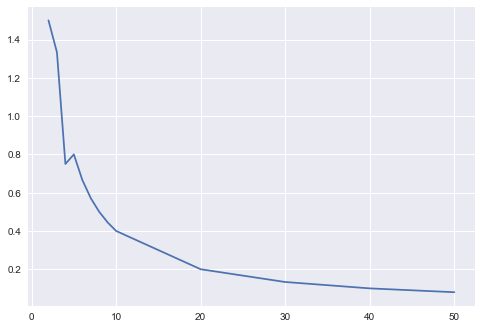

finished


In [14]:
'''Making that # kfold plot'''

'''For making the CV plot without the mountain plots'''
'''
~~~
Forward selection WITH THE CORRECT VERSION OF K-FOLDS
~~~
'''


import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import itertools
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

   # from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#example-model-selection-plot-confusion-matrix-py
def plot_confusion_matrix(cm, target_names, title, cmap=plt.cm.Blues):
    print('target names', target_names)
    sns.set_style("dark")
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    target_names=['Nonmerger','Merger']
    plt.xticks(tick_marks, target_names)#, rotation=45)
    plt.yticks(tick_marks, target_names)
    #plt.tight_layout()
    plt.ylabel('True label', size=20)
    plt.xlabel('Predicted label', size=20)
    
    fmt = '.2f' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
import sklearn.metrics as metrics


def lda_classify(v, levels, cutoffpoints):
    for level, cutoff in zip(reversed(levels), reversed(cutoffpoints)):
        if v > cutoff: return level
    return levels[0]

'''def box_m(X0,X1):

        global Xp

        m = 2
        k = len((X0))
        n_1 = len(X0[0])
        n_2 = len(X1[0])
        n = len(X0[0])+len(X1[0])
        
        print(( ((n_1-1)*(X0)) + ((n_2-1)*(X1)) ))

        Xp = ( ((n_1-1)*(X0)) + ((n_2-1)*(X1)) ) / (n-m)

        M = ((n-m)*np.log(np.linalg.det(Xp))) \
         - (n_1-1)*(np.log(np.linalg.det((X0)))) - (n_2-1)*(np.log(np.linalg.det((X1))))

        c = ( ( 2*(k**2) + (3*k) - 1 ) / ( (6*(k+1)*(m-1)) ) ) \
            * ( (1/(n_1-1)) + (1/(n_2-1)) - (1/(n-m)) )

        df = (k*(k+1)*(m-1))/2

        c2 = ( ((k-1)*(k+2)) / (6*(m-1)) ) \
            * ( (1/((n_1-1)**2)) + (1/((n_2-1)**2)) - (1/((n-m)**2)) )

        df2 = (df+2) / (np.abs(c2-c**2))

        if (c2>c**2):

            a_plus = df / (1-c-(df/df2))

            F = M / a_plus

        else:

            a_minus = df2 / (1-c+(2/df2))

            F = (df2*M) / (df*(a_minus-M))

        print('M = {}'.format(M))
        print('c = {}'.format(c))
        print('c2 = {}'.format(c2))
        print('-------------------')
        print('df = {}'.format(df))
        print('df2 = {}'.format(df2))
        print('-------------------')
        print('F = {}'.format(F)) '''

def box_m(X0,X1):

        global Xp

        m = 2
        k = len(np.cov(X0))
        n_1 = len(X0[0])
        n_2 = len(X1[0])
        n = len(X0[0])+len(X1[0])

        Xp = ( ((n_1-1)*np.cov(X0)) + ((n_2-1)*np.cov(X1)) ) / (n-m)

        M = ((n-m)*np.log(np.linalg.det(Xp))) \
         - (n_1-1)*(np.log(np.linalg.det(np.cov(X0)))) - (n_2-1)*(np.log(np.linalg.det(np.cov(X1))))

        c = ( ( 2*(k**2) + (3*k) - 1 ) / ( (6*(k+1)*(m-1)) ) ) \
            * ( (1/(n_1-1)) + (1/(n_2-1)) - (1/(n-m)) )

        df = (k*(k+1)*(m-1))/2

        c2 = ( ((k-1)*(k+2)) / (6*(m-1)) ) \
            * ( (1/((n_1-1)**2)) + (1/((n_2-1)**2)) - (1/((n-m)**2)) )

        df2 = (df+2) / (np.abs(c2-c**2))

        if (c2>c**2):

            a_plus = df / (1-c-(df/df2))

            F = M / a_plus

        else:

            a_minus = df2 / (1-c+(2/df2))

            F = (df2*M) / (df*(a_minus-M))

        print('M = {}'.format(M))
        print('c = {}'.format(c))
        print('c2 = {}'.format(c2))
        print('-------------------')
        print('df = {}'.format(df))
        print('df2 = {}'.format(df2))
        print('-------------------')
        print('F = {}'.format(F)) 

def plot_mean_and_CI(mean, lb, ub, color_mean=None, color_shading=None):
        # plot the shaded range of the confidence intervals
        plt.fill_between(range(mean.shape[0]), ub, lb,
                         color=color_shading, alpha=.5)
        # plot the mean on top
        plt.plot(mean, color_mean)


feature_dict = {i:label for i,label in zip(
                range(14),
                  ('Counter',
                  'Image',
                  'class label',
                  'Myr',
                  'Viewpoint',
                '# Bulges',
                   'Sep',
                   'Flux Ratio',
                  'Gini',
                  'M20',
                  'Concentration (C)',
                  'Asymmetry (A)',
                  'Clumpiness (S)',
                  'Sersic N',
                  'Shape Asymmetry (A_S)'))}

#Counter	Image	Merger (0 = no, 1 = yes)	Myr	Viewpoint	Gini	M20	C	A	S	Sersic n
'''view=0
df = pd.io.parsers.read_table(
    filepath_or_buffer='PCA_img_0.txt',
    header=[0],
    s
ep='\t', skiprows=14*view,nrows=14
    )#,skiprows=10,nrows=10'''


#list_runs=['fg3_m_12','fg1_m_13']
list_runs=['fg3_m12_no_200', 'fg1_m13_no_200', 'fg3_m15_no_200', 'fg3_m1_10_no_200','all']
list_runs=['fg3_m12_A_S', 'fg1_m13_A_S','fg3_m13_A_S_n', 'fg3_m15_A_S', 'fg3_m1_10_A_S','all']



list_runs=['fg3_m12', 'fg1_m13','fg3_m13', 'fg3_m15', 'fg3_m1_10','all']

colors=[sns.xkcd_rgb["red"],sns.xkcd_rgb["amber"],sns.xkcd_rgb["pink"],sns.xkcd_rgb["green"],sns.xkcd_rgb["purple"],sns.xkcd_rgb["black"]]
#colors=[sns.xkcd_rgb["red"],sns.xkcd_rgb["amber"],sns.xkcd_rgb["green"],sns.xkcd_rgb["purple"]]
names=['q0.5_fg0.3','q0.333_fg0.1','q0.333_fg0.3','q0.2_fg0.3_BT0.2','q0.1_fg0.3_BT0.2','All Combined']

#list_runs=['fg3_m12_alliso', 'fg1_m13_alliso', 'fg3_m15_alliso', 'fg3_m1_10_alliso']
#'fg3_m12_comp_real','fg1_m13_comp_real','fg3_m15_comp_real','fg3_m1_10_comp_real']#,'fg3_m15_alliso','fg3_m1_10_alliso']#,'fg1_m13']#['fg3_m1_10', 'all','fg1_m13','fg3_m15','fg3_m12']#,'fg3_m12','fg1_m13']#'fg3_m1_10', 'fg3_m15']
add_noise='no'
priors_list=[[0.9,0.1],[0.9,0.1],[0.9,0.1],[0.7,0.3],[0.7,0.3],[0.75,0.25]]



plt.clf()
#list_runs=[ 'fg3_m12', 'fg1_m13', 'fg3_m15', 'fg3_m1_10']
#priors_list=[[0.7,0.3],[0.9,0.1]]
missclass_list=[]

add_on='fg3_m12'
insert_list=[2,3,4,5,6,7,8,9,10,20,30,40,50]
priors_list=[[0.9,0.1]]
accuracy_here=[]

for g in range(len(insert_list)):
   
    
    print('run', add_on)
    
    if add_on=='all':
        df = pd.io.parsers.read_table(
                filepath_or_buffer='LDA_prep_predictors_all_combined.txt',#'_view_all.txt',#filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
                header=[0],
                sep='\t'
                )#,skiprows=10,nrows=10
                ##filepath_or_buffer='LDA_img_ratio_statmorph_'+str(run)+'.txt',#'_view_all.txt',
        df.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']

        df.dropna(how="all", inplace=True) # to drop the empty line at file-end
    else:
        df = pd.io.parsers.read_table(
                filepath_or_buffer='LDA_'+str(add_on)+'.txt',#'_view_all.txt',#filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
                header=[0],
                sep='\t'
                )#,skiprows=10,nrows=10
                ##filepath_or_buffer='LDA_img_ratio_statmorph_'+str(run)+'.txt',#'_view_all.txt',
        df.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']

        df.dropna(how="all", inplace=True) # to drop the empty line at file-end
    
        
            



        for j in range(len(df)):
            if df[['Myr']].values[j][0]<0.40 and df[['Sep']].values[j][0]==0.0 and df[['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]
                df.set_value(j,'class label',0)
    myr=[]
    myr_non=[]
    for j in range(len(df)):
        if df[['class label']].values[j][0]==0.0:
            myr_non.append(df[['Myr']].values[j][0])
        else:
            myr.append(df[['Myr']].values[j][0])

    myr_non=sorted(list(set(myr_non)))
    myr=sorted(list(set(myr)))
    
    
    
    
    df.dropna(inplace=True) # to drop the empty line at file-end
    #print(df)
    

    from sklearn.preprocessing import LabelEncoder
    def gini_m20(row):
        return row['Gini']*row['M20']
    def gini_C(row):
        return row['Gini']*row['Concentration (C)']
    def gini_A(row):
        return row['Gini']*row['Asymmetry (A)']
    def gini_S(row):
        return row['Gini']*row['Clumpiness (S)']
    def gini_n(row):
        return row['Gini']*row['Sersic N']
    def gini_A_S(row):
        return row['Gini']*row['Shape Asymmetry']
    
    def M20_C(row):
        return row['M20']*row['Concentration (C)']
    def M20_A(row):
        return row['M20']*row['Asymmetry (A)']
    def M20_S(row):
        return row['M20']*row['Clumpiness (S)']
    def M20_n(row):
        return row['M20']*row['Sersic N']
    def M20_A_S(row):
        return row['M20']*row['Shape Asymmetry']
    
    def C_A(row):
        return row['Concentration (C)']*row['Asymmetry (A)']
    def C_S(row):
        return row['Concentration (C)']*row['Clumpiness (S)']
    def C_n(row):
        return row['Concentration (C)']*row['Sersic N']
    def C_A_S(row):
        return row['Concentration (C)']*row['Shape Asymmetry']
    
    
    def A_S(row):
        return row['Asymmetry (A)']*row['Clumpiness (S)']
    def A_n(row):
        return row['Asymmetry (A)']*row['Sersic N']
    def A_A_S(row):
        return row['Asymmetry (A)']*row['Shape Asymmetry']
    
    def S_n(row):
        return row['Clumpiness (S)']*row['Sersic N']
    def S_A_S(row):
        return row['Clumpiness (S)']*row['Shape Asymmetry']
    
    def n_A_S(row):
        return row['Sersic N']*row['Shape Asymmetry']
    
    df['Gini*M20'] = df.apply(gini_m20,axis=1)
    df['Gini*C'] = df.apply(gini_C,axis=1)
    df['Gini*A'] = df.apply(gini_A,axis=1)
    df['Gini*S'] = df.apply(gini_S,axis=1)
    df['Gini*n'] = df.apply(gini_n,axis=1)
    df['Gini*A_S'] = df.apply(gini_A_S,axis=1)
    
    df['M20*C'] = df.apply(M20_C,axis=1)
    df['M20*A'] = df.apply(M20_A,axis=1)
    df['M20*S'] = df.apply(M20_S,axis=1)
    df['M20*n'] = df.apply(M20_n,axis=1)
    df['M20*A_S'] = df.apply(M20_A_S,axis=1)
    
    df['C*A'] = df.apply(C_A,axis=1)
    df['C*S'] = df.apply(C_S,axis=1)
    df['C*n'] = df.apply(C_n,axis=1)
    df['C*A_S'] = df.apply(C_A_S,axis=1)
    
    df['A*S'] = df.apply(A_S,axis=1)
    df['A*n'] = df.apply(A_n,axis=1)
    df['A*A_S'] = df.apply(A_A_S,axis=1)
    
    df['S*n'] = df.apply(S_n,axis=1)
    df['S*A_S'] = df.apply(S_A_S,axis=1)
    
    df['n*A_S'] = df.apply(n_A_S,axis=1)
    #print(df)
    
    ct_1=['Gini','Gini','Gini','Gini','Gini','Gini',
      'M20','M20','M20','M20','M20',
      'Concentration (C)','Concentration (C)','Concentration (C)','Concentration (C)',
      'Asymmetry (A)','Asymmetry (A)','Asymmetry (A)',
      'Clumpiness (S)','Clumpiness (S)',
      'Sersic N']
    ct_2=['M20','Concentration (C)','Asymmetry (A)', 'Clumpiness (S)','Sersic N','Shape Asymmetry',
      'Concentration (C)','Asymmetry (A)','Clumpiness (S)','Sersic N','Shape Asymmetry',
      'Asymmetry (A)','Clumpiness (S)','Sersic N','Shape Asymmetry',
      'Clumpiness (S)','Sersic N','Shape Asymmetry',
      'Sersic N','Shape Asymmetry',
      'Shape Asymmetry']
    term=['Gini*M20','Gini*C','Gini*A','Gini*S','Gini*n','Gini*A_S',
            'M20*C','M20*A','M20*S', 'M20*n', 'M20*A_S',
            'C*A','C*S','C*n','C*A_S',
           'A*S','A*n','A*A_S',
            'S*n','S*A_S',
           'n*A_S']

    
    
    
    inputs=['Gini','M20','Concentration (C)','Asymmetry (A)','Clumpiness (S)','Sersic N','Shape Asymmetry',
            'Gini*M20','Gini*C','Gini*A','Gini*S','Gini*n','Gini*A_S',
            'M20*C','M20*A','M20*S', 'M20*n', 'M20*A_S', 
            'C*A','C*S','C*n','C*A_S',
           'A*S','A*n','A*A_S',
            'S*n','S*A_S',
           'n*A_S']
    
    OG_length=len(inputs)
    
    prev_input=[]
    prev_input_here=[]
    missclass=[]
    missclass_e=[]
    num_comps=[]
    list_coef=[]
    list_coef_std=[]
    list_inter=[]
    list_inter_std=[]
    list_master=[]
    list_master_confusion=[]
    list_classes=[]
    
    
    kf = StratifiedKFold(n_splits=insert_list[g], random_state=True, shuffle=True)
    
    for o in range(len(inputs)):#len(inputs)-20):
    
        coef_mean=[]
        coef_std=[]
        inter_mean=[]
        inter_std=[]
        coef_mean_std=[]
        accuracy=[]
        accuracy_e=[]
        inputs_this_step=[]
        confusion_master_this_step=[]
        master_this_step=[]
        classes_this_step=[]
        


        #Now inputs is changing and you need to go through and choose a variable
        for k in range(len(inputs)):#Search through every one
            
            prev_input.append(inputs[k])
            inputs_here=[]
            inputs_here.append(inputs[k])
            
            #print('starting input', prev_input,inputs[k])
            #if inputs[k] is a cross term and the prev_input doesn't contain it, add it:
            for m in range(len(term)):
                if inputs[k]==term[m]:
                    #then you are going to search every term of prev_input and see if it is there
                    #for n in range(len(prev_input)):
                    if ct_1[m] not in prev_input:
                        prev_input.append(ct_1[m])
                        
                        inputs_here.append(ct_1[m])
                    if ct_2[m] not in prev_input:
                        prev_input.append(ct_2[m])
                        inputs_here.append(ct_2[m])
                        
                    
            #print('inputs heading into LDA',prev_input)
            
            X = df[prev_input].values
            
            
            




            y = df['class label'].values

            from sklearn import preprocessing



            std_scale = preprocessing.StandardScaler().fit(X)
            X = std_scale.transform(X)


            enc = LabelEncoder()
            label_encoder = enc.fit(y)
            y = label_encoder.transform(y) + 1


            label_dict = {1: 'NonMerger', 2: 'Merger'}
            from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

            # LDA
            sklearn_lda = LDA(priors=priors_list[0], store_covariance=True)#store_covariance=False


            X_lda_sklearn = sklearn_lda.fit_transform(X, y)

            dec = sklearn_lda.score(X,y)
            prob = sklearn_lda.predict_proba(X)

            coef = sklearn_lda.coef_





            
    
            kf.get_n_splits(X, y)



            coef_list=[]
            inter_list=[]
            classes_list=[]
            confusion_master=[]
            y_test_master=[]
            pred_master=[]
            single_prediction=[]
            count=0
            for train_index, test_index in kf.split(X, y):

                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]


                sklearn_lda = LDA( priors=priors_list[0],store_covariance=True)#store_covariance=False
            


                X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
                coef = sklearn_lda.coef_
                inter = sklearn_lda.intercept_

                inter_list.append(inter)
                coef_list.append(coef)
                inter_list.append(inter)
                pred =sklearn_lda.predict(X_test)
                classes_list.append(sklearn_lda.classes_)
                confusion_master.append(confusion_matrix(pred,y_test))

                single_prediction.append(confusion_matrix(pred,y_test)[1][0]+confusion_matrix(pred,y_test)[0][1])



            
            accuracy.append(np.mean(single_prediction))#/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
            
            accuracy_e.append(np.std(single_prediction))
            inputs_this_step.append(np.array(prev_input))
            
            confusion_master_this_step.append(np.array((np.mean(confusion_master,axis=0)/np.sum(np.mean(confusion_master,axis=0))).transpose()))
            master_this_step.append(np.array(np.mean(confusion_master, axis=0).transpose()))
            #print('appending with this', np.array(prev_input))
            
            classes_this_step.append(np.array(classes_list))
    
            
            coef_mean.append(np.mean(coef_list, axis=0))
            coef_std.append(np.std(coef_list, axis=0))
            
            inter_mean.append(np.mean(inter_list, axis=0))
            inter_std.append(np.std(inter_list, axis=0))
            
            #prev_input.remove(new_stuff)
            for m in range(len(inputs_here)):
                try:
                    prev_input.remove(inputs_here[m])
                except ValueError:
                    continue
            
        if accuracy_e[accuracy.index(min(accuracy))]<0.00001:
            break
        #print('all of inputs', inputs_this_step)
        #print('selecting the best model for this step', (inputs_this_step[accuracy.index(min(accuracy))]))
        
        thing=(inputs_this_step[accuracy.index(min(accuracy))])
        first_A=min(accuracy)
        
        prev_input_here.append(thing)
        
        for m in range(len(thing)):
            
            prev_input.append(thing[m])
            
            try:
                
                inputs.remove(thing[m])
            except ValueError:
                #print('~~~RUning into troubles')
                #print('inputs', inputs)
                #print('the thing to remove', thing[m])
                continue
        #print('the input now', inputs)
        #STOP
        prev_input=list(set(prev_input))
        missclass.append(min(accuracy))
        #print('coef previous to selecting min', coef_mean)
        missclass_e.append(accuracy_e[accuracy.index(min(accuracy))])
        list_coef.append(coef_mean[accuracy.index(min(accuracy))])
        #print('coef list', coef_mean[accuracy.index(min(accuracy))])
        list_coef_std.append(coef_std[accuracy.index(min(accuracy))])
        
        list_inter.append(inter_mean[accuracy.index(min(accuracy))])
        list_inter_std.append(inter_std[accuracy.index(min(accuracy))])
        
        list_master.append(master_this_step[accuracy.index(min(accuracy))])
        list_master_confusion.append(confusion_master_this_step[accuracy.index(min(accuracy))])
        
        list_classes.append(classes_this_step[accuracy.index(min(accuracy))])
        
        num_comps.append(len(prev_input))#
        #print('min index', accuracy.index(min(accuracy)))
        #if OG_length < len(:
        #    break
        
        if len(thing)==28:
            break
        
    #print('these are your inputs',prev_input, prev_input_here)
    
    
    #list_coef=[]
    #list_coef_std=[]
    
    min_A=min(missclass)
    min_comps=num_comps[missclass.index(min(missclass))]
    for p in range(len(missclass)):
        missclass_list.append(missclass[p])
    plt.plot(num_comps,missclass, color=colors[i], label=names[i])
    plt.scatter(num_comps,missclass, color=colors[i])
    
    #plt.fill_between(num_comps,np.array(missclass)+np.array(missclass_e), np.array(missclass)-np.array(missclass_e), alpha=.5,color=colors[i])
        
    def locate_min(a):
        smallest = min(a)
        return smallest, [index for index, element in enumerate(a) 
                      if smallest == element]
    
    min_index=locate_min(missclass)[1][0]
    
    
    min_A=missclass[locate_min(missclass)[1][0]]
    min_A_e=missclass_e[locate_min(missclass)[1][0]]
    '''Now you need to use one standard error '''
    
    
    for m in range(len(missclass)):
        if missclass[m] < (min_A+min_A_e):
            print('m',missclass[m],min_A+min_A_e)
            new_min_index=m
            break
        else:
            new_min_index=min_index
            
    print('new min', new_min_index)
    min_A=missclass[new_min_index]
    min_A_e=missclass_e[new_min_index]
    min_comps=num_comps[new_min_index]
    
    plt.scatter(min_comps, min_A,marker='x', color='black', zorder=100)
    
    
    inputs_all=prev_input_here[new_min_index]#:new_min_index+1]
    #print(prev_input)
    '''print('terms before adding in necessary', inputs_all)
    print(run,'&')
    print('coefficients', list_coef[new_min_index])
    print('coefficient std', list_coef_std[new_min_index])
    
    
        
    
    print('missclass', missclass)
    print('missclass_e', missclass_e)
    
    print('intercept', list_inter[new_min_index])
    print('intercept std', list_inter_std[new_min_index])'''
    
    
    sns.set_style("darkgrid")
    
    master=list_master[new_min_index]
    
    '''print('~~~Accuracy~~~')
    print((master[1][1]+master[0][0])/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
    print('~~~Precision~~~')
    print(master[1][1]/(master[0][1]+master[1][1]))#TP/(TP+FP)
    print('~~~Recall~~~')
    print(master[1][1]/(master[1][0]+master[1][1]))#TP/(TP+FN)
    print('~~~F1~~~')
    print((2*master[1][1])/(master[0][1]+master[1][0]+2*master[1][1]))#2TP/(2TP+FP+FN)
    '''
    accuracy_here.append(min_A)
        #(master[1][1]+master[0][0])/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
    
    
    
    
    
    

    

    
    
    




plt.clf()
plt.plot(insert_list, accuracy_here)
plt.show()
print('finished')



0.0


/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:258: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/beckynevin/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:401: RuntimeWarning: invalid value encountered in true_divide
  S**2))[:self._max_components]
/Users/beckynevin/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:406: RuntimeWarning: divide by zero encountered in log
  np.log(self.priors_))
/Users/beckynevin/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


0.05
new min 1
0.1
new min 1
0.15000000000000002
new min 1
0.2
new min 1
0.25
new min 1
0.30000000000000004
new min 1
0.35000000000000003
new min 1
0.4
new min 2
0.45
new min 1
0.5
new min 1
0.55
new min 1
0.6000000000000001
new min 2
0.65
new min 2
0.7000000000000001
new min 3
0.75
new min 3
0.8
new min 3
0.8500000000000001
new min 3
0.9
new min 2
0.9500000000000001
new min 3
1.0
new min 0


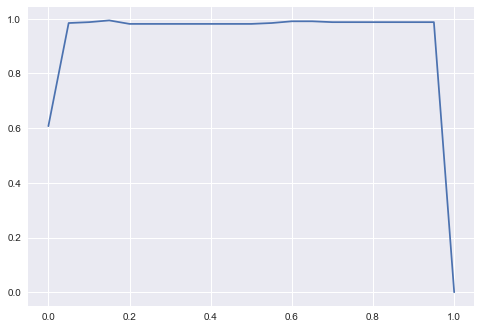

finished


In [7]:
'''Making that # kfold plot'''

'''For making the CV plot without the mountain plots'''
'''
~~~
Forward selection WITH THE CORRECT VERSION OF K-FOLDS
~~~
'''


import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import itertools
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

   # from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#example-model-selection-plot-confusion-matrix-py
def plot_confusion_matrix(cm, target_names, title, cmap=plt.cm.Blues):
    print('target names', target_names)
    sns.set_style("dark")
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    target_names=['Nonmerger','Merger']
    plt.xticks(tick_marks, target_names)#, rotation=45)
    plt.yticks(tick_marks, target_names)
    #plt.tight_layout()
    plt.ylabel('True label', size=20)
    plt.xlabel('Predicted label', size=20)
    
    fmt = '.2f' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
import sklearn.metrics as metrics


def lda_classify(v, levels, cutoffpoints):
    for level, cutoff in zip(reversed(levels), reversed(cutoffpoints)):
        if v > cutoff: return level
    return levels[0]

'''def box_m(X0,X1):

        global Xp

        m = 2
        k = len((X0))
        n_1 = len(X0[0])
        n_2 = len(X1[0])
        n = len(X0[0])+len(X1[0])
        
        print(( ((n_1-1)*(X0)) + ((n_2-1)*(X1)) ))

        Xp = ( ((n_1-1)*(X0)) + ((n_2-1)*(X1)) ) / (n-m)

        M = ((n-m)*np.log(np.linalg.det(Xp))) \
         - (n_1-1)*(np.log(np.linalg.det((X0)))) - (n_2-1)*(np.log(np.linalg.det((X1))))

        c = ( ( 2*(k**2) + (3*k) - 1 ) / ( (6*(k+1)*(m-1)) ) ) \
            * ( (1/(n_1-1)) + (1/(n_2-1)) - (1/(n-m)) )

        df = (k*(k+1)*(m-1))/2

        c2 = ( ((k-1)*(k+2)) / (6*(m-1)) ) \
            * ( (1/((n_1-1)**2)) + (1/((n_2-1)**2)) - (1/((n-m)**2)) )

        df2 = (df+2) / (np.abs(c2-c**2))

        if (c2>c**2):

            a_plus = df / (1-c-(df/df2))

            F = M / a_plus

        else:

            a_minus = df2 / (1-c+(2/df2))

            F = (df2*M) / (df*(a_minus-M))

        print('M = {}'.format(M))
        print('c = {}'.format(c))
        print('c2 = {}'.format(c2))
        print('-------------------')
        print('df = {}'.format(df))
        print('df2 = {}'.format(df2))
        print('-------------------')
        print('F = {}'.format(F)) '''

def box_m(X0,X1):

        global Xp

        m = 2
        k = len(np.cov(X0))
        n_1 = len(X0[0])
        n_2 = len(X1[0])
        n = len(X0[0])+len(X1[0])

        Xp = ( ((n_1-1)*np.cov(X0)) + ((n_2-1)*np.cov(X1)) ) / (n-m)

        M = ((n-m)*np.log(np.linalg.det(Xp))) \
         - (n_1-1)*(np.log(np.linalg.det(np.cov(X0)))) - (n_2-1)*(np.log(np.linalg.det(np.cov(X1))))

        c = ( ( 2*(k**2) + (3*k) - 1 ) / ( (6*(k+1)*(m-1)) ) ) \
            * ( (1/(n_1-1)) + (1/(n_2-1)) - (1/(n-m)) )

        df = (k*(k+1)*(m-1))/2

        c2 = ( ((k-1)*(k+2)) / (6*(m-1)) ) \
            * ( (1/((n_1-1)**2)) + (1/((n_2-1)**2)) - (1/((n-m)**2)) )

        df2 = (df+2) / (np.abs(c2-c**2))

        if (c2>c**2):

            a_plus = df / (1-c-(df/df2))

            F = M / a_plus

        else:

            a_minus = df2 / (1-c+(2/df2))

            F = (df2*M) / (df*(a_minus-M))

        print('M = {}'.format(M))
        print('c = {}'.format(c))
        print('c2 = {}'.format(c2))
        print('-------------------')
        print('df = {}'.format(df))
        print('df2 = {}'.format(df2))
        print('-------------------')
        print('F = {}'.format(F)) 

def plot_mean_and_CI(mean, lb, ub, color_mean=None, color_shading=None):
        # plot the shaded range of the confidence intervals
        plt.fill_between(range(mean.shape[0]), ub, lb,
                         color=color_shading, alpha=.5)
        # plot the mean on top
        plt.plot(mean, color_mean)


feature_dict = {i:label for i,label in zip(
                range(14),
                  ('Counter',
                  'Image',
                  'class label',
                  'Myr',
                  'Viewpoint',
                '# Bulges',
                   'Sep',
                   'Flux Ratio',
                  'Gini',
                  'M20',
                  'Concentration (C)',
                  'Asymmetry (A)',
                  'Clumpiness (S)',
                  'Sersic N',
                  'Shape Asymmetry (A_S)'))}

#Counter	Image	Merger (0 = no, 1 = yes)	Myr	Viewpoint	Gini	M20	C	A	S	Sersic n
'''view=0
df = pd.io.parsers.read_table(
    filepath_or_buffer='PCA_img_0.txt',
    header=[0],
    s
ep='\t', skiprows=14*view,nrows=14
    )#,skiprows=10,nrows=10'''


#list_runs=['fg3_m_12','fg1_m_13']
list_runs=['fg3_m12_no_200', 'fg1_m13_no_200', 'fg3_m15_no_200', 'fg3_m1_10_no_200','all']
list_runs=['fg3_m12_A_S', 'fg1_m13_A_S','fg3_m13_A_S_n', 'fg3_m15_A_S', 'fg3_m1_10_A_S','all']



list_runs=['fg3_m12', 'fg1_m13','fg3_m13', 'fg3_m15', 'fg3_m1_10','major_all','minor_all']

colors=[sns.xkcd_rgb["red"],sns.xkcd_rgb["amber"],sns.xkcd_rgb["pink"],sns.xkcd_rgb["green"],sns.xkcd_rgb["purple"],sns.xkcd_rgb["black"]]
#colors=[sns.xkcd_rgb["red"],sns.xkcd_rgb["amber"],sns.xkcd_rgb["green"],sns.xkcd_rgb["purple"]]
names=['q0.5_fg0.3','q0.333_fg0.1','q0.333_fg0.3','q0.2_fg0.3_BT0.2','q0.1_fg0.3_BT0.2','All Combined']

#list_runs=['fg3_m12_alliso', 'fg1_m13_alliso', 'fg3_m15_alliso', 'fg3_m1_10_alliso']
#'fg3_m12_comp_real','fg1_m13_comp_real','fg3_m15_comp_real','fg3_m1_10_comp_real']#,'fg3_m15_alliso','fg3_m1_10_alliso']#,'fg1_m13']#['fg3_m1_10', 'all','fg1_m13','fg3_m15','fg3_m12']#,'fg3_m12','fg1_m13']#'fg3_m1_10', 'fg3_m15']
add_noise='no'
priors_list=[[0.9,0.1],[0.9,0.1],[0.9,0.1],[0.7,0.3],[0.7,0.3],[0.9,0.1],[0.7,0.3]]



plt.clf()
#list_runs=[ 'fg3_m12', 'fg1_m13', 'fg3_m15', 'fg3_m1_10']
#priors_list=[[0.7,0.3],[0.9,0.1]]
missclass_list=[]

add_on='fg3_m1_10_SDSS_match'
#add_on='major_all'
insert_list=[2,3,4,5,6,7,8,9,10,20,30,40,50]
priors_list=[[0.0,1.0],[0.1,0.9],[0.2,0.8],[0.3,0.7],[0.4,0.6],
             [0.5,0.5],[0.6,0.4],[0.7,0.3],[0.8,0.2],[0.9,0.1],[1.0,0.0]]
prior_list=np.linspace(0,1,21)
acc_4=[]

for g in range(len(prior_list)):
   
    
    print(prior_list[g])
    
    if add_on=='all':
        df = pd.io.parsers.read_table(
                filepath_or_buffer='LDA_prep_predictors_all_combined.txt',#'_view_all.txt',#filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
                header=[0],
                sep='\t'
                )#,skiprows=10,nrows=10
                ##filepath_or_buffer='LDA_img_ratio_statmorph_'+str(run)+'.txt',#'_view_all.txt',
        df.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']

        df.dropna(how="all", inplace=True) # to drop the empty line at file-end
    if add_on=='major_all':
        df = pd.io.parsers.read_table(
                filepath_or_buffer='LDA_prep_predictors_all_combined_major.txt',#'_view_all.txt',#filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
                header=[0],
                sep='\t'
                )#,skiprows=10,nrows=10
                ##filepath_or_buffer='LDA_img_ratio_statmorph_'+str(run)+'.txt',#'_view_all.txt',
        df.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']

        df.dropna(how="all", inplace=True) # to drop the empty line at file-end
    if add_on=='minor_all':
        df = pd.io.parsers.read_table(
                filepath_or_buffer='LDA_prep_predictors_all_combined_minor.txt',#'_view_all.txt',#filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
                header=[0],
                sep='\t'
                )#,skiprows=10,nrows=10
                ##filepath_or_buffer='LDA_img_ratio_statmorph_'+str(run)+'.txt',#'_view_all.txt',
        df.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']

        df.dropna(how="all", inplace=True) # to drop the empty line at file-end
    else:
        df = pd.io.parsers.read_table(
                filepath_or_buffer='LDA_'+str(add_on)+'.txt',#'_view_all.txt',#filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
                header=[0],
                sep='\t'
                )#,skiprows=10,nrows=10
                ##filepath_or_buffer='LDA_img_ratio_statmorph_'+str(run)+'.txt',#'_view_all.txt',
        df.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']

        df.dropna(how="all", inplace=True) # to drop the empty line at file-end
        for j in range(len(df)):
            if df[['Myr']].values[j][0]<0.39 and df[['Sep']].values[j][0]==0.0 and df[['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]
                df.set_value(j,'class label',0)
            if add_on=='fg3_m12' and (df[['Myr']].values[j][0]-2.15) > 0.5:#0.39+0.1:#was 0.39
                df.set_value(j,'class label',0)

            if add_on=='fg1_m13' and (df[['Myr']].values[j][0]-2.74) > 0.5:#2.74-2.25+2.74:#was 0.39
                df.set_value(j,'class label',0)
            if add_on=='fg3_m13' and (df[['Myr']].values[j][0]-2.59) > 0.5:#2.64+0.5
                df.set_value(j,'class label',0)
            if add_on=='fg3_m15' and (df[['Myr']].values[j][0]-3.72) > 0.5:
                df.set_value(j,'class label',0)
            if add_on=='fg3_m1_10' and (df[['Myr']].values[j][0]-9.17) > 0.5:
                df.set_value(j,'class label',0)
            



        
    myr=[]
    myr_non=[]
    for j in range(len(df)):
        if df[['class label']].values[j][0]==0.0:
            myr_non.append(df[['Myr']].values[j][0])
        else:
            myr.append(df[['Myr']].values[j][0])

    myr_non=sorted(list(set(myr_non)))
    myr=sorted(list(set(myr)))
    
    
    
    
    df.dropna(inplace=True) # to drop the empty line at file-end
    #print(df)
    

    from sklearn.preprocessing import LabelEncoder
    def gini_m20(row):
        return row['Gini']*row['M20']
    def gini_C(row):
        return row['Gini']*row['Concentration (C)']
    def gini_A(row):
        return row['Gini']*row['Asymmetry (A)']
    def gini_S(row):
        return row['Gini']*row['Clumpiness (S)']
    def gini_n(row):
        return row['Gini']*row['Sersic N']
    def gini_A_S(row):
        return row['Gini']*row['Shape Asymmetry']
    
    def M20_C(row):
        return row['M20']*row['Concentration (C)']
    def M20_A(row):
        return row['M20']*row['Asymmetry (A)']
    def M20_S(row):
        return row['M20']*row['Clumpiness (S)']
    def M20_n(row):
        return row['M20']*row['Sersic N']
    def M20_A_S(row):
        return row['M20']*row['Shape Asymmetry']
    
    def C_A(row):
        return row['Concentration (C)']*row['Asymmetry (A)']
    def C_S(row):
        return row['Concentration (C)']*row['Clumpiness (S)']
    def C_n(row):
        return row['Concentration (C)']*row['Sersic N']
    def C_A_S(row):
        return row['Concentration (C)']*row['Shape Asymmetry']
    
    
    def A_S(row):
        return row['Asymmetry (A)']*row['Clumpiness (S)']
    def A_n(row):
        return row['Asymmetry (A)']*row['Sersic N']
    def A_A_S(row):
        return row['Asymmetry (A)']*row['Shape Asymmetry']
    
    def S_n(row):
        return row['Clumpiness (S)']*row['Sersic N']
    def S_A_S(row):
        return row['Clumpiness (S)']*row['Shape Asymmetry']
    
    def n_A_S(row):
        return row['Sersic N']*row['Shape Asymmetry']
    
    df['Gini*M20'] = df.apply(gini_m20,axis=1)
    df['Gini*C'] = df.apply(gini_C,axis=1)
    df['Gini*A'] = df.apply(gini_A,axis=1)
    df['Gini*S'] = df.apply(gini_S,axis=1)
    df['Gini*n'] = df.apply(gini_n,axis=1)
    df['Gini*A_S'] = df.apply(gini_A_S,axis=1)
    
    df['M20*C'] = df.apply(M20_C,axis=1)
    df['M20*A'] = df.apply(M20_A,axis=1)
    df['M20*S'] = df.apply(M20_S,axis=1)
    df['M20*n'] = df.apply(M20_n,axis=1)
    df['M20*A_S'] = df.apply(M20_A_S,axis=1)
    
    df['C*A'] = df.apply(C_A,axis=1)
    df['C*S'] = df.apply(C_S,axis=1)
    df['C*n'] = df.apply(C_n,axis=1)
    df['C*A_S'] = df.apply(C_A_S,axis=1)
    
    df['A*S'] = df.apply(A_S,axis=1)
    df['A*n'] = df.apply(A_n,axis=1)
    df['A*A_S'] = df.apply(A_A_S,axis=1)
    
    df['S*n'] = df.apply(S_n,axis=1)
    df['S*A_S'] = df.apply(S_A_S,axis=1)
    
    df['n*A_S'] = df.apply(n_A_S,axis=1)
    #print(df)
    
    ct_1=['Gini','Gini','Gini','Gini','Gini','Gini',
      'M20','M20','M20','M20','M20',
      'Concentration (C)','Concentration (C)','Concentration (C)','Concentration (C)',
      'Asymmetry (A)','Asymmetry (A)','Asymmetry (A)',
      'Clumpiness (S)','Clumpiness (S)',
      'Sersic N']
    ct_2=['M20','Concentration (C)','Asymmetry (A)', 'Clumpiness (S)','Sersic N','Shape Asymmetry',
      'Concentration (C)','Asymmetry (A)','Clumpiness (S)','Sersic N','Shape Asymmetry',
      'Asymmetry (A)','Clumpiness (S)','Sersic N','Shape Asymmetry',
      'Clumpiness (S)','Sersic N','Shape Asymmetry',
      'Sersic N','Shape Asymmetry',
      'Shape Asymmetry']
    term=['Gini*M20','Gini*C','Gini*A','Gini*S','Gini*n','Gini*A_S',
            'M20*C','M20*A','M20*S', 'M20*n', 'M20*A_S',
            'C*A','C*S','C*n','C*A_S',
           'A*S','A*n','A*A_S',
            'S*n','S*A_S',
           'n*A_S']

    
    
    
    inputs=['Gini','M20','Concentration (C)','Asymmetry (A)','Clumpiness (S)','Sersic N','Shape Asymmetry',
            'Gini*M20','Gini*C','Gini*A','Gini*S','Gini*n','Gini*A_S',
            'M20*C','M20*A','M20*S', 'M20*n', 'M20*A_S', 
            'C*A','C*S','C*n','C*A_S',
           'A*S','A*n','A*A_S',
            'S*n','S*A_S',
           'n*A_S']
    
    OG_length=len(inputs)
    
    prev_input=[]
    prev_input_here=[]
    missclass=[]
    missclass_e=[]
    num_comps=[]
    list_coef=[]
    list_coef_std=[]
    list_inter=[]
    list_inter_std=[]
    list_master=[]
    list_master_confusion=[]
    list_classes=[]
    
    
    kf = StratifiedKFold(n_splits=10, random_state=True, shuffle=True)
    
    for o in range(len(inputs)):#len(inputs)-20):
    
        coef_mean=[]
        coef_std=[]
        inter_mean=[]
        inter_std=[]
        coef_mean_std=[]
        accuracy=[]
        accuracy_e=[]
        inputs_this_step=[]
        confusion_master_this_step=[]
        master_this_step=[]
        classes_this_step=[]
        


        #Now inputs is changing and you need to go through and choose a variable
        for k in range(len(inputs)):#Search through every one
            
            prev_input.append(inputs[k])
            inputs_here=[]
            inputs_here.append(inputs[k])
            
            #print('starting input', prev_input,inputs[k])
            #if inputs[k] is a cross term and the prev_input doesn't contain it, add it:
            for m in range(len(term)):
                if inputs[k]==term[m]:
                    #then you are going to search every term of prev_input and see if it is there
                    #for n in range(len(prev_input)):
                    if ct_1[m] not in prev_input:
                        prev_input.append(ct_1[m])
                        
                        inputs_here.append(ct_1[m])
                    if ct_2[m] not in prev_input:
                        prev_input.append(ct_2[m])
                        inputs_here.append(ct_2[m])
                        
                    
            #print('inputs heading into LDA',prev_input)
            
            X = df[prev_input].values
            
            
            




            y = df['class label'].values

            from sklearn import preprocessing



            std_scale = preprocessing.StandardScaler().fit(X)
            X = std_scale.transform(X)


            enc = LabelEncoder()
            label_encoder = enc.fit(y)
            y = label_encoder.transform(y) + 1


            label_dict = {1: 'NonMerger', 2: 'Merger'}
            from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

            # LDA
            sklearn_lda = LDA(priors=[prior_list[g],1-prior_list[g]], store_covariance=True)#store_covariance=False


            X_lda_sklearn = sklearn_lda.fit_transform(X, y)

            dec = sklearn_lda.score(X,y)
            prob = sklearn_lda.predict_proba(X)

            coef = sklearn_lda.coef_





            
    
            kf.get_n_splits(X, y)



            coef_list=[]
            inter_list=[]
            classes_list=[]
            confusion_master=[]
            y_test_master=[]
            pred_master=[]
            single_prediction=[]
            count=0
            for train_index, test_index in kf.split(X, y):

                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]


                sklearn_lda = LDA( priors=[prior_list[g],1-prior_list[g]],store_covariance=True)#store_covariance=False
            


                X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
                coef = sklearn_lda.coef_
                inter = sklearn_lda.intercept_

                inter_list.append(inter)
                coef_list.append(coef)
                inter_list.append(inter)
                pred =sklearn_lda.predict(X_test)
                classes_list.append(sklearn_lda.classes_)
                confusion_master.append(confusion_matrix(pred,y_test))

                single_prediction.append(confusion_matrix(pred,y_test)[1][0]+confusion_matrix(pred,y_test)[0][1])



            
            accuracy.append(np.mean(single_prediction))#/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
            
            accuracy_e.append(np.std(single_prediction))
            inputs_this_step.append(np.array(prev_input))
            
            confusion_master_this_step.append(np.array((np.mean(confusion_master,axis=0)/np.sum(np.mean(confusion_master,axis=0))).transpose()))
            master_this_step.append(np.array(np.mean(confusion_master, axis=0).transpose()))
            #print('appending with this', np.array(prev_input))
            
            classes_this_step.append(np.array(classes_list))
    
            
            coef_mean.append(np.mean(coef_list, axis=0))
            coef_std.append(np.std(coef_list, axis=0))
            
            inter_mean.append(np.mean(inter_list, axis=0))
            inter_std.append(np.std(inter_list, axis=0))
            
            #prev_input.remove(new_stuff)
            for m in range(len(inputs_here)):
                try:
                    prev_input.remove(inputs_here[m])
                except ValueError:
                    continue
            
        if accuracy_e[accuracy.index(min(accuracy))]<0.00001:
            break
        #print('all of inputs', inputs_this_step)
        #print('selecting the best model for this step', (inputs_this_step[accuracy.index(min(accuracy))]))
        
        thing=(inputs_this_step[accuracy.index(min(accuracy))])
        first_A=min(accuracy)
        
        prev_input_here.append(thing)
        
        for m in range(len(thing)):
            
            prev_input.append(thing[m])
            
            try:
                
                inputs.remove(thing[m])
            except ValueError:
                #print('~~~RUning into troubles')
                #print('inputs', inputs)
                #print('the thing to remove', thing[m])
                continue
        #print('the input now', inputs)
        #STOP
        prev_input=list(set(prev_input))
        missclass.append(min(accuracy))
        #print('coef previous to selecting min', coef_mean)
        missclass_e.append(accuracy_e[accuracy.index(min(accuracy))])
        list_coef.append(coef_mean[accuracy.index(min(accuracy))])
        #print('coef list', coef_mean[accuracy.index(min(accuracy))])
        list_coef_std.append(coef_std[accuracy.index(min(accuracy))])
        
        list_inter.append(inter_mean[accuracy.index(min(accuracy))])
        list_inter_std.append(inter_std[accuracy.index(min(accuracy))])
        
        list_master.append(master_this_step[accuracy.index(min(accuracy))])
        list_master_confusion.append(confusion_master_this_step[accuracy.index(min(accuracy))])
        
        list_classes.append(classes_this_step[accuracy.index(min(accuracy))])
        
        num_comps.append(len(prev_input))#
        #print('min index', accuracy.index(min(accuracy)))
        #if OG_length < len(:
        #    break
        
        if len(thing)==28:
            break
        
    #print('these are your inputs',prev_input, prev_input_here)
    
    
    #list_coef=[]
    #list_coef_std=[]
    
    try:
        min_A=min(missclass)
    except ValueError:
        acc_4.append(0)
        continue
    min_comps=num_comps[missclass.index(min(missclass))]
    for p in range(len(missclass)):
        missclass_list.append(missclass[p])
    #plt.plot(num_comps,missclass, color=colors[i], label=names[i])
    #plt.scatter(num_comps,missclass, color=colors[i])
    
    #plt.fill_between(num_comps,np.array(missclass)+np.array(missclass_e), np.array(missclass)-np.array(missclass_e), alpha=.5,color=colors[i])
        
    def locate_min(a):
        smallest = min(a)
        return smallest, [index for index, element in enumerate(a) 
                      if smallest == element]
    
    min_index=locate_min(missclass)[1][0]
    
    
    min_A=missclass[locate_min(missclass)[1][0]]
    min_A_e=missclass_e[locate_min(missclass)[1][0]]
    '''Now you need to use one standard error '''
    
    
    for m in range(len(missclass)):
        if missclass[m] < (min_A+min_A_e):
            #print('m',missclass[m],min_A+min_A_e)
            new_min_index=m
            break
        else:
            new_min_index=min_index
            
    print('new min', new_min_index)
    min_A=missclass[new_min_index]
    min_A_e=missclass_e[new_min_index]
    min_comps=num_comps[new_min_index]
    
    #plt.scatter(min_comps, min_A,marker='x', color='black', zorder=100)
    
    
    inputs_all=prev_input_here[new_min_index]#:new_min_index+1]
    #print(prev_input)
    '''print('terms before adding in necessary', inputs_all)
    print(run,'&')
    print('coefficients', list_coef[new_min_index])
    print('coefficient std', list_coef_std[new_min_index])
    
    
        
    
    print('missclass', missclass)
    print('missclass_e', missclass_e)
    
    print('intercept', list_inter[new_min_index])
    print('intercept std', list_inter_std[new_min_index])'''
    
    
    sns.set_style("darkgrid")
    
    master=list_master[new_min_index]
    
    '''print('~~~Accuracy~~~')
    print((master[1][1]+master[0][0])/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
    print('~~~Precision~~~')
    print(master[1][1]/(master[0][1]+master[1][1]))#TP/(TP+FP)
    print('~~~Recall~~~')
    print(master[1][1]/(master[1][0]+master[1][1]))#TP/(TP+FN)
    print('~~~F1~~~')
    print((2*master[1][1])/(master[0][1]+master[1][0]+2*master[1][1]))#2TP/(2TP+FP+FN)
    '''
    acc_4.append((master[1][1]+master[0][0])/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
    
    
    
    
    
    

    

    
    
    




plt.clf()
plt.plot(prior_list, acc_0)
plt.show()
print('finished')



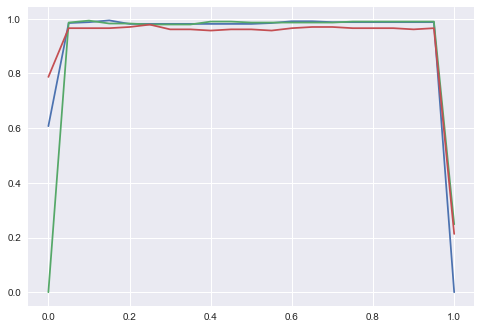

finished


In [11]:
#acc_5.append(0)
plt.clf()
plt.plot(prior_list, acc_0)
plt.plot(prior_list, acc_1)
plt.plot(prior_list, acc_2)
plt.show()
print('finished')
plt.clf()
#colors=[sns.xkcd_rgb["red"],sns.xkcd_rgb["amber"],sns.xkcd_rgb["orange pink"],sns.xkcd_rgb["baby purple"],sns.xkcd_rgb["purple"],sns.xkcd_rgb["reddish orange"],sns.xkcd_rgb["rich purple"]]

plt.plot(prior_list, acc_0,  label='q0.5_fg0.3', color=sns.xkcd_rgb["red"])
plt.plot(prior_list, acc_1, label='q0.333_fg0.3', color=sns.xkcd_rgb["orange pink"])
plt.plot(prior_list, acc_2,  label='q0.333_fg0.1', color=sns.xkcd_rgb["amber"])
plt.plot(prior_list, acc_3,  label='q0.2_fg0.3_BT0.2', color=sns.xkcd_rgb["baby purple"])
plt.plot(prior_list, acc_4,  label='q0.1_fg0.3_BT0.2', color=sns.xkcd_rgb["purple"])
#plt.plot(prior_list, acc_5,  label='All Major', color=sns.xkcd_rgb["reddish orange"])
#plt.plot(prior_list, acc_6,  label='All Minor', color=sns.xkcd_rgb["rich purple"])


plt.xlabel(r'$f_{\mathrm{nonmerg}}$', size=15)
plt.ylabel('LDA Accuracy', size=15)
plt.axvline(x=0.9, ls='--', color='black')
plt.axvline(x=0.7, ls='-.', color='black')
plt.legend(loc='lower left')
plt.xlim([0,1])
#plt.show()
plt.savefig('../MaNGA_Papers/Paper_I/insensitive_to_priors_only_runs_rebin.pdf')

run fg3_m12
[1. 5. 0. 1. 0.]
[ 1. 10.  0.  1.  0.]
[ 1. 20.  0.  1.  0.]
[ 1. 30.  0.  1.  0.]
[1. 5. 1. 1. 0.]
[ 1. 10.  1.  1.  0.]
[ 1. 20.  1.  1.  0.]
[ 1. 30.  1.  1.  0.]
[1. 5. 2. 1. 0.]
[ 1. 10.  2.  1.  0.]
[ 1. 20.  2.  1.  0.]
[ 1. 30.  2.  1.  0.]
[1. 5. 3. 1. 0.]
[ 1. 10.  3.  1.  0.]
[ 1. 20.  3.  1.  0.]
[1. 5. 4. 1. 0.]
[ 1. 10.  4.  1.  0.]
[ 1. 20.  4.  1.  0.]
[ 1. 30.  4.  1.  0.]
[1. 5. 5. 1. 0.]
[ 1. 10.  5.  1.  0.]
[ 1. 20.  5.  1.  0.]
[ 1. 30.  5.  1.  0.]
[1. 5. 6. 1. 0.]
[ 1. 10.  6.  1.  0.]
[ 1. 20.  6.  1.  0.]
[0. 5. 0. 1. 0.]
[0. 5. 0. 1. 0.]
[0. 5. 1. 1. 0.]
[0. 5. 1. 1. 0.]
[0. 5. 2. 1. 0.]
[0. 5. 2. 1. 0.]
[0. 5. 3. 1. 0.]
[0. 5. 3. 1. 0.]
[0. 5. 4. 1. 0.]
[0. 5. 4. 1. 0.]
[0. 5. 5. 1. 0.]
[0. 5. 5. 1. 0.]
[0. 5. 6. 1. 0.]
[0. 5. 6. 1. 0.]
X before norm [[ 0.70978658 -0.79113272  4.42303291 ...  0.34526739  2.9482
   0.35841947]
 [ 0.76440784 -0.84553525  4.3461586  ...  0.34911774  2.7168
   0.36333205]
 [ 0.71709391 -2.65401726  4.51544993 ...  0.

/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:82: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/beckynevin/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:455: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)



shape X_qda_sklearn ()
0.9947916666666666


/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<Figure size 576x396 with 0 Axes>

<Figure size 1296x720 with 0 Axes>

<Figure size 1296x720 with 0 Axes>

<Figure size 1296x720 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

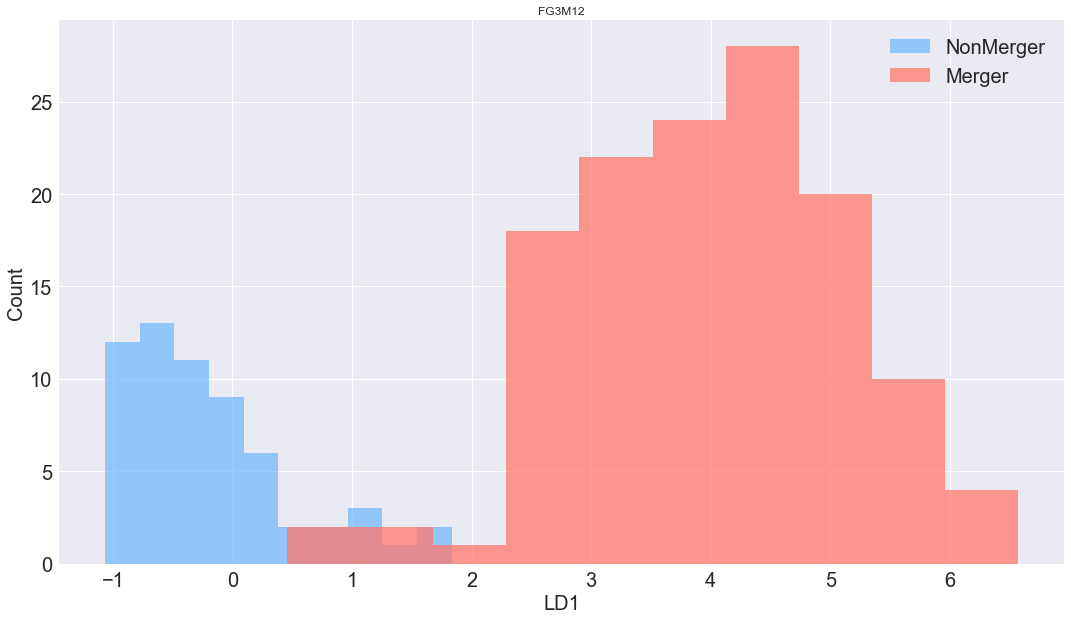

[[ 0.31715482 -2.57240147  4.45759542  6.70784565 -1.12017059  0.26683895
   0.69988222]]
     class label
0              1
1              1
2              1
3              1
4              1
5              1
6              1
7              1
8              1
9              1
10             1
11             1
12             0
13             0
14             0
15             0
16             1
17             1
18             1
19             1
20             1
21             1
22             1
23             1
24             1
25             1
26             1
27             1
28             1
29             1
..           ...
162            0
163            0
164            0
165            0
166            0
167            0
168            0
169            0
170            0
171            0
172            0
173            0
174            0
175            0
176            0
177            0
178            0
179            0
180            0
181            0
182            0
183      

/Users/beckynevin/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



[ 1. 10.  5.  1.  0.]
[ 1. 10.  6.  1.  0.]
[0. 5. 0. 1. 0.]
[0. 5. 0. 1. 0.]
[0. 5. 1. 1. 0.]
[0. 5. 1. 1. 0.]
[0. 5. 2. 1. 0.]
[0. 5. 2. 1. 0.]
[0. 5. 3. 1. 0.]
[0. 5. 3. 1. 0.]
[0. 5. 4. 1. 0.]
[0. 5. 4. 1. 0.]
[0. 5. 5. 1. 0.]
[0. 5. 5. 1. 0.]
[0. 5. 6. 1. 0.]
[0. 5. 6. 1. 0.]
X before norm [[ 0.61020128 -1.84076285  2.72034022 ...  0.03551586  0.8552
   0.07418257]
 [ 0.61313577 -1.86532189  2.79654005 ...  0.12571824  0.8864
   0.16252166]
 [ 0.72319029 -1.57674979  2.82135715 ...  0.23993998  0.5103
   0.47637   ]
 ...
 [ 0.69359342 -1.83051587  2.72034022 ...  0.0593231   0.8355
   0.04984751]
 [ 0.71240611 -1.788465    2.72034022 ...  0.08271237  0.9579
   0.04851613]
 [ 0.72429504 -1.88212437  3.01029996 ...  0.30658355  1.6703
   0.08324348]]
X after norm [[-2.03854239  0.12943664 -1.51599442 ... -1.48483818 -1.21993582
  -0.9141491 ]
 [-1.99062564  0.08372735 -1.41401758 ... -0.7766804  -1.16793862
  -0.53664549]
 [-0.19356923  0.6208176  -1.38080532 ...  0.12004773 -1.794

<Figure size 576x396 with 0 Axes>

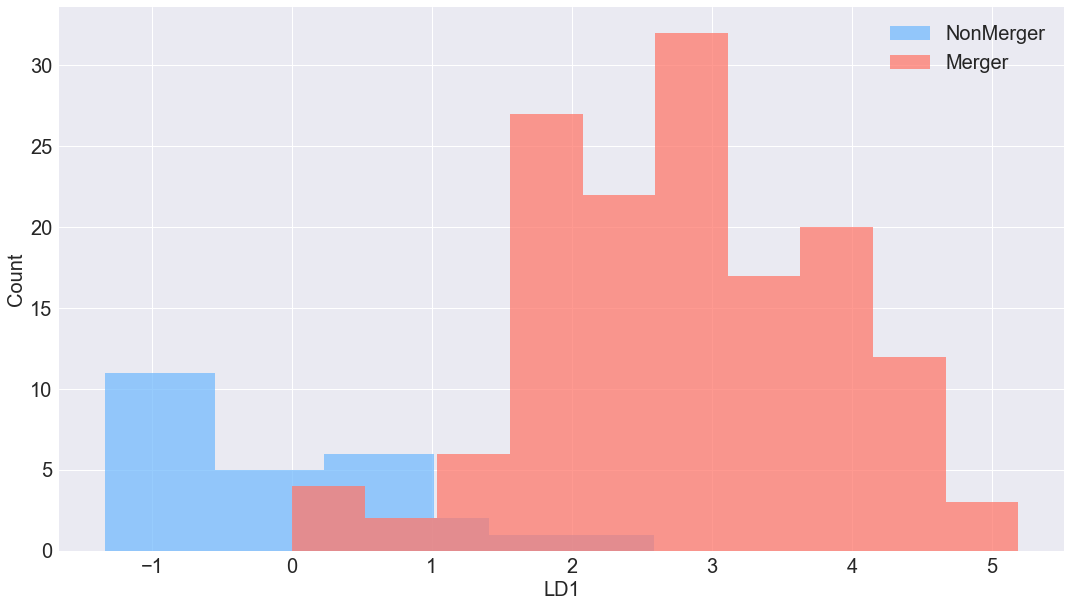

[[-1.02264439 -2.06155472  2.21632597  2.5695055   0.44245812  0.36149426
   1.24281559]]
     class label
0              0
1              1
2              1
3              1
4              1
5              1
6              1
7              1
8              1
9              1
10             1
11             1
12             1
13             1
14             1
15             1
16             1
17             1
18             1
19             1
20             1
21             1
22             0
23             1
24             1
25             1
26             1
27             1
28             1
29             1
..           ...
164            0
165            0
166            0
167            0
168            0
169            0
170            0
171            0
172            0
173            0
174            0
175            0
176            0
177            0
178            0
179            0
180            0
181            0
182            0
183            0
184            0
185      

In [34]:
'''
A tool for separating things in the classification out by viewing angle or other things like
myr snapshot :)
'''

'''
~~~
Now just for the imaging part of it!
~~~
'''
import numpy.ma as ma

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_mean_and_CI(mean, lb, ub, color_mean=None, color_shading=None):
        # plot the shaded range of the confidence intervals
        plt.fill_between(range(mean.shape[0]), ub, lb,
                         color=color_shading, alpha=.5)
        # plot the mean on top
        plt.plot(mean, color_mean)


feature_dict = {i:label for i,label in zip(
                range(14),
                  ('Counter',
                  'Image',
                  'class label',
                  'Myr',
                  'Viewpoint',
                '# Bulges',
                   'Sep',
                   'Flux Ratio',
                  'Gini',
                  'M20',
                  'Concentration (C)',
                  'Asymmetry (A)',
                  'Clumpiness (S)',
                  'Sersic N',
                  'Shape Asymmetry (A_S)'))}

#Counter	Image	Merger (0 = no, 1 = yes)	Myr	Viewpoint	Gini	M20	C	A	S	Sersic n
'''view=0
df = pd.io.parsers.read_table(
    filepath_or_buffer='PCA_img_0.txt',
    header=[0],
    sep='\t', skiprows=14*view,nrows=14
    )#,skiprows=10,nrows=10'''


#list_runs=['fg3_m_12','fg1_m_13']
list_runs=['fg3_m12','fg1_m13']#,'fg1_m13']

for i in range(len(list_runs)):
   
    add_on=list_runs[i]
    print('run', add_on)


    run=list_runs[i]
    df = pd.io.parsers.read_table(
        filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
        header=[0],
        sep='\t'
        )#,skiprows=10,nrows=10
    df.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']
    df.dropna(how="all", inplace=True) # to drop the empty line at file-end
    
    for j in range(len(df)):
        if df[['Myr']].values[j][0]<40 and df[['Sep']].values[j][0]==0.0 and df[['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]
            
            
            #I use this part to check if there is any separation at these points in time
            #Or if there are more than two bulges
            print(df[['class label','Myr','Viewpoint','# Bulges', 'Sep']].values[j])
            
            #Then, you can optionally change the class values of all of these viewpoints
            
            #.set_value(index, col, value, 
            df.set_value(j,'class label',0.0)
    
    

    from sklearn.preprocessing import LabelEncoder


    X = df[['Gini','M20','Concentration (C)', 'Asymmetry (A)', 'Clumpiness (S)', 'Sersic N', 'Shape Asymmetry']].values
    
    from sklearn import preprocessing

    print('X before norm', X)

    std_scale = preprocessing.StandardScaler().fit(X)
    X = std_scale.transform(X)
    print('X after norm', X)

    n_params=7


    y = df['class label'].values
    

    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y) + 1


    label_dict = {1: 'NonMerger', 2: 'Merger'}
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

    # LDA
    sklearn_lda = LDA(priors=[0.94,0.04])
    X_lda_sklearn = sklearn_lda.fit_transform(X, y)
    dec = sklearn_lda.score(X,y)
    prob = sklearn_lda.predict_proba(X)
    
    coef = sklearn_lda.coef_
    inter = sklearn_lda.intercept_
    class_label = sklearn_lda.classes_
    
    
   
    print('mean accuracy',dec)#mean accuracy on the given test data and labels.
    print('~~~Coefficients and Intercepts~~~')
    print(coef,inter)
    
    
    

    '''Make a histogram'''
    from scipy import stats
    import seaborn as sns
    plt.clf()
    fig = plt.figure(figsize=(18,10))
    ax = fig.add_subplot(111)
    X_lda_1=[]
    X_lda_2=[]
    for j in range(len(X_lda_sklearn)):
        if y[j] ==1:
            X_lda_1.append(X_lda_sklearn[j][0])
        else:
            X_lda_2.append(X_lda_sklearn[j][0])
    input_hist=X_lda_sklearn
    
    ax.hist(X_lda_1, label='NonMerger',  color=sns.xkcd_rgb["sky blue"],alpha = 0.75)
    ax.hist(X_lda_2, label='Merger',  color=sns.xkcd_rgb["salmon"],alpha = 0.75)

    '''for label,col in zip(range(1,4),  ('blue', 'red')):
        input_hist=X_lda_sklearn
        input_all=X_lda_sklearn
        ax.hist(input_hist,
                       color=col,
                       label='class %s' %label_dict[label],
                       alpha=0.5,)#bins=bins,
        xt = plt.xticks()[0]  
        xmin, xmax = -0.1,0.7#min(xt), max(xt)  
        lnspc = np.linspace(xmin, xmax, len(input_hist))

        # lets try the normal distribution first
        m, s = stats.norm.fit(input_hist) # get mean and standard deviation  
        pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
        #ax.plot(lnspc, pdf_g,  color=col) # plot it



    ylims = ax.get_ylim()

    # plot annotation
    leg = ax.legend(loc='upper right', fancybox=True, fontsize=8)
    leg.get_frame().set_alpha(0.5)
    ax.set_ylim([0, max(ylims)+2])'''

    ax.set_xlabel('LD1', size=20)
    #ax.set_title('Histogram #%s' %str(cnt+1), size=20)

    # hide axis ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on", labelsize=20)

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    ax.set_ylabel('Count', size=20)
    
    
    plt.legend(loc="upper right", fontsize=20)
    #fig.tight_layout() 
    #plt.annotate(str(add_on), xy=(0.02,0.95),xycoords='axes fraction', size=20)
    #plt.annotate('Mean Accuracy = '+str(dec), xy=(0.02,0.9),xycoords='axes fraction', size=20)
    #frame1 = plt.gca()
    if run=='fg1_m_13':
        plt.title('FG1M13')
    if run=='fg3_m12':
        plt.title('FG3M12')
    plt.show()
    print(coef)
    #plt.savefig('../MaNGA_Papers/Paper_I/Marginalized_img_'+str(run)+'.pdf')
    #plt.clf()
    
    '''Also, making those mountain plots for the imaging runs'''
    
    
    
    '''Now measure LD1 for every row and then plot that'''
    import seaborn as sns
    

    n_params=7



    #coef is how you get the eigvecs (doesn't matter what slope offset is)
    #print('real eigvecs',(eigvec_sc.real))
    #print(len(X_lda[:,0].real[y==2]))#[y == label]
    xs=[]
    LDA1=[]
    if run=='fg3_m_12':
        myr=[170,180,185,190,195,205,210,220,225,230,240,250,260]
        myr_non=[5,200]
    if run=='fg3_m12':
        myr=[5,10,20,30,40,60,80,100,120,140,160,170,180,185,190,195,205,210,220,225,230,240,250,260]
        myr_non=[5,100,200]
        myr_non=[5,10,20,30,100,200]
    if run=='fg1_m13':
        myr=[10,40,50,60,70,90,100,120,130,140,170,180,185,190,195,200,205,210,215,220,225,230,235,240,250,260,270,280,290,300,310,320,330,340,350]
        myr_non=[5,10,100,200]
    if run=='fg1_m_13':
        myr=[40,195,210,215,220,225,230,235,240,250,260,270,280,290,300,310,320,330,340,350]
        myr_non=[5,200]
    my_lists = {key:[] for key in myr}
    my_lists_none = {key:[] for key in myr_non}
    my_lists_non = []
    separations = {key:[] for key in myr}

    print(df[['class label']])
    #STOP
    
    for i in range(len(df)):
        if df[['class label']].values[i]==0:
            my_lists_non.append(X_lda_sklearn[i][0])
            my_lists_none[df[['Myr']].values[i][0]].append(X_lda_sklearn[i][0])
            continue
        my_lists[df[['Myr']].values[i][0]].append(X_lda_sklearn[i][0])
        separations[df[['Myr']].values[i][0]].append(df[['Sep']].values[i][0])
        L=X_lda_sklearn[i][0]
        #df[['Gini']].values[i][0]*coef[0][0]+df[['M20']].values[i][0]*coef[0][1]+df[['Concentration (C)']].values[i][0]*coef[0][2]+df[['Asymmetry (A)']].values[i][0]*coef[0][3]+df[['Clumpiness (S)']].values[i][0]*coef[0][4]+df[['Sersic N']].values[i][0]*coef[0][5]+df[['Shape Asymmetry']].values[i][0]*coef[0][6]
        LDA1.append(L)
        xs.append(df[['Myr']].values[i][0])

    #print(mean(my_lists[180]))
    
    '''Make the beautiful list of colors'''
    # These are the "Tableau 20" colors as RGB.    
    tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
                 (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
                 (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
                 (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
                 (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    

    # Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
    for i in range(len(tableau20)):    
        r, g, b = tableau20[i]    
        tableau20[i] = (r / 255., g / 255., b / 255.)    
    
    mean_non=np.mean(my_lists_non)+np.std(my_lists_non)
    means=[]
    std=[]
    separation_value=[]
    plt.clf()
    
    for i in range(len(myr)):
        means.append(np.mean(my_lists[myr[i]]))
        std.append(np.std(my_lists[myr[i]]))
        separation_value.append(np.mean(separations[myr[i]]))
    for i in range(len(myr_non)):
        myr_plot=np.linspace(myr_non[i]/100,myr_non[i]/100,len(my_lists_none[myr_non[i]]))
        #np.full((3, 5), 7) that last value is your fill
        plt.scatter(myr_plot,my_lists_none[myr_non[i]], color=tableau20[i])
    
    
    means=np.array(means)
    std=np.array(std)
    myr=np.array(myr)
    
    if run=='fg1_m13':
        '''Try to replot with a dimensionless y axis with just means and std'''
        rescale_y_mean=0#-1.7583e-01
        rescale_y_pm=7.13475416061/2


        new_means=np.array([(x-rescale_y_mean) for x in means])
        #new_means=ma.masked_where(math.isnan(new_means),new_means)
        #print('these are apparently the myrs', myr/100)
        #print('these are the fills', new_means)
        
        plt.plot(myr/100, new_means, color=sns.xkcd_rgb["amber"])
        plt.fill_between(myr/100, (new_means-std), (new_means+std),alpha=.5, color=sns.xkcd_rgb["amber"])
        plt.xlabel(r'Merger Timeline [Gyr]', size=15)
        plt.ylabel(r'Detection Sensitivity (LD1)', size=15)
        #plt.axvline(x=220/100, color='black', ls='--')
        plt.axvline(x=215/100, color='black', ls='--')
        plt.axvline(x=280/100, color='black', ls='--')

        '''width and height 3.17421463155 0.87713041243
        pos [ -1.6779e+00   2.6963e-16]
        width and height 5.56843021209 2.94988106646
        pos [  2.7636e-01   1.2800e-16]'''


        '''fg1_m_13:
        width and height 1.98151143695 1.33924739273
        pos [  1.4067e+00   6.6911e-16]
        width and height 7.13475416061 2.66110273731
        pos [ -1.7583e-01  -1.3878e-16]'''

        plt.axhline(y=mean_non, color='black')
        #plt.annotate(r'$\mu_{\mathrm{Merger}}$', xy=(0.02,0.53), xycoords='axes fraction', size=15)
        #plt.title(str(run))
        plt.annotate('FG1M13', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(0.25,0.95), xycoords='axes fraction', size=9)
        plt.annotate('Late', xy=(0.63,0.95), xycoords='axes fraction',size=9)
        plt.annotate('Post Coalescence', xy=(0.76,1.02), xycoords='axes fraction', size=9)

    if run=='fg1_m_13':
        '''Try to replot with a dimensionless y axis with just means and std'''
        rescale_y_mean=0#-1.7583e-01
        rescale_y_pm=7.13475416061/2


        new_means=np.array([(x-rescale_y_mean) for x in means])

        

        plt.plot(myr/100, new_means, color=sns.xkcd_rgb["amber"])
        plt.fill_between(myr/100, (new_means-std), (new_means+std),alpha=.5, color=sns.xkcd_rgb["amber"])
        plt.xlabel(r'Merger Timeline [Gyr]', size=15)
        plt.ylabel(r'Detection Sensitivity (LD1)', size=15)
        #plt.axvline(x=220/100, color='black', ls='--')
        plt.axvline(x=215/100, color='black', ls='--')
        plt.axvline(x=280/100, color='black', ls='--')

        '''width and height 3.17421463155 0.87713041243
        pos [ -1.6779e+00   2.6963e-16]
        width and height 5.56843021209 2.94988106646
        pos [  2.7636e-01   1.2800e-16]'''


        '''fg1_m_13:
        width and height 1.98151143695 1.33924739273
        pos [  1.4067e+00   6.6911e-16]
        width and height 7.13475416061 2.66110273731
        pos [ -1.7583e-01  -1.3878e-16]'''

        ys_LD1=np.array([-1.7583e-01 for x in myr])
        #plt.plot(myr/100,ys_LD1)
        #plt.fill_between(myr/100, ys_LD1-0.588/2, ys_LD1+0.588/2,alpha=.5)
        plt.axhline(y=mean_non, color='black')
        #plt.annotate(r'$\mu_{\mathrm{Merger}}$', xy=(0.02,0.53), xycoords='axes fraction', size=15)
        #plt.title(str(run))
        plt.annotate('FG1M13', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(0.25,0.95), xycoords='axes fraction', size=9)
        plt.annotate('Late', xy=(0.63,0.95), xycoords='axes fraction',size=9)
        plt.annotate('Post Coalescence', xy=(0.76,1.02), xycoords='axes fraction', size=9)
    if run=='fg3_m_12':
        '''Try to replot with a dimensionless y axis with just means and std'''
        rescale_y_mean=0#2.7636e-01
        rescale_y_pm=5.5684302120/2


        new_means=np.array([(x-rescale_y_mean) for x in means])

        

        plt.plot(myr/100, new_means, color='red')
        plt.fill_between(myr/100, (new_means-std), (new_means+std),alpha=.5, color='red')
        plt.xlabel(r'Merger Timeline [Gyr]', size=15)
        plt.ylabel(r'Detection Sensitivity (LD1)', size=15)
        plt.axvline(x=220/100, color='black', ls='--')
        plt.axvline(x=180/100, color='black', ls='--')



        '''width and height 3.17421463155 0.87713041243
        pos [ -1.6779e+00   2.6963e-16]
        width and height 5.56843021209 2.94988106646
        pos [  2.7636e-01   1.2800e-16]'''


        #plt.axhline(y=0, color='black')

        #plt.annotate(r'$\mu_{\mathrm{Merger}}$', xy=(0.15,0.53), xycoords='axes fraction', size=15)
        #plt.title(str(run))
        plt.axhline(y=mean_non, color='black')
        plt.annotate('FG3M12', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(0.03,0.95), xycoords='axes fraction', size=9)
        plt.annotate('Late', xy=(0.3,0.95), xycoords='axes fraction',size=9)
        plt.annotate('Post Coalescence', xy=(0.65,0.95), xycoords='axes fraction', size=9)
    if run=='fg3_m12':
    
        '''Try to replot with a dimensionless y axis with just means and std'''
        rescale_y_mean=0#2.7636e-01
        rescale_y_pm=5.5684302120/2


        new_means=np.array([(x-rescale_y_mean) for x in means])

        

        plt.plot(myr/100, new_means, color='red')
        plt.fill_between(myr/100, (new_means-std), (new_means+std),alpha=.5, color='red')
        plt.xlabel(r'Merger Timeline [Gyr]', size=15)
        plt.ylabel(r'Detection Sensitivity (LD1)', size=15)
        plt.axvline(x=220/100, color='black', ls='--')
        plt.axvline(x=180/100, color='black', ls='--')



        '''width and height 3.17421463155 0.87713041243
        pos [ -1.6779e+00   2.6963e-16]
        width and height 5.56843021209 2.94988106646
        pos [  2.7636e-01   1.2800e-16]'''


        #plt.axhline(y=0, color='black')

        #plt.annotate(r'$\mu_{\mathrm{Merger}}$', xy=(0.15,0.53), xycoords='axes fraction', size=15)
        #plt.title(str(run))
        plt.axhline(y=mean_non, color='black')
        plt.annotate('FG3M12', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(0.63,0.97), xycoords='axes fraction', size=9)
        plt.annotate('Late', xy=(0.7,0.97), xycoords='axes fraction',size=9)
        plt.annotate('Post Coalescence', xy=(0.85,1.01), xycoords='axes fraction', size=9)
    #plt.ylim([-1,1])
    #plt.xlim([min(myr)/100,max(myr)/100])
    #plt.xlim([0,])
    frame1 = plt.gca()
    #frame1.axes.xaxis.set_ticklabels([])
    frame1.axes.yaxis.set_ticklabels([])
    #frame1.axes.yaxis.set_ticks([])
    plt.savefig('../MaNGA_Papers/Paper_I/Mountain_plot_imaging_priors_colors_'+str(run)+'.pdf')



    '''Try to replot with a dimensionless y axis with just means and std'''
    
    
#    savefig('../MaNGA_Papers/Paper_I/Bayesian_Hist_'+str(run)+'.pdf')



In [3]:
'''
Now trying to do the same thing for different viewing angles
'''
'''
A tool for separating things in the classification out by viewing angle or other things like
myr snapshot :)
'''

'''
~~~
Now just for the imaging part of it!
~~~
'''
import numpy.ma as ma

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_mean_and_CI(mean, lb, ub, color_mean=None, color_shading=None):
        # plot the shaded range of the confidence intervals
        plt.fill_between(range(mean.shape[0]), ub, lb,
                         color=color_shading, alpha=.5)
        # plot the mean on top
        plt.plot(mean, color_mean)


feature_dict = {i:label for i,label in zip(
                range(14),
                  ('Counter',
                  'Image',
                  'class label',
                  'Myr',
                  'Viewpoint',
                '# Bulges',
                   'Sep',
                   'Flux Ratio',
                  'Gini',
                  'M20',
                  'Concentration (C)',
                  'Asymmetry (A)',
                  'Clumpiness (S)',
                  'Sersic N',
                  'Shape Asymmetry (A_S)'))}

#Counter	Image	Merger (0 = no, 1 = yes)	Myr	Viewpoint	Gini	M20	C	A	S	Sersic n
'''view=0
df = pd.io.parsers.read_table(
    filepath_or_buffer='PCA_img_0.txt',
    header=[0],
    sep='\t', skiprows=14*view,nrows=14
    )#,skiprows=10,nrows=10'''


#list_runs=['fg3_m_12','fg1_m_13']
list_runs=['fg3_m15','fg3_m12','fg1_m13']#,'fg1_m13']

for i in range(len(list_runs)):
   
    add_on=list_runs[i]
    print('run', add_on)


    run=list_runs[i]
    df = pd.io.parsers.read_table(
        filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
        header=[0],
        sep='\t'
        )#,skiprows=10,nrows=10
    df.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']
    df.dropna(how="all", inplace=True) # to drop the empty line at file-end
    
    for j in range(len(df)):
        if df[['Myr']].values[j][0]<40 and df[['Sep']].values[j][0]==0.0 and df[['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]
            
            
            #I use this part to check if there is any separation at these points in time
            #Or if there are more than two bulges
            #print(df[['class label','Myr','Viewpoint','# Bulges', 'Sep']].values[j])
            
            #Then, you can optionally change the class values of all of these viewpoints
            
            #.set_value(index, col, value, 
            df.set_value(j,'class label',0.0)
    
    

    from sklearn.preprocessing import LabelEncoder


    X = df[['Gini','M20','Concentration (C)', 'Asymmetry (A)', 'Clumpiness (S)', 'Sersic N', 'Shape Asymmetry']].values
    
    from sklearn import preprocessing

    

    std_scale = preprocessing.StandardScaler().fit(X)
    X = std_scale.transform(X)
    
    n_params=7


    y = df['class label'].values
    

    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y) + 1


    label_dict = {1: 'NonMerger', 2: 'Merger'}
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

    # LDA
    sklearn_lda = LDA(priors=[0.94,0.04])
    X_lda_sklearn = sklearn_lda.fit_transform(X, y)
    dec = sklearn_lda.score(X,y)
    prob = sklearn_lda.predict_proba(X)
    
    coef = sklearn_lda.coef_
    inter = sklearn_lda.intercept_
    class_label = sklearn_lda.classes_
    
    
   
    print('mean accuracy',dec)#mean accuracy on the given test data and labels.
    
    print(inter)
    
    from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
    
    # QDA
    sklearn_qda = QDA(priors=[0.94,0.04])
    X_qda_sklearn = sklearn_qda.fit(X, y)
    dec_qda = sklearn_qda.score(X,y)
    
    #coef = sklearn_qda.coef_
    #inter = sklearn_qda.intercept_
    #print(dec_qda)#mean accuracy on the given test data and labels.

    '''Make a histogram'''
    from scipy import stats
    import seaborn as sns
    plt.clf()
    fig = plt.figure(figsize=(18,10))
    ax = fig.add_subplot(111)
    X_lda_1=[]
    X_lda_2=[]
    for j in range(len(X_lda_sklearn)):
        if y[j] ==1:
            X_lda_1.append(X_lda_sklearn[j][0])
        else:
            X_lda_2.append(X_lda_sklearn[j][0])
    input_hist=X_lda_sklearn
    
    ax.hist(X_lda_1, label='NonMerger',  color=sns.xkcd_rgb["sky blue"],alpha = 0.75)
    ax.hist(X_lda_2, label='Merger',  color=sns.xkcd_rgb["salmon"],alpha = 0.75)

    '''for label,col in zip(range(1,4),  ('blue', 'red')):
        input_hist=X_lda_sklearn
        input_all=X_lda_sklearn
        ax.hist(input_hist,
                       color=col,
                       label='class %s' %label_dict[label],
                       alpha=0.5,)#bins=bins,
        xt = plt.xticks()[0]  
        xmin, xmax = -0.1,0.7#min(xt), max(xt)  
        lnspc = np.linspace(xmin, xmax, len(input_hist))

        # lets try the normal distribution first
        m, s = stats.norm.fit(input_hist) # get mean and standard deviation  
        pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
        #ax.plot(lnspc, pdf_g,  color=col) # plot it



    ylims = ax.get_ylim()

    # plot annotation
    leg = ax.legend(loc='upper right', fancybox=True, fontsize=8)
    leg.get_frame().set_alpha(0.5)
    ax.set_ylim([0, max(ylims)+2])'''

    ax.set_xlabel('LD1', size=20)
    #ax.set_title('Histogram #%s' %str(cnt+1), size=20)

    # hide axis ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on", labelsize=20)

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    ax.set_ylabel('Count', size=20)
    
    
    plt.legend(loc="upper right", fontsize=20)
    #fig.tight_layout() 
    #plt.annotate(str(add_on), xy=(0.02,0.95),xycoords='axes fraction', size=20)
    #plt.annotate('Mean Accuracy = '+str(dec), xy=(0.02,0.9),xycoords='axes fraction', size=20)
    #frame1 = plt.gca()
    if run=='fg1_m_13':
        plt.title('FG1M13')
    if run=='fg3_m12':
        plt.title('FG3M12')
    if run=='fg3_m15':
        plt.tilte('FG3M15')
    plt.show()
    print(coef)
    #plt.savefig('../MaNGA_Papers/Paper_I/Marginalized_img_'+str(run)+'.pdf')
    #plt.clf()
    
    '''Also, making those mountain plots for the imaging runs'''
    
    
    
    '''Now measure LD1 for every row and then plot that'''
    import seaborn as sns
    

    n_params=7



    #coef is how you get the eigvecs (doesn't matter what slope offset is)
    #print('real eigvecs',(eigvec_sc.real))
    #print(len(X_lda[:,0].real[y==2]))#[y == label]
    xs=[]
    LDA1=[]
    if run=='fg3_m15':
        myr=[320,340,360,400,420]
    if run=='fg3_m_12':
        myr=[170,180,185,190,195,205,210,220,225,230,240,250,260]
        myr_non=[5,200]
    if run=='fg3_m12':
        myr=[5,10,20,30,40,60,80,100,120,140,160,170,180,185,190,195,205,210,220,225,230,240,250,260]
        myr_non=[5,100,200]
        myr_non=[5,10,20,30,100,200]
    if run=='fg1_m13':
        myr=[10,40,50,60,70,90,100,120,130,140,170,180,185,190,195,200,205,210,215,220,225,230,235,240,250,260,270,280,290,300,310,320,330,340,350]
        myr_non=[5,10,100,200]
    if run=='fg1_m_13':
        myr=[40,195,210,215,220,225,230,235,240,250,260,270,280,290,300,310,320,330,340,350]
        myr_non=[5,200]
        
    myr_non=[0,1,2,3,4,5,6]
    my_lists = {key:[] for key in myr}
    my_lists_none = {key:[] for key in myr_non}
    myr_lists_none = {key:[] for key in myr_non}
    
    
    my_lists_non = []
    separations = {key:[] for key in myr}

    
    
    for i in range(len(df)):
        if df[['class label']].values[i]==0:
            my_lists_non.append(X_lda_sklearn[i][0])
            my_lists_none[df[['Viewpoint']].values[i][0]].append(X_lda_sklearn[i][0])
            myr_lists_none[df[['Viewpoint']].values[i][0]].append(df[['Myr']].values[i][0]/100)
            continue
        my_lists[df[['Myr']].values[i][0]].append(X_lda_sklearn[i][0])
        separations[df[['Myr']].values[i][0]].append(df[['Sep']].values[i][0])
        L=X_lda_sklearn[i][0]
        #df[['Gini']].values[i][0]*coef[0][0]+df[['M20']].values[i][0]*coef[0][1]+df[['Concentration (C)']].values[i][0]*coef[0][2]+df[['Asymmetry (A)']].values[i][0]*coef[0][3]+df[['Clumpiness (S)']].values[i][0]*coef[0][4]+df[['Sersic N']].values[i][0]*coef[0][5]+df[['Shape Asymmetry']].values[i][0]*coef[0][6]
        LDA1.append(L)
        xs.append(df[['Myr']].values[i][0])
    
    
    '''Make the beautiful list of colors'''
    # These are the "Tableau 20" colors as RGB.    
    tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
                 (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
                 (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
                 (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
                 (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    

    # Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
    for i in range(len(tableau20)):    
        r, g, b = tableau20[i]    
        tableau20[i] = (r / 255., g / 255., b / 255.)    
    
    mean_non=np.mean(my_lists_non)+np.std(my_lists_non)
    means=[]
    std=[]
    separation_value=[]
    plt.clf()
    
    for i in range(len(myr)):
        means.append(np.mean(my_lists[myr[i]]))
        std.append(np.std(my_lists[myr[i]]))
        separation_value.append(np.mean(separations[myr[i]]))
    for i in range(len(myr_non)):
        print('viewpoint', i, 'color', tableau20[i])
        print('xs',myr_lists_none[i])
        print('ys',my_lists_none[i])
        plt.scatter(myr_lists_none[i],my_lists_none[i], color=tableau20[i], label='Viewpoint '+str(i))
    
    
    means=np.array(means)
    std=np.array(std)
    myr=np.array(myr)
    
    if run=='fg1_m13':
        '''Try to replot with a dimensionless y axis with just means and std'''
        rescale_y_mean=0#-1.7583e-01
        rescale_y_pm=7.13475416061/2


        new_means=np.array([(x-rescale_y_mean) for x in means])
        #new_means=ma.masked_where(math.isnan(new_means),new_means)
        #print('these are apparently the myrs', myr/100)
        #print('these are the fills', new_means)
        
        plt.plot(myr/100, new_means, color=sns.xkcd_rgb["amber"])
        plt.fill_between(myr/100, (new_means-std), (new_means+std),alpha=.5, color=sns.xkcd_rgb["amber"])
        plt.xlabel(r'Merger Timeline [Gyr]', size=15)
        plt.ylabel(r'Detection Sensitivity (LD1)', size=15)
        #plt.axvline(x=220/100, color='black', ls='--')
        plt.axvline(x=215/100, color='black', ls='--')
        plt.axvline(x=280/100, color='black', ls='--')

        '''width and height 3.17421463155 0.87713041243
        pos [ -1.6779e+00   2.6963e-16]
        width and height 5.56843021209 2.94988106646
        pos [  2.7636e-01   1.2800e-16]'''


        '''fg1_m_13:
        width and height 1.98151143695 1.33924739273
        pos [  1.4067e+00   6.6911e-16]
        width and height 7.13475416061 2.66110273731
        pos [ -1.7583e-01  -1.3878e-16]'''

        plt.axhline(y=mean_non, color='black')
        #plt.annotate(r'$\mu_{\mathrm{Merger}}$', xy=(0.02,0.53), xycoords='axes fraction', size=15)
        #plt.title(str(run))
        plt.annotate('FG1M13', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(0.25,0.95), xycoords='axes fraction', size=9)
        plt.annotate('Late', xy=(0.63,0.95), xycoords='axes fraction',size=9)
        plt.annotate('Post Coalescence', xy=(0.76,1.02), xycoords='axes fraction', size=9)

    if run=='fg1_m_13':
        '''Try to replot with a dimensionless y axis with just means and std'''
        rescale_y_mean=0#-1.7583e-01
        rescale_y_pm=7.13475416061/2


        new_means=np.array([(x-rescale_y_mean) for x in means])

        

        plt.plot(myr/100, new_means, color=sns.xkcd_rgb["amber"])
        plt.fill_between(myr/100, (new_means-std), (new_means+std),alpha=.5, color=sns.xkcd_rgb["amber"])
        plt.xlabel(r'Merger Timeline [Gyr]', size=15)
        plt.ylabel(r'Detection Sensitivity (LD1)', size=15)
        #plt.axvline(x=220/100, color='black', ls='--')
        plt.axvline(x=215/100, color='black', ls='--')
        plt.axvline(x=280/100, color='black', ls='--')

        '''width and height 3.17421463155 0.87713041243
        pos [ -1.6779e+00   2.6963e-16]
        width and height 5.56843021209 2.94988106646
        pos [  2.7636e-01   1.2800e-16]'''


        '''fg1_m_13:
        width and height 1.98151143695 1.33924739273
        pos [  1.4067e+00   6.6911e-16]
        width and height 7.13475416061 2.66110273731
        pos [ -1.7583e-01  -1.3878e-16]'''

        ys_LD1=np.array([-1.7583e-01 for x in myr])
        #plt.plot(myr/100,ys_LD1)
        #plt.fill_between(myr/100, ys_LD1-0.588/2, ys_LD1+0.588/2,alpha=.5)
        plt.axhline(y=mean_non, color='black')
        #plt.annotate(r'$\mu_{\mathrm{Merger}}$', xy=(0.02,0.53), xycoords='axes fraction', size=15)
        #plt.title(str(run))
        plt.annotate('FG1M13', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(0.25,0.95), xycoords='axes fraction', size=9)
        plt.annotate('Late', xy=(0.63,0.95), xycoords='axes fraction',size=9)
        plt.annotate('Post Coalescence', xy=(0.76,1.02), xycoords='axes fraction', size=9)
    if run=='fg3_m_12':
        '''Try to replot with a dimensionless y axis with just means and std'''
        rescale_y_mean=0#2.7636e-01
        rescale_y_pm=5.5684302120/2


        new_means=np.array([(x-rescale_y_mean) for x in means])

        

        plt.plot(myr/100, new_means, color='red')
        plt.fill_between(myr/100, (new_means-std), (new_means+std),alpha=.5, color='red')
        plt.xlabel(r'Merger Timeline [Gyr]', size=15)
        plt.ylabel(r'Detection Sensitivity (LD1)', size=15)
        plt.axvline(x=220/100, color='black', ls='--')
        plt.axvline(x=180/100, color='black', ls='--')



        '''width and height 3.17421463155 0.87713041243
        pos [ -1.6779e+00   2.6963e-16]
        width and height 5.56843021209 2.94988106646
        pos [  2.7636e-01   1.2800e-16]'''


        #plt.axhline(y=0, color='black')

        #plt.annotate(r'$\mu_{\mathrm{Merger}}$', xy=(0.15,0.53), xycoords='axes fraction', size=15)
        #plt.title(str(run))
        plt.axhline(y=mean_non, color='black')
        plt.annotate('FG3M12', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(0.03,0.95), xycoords='axes fraction', size=9)
        plt.annotate('Late', xy=(0.3,0.95), xycoords='axes fraction',size=9)
        plt.annotate('Post Coalescence', xy=(0.65,0.95), xycoords='axes fraction', size=9)
    if run=='fg3_m12':
    
        '''Try to replot with a dimensionless y axis with just means and std'''
        rescale_y_mean=0#2.7636e-01
        rescale_y_pm=5.5684302120/2


        new_means=np.array([(x-rescale_y_mean) for x in means])

        

        plt.plot(myr/100, new_means, color='red')
        plt.fill_between(myr/100, (new_means-std), (new_means+std),alpha=.5, color='red')
        plt.xlabel(r'Merger Timeline [Gyr]', size=15)
        plt.ylabel(r'Detection Sensitivity (LD1)', size=15)
        plt.axvline(x=220/100, color='black', ls='--')
        plt.axvline(x=180/100, color='black', ls='--')



        '''width and height 3.17421463155 0.87713041243
        pos [ -1.6779e+00   2.6963e-16]
        width and height 5.56843021209 2.94988106646
        pos [  2.7636e-01   1.2800e-16]'''


        #plt.axhline(y=0, color='black')

        #plt.annotate(r'$\mu_{\mathrm{Merger}}$', xy=(0.15,0.53), xycoords='axes fraction', size=15)
        #plt.title(str(run))
        plt.axhline(y=mean_non, color='black')
        plt.annotate('FG3M12', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(0.63,0.97), xycoords='axes fraction', size=9)
        plt.annotate('Late', xy=(0.7,0.97), xycoords='axes fraction',size=9)
        plt.annotate('Post Coalescence', xy=(0.85,1.01), xycoords='axes fraction', size=9)
    #plt.ylim([-1,1])
    #plt.xlim([min(myr)/100,max(myr)/100])
    #plt.xlim([0,])
    frame1 = plt.gca()
    #frame1.axes.xaxis.set_ticklabels([])
    frame1.axes.yaxis.set_ticklabels([])
    #frame1.axes.yaxis.set_ticks([])
    plt.legend()
    plt.savefig('../MaNGA_Papers/Paper_I/Mountain_plot_imaging_priors_view_colors_'+str(run)+'.pdf')



    '''Try to replot with a dimensionless y axis with just means and std'''
    
    
#    savefig('../MaNGA_Papers/Paper_I/Bayesian_Hist_'+str(run)+'.pdf')




run fg3_m15


FileNotFoundError: File b'LDA_img_ratio_fg3_m15_early_late_all_things.txt' does not exist

In [39]:
'''This section is for testing if the LDA is sensitive to priors'''



prior_1=np.linspace(0,1,101)
print('prior_1', prior_1)
#this is fraction nonmerg

acc_12=[]
fp_12=[]
fn_12=[]


for i in range(len(prior_1)):
   
    add_on='fg3_m12'#'fg3_m12'
    print('run', add_on)


    run=add_on
    df = pd.io.parsers.read_table(
        filepath_or_buffer='LDA_img_ratio_statmorph_'+str(run)+'.txt',#'_view_all.txt',
        header=[0],
        sep='\t'
        )#,skiprows=10,nrows=10
    df.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']
    df.dropna(how="all", inplace=True) # to drop the empty line at file-end
    
    for j in range(len(df)):
        if df[['Myr']].values[j][0]<40 and df[['Sep']].values[j][0]==0.0 and df[['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]
            df.set_value(j,'class label',0.0)
    
    df.dropna(inplace=True) # to drop the empty line at file-end
    #print(df)

    from sklearn.preprocessing import LabelEncoder


    X = df[['Gini','M20','Concentration (C)', 'Asymmetry (A)', 'Sersic N', 'Shape Asymmetry']].values
    
    from sklearn import preprocessing

    

    std_scale = preprocessing.StandardScaler().fit(X)
    X = std_scale.transform(X)
    
    n_params=6


    y = df['class label'].values
    

    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y) + 1


    label_dict = {1: 'NonMerger', 2: 'Merger'}
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

    # LDA
    '''sklearn_lda = LDA(priors=[prior_1[i],1-prior_1[i]])
    X_lda_sklearn = sklearn_lda.fit_transform(X, y)
    dec = sklearn_lda.score(X,y)
    prob = sklearn_lda.predict_proba(X)
    
    coef = sklearn_lda.coef_
    inter = sklearn_lda.intercept_
    class_label = sklearn_lda.classes_'''
    
    '''New method'''
    from sklearn.model_selection import KFold
    kf = StratifiedKFold(n_splits=10, random_state=True, shuffle=True)#len(X))
    
    
    kf.get_n_splits(X)
   
    
    
    
    confusion_master=[]
    count=0
    for train_index, test_index in kf.split(X, y):
        
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        sklearn_lda = LDA(priors=[prior_1[i],1-prior_1[i]], store_covariance=True)#store_covariance=False
    
    
    
        X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
        
        
        
        
        pred =sklearn_lda.predict(X_test)
        
        
        confusion_master.append(confusion_matrix(pred,y_test))
        
        
        
        
        
    print(prior_1[i],1-prior_1[i])
    print(np.mean(confusion_master, axis=0))
    new_conf=np.mean(confusion_master, axis=0)
    #print(new_conf[0][0], new_conf[1][1])
    accuracy=(new_conf[0][0]+new_conf[1][1])/(np.sum(new_conf))
    
    
   
    #print('mean accuracy',dec)#mean accuracy on the given test data and labels.
    acc_12.append(accuracy)
    fp_12.append(new_conf[0][1]/(new_conf[0][0]+new_conf[1][0]+new_conf[0][1]+new_conf[1][1]))
    fn_12.append(new_conf[1][0]/(new_conf[0][0]+new_conf[1][0]+new_conf[0][1]+new_conf[1][1]))


prior_1 [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]
run fg3_m12
0.0 1.0
[[ 0.   0. ]
 [ 6.1 13.1]]
run fg3_m12


/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:51: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/beckynevin/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:401: RuntimeWarning: invalid value encountered in true_divide
  S**2))[:self._max_components]
/Users/beckynevin/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:406: RuntimeWarning: divide by zero encountered in log
  np.log(self.priors_))


0.01 0.99
[[ 5.   0.1]
 [ 1.1 13. ]]
run fg3_m12
0.02 0.98
[[ 5.4  0.2]
 [ 0.7 12.9]]
run fg3_m12
0.03 0.97
[[ 5.6  0.2]
 [ 0.5 12.9]]
run fg3_m12
0.04 0.96
[[ 5.7  0.3]
 [ 0.4 12.8]]
run fg3_m12
0.05 0.95
[[ 5.7  0.3]
 [ 0.4 12.8]]
run fg3_m12
0.06 0.94
[[ 5.7  0.3]
 [ 0.4 12.8]]
run fg3_m12
0.07 0.9299999999999999
[[ 5.7  0.3]
 [ 0.4 12.8]]
run fg3_m12
0.08 0.92
[[ 5.8  0.3]
 [ 0.3 12.8]]
run fg3_m12
0.09 0.91
[[ 5.8  0.4]
 [ 0.3 12.7]]
run fg3_m12
0.1 0.9
[[ 5.8  0.4]
 [ 0.3 12.7]]
run fg3_m12
0.11 0.89
[[ 5.9  0.4]
 [ 0.2 12.7]]
run fg3_m12
0.12 0.88
[[ 5.9  0.4]
 [ 0.2 12.7]]
run fg3_m12
0.13 0.87
[[ 5.9  0.4]
 [ 0.2 12.7]]
run fg3_m12
0.14 0.86
[[ 5.9  0.5]
 [ 0.2 12.6]]
run fg3_m12
0.15 0.85
[[ 5.9  0.5]
 [ 0.2 12.6]]
run fg3_m12
0.16 0.84
[[ 5.9  0.5]
 [ 0.2 12.6]]
run fg3_m12
0.17 0.83
[[ 5.9  0.5]
 [ 0.2 12.6]]
run fg3_m12
0.18 0.8200000000000001
[[ 5.9  0.5]
 [ 0.2 12.6]]
run fg3_m12
0.19 0.81
[[ 5.9  0.5]
 [ 0.2 12.6]]
run fg3_m12
0.2 0.8
[[ 5.9  0.5]
 [ 0.2 12.6]]
run fg3_

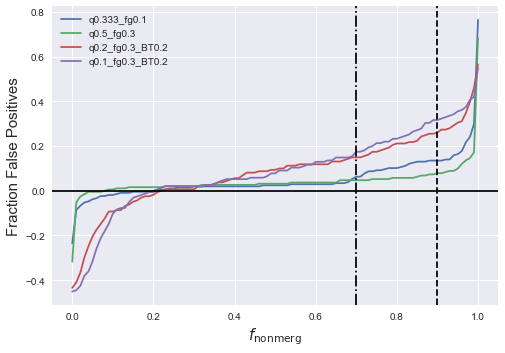

In [80]:
plt.clf()
plt.plot(prior_1, np.array(fp_13)-np.array(fn_13),  label='q0.333_fg0.1')
plt.plot(prior_1, np.array(fp_12)-np.array(fn_12),  label='q0.5_fg0.3')
plt.plot(prior_1, np.array(fp_15)-np.array(fn_15),  label='q0.2_fg0.3_BT0.2')
plt.plot(prior_1, np.array(fp_10)-np.array(fn_10),  label='q0.1_fg0.3_BT0.2')
plt.xlabel(r'$f_{\mathrm{nonmerg}}$', size=15)
plt.ylabel('Fraction False Positives', size=15)
plt.axvline(x=0.9, ls='--', color='black')
plt.axvline(x=0.7, ls='-.', color='black')
plt.axhline(y=0, color='black')
plt.legend()
plt.show()

In [51]:



plt.clf()
plt.plot(prior_1, acc_13,  label='q0.333_fg0.1')
plt.plot(prior_1, acc_12,  label='q0.5_fg0.3')
plt.plot(prior_1, acc_15,  label='q0.2_fg0.3_BT0.2')
plt.plot(prior_1, acc_10,  label='q0.1_fg0.3_BT0.2')
plt.xlabel(r'$f_{\mathrm{nonmerg}}$', size=15)
plt.ylabel('LDA Accuracy', size=15)
plt.axvline(x=0.9, ls='--', color='black')
plt.axvline(x=0.7, ls='-.', color='black')
plt.legend()
plt.xlim([0,1])
#plt.show()
plt.savefig('../MaNGA_Papers/Paper_I/insensitive_to_priors.pdf')



In [88]:
import math
import numpy as np

fg3_m12_eig=[4.3,-0.7,1.4,3.2,-2.2,2.5,1.8]
fg1_m13_eig=[3.0,-1.7,3.9,3.7,-2.7,-0.2,1.1]
fg3_m15_eig=[14.0, -1.0, 24.4, 9.7, -14.0, -6.0, 6.2]

list_names=[fg3_m12_eig,fg1_m13_eig,fg3_m15_eig]
act_names=['q0.5_fg0.3','q0.333_fg0.1', 'q0.2_fg0.3']
for x in range(len(list_names)):
    for y in range(len(list_names)):
        try:
            exp=math.degrees(math.acos(np.dot(list_names[x],list_names[y])/(np.linalg.norm(list_names[x])*np.linalg.norm(list_names[y]))))
        except ValueError:
            print('Domain error', act_names[x], 'vs', act_names[y])
        if exp <90:
            expnow=exp
        else:
            expnow=abs(180-exp)
        print(act_names[x], 'vs', act_names[y], expnow)


q0.5_fg0.3 vs q0.5_fg0.3 0.0
q0.5_fg0.3 vs q0.333_fg0.1 35.00562395799082
q0.5_fg0.3 vs q0.2_fg0.3 48.159754311711765
q0.333_fg0.1 vs q0.5_fg0.3 35.00562395799082
q0.333_fg0.1 vs q0.333_fg0.1 0.0
q0.333_fg0.1 vs q0.2_fg0.3 22.585970746417956
q0.2_fg0.3 vs q0.5_fg0.3 48.159754311711765
q0.2_fg0.3 vs q0.333_fg0.1 22.585970746417956
Domain error q0.2_fg0.3 vs q0.2_fg0.3
q0.2_fg0.3 vs q0.2_fg0.3 22.585970746417956


In [58]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA
sklearn_lda = LDA(priors=[0.8,0.2])
X_lda_sklearn = sklearn_lda.fit_transform(X, y)
dec = sklearn_lda.score(X,y)
print(X_lda_sklearn)
coef = sklearn_lda.coef_
inter = sklearn_lda.intercept_
print(dec)
print(coef)
print(inter)

#plot_scikit_lda(X_lda_sklearn, title='Default LDA via scikit-learn')

[[-1.24905461]
 [-1.68091976]
 [ 6.11884828]
 [ 5.47198309]
 [ 4.60309771]
 [ 4.87954727]
 [ 4.17413156]
 [ 2.41719754]
 [ 2.97902972]
 [ 3.25976892]
 [ 3.36865114]
 [ 3.5545208 ]
 [ 3.75685733]
 [ 3.84589582]
 [-1.54500051]
 [-1.42974055]
 [ 4.22642622]
 [ 3.33484153]
 [ 3.81751928]
 [ 3.06943415]
 [ 3.27857911]
 [ 2.3236804 ]
 [ 4.03394623]
 [ 4.21368238]
 [ 3.49088418]
 [ 3.57496975]
 [ 3.95586172]
 [ 3.37118699]
 [-1.58020943]
 [-0.89848461]
 [ 4.14912498]
 [ 4.82284989]
 [ 3.81352123]
 [ 3.91659071]
 [ 3.85951445]
 [ 2.34015896]
 [ 2.63493089]
 [ 3.07472385]
 [ 3.9168378 ]
 [ 3.29674971]
 [ 3.6968283 ]
 [ 2.42648068]
 [-1.70062429]
 [-1.08279531]
 [ 4.64566041]
 [ 2.53592523]
 [ 3.69385845]
 [ 4.23612936]
 [ 4.19900727]
 [ 2.78530766]
 [ 4.36577064]
 [ 4.67723876]
 [ 4.62902936]
 [ 2.9028692 ]
 [ 3.9237619 ]
 [ 2.82556094]
 [-0.6409273 ]
 [-0.12130954]
 [ 5.06461006]
 [ 4.92248169]
 [ 2.81614121]
 [ 5.44111939]
 [ 3.62730409]
 [ 4.05635161]
 [ 3.83527829]
 [ 4.03960082]
 [ 3.73802

In [49]:
def plot_scikit_lda(X, title):

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X[:,0][y == label],
                    y=0 * -1, # flip the figure
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label])

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

In [21]:
'''
This is to test how sensitive or insensitive the process is to the priors
Priors vary:
Lotz2011 f_merg = 15%

'''

'''
~~~
Now just for the imaging part of it!
~~~
'''



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_mean_and_CI(mean, lb, ub, color_mean=None, color_shading=None):
        # plot the shaded range of the confidence intervals
        plt.fill_between(range(mean.shape[0]), ub, lb,
                         color=color_shading, alpha=.5)
        # plot the mean on top
        plt.plot(mean, color_mean)


feature_dict = {i:label for i,label in zip(
                range(14),
                  ('Counter',
                  'Image',
                  'class label',
                  'Myr',
                  'Viewpoint',
                '# Bulges',
                   'Sep',
                   'Flux Ratio',
                  'Gini',
                  'M20',
                  'Concentration (C)',
                  'Asymmetry (A)',
                  'Clumpiness (S)',
                  'Sersic N',
                  'Shape Asymmetry (A_S)'))}

#Counter	Image	Merger (0 = no, 1 = yes)	Myr	Viewpoint	Gini	M20	C	A	S	Sersic n
'''view=0
df = pd.io.parsers.read_table(
    filepath_or_buffer='PCA_img_0.txt',
    header=[0],
    sep='\t', skiprows=14*view,nrows=14
    )#,skiprows=10,nrows=10'''


#list_runs=['fg3_m_12','fg1_m_13']
list_runs=['fg3_m12']#,'fg1_m13']#,'fg1_m13']
priors_list=[[0.94,0.06],[0.85,0.15],[0.06,0.94],[0.999,0.001],[0.001,0.999]]

for k in range(len(prior_list)):
    for i in range(len(list_runs)):
   
        add_on=list_runs[i]
        print('run', add_on)


        run=list_runs[i]
        df = pd.io.parsers.read_table(
            filepath_or_buffer='LDA_img_ratio_statmorph_'+str(run)+'.txt',#'_view_all.txt',#filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
            header=[0],
            sep='\t'
            )#,skiprows=10,nrows=10
        ##filepath_or_buffer='LDA_img_ratio_statmorph_'+str(run)+'.txt',#'_view_all.txt',

        df.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']
        df.dropna(how="all", inplace=True) # to drop the empty line at file-end

        for j in range(len(df)):
            if df[['Myr']].values[j][0]<40 and df[['Sep']].values[j][0]==0.0 and df[['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]


                #I use this part to check if there is any separation at these points in time
                #Or if there are more than two bulges
                #print(df[['class label','Myr','Viewpoint','# Bulges', 'Sep']].values[j])

                #Then, you can optionally change the class values of all of these viewpoints

                #.set_value(index, col, value, 
                df.set_value(j,'class label',0.0)



        from sklearn.preprocessing import LabelEncoder


        X = df[['Gini','M20','Concentration (C)', 'Asymmetry (A)', 'Clumpiness (S)', 'Sersic N', 'Shape Asymmetry']].values

        from sklearn import preprocessing

        #print('X before norm', X)

        std_scale = preprocessing.StandardScaler().fit(X)
        X = std_scale.transform(X)
        #print('X after norm', X)

        n_params=7


        y = df['class label'].values


        enc = LabelEncoder()
        label_encoder = enc.fit(y)
        y = label_encoder.transform(y) + 1


        label_dict = {1: 'NonMerger', 2: 'Merger'}
        from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

        # LDA
        sklearn_lda = LDA(priors=priors_list[k])
        X_lda_sklearn = sklearn_lda.fit_transform(X, y)
        dec = sklearn_lda.score(X,y)
        prob = sklearn_lda.predict_proba(X)

        coef = sklearn_lda.coef_
        inter = sklearn_lda.intercept_
        class_label = sklearn_lda.classes_

        print('~~~Coefficients and Intercepts~~~')
        print(coef,inter)
        
        
        

        print('priors', priors_list[k])
        print('mean accuracy',dec)#mean accuracy on the given test data and labels.

        print(inter)
        '''Make a histogram'''
        from scipy import stats
        import seaborn as sns
        plt.clf()
        fig = plt.figure(figsize=(18,10))
        ax = fig.add_subplot(111)
        X_lda_1=[]
        X_lda_2=[]
        for j in range(len(X_lda_sklearn)):
            if y[j] ==1:
                X_lda_1.append(X_lda_sklearn[j][0])
            else:
                X_lda_2.append(X_lda_sklearn[j][0])
        input_hist=X_lda_sklearn

        ax.hist(X_lda_1, label='NonMerger',  color=sns.xkcd_rgb["sky blue"],alpha = 0.75)
        ax.hist(X_lda_2, label='Merger',  color=sns.xkcd_rgb["salmon"],alpha = 0.75)

        '''for label,col in zip(range(1,4),  ('blue', 'red')):
            input_hist=X_lda_sklearn
            input_all=X_lda_sklearn
            ax.hist(input_hist,
                           color=col,
                           label='class %s' %label_dict[label],
                           alpha=0.5,)#bins=bins,
            xt = plt.xticks()[0]  
            xmin, xmax = -0.1,0.7#min(xt), max(xt)  
            lnspc = np.linspace(xmin, xmax, len(input_hist))

            # lets try the normal distribution first
            m, s = stats.norm.fit(input_hist) # get mean and standard deviation  
            pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
            #ax.plot(lnspc, pdf_g,  color=col) # plot it



        ylims = ax.get_ylim()

        # plot annotation
        leg = ax.legend(loc='upper right', fancybox=True, fontsize=8)
        leg.get_frame().set_alpha(0.5)
        ax.set_ylim([0, max(ylims)+2])'''

        ax.set_xlabel('LD1', size=20)
        #ax.set_title('Histogram #%s' %str(cnt+1), size=20)

        # hide axis ticks
        ax.tick_params(axis="both", which="both", bottom="off", top="off",  
                labelbottom="on", left="off", right="off", labelleft="on", labelsize=20)

        # remove axis spines
        ax.spines["top"].set_visible(False)  
        ax.spines["right"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
        ax.spines["left"].set_visible(False)    

        ax.set_ylabel('Count', size=20)


        plt.legend(loc="upper right", fontsize=20)
        #fig.tight_layout() 
        #plt.annotate(str(add_on), xy=(0.02,0.95),xycoords='axes fraction', size=20)
        #plt.annotate('Mean Accuracy = '+str(dec), xy=(0.02,0.9),xycoords='axes fraction', size=20)
        #frame1 = plt.gca()
        if run=='fg1_m_13':
            plt.title('FG1M13')
        if run=='fg3_m12':
            plt.title('FG3M12')
        plt.show()

    

NameError: name 'prior_list' is not defined